In [1]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
data = """ Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP▼,Player-additional
1,Nikola Jokić,C,28,DEN,79,2737,31.0,.650,.164,.310,9.3,29.6,19.8,42.0,2.0,2.1,12.9,29.3,,12.0,5.1,17.0,.299,,9.0,4.2,13.2,10.6,jokicni01
2,Luka Dončić,PG,24,DAL,70,2624,28.1,.617,.450,.368,2.5,24.4,13.5,44.3,1.8,1.3,12.8,36.0,,8.5,3.5,12.0,.220,,8.3,1.7,9.9,8.0,doncilu01
3,Giannis Antetokounmpo,PF,29,MIL,73,2567,29.9,.649,.091,.571,8.6,27.0,17.9,32.7,1.6,2.6,12.7,33.0,,9.5,3.7,13.2,.246,,6.7,2.4,9.0,7.2,antetgi01
4,Shai Gilgeous-Alexander,PG,25,OKC,75,2553,29.3,.636,.181,.436,3.0,14.7,9.1,29.8,2.8,2.4,8.4,32.8,,10.5,4.2,14.6,.275,,6.7,2.3,9.0,7.1,gilgesh01
5,Domantas Sabonis,C,27,SAC,82,2928,23.2,.637,.081,.389,11.0,32.3,21.4,33.9,1.2,1.5,17.9,22.2,,8.6,4.0,12.6,.206,,4.0,2.4,6.5,6.2,sabondo01
6,Jalen Brunson,PG,27,NYK,77,2726,23.4,.592,.319,.302,1.8,9.7,5.7,33.5,1.3,0.4,9.1,32.5,,8.8,2.4,11.2,.198,,6.3,-0.4,5.8,5.4,brunsja01
7,LeBron James,PF,39,LAL,71,2504,23.7,.630,.286,.318,2.8,19.3,11.5,37.5,1.7,1.3,14.5,29.2,,5.7,2.8,8.5,.164,,5.5,0.9,6.5,5.4,jamesle01
8,Tyrese Haliburton,PG,23,IND,69,2224,23.3,.605,.510,.217,1.8,12.0,6.9,44.9,1.8,1.7,12.2,24.6,,7.6,1.5,9.0,.195,,7.3,-0.4,6.9,5.0,halibty01
9,Anthony Davis,C,30,LAL,76,2700,25.8,.621,.083,.402,10.4,28.3,19.8,15.5,1.6,5.7,9.5,26.7,,7.2,4.7,11.8,.210,,3.5,1.7,5.1,4.9,davisan02
10,Jayson Tatum,PF,25,BOS,74,2645,22.3,.604,.427,.349,2.9,20.9,12.3,21.0,1.4,1.4,10.3,30.2,,6.4,4.1,10.4,.189,,4.5,0.6,5.1,4.7,tatumja01
11,Joel Embiid,C,29,PHI,39,1309,34.1,.644,.163,.531,7.9,28.8,18.1,32.4,1.7,4.6,12.5,39.6,,5.2,2.3,7.5,.275,,8.5,3.1,11.6,4.5,embiijo01
12,Kawhi Leonard,SF,32,LAC,68,2330,23.2,.626,.289,.246,4.2,15.6,10.1,16.9,2.4,2.3,8.5,26.5,,6.0,2.9,8.9,.184,,4.8,0.6,5.5,4.4,leonaka01
13,Stephen Curry,PG,35,GSW,74,2421,20.6,.616,.606,.224,1.7,12.9,7.4,24.7,1.1,1.0,11.7,31.3,,5.2,2.0,7.2,.142,,6.3,-1.1,5.2,4.4,curryst01
14,Kevin Durant,PF,35,PHO,75,2791,21.2,.626,.283,.295,1.7,17.5,10.0,22.2,1.2,2.9,13.1,29.0,,5.1,3.2,8.3,.142,,4.0,0.1,4.0,4.3,duranke01
15,Donovan Mitchell,SG,27,CLE,55,1942,22.1,.595,.454,.292,2.7,13.4,8.1,28.3,2.6,1.4,11.1,31.4,,3.6,2.9,6.4,.159,,4.6,1.2,5.8,3.9,mitchdo01
16,James Harden,PG,34,LAC,72,2470,18.6,.612,.594,.418,1.6,14.8,8.4,33.6,1.5,2.1,16.0,20.6,,5.9,2.5,8.4,.163,,3.8,0.3,4.1,3.8,hardeja01
17,Victor Wembanyama,C,20,SAS,71,2106,23.1,.565,.332,.309,8.2,30.7,19.4,21.5,2.0,10.0,16.2,32.2,,-0.7,4.4,3.7,.085,,1.9,3.3,5.2,3.8,wembavi01
18,Anthony Edwards,SG,22,MIN,79,2770,19.7,.575,.341,.325,2.2,14.8,8.8,24.6,1.8,1.3,11.9,32.3,,2.9,4.7,7.5,.130,,2.7,0.5,3.3,3.7,edwaran01
19,Fred VanVleet,PG,29,HOU,73,2684,16.7,.568,.576,.225,1.3,9.9,5.6,31.1,1.8,2.0,10.1,19.7,,5.3,3.1,8.4,.150,,2.6,0.8,3.4,3.6,vanvlfr01
20,Kyrie Irving,SG,31,DAL,58,2030,21.9,.608,.372,.186,2.4,13.2,7.8,23.8,1.7,1.2,8.0,28.1,,4.9,2.0,6.9,.163,,4.8,0.1,4.9,3.6,irvinky01
21,Derrick White,SG,29,BOS,73,2381,16.9,.611,.590,.181,2.4,11.3,7.0,21.2,1.5,3.2,11.0,18.6,,5.2,3.3,8.5,.171,,2.4,1.4,3.8,3.5,whitede01
22,Alperen Sengun,C,21,HOU,63,2046,22.0,.585,.113,.358,9.5,21.5,15.4,25.2,1.8,2.1,12.5,27.0,,3.8,3.1,6.9,.163,,3.1,1.7,4.9,3.5,sengual01
23,Jimmy Butler,PF,34,MIA,60,2042,22.0,.626,.183,.579,5.8,11.9,8.8,23.1,1.9,0.8,9.3,24.0,,6.4,2.7,9.1,.214,,3.9,0.7,4.6,3.4,butleji01
24,Tyrese Maxey,PG,23,PHI,70,2626,19.8,.573,.401,.266,1.5,9.5,5.4,26.7,1.3,1.1,6.8,28.0,,5.9,2.1,8.1,.147,,4.1,-1.0,3.1,3.4,maxeyty01
25,Chet Holmgren,C,21,OKC,82,2413,20.4,.632,.366,.289,6.2,23.1,15.0,11.6,1.1,7.3,10.9,21.6,,4.6,4.4,8.9,.178,,1.8,1.5,3.4,3.3,holmgch01
26,Zion Williamson,PF,23,NOP,70,2207,22.8,.610,.016,.452,6.2,14.2,10.2,26.5,1.7,2.1,12.8,29.7,,4.7,2.8,7.5,.164,,3.3,0.6,3.8,3.3,willizi01
27,Paul George,PF,33,LAC,74,2502,19.3,.613,.476,.235,1.7,15.3,8.8,16.1,2.2,1.3,10.1,26.6,,4.4,2.8,7.3,.140,,2.9,0.2,3.2,3.3,georgpa01
28,Donte DiVincenzo,SG,27,NYK,81,2360,16.0,.597,.702,.114,3.0,11.2,7.1,13.7,2.3,1.4,9.7,21.3,,3.6,3.0,6.6,.135,,2.5,0.9,3.4,3.2,divindo01
29,De'Aaron Fox,PG,26,SAC,74,2659,20.1,.567,.374,.273,2.8,11.8,7.2,25.2,2.7,1.1,10.1,31.0,,3.3,3.2,6.5,.117,,2.6,0.1,2.7,3.2,foxde01
30,Jarrett Allen,C,25,CLE,77,2442,21.8,.664,.007,.383,11.3,25.8,18.7,13.2,1.1,3.0,11.2,19.4,,6.8,3.9,10.7,.210,,2.1,0.9,3.0,3.1,allenja01
31,Devin Booker,PG,27,PHO,68,2447,21.9,.611,.320,.350,2.7,11.1,7.1,31.2,1.2,1.0,10.6,29.8,,7.2,2.0,9.2,.181,,4.0,-1.0,3.0,3.1,bookede01
32,Mike Conley,PG,36,MIN,76,2193,15.8,.627,.629,.174,2.0,9.0,5.6,28.4,2.0,0.7,12.8,16.0,,5.0,3.3,8.2,.180,,2.0,1.4,3.4,3.0,conlemi01
33,Kristaps Porziņģis,C,28,BOS,57,1690,23.2,.647,.390,.402,6.5,19.1,13.1,10.0,1.2,5.8,9.1,25.1,,4.9,3.0,7.9,.226,,3.5,1.6,5.1,3.0,porzikr01
34,Scottie Barnes,SG,22,TOR,60,2094,19.5,.566,.314,.266,7.3,18.9,13.0,26.2,1.7,3.7,13.6,24.8,,2.3,2.0,4.3,.098,,2.9,0.8,3.7,3.0,barnesc01
35,Jamal Murray,PG,26,DEN,59,1861,20.7,.586,.346,.187,2.6,11.6,7.2,31.2,1.5,1.8,10.5,27.9,,3.8,2.1,5.9,.153,,4.5,-0.4,4.1,2.9,murraja01
36,DeMar DeRozan,SF,34,CHI,79,2989,19.7,.584,.166,.452,1.6,11.3,6.4,21.8,1.5,1.5,7.7,25.8,,7.0,2.2,9.2,.147,,2.1,-0.3,1.8,2.8,derozde01
37,CJ McCollum,PG,32,NOP,66,2159,17.9,.592,.528,.132,2.0,12.6,7.4,21.4,1.4,1.9,9.0,24.7,,3.5,2.4,5.9,.132,,3.3,-0.3,3.1,2.8,mccolcj01
38,Damian Lillard,PG,33,MIL,73,2579,19.6,.590,.487,.403,1.6,11.8,6.8,28.8,1.3,0.6,11.4,28.4,,5.8,1.9,7.7,.143,,3.4,-1.3,2.1,2.7,lillada01
39,Bam Adebayo,C,26,MIA,71,2416,19.8,.576,.041,.381,7.4,27.3,17.3,18.9,1.7,2.7,12.0,24.9,,2.9,4.3,7.2,.144,,0.8,1.7,2.4,2.7,adebaba01
40,Pascal Siakam,PF,29,TOT,80,2657,19.7,.601,.194,.312,5.8,18.1,11.9,19.4,1.1,0.8,8.9,25.3,,5.4,1.5,6.9,.124,,2.6,-0.7,1.9,2.7,siakapa01
41,Isaiah Hartenstein,C,25,NYK,75,1896,18.9,.670,.008,.430,14.4,22.7,18.5,13.5,2.3,4.2,17.6,12.0,,4.6,3.5,8.1,.204,,0.7,2.8,3.5,2.6,harteis01
42,Lauri Markkanen,PF,26,UTA,55,1820,21.5,.631,.493,.311,7.4,19.6,13.6,9.5,1.3,1.3,7.1,25.0,,5.2,0.9,6.2,.163,,5.1,-1.5,3.6,2.6,markkla01
43,Dejounte Murray,SG,27,ATL,78,2783,17.7,.555,.379,.179,2.3,14.4,8.1,27.9,1.9,0.8,11.3,26.6,,3.3,1.6,4.9,.084,,2.3,-0.6,1.7,2.6,murrade01
44,Rudy Gobert,C,31,MIN,76,2593,19.3,.675,.005,.635,13.1,29.2,21.5,5.6,1.0,5.5,13.1,15.4,,5.8,5.8,11.6,.216,,0.1,1.7,1.8,2.5,goberru01
45,Al Horford,C,37,BOS,65,1740,15.0,.650,.616,.072,5.3,19.7,12.8,12.3,1.1,3.1,10.0,12.0,,3.5,2.7,6.2,.172,,1.7,2.0,3.6,2.5,horfoal01
46,Jalen Williams,PF,22,OKC,71,2223,19.1,.621,.243,.223,1.9,11.8,7.1,21.3,1.7,1.9,10.1,23.7,,4.5,2.7,7.3,.157,,2.0,0.3,2.3,2.4,willija06
47,Jrue Holiday,PG,33,BOS,69,2263,14.4,.597,.467,.104,4.2,13.2,8.9,19.3,1.3,2.1,14.7,16.3,,3.3,3.0,6.3,.133,,1.0,1.1,2.1,2.4,holidjr01
48,Karl-Anthony Towns,PF,28,MIN,62,2026,18.8,.625,.344,.307,5.5,22.6,14.4,15.1,1.0,1.8,14.1,27.4,,2.6,3.6,6.3,.148,,1.6,0.9,2.5,2.3,townska01
49,Paolo Banchero,PF,21,ORL,80,2799,17.3,.546,.249,.397,3.4,20.0,11.6,25.2,1.3,1.6,13.0,29.7,,1.3,4.0,5.3,.090,,1.3,0.0,1.3,2.3,banchpa01
50,Alex Caruso,SG,29,CHI,71,2040,14.5,.613,.616,.177,3.3,11.8,7.5,16.4,2.9,3.5,14.9,14.7,,2.3,2.6,4.9,.115,,0.2,2.3,2.5,2.3,carusal01
51,Trae Young,PG,25,ATL,54,1942,20.3,.585,.465,.404,1.2,7.3,4.2,45.1,1.8,0.5,16.5,30.5,,4.0,0.6,4.6,.114,,4.9,-2.3,2.6,2.2,youngtr01
52,Daniel Gafford,C-PF,25,TOT,74,1815,21.7,.731,.000,.365,11.4,22.1,16.7,9.1,1.7,7.1,11.7,14.7,,5.2,2.5,7.8,.205,,0.7,1.9,2.6,2.1,gaffoda01
53,Grayson Allen,SG,28,PHO,75,2513,13.8,.679,.652,.216,2.3,10.6,6.6,12.1,1.3,1.6,11.3,14.5,,4.7,2.2,6.9,.132,,1.1,0.1,1.3,2.0,allengr01
54,Collin Sexton,SG,25,UTA,78,2075,19.9,.607,.313,.356,3.8,7.1,5.4,29.5,1.4,0.8,12.1,27.5,,5.2,0.3,5.5,.127,,3.8,-1.9,1.9,2.0,sextoco01
55,Aaron Gordon,PF,28,DEN,73,2297,16.8,.607,.193,.376,8.6,13.9,11.4,15.2,1.2,1.7,11.2,17.8,,4.5,2.6,7.1,.148,,1.2,0.1,1.3,1.9,gordoaa01
56,Franz Wagner,SF,22,ORL,72,2337,17.6,.575,.305,.291,3.6,15.7,9.6,18.8,1.6,1.1,10.0,25.7,,3.1,3.2,6.4,.131,,0.9,0.3,1.2,1.9,wagnefr01
57,Evan Mobley,PF,22,CLE,50,1532,20.1,.626,.107,.310,8.2,25.9,17.2,15.9,1.5,4.2,12.5,20.6,,2.8,2.7,5.5,.174,,0.9,2.0,2.9,1.9,mobleev01
58,Trey Murphy III,SF,23,NOP,57,1690,16.3,.612,.717,.243,2.8,15.5,9.2,10.2,1.5,1.6,4.7,18.6,,3.4,2.0,5.4,.154,,2.5,0.0,2.5,1.9,murphtr02
59,Brook Lopez,C,35,MIL,79,2411,14.8,.608,.535,.177,5.4,13.0,9.3,7.1,0.9,6.7,8.8,16.0,,3.1,2.8,5.9,.117,,0.2,0.8,1.0,1.8,lopezbr01
60,D'Angelo Russell,PG,27,LAL,76,2484,16.0,.588,.505,.178,1.3,8.9,5.3,27.6,1.3,1.3,11.8,23.0,,3.3,1.8,5.1,.099,,1.7,-0.8,0.9,1.8,russeda01
61,Josh Giddey,SG,21,OKC,80,2011,16.6,.547,.287,.146,6.4,21.5,14.2,26.6,1.2,2.0,15.7,23.1,,1.4,2.9,4.3,.102,,1.0,0.4,1.5,1.8,giddejo01
62,Terry Rozier,PG-SG,29,TOT,61,2040,17.3,.555,.411,.198,1.9,12.0,6.8,27.5,1.5,1.0,8.9,25.9,,2.3,1.6,3.9,.091,,2.2,-0.7,1.5,1.8,roziete01
63,Nic Claxton,C,24,BRK,71,2116,18.7,.629,.009,.337,9.7,27.3,18.2,10.4,1.1,6.2,12.2,15.6,,3.5,3.2,6.7,.152,,-0.3,1.5,1.2,1.7,claxtni01
64,Tobias Harris,PF,31,PHI,70,2368,16.5,.576,.271,.224,3.7,17.7,10.6,13.8,1.5,1.8,8.2,20.7,,3.2,2.7,5.9,.121,,1.0,-0.1,0.9,1.7,harrito02
65,Brandon Ingram,SF,26,NOP,64,2103,18.2,.578,.238,.302,2.3,14.7,8.6,26.7,1.2,1.9,12.4,27.2,,2.7,2.4,5.1,.117,,1.4,-0.3,1.2,1.7,ingrabr01
66,Kelly Olynyk,C,32,TOT,78,1759,17.4,.661,.312,.362,6.7,19.0,12.9,27.6,2.0,1.5,20.9,17.5,,3.5,1.4,4.9,.133,,0.7,1.1,1.8,1.7,olynyke01
67,Naz Reid,C,24,MIN,81,1964,16.0,.595,.479,.174,4.4,19.3,12.2,8.3,1.6,3.3,10.8,23.1,,1.1,3.8,4.9,.120,,0.4,1.1,1.5,1.7,reidna01
68,Immanuel Quickley,PG-SG,24,TOT,68,1985,16.7,.577,.484,.274,0.9,13.7,7.2,24.6,1.2,0.5,9.2,23.8,,3.5,1.2,4.7,.115,,2.2,-0.9,1.3,1.7,quickim01
69,Desmond Bane,SG,25,MEM,42,1443,18.5,.589,.464,.207,2.6,11.8,7.0,29.2,1.5,1.4,11.7,28.5,,1.8,1.3,3.1,.102,,3.1,-0.3,2.8,1.7,banede01
70,Jonas Valančiūnas,C,31,NOP,82,1925,19.8,.619,.167,.285,10.9,30.6,20.9,13.3,0.8,3.5,12.1,20.8,,3.9,3.1,7.1,.177,,0.7,0.5,1.2,1.6,valanjo01
71,Herbert Jones,SF,25,NOP,76,2321,13.2,.636,.464,.269,3.6,9.4,6.5,11.3,2.2,2.6,12.4,14.1,,3.3,3.0,6.3,.131,,-0.9,1.5,0.6,1.6,joneshe01
72,Jaylen Brown,SF,27,BOS,70,2343,18.6,.580,.326,.239,4.0,13.4,8.9,16.6,1.8,1.4,10.7,28.9,,2.7,3.2,5.9,.121,,0.9,-0.1,0.7,1.6,brownja02
73,Austin Reaves,SG,25,LAL,82,2629,15.5,.613,.447,.289,2.5,11.9,7.4,23.5,1.2,0.8,14.1,20.3,,3.9,2.0,5.9,.108,,0.9,-0.4,0.4,1.6,reaveau01
74,Jusuf Nurkić,C,29,PHO,76,2078,17.4,.559,.144,.416,12.8,31.7,22.8,19.9,1.9,3.4,19.1,19.1,,2.0,3.8,5.8,.133,,-1.0,2.1,1.1,1.6,nurkiju01
75,T.J. McConnell,PG,31,IND,71,1291,20.9,.586,.074,.105,3.2,13.6,8.4,41.8,2.6,0.5,14.8,23.7,,2.8,1.1,3.9,.143,,2.9,0.1,3.0,1.6,mccontj01
76,Julius Randle,PF,29,NYK,46,1630,18.9,.569,.292,.361,6.8,22.4,14.6,22.8,0.8,0.7,14.1,29.9,,1.9,1.9,3.8,.113,,2.2,-0.3,1.9,1.6,randlju01
77,Draymond Green,PF,33,GSW,55,1490,14.5,.587,.347,.199,5.6,23.0,14.4,28.6,1.8,2.9,25.0,15.3,,1.4,2.2,3.6,.116,,-0.6,3.0,2.4,1.6,greendr01
78,Myles Turner,C,27,IND,77,2076,19.3,.626,.356,.349,6.2,22.9,14.5,6.4,0.9,5.5,9.4,23.4,,3.6,2.2,5.8,.134,,1.0,-0.1,0.9,1.5,turnemy01
79,Obi Toppin,PF,25,IND,82,1730,16.5,.677,.437,.173,5.6,15.4,10.5,9.4,1.3,2.0,10.0,16.8,,3.6,1.1,4.8,.132,,1.8,-0.3,1.5,1.5,toppiob01
80,Jalen Suggs,SG,22,ORL,75,2025,14.1,.602,.539,.218,2.8,10.6,6.6,15.0,2.6,2.2,14.4,19.7,,1.5,3.2,4.7,.112,,-0.6,1.6,1.0,1.5,suggsja01
81,Jalen Johnson,SF,22,ATL,56,1889,16.3,.584,.285,.209,4.1,24.8,14.1,15.4,1.7,2.2,11.6,19.1,,2.1,1.7,3.8,.098,,0.4,0.8,1.2,1.5,johnsja05
82,Payton Pritchard,PG,26,BOS,82,1825,15.3,.597,.602,.088,4.3,11.1,7.8,20.7,1.1,0.3,8.5,17.2,,4.2,1.9,6.1,.160,,1.3,-0.2,1.0,1.4,pritcpa01
83,Josh Hart,SF,28,NYK,81,2707,11.8,.522,.380,.169,5.3,22.8,14.0,16.3,1.4,0.8,13.9,13.5,,2.0,3.6,5.7,.100,,-1.3,1.4,0.0,1.4,hartjo01
84,Moritz Wagner,C,26,ORL,80,1415,20.6,.676,.208,.370,9.6,19.3,14.4,11.2,1.4,1.4,13.1,22.8,,3.5,2.0,5.6,.188,,1.7,0.3,2.0,1.4,wagnemo01
85,Nikola Vučević,C,33,CHI,76,2610,17.7,.540,.258,.107,8.8,25.8,17.1,15.2,1.0,2.4,8.6,23.3,,2.7,2.8,5.4,.100,,0.8,-0.7,0.1,1.4,vucevni01
86,Sam Hauser,SF,26,BOS,79,1741,13.0,.629,.833,.034,2.9,13.7,8.6,6.2,1.1,1.3,5.3,15.0,,2.7,2.1,4.9,.134,,1.2,0.0,1.2,1.4,hausesa01
87,Trayce Jackson-Davis,PF,23,GSW,68,1130,21.6,.692,.003,.398,13.1,19.4,16.3,10.4,1.2,6.1,11.2,16.4,,3.2,1.6,4.8,.205,,1.5,1.2,2.8,1.4,jackstr02
88,Kyle Anderson,PF,30,MIN,79,1782,12.7,.513,.111,.316,4.0,13.0,8.7,25.0,2.0,2.3,15.6,14.5,,1.4,3.1,4.5,.121,,-1.6,2.7,1.1,1.4,anderky01
89,Bogdan Bogdanović,SG,31,ATL,79,2401,14.7,.569,.583,.149,2.3,10.3,6.2,14.9,1.9,1.0,8.7,22.3,,2.8,1.2,3.9,.079,,0.9,-0.7,0.2,1.4,bogdabo01
90,Jonathan Isaac,PF,26,ORL,58,914,19.2,.610,.392,.287,9.3,24.2,16.7,4.8,2.3,7.1,7.7,16.7,,1.5,2.1,3.6,.188,,1.4,2.4,3.8,1.4,isaacjo01
91,Ivica Zubac,C,26,LAC,68,1794,19.3,.671,.000,.320,12.8,26.2,19.7,7.5,0.6,4.2,11.8,16.4,,4.5,2.3,6.8,.182,,0.8,0.0,0.8,1.3,zubaciv01
92,Michael Porter Jr.,SF,25,DEN,81,2565,15.5,.601,.513,.102,4.7,19.3,12.2,6.7,0.8,1.8,7.5,20.7,,3.1,3.1,6.2,.115,,1.2,-1.2,0.1,1.3,portemi01
93,Luke Kornet,C,28,BOS,63,983,19.8,.736,.005,.266,13.5,15.1,14.3,8.9,1.2,5.5,8.5,11.0,,3.5,1.6,5.1,.248,,1.6,1.8,3.4,1.3,kornelu01
94,Tyus Jones,PG,27,WAS,66,1933,16.5,.578,.384,.060,1.1,9.0,5.0,34.6,1.7,0.8,8.8,16.3,,3.9,0.7,4.5,.113,,1.5,-0.9,0.7,1.3,jonesty01
95,Amen Thompson,SF,21,HOU,62,1388,18.2,.576,.130,.348,11.3,20.4,15.8,17.0,2.7,2.5,14.9,18.5,,1.9,2.4,4.3,.149,,-0.1,1.9,1.8,1.3,thompam01
96,Buddy Hield,SF-SG,31,TOT,84,2160,13.3,.578,.668,.069,3.1,10.9,7.0,14.5,1.6,1.6,10.5,19.2,,1.9,1.6,3.5,.077,,1.0,-0.6,0.4,1.3,hieldbu01
97,Kevin Love,PF,35,MIA,55,924,18.5,.597,.680,.301,7.2,34.5,20.7,19.0,1.0,1.1,10.6,21.9,,1.7,1.6,3.3,.170,,2.7,1.0,3.6,1.3,loveke01
98,Jaren Jackson Jr.,C,24,MEM,66,2124,17.4,.552,.315,.359,4.2,15.0,9.4,13.1,1.8,4.7,10.6,30.4,,0.2,2.8,3.0,.067,,0.0,0.4,0.4,1.3,jacksja02
99,Chris Paul,PG,38,GSW,58,1531,14.7,.544,.450,.111,1.3,14.4,7.9,33.4,2.2,0.4,13.4,15.6,,2.6,1.7,4.3,.136,,-0.2,1.2,1.0,1.2,paulch01
100,Mikal Bridges,SF,27,BRK,82,2854,14.9,.560,.457,.245,2.5,12.0,7.1,16.3,1.4,0.9,10.3,24.3,,2.1,2.1,4.2,.070,,0.7,-1.0,-0.4,1.2,bridgmi01
101,Larry Nance Jr.,C,31,NOP,61,1216,14.9,.653,.270,.253,8.7,19.3,14.1,12.1,2.5,1.5,15.5,11.3,,2.1,1.9,4.1,.160,,-0.2,2.2,2.0,1.2,nancela02
102,Jalen Smith,C,23,IND,61,1047,20.7,.682,.365,.263,12.1,24.3,18.2,8.0,0.8,2.9,9.1,19.4,,3.1,0.9,4.0,.182,,3.2,-0.8,2.4,1.2,smithja04
103,Malik Monk,SG,25,SAC,72,1872,16.0,.564,.474,.230,1.6,11.3,6.3,28.9,1.2,1.9,13.2,25.9,,1.9,1.6,3.5,.090,,1.5,-1.0,0.6,1.2,monkma01
104,Khris Middleton,SF,32,MIL,55,1487,17.0,.595,.384,.187,3.0,15.7,9.5,28.9,1.6,0.9,15.4,23.9,,1.9,1.4,3.4,.109,,1.1,0.0,1.1,1.2,middlkh01
105,Cade Cunningham,PG,22,DET,62,2074,17.1,.546,.287,.235,1.7,12.9,7.2,37.5,1.3,0.9,14.1,30.8,,0.7,1.0,1.8,.041,,2.0,-1.6,0.3,1.2,cunnica01
106,Nickeil Alexander-Walker,SG,25,MIN,82,1921,10.9,.578,.623,.121,2.2,7.5,4.9,14.5,1.6,1.9,11.8,14.8,,1.5,2.8,4.3,.107,,-1.1,1.3,0.2,1.1,alexani01
107,Walker Kessler,C,22,UTA,64,1493,18.0,.663,.054,.266,12.3,23.1,17.7,5.6,1.0,9.2,14.4,12.8,,2.4,1.7,4.1,.131,,-0.4,1.3,0.9,1.1,kesslwa01
108,Bradley Beal,SG,30,PHO,53,1767,16.3,.607,.320,.182,3.6,10.8,7.4,22.5,1.4,1.3,14.2,22.7,,2.4,1.5,3.9,.107,,0.9,-0.6,0.4,1.1,bealbr01
109,Caris LeVert,SG,29,CLE,68,1958,14.6,.524,.405,.245,2.3,13.7,8.0,25.7,1.9,1.6,11.4,23.1,,1.0,2.6,3.6,.088,,-0.6,0.8,0.2,1.1,leverca01
110,Devin Vassell,SG,23,SAS,68,2248,15.7,.578,.422,.190,1.3,11.3,6.3,19.1,1.5,0.8,8.6,23.5,,2.0,1.6,3.6,.077,,0.9,-0.9,0.0,1.1,vassede01
111,Malcolm Brogdon,PG,31,POR,39,1121,17.0,.560,.401,.234,2.6,12.8,7.4,30.9,1.2,0.6,9.9,23.0,,2.0,0.6,2.6,.111,,2.7,-0.7,2.0,1.1,brogdma01
112,Clint Capela,C,29,ATL,73,1883,20.7,.590,.002,.333,18.7,26.5,22.4,6.9,1.1,5.1,9.5,17.3,,4.4,1.9,6.3,.161,,1.0,-1.0,0.1,1.0,capelca01
113,Jabari Smith Jr.,PF,20,HOU,76,2424,13.8,.571,.456,.222,6.1,21.3,13.6,7.1,1.0,2.3,8.9,17.6,,2.4,3.2,5.6,.111,,-0.5,0.1,-0.4,1.0,smithja05
114,Wendell Carter Jr.,C,24,ORL,55,1406,15.9,.623,.402,.315,9.3,22.7,15.9,9.9,1.2,1.9,12.3,17.2,,2.2,2.1,4.4,.149,,0.5,0.4,0.9,1.0,cartewe01
115,Deandre Ayton,C,25,POR,55,1784,18.9,.587,.013,.105,10.4,28.9,19.1,8.8,1.5,2.1,11.2,21.1,,1.8,2.1,3.9,.106,,0.5,-0.2,0.3,1.0,aytonde01
116,Goga Bitadze,C,24,ORL,62,957,17.8,.629,.067,.416,13.3,21.9,17.5,11.7,1.7,7.0,15.1,13.3,,1.8,1.9,3.7,.186,,-0.7,2.8,2.1,1.0,bitadgo01
117,Cole Anthony,PG,23,ORL,81,1817,14.6,.545,.360,.286,4.1,16.1,10.1,19.8,1.7,1.9,12.8,23.7,,0.9,2.7,3.6,.096,,-0.6,0.7,0.1,1.0,anthoco01
118,Isaiah Joe,SG,24,OKC,78,1445,13.4,.626,.728,.107,2.6,11.0,6.9,8.9,1.5,1.4,8.5,16.6,,1.9,1.6,3.5,.116,,1.1,-0.3,0.9,1.0,joeis01
119,Royce O'Neale,SF,30,TOT,79,1954,11.1,.548,.783,.065,3.4,17.9,10.7,15.0,1.5,2.0,11.6,13.9,,1.3,2.1,3.4,.085,,-1.0,1.0,0.0,1.0,onealro01
120,Cameron Johnson,PF,27,BRK,58,1599,14.5,.582,.570,.176,3.7,13.8,8.6,12.9,1.5,0.8,7.9,19.6,,2.0,1.3,3.3,.100,,0.9,-0.5,0.4,1.0,johnsca02
121,Jalen Green,SG,21,HOU,82,2601,14.7,.541,.454,.264,1.7,15.9,8.7,17.3,1.2,1.0,11.4,27.4,,0.2,2.9,3.1,.056,,0.4,-0.9,-0.5,1.0,greenja05
122,Jordan McLaughlin,PG,27,MIN,56,626,15.5,.638,.614,.124,3.4,9.4,6.5,23.7,2.8,1.0,11.1,12.1,,1.4,1.1,2.5,.193,,1.4,2.9,4.2,1.0,mclaujo01
123,Russell Westbrook,PG,35,LAC,68,1529,16.2,.514,.232,.241,7.1,17.8,12.7,29.2,2.4,1.4,16.4,25.2,,0.2,1.9,2.1,.066,,-0.2,0.7,0.5,1.0,westbru01
124,Tyler Herro,SG,24,MIA,42,1407,15.7,.558,.453,.151,1.5,16.5,8.9,22.4,1.1,0.2,10.6,27.8,,0.4,1.6,2.0,.068,,1.5,-0.7,0.8,1.0,herroty01
125,LaMelo Ball,PG,22,CHO,22,711,20.8,.561,.466,.246,4.4,13.7,8.9,43.1,2.8,0.5,15.0,34.3,,0.6,0.5,1.1,.074,,3.8,-0.5,3.3,1.0,ballla01
126,Paul Reed,C,24,PHI,82,1590,17.4,.580,.119,.177,13.2,20.9,16.9,9.8,2.1,4.8,11.5,15.9,,2.5,2.6,5.1,.154,,-0.6,1.0,0.4,0.9,reedpa01
127,Tre Jones,PG,24,SAS,77,2138,14.7,.591,.318,.197,2.9,11.8,7.3,30.8,1.7,0.3,15.1,15.2,,3.4,1.6,4.9,.111,,-0.4,0.1,-0.4,0.9,jonestr01
128,Jalen Duren,C,20,DET,61,1777,18.7,.653,.007,.321,11.8,33.0,22.2,12.7,0.9,2.3,16.7,18.5,,3.0,1.8,4.8,.130,,-0.2,0.1,-0.1,0.9,durenja01
129,Coby White,PG,23,CHI,79,2881,14.5,.570,.460,.215,1.7,12.4,6.9,20.8,0.9,0.6,11.1,22.7,,3.1,1.6,4.7,.078,,0.7,-1.3,-0.7,0.9,whiteco01
130,Brandin Podziemski,SG,20,GSW,74,1968,13.0,.540,.392,.132,6.6,16.7,11.7,18.1,1.5,0.6,12.2,15.4,,2.1,2.0,4.1,.100,,-0.5,0.4,-0.1,0.9,podzibr01
131,Cason Wallace,SG,20,OKC,82,1692,12.0,.612,.529,.084,3.6,8.6,6.2,8.9,2.2,2.0,8.9,12.9,,1.9,2.1,4.0,.115,,-0.9,1.0,0.1,0.9,wallaca01
132,Jakob Poeltl,C,28,TOR,50,1319,18.9,.653,.000,.283,11.9,24.1,17.9,14.0,1.3,5.1,15.3,16.2,,2.4,1.4,3.8,.138,,-0.3,1.0,0.7,0.9,poeltja01
133,Klay Thompson,SF,33,GSW,77,2284,13.9,.576,.611,.121,1.7,10.2,6.0,11.2,1.1,1.4,8.9,24.2,,1.8,1.7,3.6,.075,,1.1,-1.5,-0.4,0.9,thompkl01
134,Dyson Daniels,PG,20,NOP,61,1358,12.0,.529,.434,.170,5.1,14.1,9.7,15.4,3.1,1.8,15.0,12.6,,0.7,2.2,2.9,.103,,-1.9,2.5,0.6,0.9,daniedy01
135,Dario Šarić,C,29,GSW,64,1098,15.3,.600,.508,.240,7.3,20.4,13.9,17.8,1.4,0.8,15.4,19.5,,1.6,1.2,2.8,.123,,0.6,0.4,1.0,0.9,saricda01
136,Jerami Grant,PF,29,POR,54,1830,15.4,.573,.325,.367,2.1,10.0,5.8,13.8,1.2,1.7,10.5,25.7,,1.7,1.0,2.7,.071,,1.0,-1.1,-0.1,0.9,grantje01
137,Matisse Thybulle,SF,26,POR,65,1487,10.4,.537,.729,.091,2.1,8.5,5.1,8.3,3.8,3.0,10.8,10.6,,0.4,1.8,2.2,.072,,-2.8,3.4,0.6,0.9,thybuma01
138,Keegan Murray,SF,23,SAC,77,2588,13.3,.569,.524,.127,4.5,13.9,9.1,6.9,1.5,2.1,5.9,18.1,,2.6,2.6,5.2,.096,,-0.4,-0.5,-0.9,0.8,murrake02
139,Dereck Lively II,C,19,DAL,55,1294,18.1,.728,.007,.274,11.4,20.4,16.0,6.4,1.3,5.2,13.1,12.6,,3.1,1.8,4.9,.183,,-0.3,0.8,0.5,0.8,livelde01
140,Jonathan Kuminga,PF,21,GSW,74,1949,17.0,.598,.191,.347,5.2,14.4,9.8,12.5,1.4,1.7,10.9,24.1,,2.7,1.9,4.6,.113,,0.0,-0.4,-0.4,0.8,kuminjo01
141,Aaron Nesmith,SF,24,IND,72,1995,12.8,.631,.526,.216,3.6,12.0,7.8,6.6,1.5,2.0,8.4,16.0,,2.8,1.3,4.1,.098,,-0.3,-0.2,-0.5,0.8,nesmiaa01
142,Kevon Looney,C,27,GSW,74,1195,15.1,.620,.004,.356,13.1,24.6,18.9,14.1,1.1,2.2,15.6,11.3,,2.5,1.6,4.0,.162,,-0.8,1.4,0.6,0.8,looneke01
143,Max Strus,SF,27,CLE,70,2239,11.7,.553,.658,.133,3.4,13.5,8.5,17.3,1.4,1.2,12.7,17.4,,1.2,2.6,3.9,.083,,-1.1,0.5,-0.6,0.8,strusma01
144,Aaron Wiggins,SG,25,OKC,78,1228,15.6,.664,.334,.188,5.7,11.0,8.4,9.3,2.2,1.4,12.1,16.4,,2.1,1.6,3.7,.144,,0.4,0.4,0.7,0.8,wiggiaa01
145,Keon Ellis,SG,24,SAC,57,978,12.0,.627,.724,.151,3.6,10.8,7.1,11.1,2.5,2.7,13.0,12.4,,1.1,1.2,2.3,.114,,-0.9,2.1,1.2,0.8,elliske01
146,Anfernee Simons,SG,24,POR,46,1582,15.9,.568,.484,.213,1.5,10.9,5.9,27.6,0.7,0.3,12.1,28.0,,1.7,0.5,2.2,.068,,2.7,-2.5,0.2,0.8,simonan01
147,Andre Drummond,C,30,CHI,79,1351,23.0,.576,.006,.454,21.5,37.4,29.3,4.1,2.7,3.6,12.3,21.3,,2.3,2.6,4.9,.175,,0.8,-0.7,0.1,0.7,drumman01
148,Ayo Dosunmu,SG,24,CHI,76,2212,13.4,.604,.410,.146,2.7,8.3,5.5,15.6,1.5,1.7,11.9,17.2,,2.6,1.5,4.1,.089,,-0.6,-0.2,-0.8,0.7,dosunay01
149,Isaiah Jackson,C,22,IND,59,771,21.5,.689,.017,.438,13.8,21.2,17.5,8.3,2.1,6.3,12.3,17.2,,2.2,1.1,3.3,.204,,0.3,1.4,1.7,0.7,jacksis01
150,Sam Merrill,SG,27,CLE,61,1069,13.1,.598,.901,.071,2.3,10.2,6.3,14.1,0.9,0.3,4.5,17.5,,1.9,0.9,2.8,.125,,1.3,-0.8,0.5,0.7,merrisa01
151,Santi Aldama,PF,23,MEM,61,1618,13.1,.539,.535,.153,4.7,19.7,11.9,13.3,1.3,3.1,10.2,17.9,,0.4,2.0,2.4,.070,,-0.7,0.4,-0.2,0.7,aldamsa01
152,Jaylin Williams,C,21,OKC,69,897,12.7,.561,.632,.180,4.7,23.7,14.5,15.0,1.5,2.8,12.1,13.5,,1.0,1.5,2.4,.130,,-0.8,1.9,1.1,0.7,willija07
153,De'Anthony Melton,SG,25,PHI,38,1023,13.4,.533,.594,.219,3.0,12.4,7.6,15.4,2.9,1.4,9.0,18.3,,0.8,1.4,2.1,.099,,-0.7,1.2,0.5,0.7,meltode01
154,Bobby Portis,PF,28,MIL,82,2008,17.5,.581,.268,.135,7.9,24.8,16.6,7.8,1.6,1.4,8.6,22.9,,2.1,2.6,4.7,.112,,0.0,-0.8,-0.8,0.6,portibo01
155,Norman Powell,SG,30,LAC,76,1990,13.9,.626,.500,.224,0.9,9.8,5.5,5.9,1.1,1.0,7.3,20.0,,2.8,1.3,4.1,.099,,0.4,-1.2,-0.8,0.6,powelno01
156,Miles McBride,PG,23,NYK,68,1328,13.1,.590,.586,.110,2.6,5.9,4.2,12.2,1.9,0.5,5.9,16.4,,2.4,1.3,3.6,.131,,-0.4,0.4,-0.1,0.6,mcbrimi01
157,Duncan Robinson,SF,29,MIA,68,1905,12.2,.612,.701,.133,0.9,9.5,5.1,15.1,1.2,0.8,11.7,19.0,,1.6,2.0,3.6,.091,,-0.5,-0.4,-0.9,0.6,robindu01
158,Nicolas Batum,PF,35,TOT,60,1529,10.2,.603,.723,.082,5.0,13.1,9.0,10.7,1.5,2.3,13.1,8.6,,1.7,1.6,3.3,.103,,-1.3,0.8,-0.4,0.6,batumni01
159,Deni Avdija,SF,23,WAS,75,2257,14.9,.597,.293,.340,3.9,22.1,12.8,17.8,1.2,1.3,14.8,20.2,,1.7,1.5,3.2,.068,,-0.7,-0.2,-0.9,0.6,avdijde01
160,RJ Barrett,SG,23,TOT,58,1838,16.4,.580,.284,.331,3.1,16.0,9.5,16.7,0.8,1.1,11.1,26.5,,1.6,1.2,2.9,.075,,0.7,-1.5,-0.8,0.6,barrerj01
161,OG Anunoby,SF,26,TOT,50,1702,12.8,.595,.463,.154,3.0,10.6,6.8,9.0,2.0,1.9,11.6,17.6,,1.1,1.5,2.6,.073,,-1.0,0.5,-0.6,0.6,anunoog01
162,Dean Wade,PF,27,CLE,54,1108,10.2,.598,.871,.112,3.8,18.2,11.1,5.0,1.8,2.0,7.6,10.5,,0.9,1.6,2.5,.110,,-1.7,1.8,0.1,0.6,wadede01
163,Moses Moody,SG,21,GSW,66,1156,13.7,.578,.476,.221,6.2,12.1,9.2,6.7,1.8,1.9,8.7,18.4,,1.2,1.2,2.4,.101,,-0.2,0.1,-0.1,0.6,moodymo01
164,Miles Bridges,SF,25,CHO,69,2581,15.4,.556,.372,.174,3.0,19.5,11.0,14.6,1.2,1.2,9.6,24.7,,0.7,1.4,2.2,.040,,0.2,-1.3,-1.1,0.6,bridgmi02
165,Kris Dunn,PG,29,UTA,66,1249,12.8,.546,.355,.102,4.4,12.2,8.3,27.1,2.6,2.0,19.5,13.6,,1.1,0.9,2.0,.076,,-1.5,1.4,-0.1,0.6,dunnkr01
166,Onyeka Okongwu,C,23,ATL,55,1405,16.9,.674,.189,.318,10.8,18.6,14.6,7.2,0.9,3.8,9.8,13.7,,3.5,1.0,4.5,.153,,0.0,-0.5,-0.4,0.5,okongon01
167,John Collins,PF,26,UTA,68,1901,17.5,.621,.311,.248,9.2,24.0,16.7,6.1,1.0,2.9,10.6,20.4,,3.1,1.3,4.4,.110,,0.5,-1.4,-0.9,0.5,collijo01
168,Rui Hachimura,PF,25,LAL,68,1826,15.0,.628,.343,.198,3.7,13.7,8.9,6.3,1.1,1.2,5.9,18.5,,2.7,1.5,4.1,.108,,0.0,-0.9,-0.9,0.5,hachiru01
169,Haywood Highsmith,PF,27,MIA,66,1366,11.1,.587,.584,.109,5.3,12.1,8.7,7.2,1.9,2.1,9.0,12.4,,1.1,1.9,3.1,.108,,-1.8,1.1,-0.7,0.5,highsha01
170,Kevin Huerter,SG,25,SAC,64,1562,12.4,.564,.609,.084,2.7,13.6,8.0,14.4,1.4,1.3,8.4,17.3,,1.5,1.4,2.9,.089,,-0.5,-0.4,-0.8,0.5,huertke01
171,Day'Ron Sharpe,C,22,BRK,61,921,20.0,.596,.051,.418,18.6,27.9,23.1,14.0,1.3,4.3,16.7,19.7,,1.6,1.3,2.9,.152,,-0.4,0.4,0.0,0.5,sharpda01
172,Vince Williams Jr.,SG,23,MEM,52,1436,12.8,.597,.551,.343,4.3,18.3,11.0,18.0,1.6,2.2,17.4,15.8,,1.1,1.7,2.8,.093,,-1.7,1.0,-0.7,0.5,willivi01
173,Darius Garland,PG,24,CLE,57,1901,14.5,.560,.423,.208,1.8,7.1,4.5,29.4,1.9,0.3,16.1,25.3,,0.7,2.0,2.7,.067,,0.2,-1.2,-1.0,0.5,garlada01
174,Joe Ingles,SF,36,ORL,68,1169,10.6,.612,.709,.150,1.8,12.6,7.1,23.0,1.8,0.4,21.7,11.6,,1.1,1.5,2.6,.108,,-1.7,1.2,-0.5,0.5,inglejo01
175,John Konchar,SF,27,MEM,55,1173,11.4,.537,.577,.120,6.5,18.0,12.0,13.0,2.1,4.1,17.4,9.7,,0.5,1.7,2.2,.091,,-2.6,2.2,-0.4,0.5,konchjo01
176,Jose Alvarado,PG,25,NOP,56,1028,12.5,.540,.600,.151,2.7,11.0,6.9,15.3,2.8,1.4,9.8,17.3,,0.6,1.5,2.1,.097,,-1.5,1.5,-0.1,0.5,alvarjo01
177,Nikola Jović,PF,20,MIA,46,896,12.8,.583,.580,.167,3.1,21.3,12.1,14.7,1.4,1.5,12.2,17.1,,0.6,1.3,1.9,.103,,-0.9,1.3,0.3,0.5,jovicni01
178,Gary Payton II,SG,31,GSW,44,680,13.9,.621,.301,.126,7.4,10.5,9.0,9.4,2.8,2.4,12.3,13.6,,0.9,0.9,1.8,.125,,-1.3,2.2,0.9,0.5,paytoga02
179,Delon Wright,PG,31,TOT,47,742,13.6,.505,.362,.239,2.7,10.0,6.3,20.8,3.5,1.3,6.3,12.8,,0.8,0.9,1.7,.109,,-2.0,2.5,0.4,0.5,wrighde01
180,Bol Bol,PF,24,PHO,43,469,18.7,.700,.344,.126,8.1,24.1,16.5,5.3,1.0,4.7,10.7,16.5,,1.0,0.7,1.6,.168,,1.4,0.8,2.1,0.5,bolbo01
181,Robert Covington,SF-PF,33,TOT,29,488,13.6,.580,.571,.265,6.9,15.2,11.0,6.3,3.9,3.4,9.1,10.7,,0.6,0.9,1.5,.145,,-1.1,3.2,2.2,0.5,covinro01
182,Zach LaVine,SG,28,CHI,25,872,15.1,.578,.449,.274,1.0,15.8,8.3,16.8,1.2,0.9,11.0,23.8,,0.8,0.6,1.5,.080,,0.8,-0.7,0.1,0.5,lavinza01
183,Cam Whitmore,SF,19,HOU,47,880,16.6,.561,.471,.240,5.3,16.7,11.0,6.0,1.7,1.8,8.2,27.1,,0.4,1.1,1.5,.082,,1.0,-0.9,0.1,0.5,whitmca01
184,Kyle Kuzma,PF,28,WAS,70,2281,15.7,.547,.343,.183,2.8,19.3,10.9,20.7,0.8,1.8,11.9,29.7,,-1.0,1.1,0.2,.004,,0.5,-1.6,-1.1,0.5,kuzmaky01
185,Kentavious Caldwell-Pope,SG,30,DEN,76,2402,10.7,.602,.525,.193,1.5,6.8,4.2,9.5,2.0,1.5,10.5,12.9,,2.2,2.6,4.8,.096,,-2.1,0.7,-1.4,0.4,caldwke01
186,Isaac Okoro,SF,23,CLE,69,1887,11.4,.599,.448,.285,4.0,8.2,6.1,9.5,1.5,1.6,9.1,13.9,,2.1,2.0,4.2,.106,,-1.8,0.7,-1.1,0.4,okorois01
187,Kyle Lowry,PG,37,TOT,60,1690,10.9,.594,.663,.199,2.2,10.8,6.4,20.1,1.7,1.2,17.2,12.9,,1.6,1.9,3.5,.100,,-1.9,0.9,-1.0,0.4,lowryky01
188,Dwight Powell,C,32,DAL,63,836,14.5,.716,.028,.840,12.7,15.2,14.0,12.4,1.5,2.1,18.1,9.1,,2.2,0.9,3.1,.181,,-1.1,0.8,-0.3,0.4,poweldw01
189,Dante Exum,PG,28,DAL,55,1088,13.7,.645,.358,.225,2.5,12.4,7.5,19.3,1.0,0.4,12.9,15.0,,2.1,0.8,2.9,.127,,-0.3,-0.3,-0.6,0.4,exumda01
190,Marvin Bagley III,C,24,TOT,50,1053,19.4,.629,.056,.309,13.1,19.2,16.1,8.1,0.9,2.6,11.3,21.0,,2.0,0.7,2.7,.122,,1.0,-1.4,-0.4,0.4,baglema01
191,Naji Marshall,SF,26,NOP,66,1257,12.7,.576,.409,.234,4.8,16.4,10.6,13.6,1.9,0.9,13.8,16.3,,1.0,1.6,2.6,.100,,-1.3,0.5,-0.7,0.4,marshna01
192,Mitchell Robinson,C,25,NYK,31,768,16.1,.554,.000,.520,20.7,17.7,19.2,3.1,2.4,4.3,13.8,10.2,,1.2,1.3,2.5,.155,,-0.3,0.4,0.0,0.4,robinmi01
193,Cam Thomas,SG,22,BRK,66,2075,16.1,.554,.333,.281,1.4,10.1,5.6,15.7,1.1,0.7,8.5,30.5,,1.3,1.2,2.5,.058,,0.7,-1.9,-1.2,0.4,thomaca02
194,Jock Landale,C,28,HOU,56,763,15.6,.584,.194,.316,12.2,11.9,12.1,11.8,1.3,4.0,11.7,14.8,,1.4,0.9,2.3,.146,,-0.5,0.4,-0.1,0.4,landajo01
195,Simone Fontecchio,SF,28,TOT,66,1644,12.1,.600,.609,.120,4.3,12.2,8.3,8.7,1.3,1.2,10.5,16.5,,1.5,0.6,2.1,.061,,0.0,-1.0,-1.0,0.4,fontesi01
196,Luke Kennard,SG,27,MEM,39,999,13.1,.641,.756,.143,1.2,11.6,6.2,20.8,1.0,0.2,13.9,16.7,,1.4,0.7,2.1,.099,,0.6,-0.9,-0.3,0.4,kennalu01
197,Josh Okogie,SG,25,PHO,60,960,12.0,.552,.456,.495,9.2,9.0,9.1,8.4,2.4,2.2,12.5,13.0,,1.0,1.1,2.1,.104,,-1.3,0.8,-0.5,0.4,okogijo01
198,Craig Porter Jr.,PG,23,CLE,51,649,15.4,.564,.149,.246,3.7,15.1,9.4,26.5,1.6,2.1,15.1,20.2,,0.6,0.9,1.5,.108,,-0.6,1.1,0.5,0.4,portecr01
199,Tari Eason,PF,22,HOU,22,480,17.1,.528,.265,.175,10.2,24.2,17.1,8.3,3.1,3.6,8.9,19.8,,0.3,1.0,1.3,.125,,-0.4,2.0,1.6,0.4,easonta01
200,Scotty Pippen Jr.,PG,23,MEM,21,527,16.4,.596,.355,.271,4.4,9.7,7.0,30.7,3.3,1.8,19.8,23.0,,0.3,0.7,1.0,.090,,-0.1,1.4,1.3,0.4,pippesc02
201,Ben Simmons,PG,27,BRK,15,359,16.3,.571,.000,.203,9.2,27.6,18.1,33.2,1.7,2.3,25.1,13.0,,0.5,0.5,1.0,.133,,-0.5,2.9,2.4,0.4,simmobe01
202,Ja Morant,PG,24,MEM,9,318,20.6,.570,.300,.376,2.0,15.8,8.6,42.2,1.1,1.5,12.0,30.4,,0.5,0.3,0.8,.124,,2.7,0.4,3.1,0.4,moranja01
203,Patrick Beverley,PG,35,TOT,73,1462,11.6,.539,.478,.237,3.7,14.3,9.0,19.0,1.4,1.9,13.4,14.3,,1.2,1.5,2.7,.090,,-1.5,0.5,-1.1,0.3,beverpa01
204,Gary Harris,SG,29,ORL,54,1297,9.4,.587,.690,.152,2.2,6.1,4.1,9.1,1.9,1.0,8.9,11.7,,1.1,1.5,2.7,.099,,-2.3,1.1,-1.2,0.3,harriga01
205,Kenrich Williams,PF,29,OKC,69,1029,11.9,.568,.504,.050,6.9,15.4,11.3,11.4,1.8,0.8,10.1,13.4,,1.1,1.3,2.5,.115,,-1.1,0.3,-0.8,0.3,willike04
206,Trey Lyles,PF,28,SAC,58,1158,11.9,.596,.682,.218,5.8,19.4,12.4,8.1,0.7,1.5,9.7,14.4,,1.3,1.0,2.4,.098,,-0.4,-0.7,-1.1,0.3,lylestr01
207,Cameron Payne,PG,29,TOT,78,1304,12.8,.566,.555,.139,1.8,8.1,4.9,21.9,1.6,0.8,11.4,19.1,,1.4,1.0,2.4,.089,,-0.5,-0.6,-1.1,0.3,payneca01
208,Duop Reath,C,27,POR,68,1214,15.1,.571,.491,.186,8.1,15.4,11.5,8.9,1.3,2.8,8.8,20.7,,1.4,1.0,2.4,.095,,-0.2,-0.7,-0.9,0.3,reathdu01
209,Mark Williams,C,22,CHO,19,508,22.5,.675,.000,.424,16.3,24.6,20.4,6.8,1.6,3.7,8.7,17.1,,1.6,0.5,2.1,.198,,1.6,-0.8,0.8,0.3,willima07
210,Neemias Queta,C,24,BOS,28,333,22.9,.662,.000,.269,17.9,21.5,19.8,8.5,1.9,5.5,10.1,16.9,,1.1,0.7,1.8,.259,,0.4,1.1,1.5,0.3,quetane01
211,Dennis Smith Jr.,PG,26,BRK,56,1059,13.4,.508,.322,.172,5.0,12.1,8.5,27.3,3.2,1.0,15.8,17.7,,0.5,1.3,1.8,.080,,-2.6,1.8,-0.8,0.3,smithde03
212,Trendon Watford,PF,23,BRK,63,856,15.7,.611,.219,.312,6.5,18.7,12.4,14.6,1.3,2.0,15.1,21.1,,0.9,0.9,1.8,.100,,-0.9,0.4,-0.5,0.3,watfotr01
213,Jordan Goodwin,PG,25,TOT,57,1055,12.6,.451,.369,.154,9.3,17.3,13.3,20.9,2.2,1.6,12.1,19.0,,-0.2,1.4,1.2,.054,,-1.5,0.5,-1.0,0.3,goodwjo01
214,Monte Morris,PG,28,TOT,33,476,13.2,.508,.458,.124,1.7,11.5,6.8,20.0,2.0,1.7,4.2,15.5,,0.5,0.7,1.2,.123,,-0.8,1.5,0.7,0.3,morrimo01
215,Lindy Waters III,SG,26,OKC,38,280,15.3,.653,.817,.019,2.9,12.6,8.0,11.5,0.9,2.3,6.3,17.3,,0.6,0.3,0.9,.150,,2.4,-0.5,1.9,0.3,waterli01
216,Jontay Porter,PF,24,TOR,26,360,14.9,.514,.577,.173,7.8,17.5,12.5,21.8,2.7,4.9,15.8,15.8,,0.2,0.4,0.7,.089,,-0.3,1.9,1.7,0.3,portejo01
217,Luguentz Dort,SF,24,OKC,79,2246,11.1,.593,.603,.236,3.8,10.0,7.0,6.3,1.5,1.9,9.3,15.4,,2.0,2.5,4.6,.097,,-1.4,-0.2,-1.6,0.2,dortlu01
218,Terance Mann,SG,27,LAC,75,1873,12.0,.615,.414,.193,5.4,9.7,7.7,8.5,1.1,0.7,8.2,13.6,,3.0,1.2,4.2,.106,,-0.8,-0.7,-1.5,0.2,mannte01
219,Precious Achiuwa,PF-C,24,TOT,74,1624,14.6,.545,.207,.239,13.0,20.5,16.7,8.4,1.4,3.9,13.8,15.9,,1.2,2.2,3.4,.102,,-1.7,0.3,-1.4,0.2,achiupr01
220,Drew Eubanks,C,26,PHO,75,1169,14.4,.645,.012,.368,10.5,20.1,15.6,7.2,1.1,4.6,17.2,13.2,,1.6,1.6,3.1,.129,,-2.0,0.8,-1.2,0.2,eubandr01
221,Derrick Jones Jr.,SF,26,DAL,76,1783,11.7,.592,.483,.275,5.0,10.3,7.7,5.5,1.4,2.5,10.5,14.9,,1.5,1.6,3.1,.083,,-1.3,-0.3,-1.5,0.2,jonesde02
222,Keldon Johnson,SF,24,SAS,69,2038,14.2,.565,.426,.256,5.0,15.1,10.0,14.2,1.2,0.8,9.4,21.9,,1.5,1.5,3.0,.071,,-0.3,-1.4,-1.7,0.2,johnske04
223,Pat Connaughton,SF,31,MIL,76,1676,9.6,.574,.686,.167,3.4,12.0,7.8,12.0,1.1,1.0,11.6,10.9,,1.6,1.2,2.8,.080,,-1.6,0.0,-1.6,0.2,connapa01
224,Aaron Holiday,PG,27,HOU,78,1269,11.5,.578,.520,.151,1.9,8.5,5.2,15.4,1.6,0.4,10.6,16.7,,1.3,1.2,2.5,.094,,-1.8,0.3,-1.5,0.2,holidaa01
225,Josh Richardson,SG,30,MIA,43,1103,11.4,.573,.548,.156,1.8,10.7,6.2,13.9,1.1,1.2,8.9,16.5,,0.9,1.2,2.1,.093,,-1.3,0.0,-1.3,0.2,richajo01
226,Mo Bamba,C,25,PHI,57,740,15.4,.575,.323,.253,11.3,24.5,17.8,7.6,1.5,7.4,15.1,15.1,,0.6,1.3,2.0,.128,,-2.3,1.4,-1.0,0.2,bambamo01
227,Mason Plumlee,C,33,LAC,46,674,15.8,.621,.039,.647,10.4,28.2,19.6,10.8,1.0,2.3,15.5,15.1,,1.2,0.9,2.0,.146,,-1.1,0.4,-0.8,0.2,plumlma01
228,Thomas Bryant,C,26,MIA,38,441,19.0,.639,.148,.315,10.2,26.2,18.1,8.3,1.1,3.5,11.0,19.3,,0.9,0.8,1.6,.177,,-0.6,0.2,-0.4,0.2,bryanth01
229,Chimezie Metu,C,26,TOT,51,859,13.3,.610,.385,.262,5.5,19.6,12.7,7.4,2.4,1.6,16.0,16.2,,0.5,1.1,1.5,.085,,-2.1,0.8,-1.3,0.2,metuch01
230,Maxi Kleber,C,32,DAL,43,871,8.8,.573,.630,.322,3.8,14.1,9.0,9.5,0.9,3.0,14.4,9.6,,0.6,0.8,1.4,.080,,-2.3,1.0,-1.3,0.2,klebima01
231,Xavier Tillman Sr.,C-PF,25,TOT,54,974,12.2,.472,.290,.179,7.7,16.1,11.8,11.3,2.6,4.2,10.1,14.8,,-0.1,1.6,1.4,.071,,-3.1,1.9,-1.2,0.2,tillmxa01
232,Keita Bates-Diop,SF,28,TOT,53,665,11.5,.534,.416,.253,5.5,12.8,9.3,7.4,1.8,2.9,7.5,13.0,,0.5,0.8,1.3,.091,,-1.5,0.4,-1.0,0.2,bateske01
233,Alex Len,C,30,SAC,48,444,14.7,.625,.037,.420,11.3,21.2,16.1,14.4,1.2,6.8,22.0,11.8,,0.6,0.7,1.3,.138,,-2.7,2.9,0.2,0.2,lenal01
234,Thaddeus Young,PF,35,TOT,33,439,15.9,.598,.065,.139,11.7,14.5,13.0,17.9,2.5,1.0,11.6,12.6,,0.9,0.4,1.3,.138,,-0.5,0.8,0.3,0.2,youngth01
235,Tre Mann,PG,22,TOT,41,987,13.7,.559,.399,.187,2.2,15.0,8.5,24.1,2.5,0.3,16.0,18.2,,0.4,0.8,1.2,.058,,-1.7,0.4,-1.3,0.2,manntr01
236,Ricky Council IV,SG,22,PHI,32,289,18.6,.604,.286,.634,5.3,12.4,8.8,8.2,1.4,0.3,3.4,22.1,,0.8,0.3,1.0,.173,,2.1,-0.8,1.3,0.2,councri01
237,Sandro Mamukelashvili,C,24,SAS,46,451,15.8,.559,.413,.219,10.7,24.7,17.6,15.4,0.7,2.2,10.1,17.7,,0.6,0.4,1.0,.110,,-0.1,-0.4,-0.5,0.2,mamuksa01
238,Javonte Green,SF,30,CHI,9,230,20.2,.681,.360,.173,9.5,23.3,16.3,3.3,2.2,3.6,8.0,16.7,,0.5,0.3,0.9,.180,,1.9,0.1,2.0,0.2,greenja02
239,Talen Horton-Tucker,PG,23,UTA,51,1009,13.4,.503,.391,.234,2.3,10.8,6.6,25.5,2.2,1.7,11.2,24.0,,0.3,0.5,0.8,.039,,-0.9,-0.4,-1.2,0.2,hortota01
240,Lonnie Walker IV,SG,25,BRK,58,1011,13.1,.545,.551,.120,1.4,12.7,6.9,11.5,1.6,1.8,9.0,24.4,,-0.1,0.9,0.8,.038,,-0.4,-1.0,-1.4,0.2,walkelo01
241,Charles Bassey,C,23,SAS,19,205,17.7,.739,.025,.150,12.0,28.2,20.0,14.1,1.9,6.9,26.0,11.9,,0.3,0.4,0.7,.157,,-1.8,3.1,1.3,0.2,bassech01
242,Jeff Dowtin,PG,26,PHI,12,142,18.2,.689,.528,.111,2.3,13.5,7.8,26.4,2.4,0.6,11.7,13.0,,0.4,0.2,0.6,.193,,2.0,1.3,3.3,0.2,dowtije01
243,Dalano Banton,PG,24,TOT,54,1047,13.3,.504,.398,.240,4.2,15.2,9.5,19.4,1.6,1.7,12.2,25.7,,-0.4,0.9,0.5,.024,,-0.7,-0.6,-1.3,0.2,bantoda01
244,Josh Minott,SF,21,MIN,32,91,20.4,.593,.278,.389,5.2,15.5,10.6,13.2,2.7,4.9,4.5,21.4,,0.2,0.2,0.4,.222,,1.8,3.3,5.1,0.2,minotjo01
245,Jarace Walker,PF,20,IND,33,340,11.8,.527,.500,.082,4.0,17.0,10.5,13.9,2.1,2.6,13.0,16.1,,0.1,0.3,0.4,.058,,-0.5,0.7,0.2,0.2,walkeja02
246,Leonard Miller,SF,20,MIN,17,52,27.0,.694,.250,.100,11.5,31.3,21.8,25.5,1.9,1.7,4.6,18.6,,0.2,0.1,0.3,.323,,5.9,3.7,9.6,0.2,millele01
247,Ryan Rollins,PG,21,TOT,13,78,22.0,.638,.148,.630,2.7,15.4,8.9,25.0,6.0,3.1,18.8,23.0,,0.1,0.1,0.3,.155,,0.6,5.1,5.7,0.2,rolliry01
248,Harrison Barnes,PF,31,SAC,82,2381,11.9,.611,.526,.268,3.1,8.8,5.9,5.6,1.1,0.5,6.6,15.7,,3.1,1.5,4.7,.094,,-0.6,-1.2,-1.8,0.1,barneha02
249,Jaime Jaquez Jr.,SF,22,MIA,75,2113,12.9,.574,.290,.251,4.4,11.0,7.6,13.9,1.8,0.9,12.4,18.7,,1.4,2.7,4.0,.092,,-2.2,0.3,-1.9,0.1,jaqueja01
250,Spencer Dinwiddie,PG,30,TOT,76,2152,11.7,.543,.575,.328,1.5,9.0,5.2,22.7,1.2,0.9,11.1,16.6,,2.3,1.3,3.6,.081,,-1.3,-0.6,-1.9,0.1,dinwisp01
251,Malik Beasley,SG,27,MIL,79,2337,10.3,.603,.751,.048,2.0,11.4,6.8,6.1,1.2,0.3,6.8,14.6,,1.9,1.6,3.5,.073,,-1.0,-0.8,-1.8,0.1,beaslma01
252,Saddiq Bey,SF,24,ATL,63,2062,13.1,.549,.514,.291,8.5,13.4,10.9,6.0,1.2,0.5,6.4,17.0,,2.8,0.7,3.5,.081,,0.1,-2.0,-1.8,0.1,beysa01
253,Dennis Schröder,PG,30,TOT,80,2486,13.3,.550,.397,.230,1.7,9.2,5.3,28.0,1.2,0.6,13.0,20.3,,2.3,1.0,3.3,.063,,-0.5,-1.3,-1.8,0.1,schrode01
254,Eric Gordon,SG,35,PHO,68,1893,10.8,.580,.642,.104,1.0,6.0,3.6,10.0,1.7,1.4,10.2,16.5,,1.0,1.5,2.5,.063,,-1.3,-0.5,-1.7,0.1,gordoer01
255,Daniel Theis,C,31,TOT,60,1015,14.4,.597,.242,.171,9.8,17.1,13.6,8.3,1.0,4.5,11.8,15.4,,1.4,1.2,2.5,.119,,-1.7,0.1,-1.6,0.1,theisda01
256,Justin Holiday,SG,34,DEN,58,862,9.7,.598,.701,.021,1.2,7.8,4.6,9.5,2.1,0.9,6.7,10.6,,0.9,0.9,1.8,.101,,-2.5,0.9,-1.6,0.1,holidju01
257,Chris Boucher,PF,31,TOR,50,705,16.0,.625,.433,.424,9.5,23.1,16.1,4.5,1.0,3.0,9.8,17.3,,1.2,0.6,1.7,.119,,-0.3,-1.4,-1.7,0.1,bouchch01
258,Jacob Gilyard,PG,25,TOT,41,699,11.1,.573,.840,.013,1.4,6.0,3.6,27.7,2.3,0.7,16.6,11.1,,0.8,0.6,1.4,.095,,-2.0,0.6,-1.4,0.1,gilyaja01
259,Tristan Thompson,C,32,CLE,49,549,13.9,.563,.008,.433,15.1,20.4,17.8,12.7,1.1,2.3,16.9,13.8,,0.6,0.8,1.4,.119,,-2.1,0.6,-1.4,0.1,thomptr01
260,Markelle Fultz,PG,25,ORL,43,910,12.6,.492,.055,.101,7.2,10.7,8.9,19.7,2.3,1.5,12.8,18.8,,0.0,1.3,1.3,.069,,-2.6,1.2,-1.4,0.1,fultzma01
261,Taylor Hendricks,PF,20,UTA,40,856,11.8,.578,.583,.121,6.0,17.7,11.9,5.0,1.6,3.1,9.7,13.7,,0.7,0.6,1.2,.070,,-1.3,-0.4,-1.6,0.1,hendrita01
262,Sasha Vezenkov,PF,28,SAC,42,511,13.3,.569,.628,.079,6.4,14.8,10.5,5.1,1.9,1.3,5.7,17.5,,0.5,0.5,1.0,.098,,-0.2,-0.7,-0.9,0.1,vezenal01
263,Dāvis Bertāns,PF,31,TOT,43,674,11.6,.583,.855,.141,1.5,8.8,5.1,7.2,1.9,1.7,6.8,17.4,,0.5,0.4,0.9,.061,,-0.8,-0.6,-1.4,0.1,bertada01
264,Noah Clowney,PF,19,BRK,23,370,14.2,.626,.355,.323,7.5,16.7,12.0,6.9,1.1,3.9,12.4,14.2,,0.5,0.4,0.9,.111,,-0.8,0.1,-0.7,0.1,clownno01
265,Orlando Robinson,C,23,MIA,36,304,14.0,.596,.208,.347,10.4,21.0,15.7,15.8,1.1,2.6,17.8,14.8,,0.4,0.5,0.9,.135,,-1.9,0.8,-1.1,0.1,robinor01
266,Damian Jones,C,28,CLE,39,270,15.8,.659,.194,.292,8.4,17.3,12.9,7.9,1.3,4.3,13.8,15.4,,0.4,0.4,0.8,.150,,-1.7,1.2,-0.5,0.1,jonesda03
267,JaVale McGee,C,36,SAC,46,339,19.0,.609,.053,.341,13.6,28.4,20.8,7.6,2.0,5.4,18.3,23.4,,0.1,0.6,0.7,.101,,-1.9,0.6,-1.3,0.1,mcgeeja01
268,Gui Santos,PF,21,GSW,23,192,15.6,.656,.491,.309,9.7,17.7,13.8,9.6,1.0,0.9,10.1,15.2,,0.5,0.2,0.7,.169,,0.0,-0.5,-0.5,0.1,santogu01
269,Robert Williams,C,26,POR,6,119,17.2,.684,.000,.346,9.8,27.0,17.9,6.3,2.9,5.3,18.9,13.2,,0.2,0.2,0.4,.144,,-2.2,2.9,0.7,0.1,williro04
270,Darius Bazley,PF,23,TOT,9,152,13.9,.680,.267,.400,5.8,14.4,10.1,6.0,1.9,4.1,18.5,11.9,,0.2,0.1,0.3,.084,,-0.9,0.5,-0.4,0.1,bazleda01
271,Brandon Clarke,PF,27,MEM,6,134,18.9,.548,.102,.119,10.2,16.2,13.1,12.2,1.8,4.2,4.6,20.8,,0.1,0.2,0.3,.108,,0.7,0.3,1.0,0.1,clarkbr01
272,Moussa Diabaté,C,22,LAC,11,64,24.7,.576,.000,.737,27.4,15.4,21.2,8.6,3.9,1.4,7.4,18.6,,0.2,0.1,0.3,.250,,4.0,-0.5,3.5,0.1,diabamo01
273,Nate Hinton,SG,24,HOU,15,75,17.6,.585,.538,.192,9.9,21.7,15.7,18.6,1.9,2.5,9.6,17.7,,0.2,0.1,0.3,.187,,1.9,1.7,3.6,0.1,hintona01
274,Kenneth Lofton Jr.,PF,21,TOT,21,199,14.7,.537,.308,.333,6.6,14.6,10.5,25.7,1.5,2.3,13.5,22.1,,0.1,0.2,0.3,.068,,-0.6,0.3,-0.3,0.1,loftoke01
275,Dru Smith,SG,26,MIA,9,131,12.8,.576,.515,.061,5.1,7.0,6.1,15.0,3.4,2.2,12.9,13.2,,0.1,0.2,0.3,.125,,-1.8,3.2,1.4,0.1,smithdr01
276,Dylan Windler,SF,27,TOT,17,108,14.2,.717,.900,.000,2.9,13.4,8.1,12.3,0.9,0.0,6.3,12.5,,0.3,0.0,0.3,.140,,1.7,-1.0,0.7,0.1,windldy01
277,JD Davison,SG,21,BOS,8,39,18.8,.581,.583,.333,5.8,21.2,13.8,32.9,1.3,2.3,12.7,17.6,,0.1,0.1,0.2,.228,,1.8,1.4,3.3,0.1,davisjd01
278,RaiQuan Gray,PF,24,SAS,3,39,22.7,.676,.412,.000,5.5,14.0,9.7,25.2,1.2,2.1,5.6,19.5,,0.1,0.0,0.2,.187,,5.6,1.8,7.4,0.1,grayra01
279,Braxton Key,SF,26,DEN,20,60,16.5,.536,.294,.471,5.7,26.9,16.6,18.8,1.7,1.4,4.6,15.7,,0.1,0.1,0.2,.180,,0.5,1.6,2.1,0.1,keybr01
280,James Bouknight,SG,23,CHO,14,81,15.9,.597,.732,.049,1.3,11.4,6.2,12.2,0.6,1.2,4.6,23.9,,0.1,0.0,0.1,.062,,4.4,-2.2,2.2,0.1,bouknja01
281,Terquavion Smith,PG,21,PHI,16,84,14.8,.539,.761,.109,0.0,5.4,2.6,22.1,4.7,0.0,12.7,28.4,,0.0,0.1,0.1,.050,,0.3,0.5,0.8,0.1,smithte01
282,D.J. Wilson,PF,27,PHI,2,15,31.6,.833,.333,.000,7.2,7.5,7.4,22.5,0.0,12.2,0.0,17.3,,0.1,0.0,0.1,.355,,15.5,7.0,22.4,0.1,wilsodj01
283,Christian Braun,SG,22,DEN,82,1655,12.1,.554,.340,.277,5.4,14.8,10.2,10.2,1.3,1.8,9.2,15.7,,1.5,2.0,3.4,.100,,-1.7,-0.2,-1.9,0.0,braunch01
284,Dorian Finney-Smith,PF,30,BRK,68,1934,10.1,.546,.658,.090,6.0,12.1,9.0,7.6,1.4,1.8,10.0,13.2,,1.0,1.6,2.6,.065,,-2.0,-0.1,-2.0,0.0,finnedo01
285,Jeff Green,PF,37,HOU,78,1307,11.3,.590,.437,.407,3.7,10.9,7.3,7.3,0.6,2.2,9.6,15.5,,1.4,1.2,2.6,.095,,-1.6,-0.4,-2.1,0.0,greenje02
286,Jaxson Hayes,C,23,LAL,70,877,14.0,.718,.046,.469,9.2,17.1,13.4,5.0,1.8,2.9,16.9,12.5,,1.4,1.1,2.5,.135,,-2.8,0.9,-1.9,0.0,hayesja02
287,Caleb Martin,SF,28,MIA,64,1756,10.8,.531,.415,.177,4.7,13.5,9.1,11.8,1.3,1.6,11.3,17.3,,0.2,2.2,2.4,.066,,-2.2,0.2,-2.0,0.0,martica02
288,Torrey Craig,SF,33,CHI,53,1049,10.8,.568,.610,.143,7.2,16.1,11.6,7.3,1.4,2.1,10.7,12.5,,1.0,0.9,1.9,.087,,-1.8,-0.2,-2.0,0.0,craigto01
289,Cedi Osman,SF,28,SAS,72,1269,11.2,.601,.576,.135,2.1,13.3,7.7,13.0,1.3,0.7,10.4,15.1,,1.0,0.9,1.9,.071,,-1.7,-0.3,-2.1,0.0,osmande01
290,Julian Champagnie,SF,22,SAS,74,1468,10.6,.570,.689,.229,3.1,12.2,7.6,9.3,1.6,2.4,11.4,14.4,,0.6,1.3,1.8,.059,,-1.8,-0.1,-1.9,0.0,champju02
291,Zach Collins,C,26,SAS,69,1526,14.3,.565,.294,.263,8.3,18.0,13.1,18.9,1.1,2.8,16.1,22.7,,0.4,1.5,1.8,.057,,-2.0,-0.1,-2.0,0.0,colliza01
292,Oshae Brissett,SF,25,BOS,55,630,12.8,.530,.359,.542,10.9,16.3,13.7,8.7,1.5,1.1,9.5,14.5,,0.8,0.9,1.7,.131,,-2.0,0.2,-1.8,0.0,brissos01
293,Gordon Hayward,SF,33,TOT,51,1245,12.8,.548,.223,.298,3.4,13.0,8.1,18.3,1.6,1.0,12.6,18.4,,0.6,0.9,1.5,.058,,-1.6,-0.5,-2.1,0.0,haywago01
294,Caleb Houstan,SF,21,ORL,59,815,8.3,.582,.937,.126,4.0,8.1,6.1,4.8,0.9,0.5,6.9,12.5,,0.7,0.8,1.5,.089,,-1.4,-0.5,-1.9,0.0,houstca01
295,Jericho Sims,C,25,NYK,45,585,10.9,.702,.000,.436,10.7,17.5,14.1,5.4,0.7,3.0,19.6,6.0,,0.9,0.7,1.5,.127,,-2.4,0.7,-1.8,0.0,simsje01
296,Danilo Gallinari,PF-SF,35,TOT,49,630,13.4,.601,.489,.516,3.4,15.3,9.3,11.6,1.1,0.8,9.0,17.2,,1.0,0.3,1.3,.098,,-0.8,-1.0,-1.9,0.0,gallida01
297,GG Jackson II,PF,19,MEM,48,1233,13.7,.554,.508,.272,4.5,13.2,8.7,8.0,1.1,1.8,9.3,24.2,,0.2,1.1,1.2,.048,,-0.2,-1.8,-2.0,0.0,jacksgg01
298,DeAndre Jordan,C,35,DEN,36,396,16.0,.610,.000,.570,15.6,28.0,22.0,8.5,0.8,3.4,16.5,15.4,,0.6,0.6,1.2,.147,,-1.7,-0.1,-1.7,0.0,jordade01
299,Dominick Barlow,PF,20,SAS,33,420,14.6,.548,.080,.372,11.5,17.7,14.5,11.7,1.4,2.8,6.4,14.1,,0.7,0.4,1.1,.126,,-1.7,0.0,-1.7,0.0,barlodo01
300,A.J. Green,SG,24,MIL,56,614,10.5,.617,.862,.097,1.6,9.6,5.7,6.4,0.7,0.6,5.5,15.2,,0.7,0.3,1.1,.084,,-0.4,-1.7,-2.1,0.0,greenaj01
301,Jarred Vanderbilt,PF,24,LAL,29,581,11.6,.578,.237,.316,8.3,17.7,13.2,7.7,2.9,0.7,17.7,11.7,,0.3,0.8,1.1,.089,,-2.9,1.3,-1.6,0.0,vandeja01
302,Svi Mykhailiuk,SF,26,BOS,41,413,11.7,.575,.788,.066,3.0,10.0,6.7,11.0,1.3,0.2,7.8,16.1,,0.5,0.4,0.9,.106,,-0.9,-0.9,-1.8,0.0,mykhasv01
303,Lamar Stevens,PF,26,TOT,38,559,14.6,.516,.192,.225,6.9,18.2,12.4,7.9,2.0,3.6,8.3,22.2,,0.0,0.8,0.8,.068,,-2.2,-0.1,-2.2,0.0,stevela01
304,Dalen Terry,SG,21,CHI,59,681,10.2,.512,.471,.274,4.7,14.1,9.3,15.6,2.0,2.7,15.4,13.4,,0.1,0.7,0.8,.060,,-3.4,1.1,-2.3,0.0,terryda01
305,Cody Zeller,C,31,NOP,43,320,12.8,.483,.048,.613,16.9,22.0,19.5,15.2,1.4,1.5,16.9,12.9,,0.4,0.4,0.8,.124,,-2.9,0.3,-2.6,0.0,zelleco01
306,Reggie Bullock,SF,32,HOU,44,417,7.7,.582,.817,.012,1.5,17.4,9.4,4.6,1.4,1.1,10.8,9.4,,0.1,0.5,0.6,.072,,-2.9,0.5,-2.4,0.0,bullore01
307,Jared Butler,SG,23,WAS,40,566,14.1,.579,.388,.179,1.7,9.5,5.5,30.9,2.4,1.2,18.7,19.9,,0.3,0.3,0.6,.054,,-1.5,-0.5,-2.1,0.0,butleja02
308,Eugene Omoruyi,SF,26,WAS,43,393,16.0,.549,.275,.293,9.3,13.9,11.6,13.0,3.2,1.0,10.0,22.5,,0.2,0.4,0.6,.074,,-1.9,-0.4,-2.3,0.0,omorueu01
309,Jeremiah Robinson-Earl,PF,23,NOP,39,334,11.8,.564,.411,.168,7.8,17.5,12.7,8.4,1.5,1.2,13.6,15.4,,0.2,0.4,0.6,.086,,-1.9,-0.3,-2.2,0.0,robinje02
310,Leaky Black,SF,24,CHO,26,284,11.5,.589,.385,.288,3.5,15.9,9.5,11.4,1.4,3.6,9.3,10.1,,0.3,0.2,0.5,.084,,-2.6,0.3,-2.4,0.0,blackle01
311,Jamal Cain,PF,24,MIA,26,259,11.5,.544,.392,.291,6.5,9.7,8.1,5.6,1.9,1.9,8.2,16.7,,0.1,0.3,0.5,.089,,-2.5,0.2,-2.3,0.0,cainja01
312,Kessler Edwards,SF,23,SAC,54,275,10.3,.541,.634,.110,3.6,13.7,8.5,7.1,1.8,1.3,4.4,14.0,,0.2,0.3,0.5,.083,,-1.6,0.1,-1.5,0.0,edwarke02
313,Malachi Flynn,PG,25,TOT,69,876,11.9,.533,.520,.218,2.6,12.0,7.2,21.1,2.1,0.8,15.0,20.4,,-0.1,0.6,0.5,.029,,-2.0,-0.2,-2.2,0.0,flynnma01
314,Stanley Umude,SG,24,DET,24,307,11.4,.647,.631,.381,2.9,15.9,9.3,4.9,1.3,2.0,12.5,15.6,,0.3,0.2,0.5,.085,,-1.5,-0.1,-1.6,0.0,umudest01
315,Luka Garza,C,25,MIN,25,122,21.8,.576,.427,.333,18.6,10.7,14.4,5.9,1.6,0.7,6.5,33.3,,0.2,0.2,0.4,.166,,0.6,-2.7,-2.1,0.0,garzalu01
316,Collin Gillespie,PG,24,DEN,24,225,11.0,.586,.551,.174,0.5,9.6,5.2,15.5,2.9,0.0,15.9,17.1,,0.1,0.3,0.4,.076,,-3.7,0.9,-2.7,0.0,gilleco01
317,Saben Lee,PG,24,PHO,24,185,13.5,.492,.291,.709,5.8,12.8,9.5,21.0,1.8,1.4,10.0,18.8,,0.2,0.2,0.4,.099,,-2.0,0.6,-1.4,0.0,leesa01
318,Skylar Mays,PG-SG,26,TOT,38,433,12.0,.466,.340,.107,2.5,8.9,5.6,29.1,2.4,0.8,10.7,18.4,,0.1,0.3,0.4,.044,,-2.1,0.1,-2.0,0.0,mayssk01
319,Aleksej Pokusevski,PF,22,TOT,28,405,12.7,.525,.455,.339,4.6,20.4,12.3,12.0,1.8,3.0,12.0,17.2,,0.0,0.4,0.4,.050,,-1.8,-0.1,-1.9,0.0,pokusal01
320,Olivier Sarr,C,24,OKC,15,98,14.8,.664,.316,.789,11.8,28.5,20.5,2.5,0.0,6.6,10.5,12.7,,0.2,0.2,0.4,.186,,-2.6,-0.1,-2.6,0.0,sarrol01
321,Marques Bolden,C,25,TOT,11,121,16.0,.691,.040,.160,9.0,22.8,15.8,4.8,1.2,5.4,10.1,10.9,,0.2,0.1,0.3,.134,,-2.1,-0.5,-2.7,0.0,boldema01
322,Justin Champagnie,SF,22,WAS,15,235,13.6,.526,.577,.192,8.5,15.8,12.1,10.7,2.0,3.1,10.6,17.0,,0.1,0.2,0.3,.058,,-1.1,-0.8,-1.8,0.0,champju01
323,Sidy Cissoko,SF,19,SAS,12,141,12.0,.568,.364,.455,6.1,10.8,8.4,9.4,2.4,1.8,7.0,12.7,,0.2,0.1,0.3,.110,,-4.0,1.4,-2.7,0.0,cissosi01
324,Mãozinha Pereira,SF,23,MEM,7,122,15.7,.609,.371,.286,9.5,24.3,16.6,2.5,2.4,3.1,11.3,15.6,,0.1,0.2,0.3,.123,,-1.2,0.7,-0.5,0.0,pereima01
325,Micah Potter,PF,25,UTA,16,186,11.0,.609,.525,.200,6.0,19.4,12.7,4.2,1.0,2.9,10.3,10.9,,0.2,0.1,0.3,.075,,-1.4,-0.9,-2.3,0.0,pottemi01
326,Jared Rhoden,SG,24,DET,17,245,10.3,.597,.470,.121,1.3,13.9,7.5,8.0,0.6,4.5,9.1,13.3,,0.1,0.2,0.3,.060,,-2.9,0.4,-2.5,0.0,rhodeja01
327,Terry Taylor,PF,24,CHI,31,188,10.1,.558,.231,.128,9.9,12.1,11.0,7.0,1.3,1.1,14.5,11.3,,0.1,0.1,0.3,.070,,-3.1,-0.1,-3.2,0.0,taylote01
328,Jeenathan Williams,SG,24,HOU,22,129,15.6,.565,.100,.260,9.9,9.2,9.6,8.3,1.5,0.7,6.7,19.7,,0.2,0.1,0.3,.110,,-0.8,-0.8,-1.6,0.0,willije02
329,Udoka Azubuike,C,24,PHO,16,113,12.3,.609,.000,.565,11.6,20.0,16.0,3.6,0.4,4.7,12.2,12.6,,0.1,0.1,0.2,.100,,-3.0,-0.1,-3.2,0.0,azubuud01
330,Colin Castleton,C,23,LAL,16,59,13.0,.644,.000,.375,11.9,10.8,11.3,6.8,1.6,0.0,13.9,15.8,,0.1,0.0,0.2,.128,,-3.9,-1.4,-5.2,0.0,castlco01
331,Mouhamed Gueye,PF,21,ATL,6,73,15.0,.468,.391,.261,14.4,18.6,16.4,7.0,3.3,4.9,3.8,15.2,,0.1,0.1,0.2,.127,,-2.1,0.6,-1.5,0.0,gueyemo02
332,Jay Huff,C,25,DEN,20,49,18.5,.724,.600,.133,4.7,19.8,12.4,5.6,2.0,5.2,5.9,15.0,,0.1,0.1,0.2,.212,,-0.3,1.6,1.3,0.0,huffja01
333,Boban Marjanović,C,35,HOU,14,71,21.1,.560,.059,.412,10.5,38.2,24.2,13.9,0.7,2.6,11.1,27.0,,0.1,0.1,0.2,.128,,0.2,-0.5,-0.3,0.0,marjabo01
334,Jalen Pickett,SG,24,DEN,27,122,9.7,.571,.714,.114,0.9,11.5,6.4,21.7,1.6,0.0,19.7,16.4,,0.0,0.1,0.2,.065,,-2.7,-0.5,-3.3,0.0,pickeja02
335,Jermaine Samuels,SF,25,HOU,14,60,15.1,.672,.143,.143,5.3,18.1,11.6,7.0,0.8,3.1,0.0,10.5,,0.1,0.1,0.2,.178,,-0.3,1.1,0.8,0.0,samueje01
336,Marcus Smart,PG,29,MEM,20,605,11.8,.552,.565,.236,1.0,8.9,4.8,22.7,3.3,0.8,19.2,22.9,,-0.5,0.7,0.2,.020,,-3.3,0.9,-2.4,0.0,smartma01
337,Oscar Tshiebwe,PF,24,IND,8,42,24.8,.553,.000,.400,21.6,21.6,21.6,6.4,2.2,1.9,0.0,23.5,,0.1,0.0,0.2,.221,,4.5,-2.3,2.2,0.0,tshieos01
338,Jordan Walsh,SF,19,BOS,9,83,8.4,.472,.600,.133,6.8,18.7,13.0,7.2,3.0,1.1,15.9,9.9,,0.0,0.2,0.2,.089,,-5.6,1.8,-3.8,0.0,walshjo01
339,Jules Bernard,SG,24,WAS,19,149,12.7,.544,.453,.141,7.0,11.8,9.3,15.4,0.9,0.5,10.5,21.5,,0.0,0.0,0.1,.026,,-0.6,-2.5,-3.0,0.0,bernaju01
340,Buddy Boeheim,SF,24,DET,10,84,9.1,.509,.862,.345,3.9,9.5,6.6,4.8,0.0,1.0,0.0,17.0,,0.1,0.0,0.1,.047,,-0.7,-2.8,-3.5,0.0,boehebu01
341,Mamadi Diakite,PF,27,TOT,6,24,18.6,.694,.167,1.000,4.5,13.8,9.1,13.5,2.1,3.5,10.4,17.0,,0.1,0.0,0.1,.168,,0.8,2.7,3.5,0.0,diakima01
342,David Duke Jr.,SG,24,SAS,4,51,16.2,.673,.333,.167,4.2,17.1,10.6,14.6,1.9,0.0,13.4,18.5,,0.1,0.0,0.1,.119,,-0.1,1.4,1.4,0.0,dukeda01
343,Jordan Ford,PG,25,SAC,6,22,16.8,.761,.429,.286,0.0,10.4,5.1,12.8,0.0,0.0,11.3,17.3,,0.1,0.0,0.1,.157,,3.3,-1.1,2.2,0.0,fordjo01
344,Keon Johnson,SG,21,BRK,5,61,13.1,.590,.476,.571,5.2,7.4,6.3,6.9,2.4,1.5,16.0,22.2,,0.0,0.1,0.1,.068,,-1.6,-1.1,-2.7,0.0,johnske07
345,Jordan Miller,SF,24,LAC,8,28,14.1,.658,.222,.222,12.5,7.8,10.1,0.0,0.0,0.0,9.2,17.0,,0.1,0.0,0.1,.116,,0.4,-4.2,-3.8,0.0,millejo02
346,Wendell Moore Jr.,SG,22,MIN,25,75,8.6,.500,.333,.000,0.0,17.4,9.1,10.9,3.3,1.2,18.2,13.0,,-0.1,0.2,0.1,.052,,-6.1,3.3,-2.8,0.0,moorewe01
347,Markquis Nowell,SG,24,TOR,1,4,55.5,.532,.000,2.000,53.9,0.0,27.5,57.1,12.1,0.0,0.0,20.1,,0.0,0.0,0.1,.665,,29.1,14.2,43.3,0.0,nowelma01
348,Drew Peterson,PF,24,BOS,3,23,18.5,.917,.833,.000,0.0,4.5,2.3,5.9,4.3,0.0,14.3,13.3,,0.1,0.0,0.1,.194,,3.8,1.6,5.3,0.0,peterdr01
349,Dereon Seabron,SG,23,NOP,6,55,9.2,.448,.154,.462,2.0,12.0,7.1,11.2,1.8,1.8,0.0,12.4,,0.0,0.1,0.1,.087,,-2.7,1.2,-1.5,0.0,seabrde01
350,Kobi Simmons,PG,26,TOR,4,67,14.5,.476,.381,.000,1.6,10.1,5.7,24.2,4.3,2.6,4.5,14.0,,0.1,0.1,0.1,.098,,-2.6,1.6,-1.0,0.0,simmoko01
351,Jacob Toppin,SF,23,NYK,9,38,14.3,.658,.444,.222,8.8,11.9,10.3,10.9,0.0,2.5,9.2,12.4,,0.1,0.0,0.1,.161,,0.6,-1.3,-0.7,0.0,toppija01
352,Izaiah Brockington,PG,24,NOP,1,3,26.6,.400,.200,.000,37.6,36.7,37.1,0.0,0.0,0.0,0.0,72.5,,0.0,0.0,0.0,-0.177,,-9.2,-8.5,-17.8,0.0,brockiz01
353,Greg Brown III,PF,22,DAL,6,40,10.5,.501,.273,.818,8.2,16.3,12.3,13.0,0.0,8.8,21.1,20.3,,0.0,0.0,0.0,.000,,-5.0,0.6,-4.4,0.0,browngr01
354,D.J. Carton,SG,23,TOR,4,36,9.6,.539,.500,.625,6.0,6.2,6.1,10.5,1.3,0.0,8.9,13.3,,0.0,0.0,0.0,.062,,-4.2,-1.1,-5.3,0.0,cartodj01
355,Malcolm Cazalon,SG,22,DET,1,3,0.0,,,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,,0.0,0.0,0.0,-0.012,,-6.0,-3.2,-9.1,0.0,cazalma01
356,Jalen Crutcher,PG,24,NOP,1,3,-12.6,.000,.000,.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,,0.0,0.0,0.0,-0.334,,-18.5,-7.8,-26.2,0.0,crutcja01
357,Dexter Dennis,SG,24,DAL,4,30,18.3,.541,.421,.158,3.7,29.0,16.4,23.7,0.0,2.9,12.9,33.3,,0.0,0.0,0.0,.004,,1.7,-0.1,1.7,0.0,dennide01
358,Hamidou Diallo,SG,25,WAS,2,5,33.2,.500,.000,.000,41.8,0.0,21.4,28.9,18.7,0.0,33.3,25.3,,0.0,0.0,0.0,.204,,2.7,16.0,18.7,0.0,diallha01
359,Henri Drell,SF,23,CHI,4,30,10.7,.506,.600,.200,3.7,11.4,7.5,18.3,3.3,3.4,15.5,18.8,,0.0,0.0,0.0,.047,,-5.1,0.2,-4.9,0.0,drellhe01
360,Adam Flagler,SG,24,OKC,2,14,0.6,.214,.857,.000,0.0,0.0,0.0,33.6,0.0,0.0,0.0,21.7,,0.0,0.0,0.0,-0.159,,-6.7,-3.9,-10.6,0.0,flaglad01
361,Alex Fudge,SF,20,TOT,6,40,9.8,.472,.333,.133,11.3,2.7,6.9,0.0,3.6,0.0,11.2,19.2,,0.0,0.0,0.0,-0.007,,-3.7,-1.5,-5.2,0.0,fudgeal01
362,Usman Garuba,PF,21,GSW,6,18,7.0,.218,.167,.333,18.2,23.7,21.0,6.6,2.7,15.1,22.5,20.8,,-0.1,0.0,0.0,-0.124,,-10.8,-0.1,-10.9,0.0,garubus01
363,Danny Green,SG,36,PHI,2,18,0.7,.000,.500,.000,0.0,12.5,6.1,6.5,2.7,0.0,0.0,4.8,,0.0,0.0,0.0,-0.035,,-7.4,0.8,-6.6,0.0,greenda02
364,Ron Harper Jr.,PF,23,TOR,1,4,0.0,,,,0.0,0.0,0.0,28.6,0.0,0.0,,0.0,,0.0,0.0,0.0,.087,,-11.7,2.8,-8.8,0.0,harpero02
365,Kevon Harris,SG,26,ORL,2,6,11.1,.667,.000,.000,0.0,39.5,19.6,33.0,0.0,0.0,25.0,29.1,,0.0,0.0,0.0,.038,,-15.5,-0.3,-15.8,0.0,harrike01
366,Shaquille Harrison,SG,30,MEM,3,6,15.9,.500,.000,.000,0.0,38.0,18.2,0.0,0.0,15.6,0.0,14.3,,0.0,0.0,0.0,.090,,-0.7,5.2,4.6,0.0,harrish01
367,D'Moi Hodge,SG,25,LAL,7,41,6.1,.441,.800,.133,0.0,0.0,0.0,15.6,1.2,2.1,5.9,17.8,,0.0,0.0,0.0,-0.019,,-3.7,-2.6,-6.3,0.0,hodgedm01
368,Jett Howard,SF,20,ORL,18,67,8.6,.457,.833,.133,1.7,10.6,6.1,13.0,1.5,2.8,8.6,22.7,,-0.1,0.1,0.0,.005,,-1.4,-0.3,-1.8,0.0,howarje01
369,Justin Jackson,SF,28,MIN,2,1,0.0,,,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,,0.0,0.0,0.0,.031,,-6.3,-1.2,-7.5,0.0,jacksju01
370,Quenton Jackson,PG,25,IND,3,11,16.1,.532,.000,2.000,0.0,41.2,20.6,18.6,4.3,0.0,0.0,7.2,,0.0,0.0,0.0,.203,,-3.5,6.8,3.3,0.0,jacksqu01
371,Ty Jerome,SG,26,CLE,2,15,7.6,.500,.250,.000,7.6,0.0,3.7,27.3,0.0,0.0,20.0,14.7,,0.0,0.0,0.0,.040,,-4.1,-0.8,-4.9,0.0,jeromty01
372,James Johnson,PF,36,IND,9,47,5.0,.368,.200,.200,2.4,7.2,4.8,18.6,5.0,1.7,31.5,14.2,,-0.1,0.1,0.0,-0.050,,-8.0,2.2,-5.8,0.0,johnsja01
373,Mason Jones,SG,25,SAC,5,28,5.8,.394,.875,.250,3.9,16.4,10.0,21.7,1.7,0.0,18.4,16.6,,0.0,0.0,0.0,-0.018,,-5.4,0.0,-5.5,0.0,jonesma05
374,E.J. Liddell,PF,23,NOP,8,23,4.3,.291,.833,.333,0.0,23.9,12.1,5.2,4.3,8.6,22.5,16.8,,-0.1,0.1,0.0,-0.091,,-8.7,4.0,-4.7,0.0,liddeej01
375,Dariq Whitehead,SF,19,BRK,2,24,4.9,.255,.600,.400,0.0,18.8,9.1,15.6,0.0,3.8,0.0,10.6,,0.0,0.0,0.0,-0.030,,-5.5,-2.4,-7.9,0.0,whiteda01
376,Taze Moore,SG,25,POR,4,40,11.8,.453,.368,.105,10.6,11.9,11.2,20.4,2.5,0.0,13.1,24.3,,0.0,0.0,0.0,-0.017,,-2.5,-0.6,-3.1,0.0,mooreta02
377,Daishen Nix,PG,21,MIN,15,50,12.3,.507,.708,.250,2.4,4.3,3.4,17.8,4.9,0.0,15.8,28.0,,-0.1,0.1,0.0,.014,,-2.8,1.4,-1.4,0.0,nixda01
378,Filip Petrušev,C,23,TOT,3,10,5.1,.521,.000,1.000,0.0,11.2,5.5,0.0,0.0,0.0,0.0,12.3,,0.0,0.0,0.0,.029,,-4.7,-3.3,-8.0,0.0,petrufi01
379,Jason Preston,PG,24,UTA,7,71,10.5,.316,.158,.000,9.4,16.9,13.2,28.7,1.4,1.3,9.5,12.4,,0.0,0.0,0.0,.026,,-2.5,-0.1,-2.6,0.0,prestja01
380,Dmytro Skapintsev,C,25,NYK,2,2,-19.3,.000,.000,.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.6,,0.0,0.0,0.0,-0.483,,-16.0,-9.8,-25.9,0.0,skapidm01
381,Jalen Slawson,SF,24,SAC,12,37,6.6,.667,.333,.000,3.0,18.6,10.6,6.9,1.3,2.5,25.0,9.2,,0.0,0.0,0.0,.058,,-7.5,1.1,-6.4,0.0,slawsja01
382,Javonte Smart,PG,24,PHI,1,1,0.0,,,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,,0.0,0.0,0.0,.005,,-6.2,-2.1,-8.3,0.0,smartja01
383,Pat Spencer,PG,27,GSW,6,26,9.4,.500,.500,.000,8.4,8.2,8.3,23.3,0.0,0.0,20.0,8.1,,0.0,0.0,0.0,.084,,-3.4,-3.1,-6.4,0.0,spencpa01
384,Isaiah Thomas,PG,34,PHO,6,19,6.7,.400,.400,.000,0.0,0.0,0.0,21.9,0.0,0.0,0.0,22.8,,0.0,0.0,0.0,-0.030,,-1.6,-5.2,-6.9,0.0,thomais02
385,Ish Wainright,SF,29,TOT,11,62,8.9,.462,.833,.083,5.8,20.8,12.7,2.0,3.2,1.5,7.4,18.5,,0.0,0.1,0.0,.029,,-2.9,0.5,-2.4,0.0,wainris01
386,Lindell Wigginton,PG,25,MIL,3,8,5.6,.510,.400,.400,0.0,0.0,0.0,0.0,0.0,0.0,14.5,37.1,,0.0,0.0,0.0,-0.154,,-14.6,-9.2,-23.9,0.0,wiggili01
387,Isaiah Wong,SG,23,IND,1,4,-1.1,.333,.333,.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.4,,0.0,0.0,0.0,-0.277,,-11.3,-7.7,-19.0,0.0,wongis01
388,Andrew Funk,SG,24,CHI,5,13,-5.0,.000,.750,.000,0.0,0.0,0.0,0.0,3.8,7.9,0.0,13.5,,-0.1,0.0,-0.1,-0.252,,-12.4,-2.0,-14.4,0.0,funkan01
389,Nick Richards,C,26,CHO,67,1759,16.7,.717,.003,.476,10.7,24.2,17.2,4.5,0.7,3.9,13.8,13.3,,3.8,1.3,5.1,.140,,-1.6,-0.7,-2.3,-0.1,richani01
390,Kelly Oubre Jr.,SF,28,PHI,68,2055,13.5,.535,.370,.264,5.0,13.5,9.2,7.3,1.8,2.1,8.2,22.4,,0.6,2.4,3.0,.070,,-1.5,-0.7,-2.3,-0.1,oubreke01
391,Amir Coffey,SF,26,LAC,70,1460,10.0,.604,.523,.202,2.3,8.9,5.7,6.8,1.4,0.9,7.9,12.5,,1.6,1.0,2.6,.084,,-1.9,-0.3,-2.2,-0.1,coffeam01
392,Peyton Watson,SF,21,DEN,80,1488,11.8,.539,.340,.237,4.3,14.6,9.6,7.4,1.4,5.0,10.5,16.2,,0.3,2.2,2.5,.079,,-3.0,0.8,-2.2,-0.1,watsope01
393,Corey Kispert,SF,24,WAS,80,2067,12.8,.620,.605,.198,1.5,10.3,5.8,10.7,0.9,0.6,10.2,19.6,,1.7,0.4,2.1,.048,,-0.2,-2.0,-2.1,-0.1,kispeco01
394,Andrew Nembhard,PG,24,IND,68,1697,11.3,.573,.328,.107,2.4,7.0,4.7,20.0,1.8,0.3,15.6,16.0,,1.3,0.7,2.0,.057,,-1.6,-0.5,-2.2,-0.1,nembhan01
395,P.J. Washington,PF,25,TOT,73,2221,12.2,.537,.509,.179,4.2,16.5,10.3,9.3,1.6,2.4,9.9,19.1,,0.0,1.9,1.9,.040,,-1.7,-0.4,-2.1,-0.1,washipj01
396,Jae'Sean Tate,SF,28,HOU,65,1031,9.3,.538,.336,.170,6.3,14.3,10.2,8.2,2.0,1.3,13.1,11.7,,0.4,1.3,1.8,.082,,-3.7,1.5,-2.3,-0.1,tateja01
397,Ausar Thompson,SF,21,DET,63,1583,12.8,.522,.235,.248,8.9,19.6,14.2,10.8,2.1,3.2,13.6,16.6,,0.1,1.7,1.8,.053,,-2.8,0.6,-2.2,-0.1,thompau01
398,Isaiah Stewart,PF,22,DET,46,1423,11.3,.600,.458,.223,5.7,18.4,11.9,7.1,0.6,2.3,13.6,14.5,,0.9,0.8,1.7,.056,,-1.6,-0.7,-2.3,-0.1,stewais01
399,Bruno Fernando,C,25,ATL,45,682,15.2,.615,.021,.513,9.1,22.2,15.4,9.3,1.8,3.7,16.1,16.7,,0.8,0.7,1.5,.103,,-3.1,0.9,-2.3,-0.1,fernabr01
400,Alec Burks,SG,32,TOT,66,1212,12.9,.536,.580,.293,2.2,11.8,6.9,10.7,1.1,0.9,7.0,24.4,,0.7,0.7,1.4,.054,,-0.3,-2.0,-2.3,-0.1,burksal01
401,Quentin Grimes,SG,23,TOT,51,1025,8.9,.516,.732,.137,1.6,9.3,5.5,8.7,1.7,0.6,7.5,15.8,,0.3,1.0,1.3,.060,,-2.6,0.4,-2.2,-0.1,grimequ01
402,Patrick Williams,PF,22,CHI,43,1174,11.0,.553,.412,.184,4.3,11.7,7.9,7.7,1.7,2.9,12.8,16.6,,0.1,1.0,1.2,.048,,-2.1,-0.1,-2.3,-0.1,willipa01
403,Jake LaRavia,PF,22,MEM,35,806,12.6,.540,.515,.360,6.7,10.9,8.7,11.1,1.8,1.4,11.4,21.1,,0.3,0.8,1.0,.062,,-1.4,-1.0,-2.5,-0.1,laravja01
404,Troy Brown Jr.,SF,24,TOT,59,827,8.8,.510,.624,.164,3.5,16.0,9.8,9.7,1.4,0.3,11.0,14.3,,0.0,0.9,0.8,.048,,-2.8,0.2,-2.6,-0.1,browntr01
405,Nassir Little,SF,23,PHO,45,458,9.9,.572,.565,.161,3.6,14.3,9.3,6.1,1.1,1.9,9.5,13.9,,0.3,0.4,0.7,.074,,-2.4,-0.6,-3.0,-0.1,littlna01
406,Omer Yurtseven,C,25,UTA,48,545,15.0,.565,.130,.152,14.7,27.3,21.0,7.7,0.7,2.9,15.9,17.9,,0.3,0.4,0.7,.062,,-1.6,-1.5,-3.0,-0.1,yurtsom01
407,Lester Quinones,SG,23,GSW,37,394,10.3,.533,.624,.206,5.8,13.8,9.9,12.0,0.7,0.5,10.0,18.3,,0.3,0.3,0.6,.068,,-2.0,-1.3,-3.3,-0.1,quinole01
408,Tosan Evbuomwan,SF,22,TOT,17,367,9.9,.616,.451,.352,5.3,13.0,9.1,5.9,0.8,1.2,9.9,10.6,,0.4,0.2,0.5,.071,,-2.4,-0.7,-3.0,-0.1,evbuoto01
409,Jordan Nwora,SF,25,TOT,52,712,13.7,.565,.438,.177,4.3,19.1,11.6,12.3,1.8,1.6,14.1,22.4,,-0.1,0.6,0.5,.034,,-1.1,-1.5,-2.5,-0.1,nworajo01
410,Olivier-Maxence Prosper,PF,21,DAL,40,336,11.6,.496,.433,.394,8.2,17.5,12.8,8.4,1.0,1.0,6.2,16.6,,0.2,0.3,0.5,.076,,-1.7,-1.3,-2.9,-0.1,prospol01
411,Matt Ryan,SF,26,NOP,28,390,9.0,.638,.805,.124,1.7,9.6,5.7,6.1,0.8,0.3,13.8,15.4,,0.2,0.3,0.5,.065,,-1.4,-1.3,-2.7,-0.1,ryanma01
412,Ousmane Dieng,PF,20,OKC,33,365,10.1,.540,.603,.138,3.2,12.0,7.8,12.9,1.1,1.3,13.4,16.9,,0.0,0.4,0.4,.055,,-2.3,-0.7,-3.0,-0.1,diengou01
413,Furkan Korkmaz,SG,26,PHI,35,300,9.2,.519,.526,.263,1.4,9.7,5.5,11.0,2.3,0.9,10.5,13.6,,0.0,0.3,0.4,.057,,-3.2,0.4,-2.7,-0.1,korkmfu01
414,Wesley Matthews,SG,37,ATL,36,413,8.2,.511,.711,.247,2.3,12.1,7.0,6.9,1.9,2.4,6.9,11.7,,0.2,0.3,0.4,.049,,-3.1,0.3,-2.8,-0.1,matthwe02
415,Derrick Rose,PG,35,MEM,24,399,13.1,.540,.248,.164,1.8,10.9,6.2,32.3,1.0,0.5,14.9,22.3,,0.1,0.3,0.4,.046,,-1.3,-1.5,-2.8,-0.1,rosede01
416,Otto Porter Jr.,SF,30,TOR,15,174,8.7,.568,.697,.091,3.7,14.8,9.2,5.8,1.4,2.5,5.5,8.9,,0.1,0.1,0.3,.070,,-3.5,0.3,-3.2,-0.1,porteot01
417,Trevelin Queen,SG,26,ORL,14,165,8.3,.462,.447,.316,2.1,12.2,7.1,14.5,2.1,2.8,13.9,13.3,,-0.1,0.3,0.2,.056,,-4.7,1.4,-3.4,-0.1,queentr01
418,Adama Sanogo,PF,21,CHI,9,66,21.9,.558,.000,.444,31.6,29.4,30.5,0.0,0.8,0.0,13.4,24.8,,0.1,0.1,0.2,.133,,-0.4,-6.3,-6.7,-0.1,sanogad01
419,T.J. Warren,SF,30,MIN,11,125,9.2,.479,.317,.098,4.8,14.8,10.0,10.1,1.6,0.7,8.6,16.5,,0.0,0.2,0.2,.060,,-5.0,0.5,-4.5,-0.1,warretj01
420,Kendall Brown,SG,20,IND,15,63,7.6,.567,.133,.533,5.4,3.6,4.5,9.3,0.0,0.0,9.7,13.7,,0.1,0.0,0.1,.045,,-4.2,-2.6,-6.8,-0.1,brownke03
421,Harry Giles,C,25,TOT,23,100,14.8,.503,.280,.260,12.8,20.0,16.4,10.5,1.0,2.7,9.7,26.7,,0.0,0.1,0.1,.027,,-2.7,-2.0,-4.8,-0.1,gilesha01
422,Devonte' Graham,PG,28,SAS,23,313,9.4,.495,.769,.148,1.7,10.8,6.2,21.0,1.4,0.5,12.9,17.8,,-0.1,0.2,0.1,.018,,-3.0,-0.9,-3.9,-0.1,grahade01
423,Matthew Hurt,PF,23,MEM,8,113,8.4,.453,.588,.088,8.4,7.1,7.7,5.1,1.3,2.5,5.4,14.2,,0.0,0.1,0.1,.031,,-3.0,-0.7,-3.7,-0.1,hurtma01
424,Chris Livingston,SF,20,MIL,21,90,6.9,.547,.227,.182,3.7,21.5,12.8,7.2,1.1,0.0,17.4,13.8,,0.0,0.1,0.1,.027,,-7.0,-1.0,-8.0,-0.1,livinch01
425,Jahmi'us Ramsey,SG,22,TOR,7,121,10.6,.538,.537,.146,3.6,16.7,10.0,9.1,2.8,0.0,13.8,17.9,,-0.1,0.1,0.1,.021,,-3.9,-0.5,-4.4,-0.1,ramseja01
426,Tristan Vukcevic,C,20,WAS,10,153,13.9,.554,.537,.328,4.1,21.5,12.6,12.1,1.5,3.7,11.5,23.9,,0.0,0.1,0.1,.045,,-3.5,-0.1,-3.6,-0.1,vukcetr01
427,Armoni Brooks,PG,25,BRK,10,104,8.3,.448,.696,.043,7.2,11.9,9.5,6.9,0.5,0.9,6.0,20.8,,-0.1,0.1,0.0,-0.018,,-2.2,-3.7,-5.8,-0.1,brookar01
428,Ashton Hagans,PG,24,POR,19,316,8.5,.510,.352,.239,4.7,11.7,8.0,23.7,1.7,2.6,27.7,14.6,,-0.2,0.3,0.0,.006,,-4.4,0.9,-3.5,-0.1,haganas01
429,DeJon Jarreau,SG,26,MEM,9,150,9.6,.392,.260,.220,5.6,27.3,16.0,25.4,2.0,1.2,14.1,18.3,,-0.2,0.2,0.0,.002,,-4.6,0.7,-4.0,-0.1,jarrede01
430,Colby Jones,SG,21,SAC,30,192,8.9,.422,.310,.155,9.7,13.7,11.7,13.9,1.8,2.4,11.6,19.1,,-0.2,0.2,0.0,.007,,-5.4,0.4,-5.0,-0.1,jonesco02
431,Robin Lopez,C,35,MIL,16,65,6.6,.453,.421,.105,5.2,3.3,4.2,7.8,0.7,3.9,9.1,14.5,,0.0,0.0,0.0,.007,,-4.7,-1.4,-6.1,-0.1,lopezro01
432,Isaiah Mobley,PF,24,CLE,10,72,8.1,.471,.417,.042,4.7,10.8,7.8,11.5,1.4,0.0,7.6,16.2,,0.0,0.1,0.0,.032,,-4.5,-2.1,-6.6,-0.1,mobleis01
433,Admiral Schofield,PF,26,ORL,23,84,6.0,.484,.615,.077,4.2,19.7,11.9,11.6,0.6,0.0,15.7,16.6,,-0.1,0.1,0.0,.006,,-4.1,-0.8,-4.9,-0.1,schofad01
434,Juan Toscano-Anderson,SF,30,SAC,11,53,2.5,.292,.333,.000,8.3,21.6,14.8,9.0,0.9,1.7,14.3,11.3,,-0.1,0.1,0.0,-0.024,,-8.7,-0.6,-9.4,-0.1,toscaju01
435,Hunter Tyson,PF,23,DEN,18,48,6.0,.500,.700,.000,2.4,18.0,10.4,5.6,1.0,0.0,9.1,20.0,,0.0,0.1,0.0,.007,,-6.8,-2.1,-8.9,-0.1,tysonhu01
436,Ryan Arcidiacono,PG,29,NYK,20,45,-2.0,.000,1.000,.000,0.0,20.0,10.0,10.4,2.2,0.0,25.0,7.7,,-0.1,0.1,-0.1,-0.089,,-11.5,1.9,-9.6,-0.1,arcidry01
437,Amari Bailey,PG,19,CHO,10,65,9.7,.425,.333,.292,10.1,5.3,7.8,15.2,2.3,0.0,12.9,21.1,,-0.1,0.0,-0.1,-0.044,,-5.2,-3.1,-8.3,-0.1,baileam01
438,Charlie Brown Jr.,SG,26,NYK,8,37,-3.2,.300,.700,.000,3.0,3.0,3.0,0.0,0.0,5.1,16.7,14.0,,-0.1,0.0,-0.1,-0.124,,-10.2,-3.4,-13.6,-0.1,brownch02
439,Kobe Bufkin,SG,20,ATL,17,196,9.1,.424,.435,.087,3.2,15.6,9.2,19.3,1.7,2.3,9.5,22.4,,-0.3,0.1,-0.1,-0.031,,-4.3,-0.2,-4.5,-0.1,bufkiko01
440,Kaiser Gates,SF,27,NOP,1,7,-19.9,.000,.500,.000,0.0,15.7,8.0,0.0,0.0,0.0,0.0,24.9,,-0.1,0.0,-0.1,-0.558,,-18.6,-10.1,-28.8,-0.1,gateska01
441,R.J. Hampton,PG,22,MIA,8,76,0.9,.336,.571,.143,3.0,6.0,4.5,13.6,0.0,0.0,16.8,10.5,,-0.1,0.0,-0.1,-0.038,,-8.1,-1.4,-9.5,-0.1,hamptrj01
442,DaQuan Jeffries,SG,26,NYK,17,46,3.1,.391,.588,.118,0.0,12.2,6.1,14.9,0.0,2.0,14.4,19.6,,-0.1,0.0,-0.1,-0.087,,-5.6,-2.5,-8.1,-0.1,jeffrda01
443,Keyontae Johnson,SF,23,OKC,9,66,1.6,.344,.188,.000,7.0,9.8,8.4,7.2,0.7,0.0,20.0,13.1,,-0.1,0.1,-0.1,-0.068,,-7.5,-2.2,-9.8,-0.1,johnske08
444,Seth Lundy,SF,23,ATL,9,52,0.0,.373,.765,.235,2.0,13.1,7.3,0.0,0.0,0.0,5.1,15.8,,-0.1,0.0,-0.1,-0.092,,-7.7,-5.0,-12.7,-0.1,lundyse01
445,Xavier Moon,SG,29,LAC,14,119,8.1,.352,.370,.043,7.9,9.2,8.5,23.4,1.2,2.3,9.6,19.1,,-0.2,0.1,-0.1,-0.026,,-4.7,-1.4,-6.1,-0.1,moonxa01
446,Pete Nance,PF,23,CLE,8,27,-3.9,.218,.167,.333,0.0,12.3,6.2,0.0,1.8,0.0,12.7,12.9,,-0.1,0.0,-0.1,-0.154,,-11.9,-3.2,-15.2,-0.1,nancepe01
447,Frank Ntilikina,PG,25,CHO,5,43,0.0,.253,.889,.222,2.5,13.5,7.8,11.5,0.0,0.0,9.2,11.2,,-0.1,0.0,-0.1,-0.099,,-10.0,-3.4,-13.4,-0.1,ntilila01
448,Joshua Primo,SG,21,LAC,2,10,-12.8,.333,.333,.000,11.7,0.0,5.6,0.0,0.0,9.0,57.1,30.7,,-0.1,0.0,-0.1,-0.585,,-16.8,-8.2,-25.0,-0.1,primojo01
449,Jerome Robinson,SG,26,GSW,22,81,5.7,.410,.515,.333,1.4,6.6,4.0,8.0,0.6,3.3,5.0,20.7,,-0.1,0.1,-0.1,-0.040,,-6.1,-2.2,-8.3,-0.1,robinje01
450,Cole Swider,SF,24,MIA,18,87,7.1,.540,.789,.053,1.3,7.9,4.6,8.8,0.6,1.1,17.1,24.0,,-0.2,0.1,-0.1,-0.050,,-2.1,-2.4,-4.5,-0.1,swideco01
451,TyTy Washington Jr.,PG,22,MIL,11,56,4.6,.350,.300,.000,2.0,7.7,4.9,11.4,2.6,0.0,9.1,17.0,,-0.1,0.1,-0.1,-0.072,,-7.1,-1.0,-8.2,-0.1,washity02
452,Jack White,SF,26,MEM,4,64,1.1,.188,.625,.000,6.6,14.2,10.3,2.0,3.1,1.5,11.1,12.1,,-0.2,0.1,-0.1,-0.100,,-9.1,-1.2,-10.3,-0.1,whiteja03
453,Alondes Williams,SG,24,MIA,7,16,-7.9,.296,.500,.125,0.0,7.1,3.5,0.0,0.0,6.1,19.2,29.1,,-0.1,0.0,-0.1,-0.357,,-17.8,-5.4,-23.2,-0.1,willial06
454,Brandon Williams,PG,24,DAL,17,113,9.3,.439,.278,.315,3.9,8.7,6.3,20.9,0.4,0.8,10.2,26.0,,-0.2,0.1,-0.1,-0.044,,-2.7,-2.8,-5.5,-0.1,willibr03
455,De'Andre Hunter,SF,26,ATL,57,1681,12.7,.595,.459,.296,1.9,12.9,7.2,7.3,1.1,0.9,10.0,20.6,,1.6,0.6,2.2,.062,,-0.9,-1.5,-2.4,-0.2,huntede01
456,Jae Crowder,PF,33,MIL,50,1156,8.9,.546,.615,.133,3.0,12.1,7.6,7.2,1.6,0.7,7.4,11.5,,0.6,1.0,1.6,.065,,-2.6,0.0,-2.6,-0.2,crowdja01
457,Garrison Mathews,SG,27,ATL,66,992,8.9,.665,.854,.186,1.8,8.6,5.1,4.8,1.0,0.7,7.2,11.1,,1.4,0.2,1.6,.077,,-2.1,-0.9,-3.0,-0.2,mathega01
458,Richaun Holmes,C-PF,30,TOT,40,555,14.5,.593,.020,.320,13.7,21.8,17.7,6.0,0.9,2.9,12.5,14.7,,0.8,0.5,1.3,.114,,-2.4,-0.8,-3.3,-0.2,holmeri01
459,Zeke Nnaji,PF,23,DEN,58,576,12.4,.528,.154,.416,12.1,12.2,12.1,7.0,1.3,5.6,13.3,15.4,,0.4,0.8,1.2,.099,,-3.8,0.1,-3.7,-0.2,nnajize01
460,Christian Wood,PF,28,LAL,50,872,12.3,.568,.432,.356,5.2,26.1,16.2,7.4,0.9,3.3,14.1,17.6,,0.0,1.1,1.2,.064,,-2.6,-0.2,-2.8,-0.2,woodch01
461,Jalen Wilson,PF,23,BRK,43,664,10.8,.537,.413,.257,7.5,14.2,10.8,9.3,0.8,0.5,8.7,14.3,,0.6,0.4,1.1,.077,,-1.8,-1.1,-2.9,-0.2,wilsoja03
462,Andre Jackson Jr.,SG,22,MIL,57,572,8.5,.596,.460,.110,8.4,13.1,10.8,10.8,1.3,0.9,21.1,10.0,,0.5,0.5,1.0,.081,,-3.6,0.0,-3.6,-0.2,jacksan01
463,Marcus Sasser,PG,23,DET,71,1351,11.8,.542,.469,.129,0.9,9.6,5.2,25.4,1.6,0.8,14.3,19.9,,0.3,0.6,0.9,.033,,-1.5,-1.1,-2.6,-0.2,sassema01
464,MarJon Beauchamp,SF,23,MIL,48,608,9.7,.592,.452,.169,4.1,13.6,8.9,6.7,1.0,1.0,13.2,14.6,,0.2,0.5,0.7,.056,,-2.3,-0.9,-3.2,-0.2,beaucma01
465,Chris Duarte,SF,26,SAC,59,719,8.4,.512,.605,.157,4.0,12.7,8.3,7.8,1.9,1.0,10.4,14.9,,0.0,0.7,0.7,.047,,-3.5,0.1,-3.4,-0.2,duartch01
466,Killian Hayes,PG,22,DET,42,1008,10.5,.474,.261,.177,1.2,12.2,6.6,27.8,1.7,1.7,14.3,15.1,,0.0,0.7,0.7,.032,,-2.9,0.2,-2.7,-0.2,hayeski01
467,P.J. Tucker,PF,38,TOT,31,486,5.9,.507,.700,.060,6.7,12.9,9.8,3.9,1.6,1.3,13.5,5.3,,0.2,0.5,0.7,.068,,-4.0,0.4,-3.6,-0.2,tuckepj01
468,Vit Krejci,PG,23,ATL,22,541,8.4,.633,.654,.058,2.1,8.6,5.2,11.6,1.2,1.0,15.8,9.8,,0.5,0.1,0.6,.056,,-3.3,-0.4,-3.7,-0.2,krejcvi01
469,Jaden Springer,SG-PG,21,TOT,49,507,10.7,.490,.324,.284,7.1,9.8,8.4,11.5,3.5,2.7,17.0,17.1,,-0.3,0.8,0.6,.052,,-4.9,1.5,-3.4,-0.2,sprinja01
470,Kobe Brown,PF,24,LAC,44,394,7.6,.490,.533,.022,5.9,11.6,8.9,8.1,1.5,1.4,9.0,11.1,,0.1,0.3,0.5,.055,,-4.0,0.2,-3.8,-0.2,brownko01
471,Seth Curry,SG,33,TOT,44,616,9.9,.519,.529,.152,3.2,9.0,6.1,9.7,1.7,0.9,8.8,16.8,,0.1,0.4,0.5,.040,,-2.6,-0.6,-3.3,-0.2,curryse01
472,Shaedon Sharpe,SG,20,POR,32,1059,11.4,.524,.415,.274,4.2,13.3,8.5,13.8,1.3,1.0,12.9,22.4,,-0.2,0.6,0.5,.022,,-1.9,-0.9,-2.8,-0.2,sharpsh01
473,Johnny Juzang,SG,22,UTA,20,372,9.6,.620,.700,.127,2.1,8.5,5.3,8.4,0.5,0.5,10.1,14.5,,0.4,0.0,0.4,.047,,-1.5,-2.2,-3.7,-0.2,juzanjo01
474,Chuma Okeke,SF,25,ORL,47,432,6.9,.465,.732,.063,4.9,17.0,10.9,6.2,1.0,1.5,12.2,13.3,,-0.3,0.6,0.3,.029,,-3.2,-0.2,-3.4,-0.2,okekech01
475,Ibou Badji,C,21,POR,22,226,8.1,.623,.000,.545,9.4,16.3,12.6,7.7,0.7,8.0,35.5,8.0,,0.0,0.2,0.2,.046,,-7.7,1.9,-5.8,-0.2,badjiib01
476,Moses Brown,C,24,POR,22,200,14.5,.477,.000,.477,19.6,29.2,24.1,5.4,1.2,3.2,12.3,19.1,,-0.1,0.2,0.2,.044,,-4.1,-2.4,-6.5,-0.2,brownmo01
477,Taj Gibson,PF,38,TOT,20,204,5.9,.449,.270,.054,6.6,13.8,10.2,6.9,0.7,3.2,11.7,9.0,,0.0,0.2,0.2,.044,,-5.3,0.1,-5.3,-0.2,gibsota01
478,Cory Joseph,PG,32,GSW,26,296,6.2,.470,.656,.109,2.2,8.6,5.5,17.2,0.7,0.9,15.2,11.3,,0.0,0.2,0.2,.034,,-4.0,-0.7,-4.7,-0.2,josepco01
479,A.J. Lawson,SG,23,DAL,42,311,11.2,.519,.413,.190,4.9,12.6,8.8,8.9,1.5,0.8,9.6,20.0,,0.0,0.3,0.2,.036,,-3.1,-1.5,-4.6,-0.2,lawsoaj01
480,Garrett Temple,SG,37,TOR,27,289,9.5,.502,.513,.282,6.7,10.5,8.6,12.5,2.0,0.9,13.8,15.0,,0.0,0.2,0.2,.032,,-3.4,-1.2,-4.7,-0.2,templga01
481,Jaylen Nowell,SG,24,TOT,13,214,9.2,.494,.372,.115,3.0,9.6,6.2,13.6,0.9,0.8,7.9,17.8,,0.0,0.1,0.1,.016,,-4.1,-1.4,-5.4,-0.2,nowelja01
482,Thanasis Antetokounmpo,PF,31,MIL,34,155,5.5,.518,.033,.067,5.1,4.2,4.6,13.9,2.2,2.2,31.2,12.5,,-0.2,0.1,0.0,-0.010,,-6.7,0.3,-6.4,-0.2,antetth01
483,Joe Harris,SG,32,DET,16,170,4.6,.489,.769,.051,1.9,6.7,4.3,7.7,0.8,1.0,9.1,11.0,,0.0,0.0,0.0,.001,,-4.7,-1.1,-5.9,-0.2,harrijo01
484,Bones Hyland,PG,23,LAC,37,540,10.8,.490,.538,.092,1.1,10.1,5.7,24.5,2.4,0.7,14.4,24.8,,-0.5,0.5,0.0,.003,,-2.8,-0.8,-3.6,-0.2,hylanbo01
485,Markieff Morris,PF,34,DAL,26,216,6.6,.467,.618,.088,2.0,17.6,9.9,9.4,1.1,1.2,14.5,16.4,,-0.3,0.2,-0.1,-0.014,,-4.0,-1.3,-5.3,-0.2,morrima02
486,Gabe Vincent,PG,27,LAL,11,218,3.1,.341,.571,.041,2.1,2.4,2.3,11.6,2.0,0.0,9.1,10.9,,-0.3,0.1,-0.1,-0.033,,-6.9,0.4,-6.5,-0.2,vincega01
487,Wenyen Gabriel,PF,26,MEM,5,81,2.3,.351,.273,.227,9.1,25.3,16.9,5.3,1.2,2.3,24.8,17.0,,-0.3,0.1,-0.2,-0.123,,-10.6,-1.9,-12.5,-0.2,gabriwe01
488,Zavier Simpson,PG,26,MEM,7,161,6.3,.377,.315,.074,2.6,11.3,6.8,22.5,2.1,1.7,15.2,17.5,,-0.3,0.2,-0.2,-0.046,,-6.2,0.3,-5.9,-0.2,simpsza01
489,Emoni Bates,SF,20,CLE,15,133,2.6,.404,.673,.082,0.9,10.9,5.9,10.0,0.4,1.4,13.6,19.5,,-0.4,0.1,-0.3,-0.092,,-6.2,-3.0,-9.2,-0.2,batesem01
490,Jamaree Bouyea,PG,24,TOT,9,95,1.5,.375,.321,.000,3.4,19.2,11.0,15.9,0.5,0.0,24.3,16.5,,-0.3,0.1,-0.3,-0.129,,-10.2,-2.0,-12.3,-0.2,bouyeja01
491,Jaden McDaniels,SF,23,MIN,72,2105,9.4,.571,.406,.126,3.2,8.7,6.0,6.8,1.5,1.8,11.6,15.7,,0.3,3.1,3.4,.077,,-3.3,0.7,-2.6,-0.3,mcdanja02
492,Andrew Wiggins,SF,28,GSW,71,1920,12.7,.544,.326,.242,6.2,11.8,9.0,8.6,1.1,1.9,9.2,20.9,,1.2,1.6,2.8,.070,,-1.4,-1.2,-2.5,-0.3,wiggian01
493,Grant Williams,PF,25,TOT,76,2130,10.6,.588,.555,.231,4.4,12.2,8.3,11.3,1.0,1.6,14.1,15.9,,1.3,1.3,2.6,.059,,-1.9,-0.7,-2.6,-0.3,willigr01
494,Josh Green,SG,23,DAL,57,1505,9.9,.588,.500,.152,2.9,10.4,6.7,11.1,1.5,0.5,13.1,13.1,,1.0,1.2,2.2,.071,,-2.4,-0.3,-2.7,-0.3,greenjo02
495,Gary Trent Jr.,SG,25,TOR,71,1994,12.0,.548,.535,.113,1.4,9.2,5.2,8.6,1.9,0.4,5.0,20.0,,0.8,0.9,1.7,.040,,-1.2,-1.4,-2.6,-0.3,trentga02
496,Anthony Black,PG,20,ORL,69,1164,8.4,.560,.381,.324,3.3,10.8,7.0,10.6,1.5,1.7,16.6,12.7,,0.1,1.5,1.6,.067,,-3.8,0.8,-3.0,-0.3,blackan01
497,Jordan Hawkins,SG,21,NOP,67,1160,10.2,.533,.654,.175,2.8,11.3,7.1,8.2,0.8,0.6,7.5,19.9,,0.3,1.0,1.3,.053,,-1.3,-1.7,-3.1,-0.3,hawkijo01
498,Bismack Biyombo,C,31,TOT,40,791,9.9,.562,.000,.412,8.3,21.1,14.5,9.5,0.7,4.4,21.3,10.7,,0.1,1.0,1.1,.066,,-4.8,1.4,-3.4,-0.3,biyombi01
499,Doug McDermott,SF,32,TOT,64,904,9.1,.600,.806,.067,1.2,6.0,3.6,10.3,0.8,0.2,8.7,14.9,,0.6,0.3,0.9,.046,,-1.5,-1.9,-3.4,-0.3,mcderdo01
500,Brandon Miller,SF,21,CHO,74,2383,13.0,.552,.455,.160,2.7,12.4,7.4,11.6,1.4,1.6,10.2,23.9,,-0.3,1.0,0.8,.015,,-0.9,-1.6,-2.6,-0.3,millebr02
501,Ben Sheppard,SG,22,IND,57,814,8.1,.524,.681,.114,2.1,10.3,6.2,7.5,1.9,0.2,5.9,13.2,,0.3,0.4,0.8,.046,,-3.3,-0.1,-3.4,-0.3,sheppbe01
502,Danuel House Jr.,SF,30,PHI,34,509,8.5,.575,.476,.438,3.4,9.3,6.3,7.2,1.5,0.9,13.2,12.2,,0.3,0.4,0.7,.066,,-3.4,-0.5,-4.0,-0.3,houseda01
503,Shake Milton,SG,27,TOT,48,581,9.2,.499,.328,.251,2.8,11.5,7.3,14.4,1.6,0.9,12.5,18.7,,-0.2,0.8,0.6,.048,,-4.3,0.6,-3.7,-0.3,miltosh01
504,Cam Reddish,SF,24,LAL,48,984,7.7,.504,.470,.231,3.2,7.7,5.6,6.0,2.3,1.2,10.7,12.7,,-0.3,0.9,0.6,.030,,-4.0,0.8,-3.2,-0.3,reddica01
505,Anthony Gill,PF,31,WAS,50,466,12.1,.537,.256,.225,8.3,13.4,10.8,10.0,1.3,1.9,11.6,18.0,,0.1,0.2,0.4,.038,,-2.6,-1.5,-4.1,-0.3,gillan01
506,Patrick Baldwin Jr.,SF,21,WAS,38,493,9.7,.502,.626,.181,3.6,23.5,13.3,7.6,1.7,2.5,10.2,15.9,,-0.3,0.5,0.2,.019,,-4.0,-0.6,-4.6,-0.3,baldwpa01
507,Trent Forrest,SG,25,ATL,38,414,8.9,.426,.111,.189,2.8,10.9,6.7,27.6,1.3,0.7,17.0,11.8,,0.1,0.1,0.2,.027,,-3.8,-0.7,-4.4,-0.3,forretr01
508,Javon Freeman-Liberty,PG,24,TOR,22,403,10.7,.547,.339,.290,4.3,15.1,9.6,13.4,1.2,0.9,15.2,17.5,,0.1,0.2,0.2,.029,,-3.1,-2.0,-5.2,-0.3,freemja01
509,Julian Phillips,SF,20,CHI,40,323,7.0,.521,.494,.247,4.1,8.5,6.2,5.3,1.1,2.2,10.5,13.0,,0.0,0.2,0.2,.031,,-4.7,-0.6,-5.3,-0.3,phillju01
510,Patty Mills,PG,35,TOT,32,415,7.2,.467,.664,.084,2.3,7.1,4.7,11.1,2.4,0.2,10.5,15.9,,-0.3,0.4,0.1,.009,,-5.0,0.4,-4.6,-0.3,millspa02
511,Justin Minaya,SF,24,POR,34,381,5.8,.391,.662,.122,8.3,8.1,8.2,7.3,1.2,2.4,10.3,9.7,,-0.1,0.2,0.1,.009,,-5.1,-0.5,-5.6,-0.3,minayju01
512,Kira Lewis Jr.,PG,22,TOT,28,265,8.6,.441,.359,.217,3.8,7.0,5.4,18.8,1.7,0.7,12.2,18.5,,-0.2,0.2,0.0,-0.005,,-4.4,-1.4,-5.8,-0.3,lewiski01
513,Timmy Allen,SF,24,MEM,5,125,0.8,.272,.304,.087,3.4,11.8,7.4,5.4,1.6,0.0,7.7,8.9,,-0.2,0.1,-0.1,-0.041,,-10.3,-0.7,-11.1,-0.3,allenti01
514,Evan Fournier,SG,31,TOT,32,580,8.5,.464,.588,.163,0.9,10.4,5.6,11.6,2.4,1.0,8.1,19.0,,-0.5,0.4,-0.1,-0.005,,-4.7,0.3,-4.3,-0.3,fournev01
515,Cody Martin,SF,28,CHO,28,753,9.2,.460,.400,.153,2.8,13.9,8.1,19.1,2.1,2.2,16.1,16.1,,-0.7,0.5,-0.2,-0.012,,-4.1,0.6,-3.5,-0.3,martico01
516,Malik Williams,C,25,TOR,7,107,4.9,.272,.147,.059,15.1,24.1,19.5,2.4,1.4,3.3,7.9,15.1,,-0.3,0.1,-0.2,-0.069,,-7.8,-3.7,-11.5,-0.3,willima11
517,AJ Griffin,SF,20,ATL,20,171,1.2,.382,.629,.032,1.2,10.6,5.7,3.7,0.3,1.1,11.3,17.3,,-0.4,0.0,-0.4,-0.120,,-6.0,-3.5,-9.6,-0.3,griffaj01
518,Mouhamadou Gueye,PF,25,TOR,11,120,4.6,.310,.079,.237,10.8,10.3,10.5,5.3,1.2,13.2,22.2,19.2,,-0.5,0.2,-0.4,-0.147,,-11.0,-0.9,-11.9,-0.3,gueyemo01
519,Maxwell Lewis,SF,21,LAL,34,103,-3.9,.246,.429,.143,2.3,2.1,2.2,6.8,0.9,0.8,30.9,13.6,,-0.5,0.0,-0.4,-0.195,,-10.3,-3.2,-13.5,-0.3,lewisma05
520,Georges Niang,PF,30,CLE,82,1831,9.9,.583,.627,.095,1.4,15.5,8.5,7.5,0.8,0.9,9.9,17.6,,0.5,2.0,2.4,.064,,-2.5,-0.4,-2.9,-0.4,niangge01
521,James Wiseman,C,22,DET,63,1091,14.8,.637,.007,.334,11.0,23.5,17.2,7.3,0.5,3.1,15.9,16.3,,1.3,0.8,2.1,.094,,-2.6,-0.9,-3.5,-0.4,wisemja01
522,Taurean Prince,PF,29,LAL,78,2108,8.8,.579,.622,.119,1.2,10.5,6.1,7.2,1.3,1.4,10.8,13.8,,0.3,1.7,1.9,.043,,-2.6,-0.2,-2.8,-0.4,princta02
523,Davion Mitchell,PG,25,SAC,72,1101,9.3,.555,.489,.130,1.9,7.9,4.8,16.0,0.7,0.2,11.2,14.9,,0.8,0.6,1.3,.059,,-2.4,-1.0,-3.4,-0.4,mitchda01
524,Bojan Bogdanović,SF-PF,34,TOT,57,1478,12.6,.581,.490,.219,1.6,10.0,5.7,10.3,1.0,0.3,11.9,24.6,,0.3,0.7,1.1,.034,,-0.7,-2.5,-3.2,-0.4,bogdabo02
525,KJ Martin,SF,23,TOT,60,746,9.9,.563,.155,.227,6.0,13.6,9.7,9.4,1.5,1.5,13.9,13.4,,0.3,0.8,1.1,.071,,-4.0,-0.1,-4.1,-0.4,martike04
526,Marcus Morris,PF,34,TOT,49,817,9.9,.558,.451,.167,3.1,15.2,9.1,6.1,0.9,1.4,9.6,16.6,,0.2,0.8,1.0,.060,,-2.5,-1.3,-3.8,-0.4,morrima03
527,Blake Wesley,SG,20,SAS,61,876,10.1,.537,.256,.363,2.2,9.5,5.8,25.3,1.6,0.9,18.1,14.7,,0.3,0.6,0.9,.050,,-4.0,0.1,-4.0,-0.4,weslebl01
528,Max Christie,SG,20,LAL,67,944,8.4,.544,.490,.191,1.9,14.2,8.4,8.0,1.0,1.6,11.8,13.6,,-0.1,0.8,0.7,.036,,-3.2,-0.4,-3.6,-0.4,chrisma02
529,Kevin Knox,SF,24,DET,31,560,9.9,.570,.505,.118,3.5,11.5,7.5,5.9,1.1,1.1,10.1,16.6,,0.1,0.2,0.4,.033,,-2.8,-1.8,-4.6,-0.4,knoxke01
530,Landry Shamet,SG,26,WAS,46,726,10.5,.556,.573,.168,2.3,6.9,4.6,10.2,1.6,1.1,9.3,18.8,,0.1,0.2,0.3,.022,,-2.7,-1.3,-4.0,-0.4,shamela01
531,Onuralp Bitim,SG,24,CHI,23,268,5.0,.464,.524,.060,2.5,11.1,6.7,6.5,0.6,0.8,10.4,15.8,,-0.3,0.1,-0.1,-0.027,,-5.4,-2.0,-7.4,-0.4,bitimon01
532,Jalen Hood-Schifino,SG,20,LAL,21,109,-1.5,.316,.333,.444,2.1,10.7,6.6,9.1,1.3,1.6,14.3,24.9,,-0.6,0.1,-0.5,-0.222,,-12.4,-3.7,-16.1,-0.4,hoodsja01
533,Tim Hardaway Jr.,SF,31,DAL,79,2120,12.1,.542,.612,.173,1.1,11.9,6.5,9.2,1.0,0.2,6.2,22.6,,0.8,1.4,2.2,.050,,-0.8,-2.1,-2.9,-0.5,hardati02
534,Toumani Camara,PF,23,POR,70,1739,10.6,.547,.393,.226,8.4,14.0,11.0,7.2,1.9,1.7,14.9,13.8,,0.6,1.4,2.0,.055,,-3.1,0.0,-3.1,-0.5,camarto01
535,Trey Jemison,C,24,TOT,25,573,11.8,.582,.000,.184,11.7,13.9,12.8,7.1,1.0,4.6,18.8,13.5,,0.3,0.6,0.9,.073,,-4.7,-0.4,-5.1,-0.5,jemistr01
536,JT Thor,PF,21,CHO,63,781,9.1,.519,.443,.109,6.0,15.3,10.5,5.1,0.7,3.2,7.3,11.7,,0.2,0.3,0.6,.034,,-3.5,-1.1,-4.5,-0.5,thorjt01
537,Jaden Hardy,SG,21,DAL,73,989,11.2,.517,.468,.159,2.2,12.2,7.2,15.7,1.1,0.4,10.8,24.9,,-0.4,0.7,0.3,.014,,-2.0,-2.1,-4.1,-0.5,hardyja02
538,Jevon Carter,PG,28,CHI,72,1004,8.5,.485,.641,.019,1.2,5.6,3.3,12.9,1.8,1.6,8.9,17.7,,-0.5,0.7,0.2,.009,,-3.3,-0.7,-4.0,-0.5,carteje01
539,Nathan Mensah,C,25,CHO,25,307,5.0,.496,.000,.429,10.3,13.6,11.9,3.7,1.0,4.3,29.6,6.8,,0.0,0.2,0.1,.023,,-8.7,-0.1,-8.8,-0.5,mensana01
540,Mike Muscala,C,32,TOT,53,600,7.5,.470,.615,.160,7.0,15.8,11.3,7.6,0.7,1.8,11.6,13.4,,-0.2,0.3,0.1,.009,,-3.9,-1.4,-5.3,-0.5,muscami01
541,Isaiah Livers,PF,25,DET,23,469,5.1,.460,.664,.155,3.5,8.0,5.7,7.0,1.3,0.9,11.4,12.7,,-0.3,0.2,-0.1,-0.015,,-5.0,-1.5,-6.5,-0.5,liveris01
542,Yuta Watanabe,SF,29,TOT,34,464,4.7,.474,.733,.147,2.8,10.1,6.5,4.2,1.3,1.3,13.3,13.3,,-0.5,0.4,-0.1,-0.009,,-5.3,-1.1,-6.4,-0.5,watanyu01
543,Brice Sensabaugh,SF,20,UTA,32,584,8.6,.511,.528,.188,3.0,16.1,9.6,13.0,1.1,0.9,16.6,20.3,,-0.5,0.2,-0.3,-0.024,,-3.3,-2.1,-5.5,-0.5,sensabr01
544,Théo Maledon,PG,22,TOT,17,213,3.2,.385,.429,.214,2.0,10.8,6.3,17.8,1.6,0.0,19.0,19.6,,-0.6,0.1,-0.5,-0.122,,-8.3,-2.1,-10.3,-0.5,maledth01
545,Jabari Walker,SF,21,POR,72,1700,13.0,.546,.273,.336,9.4,25.0,16.7,6.2,1.2,1.2,10.2,16.3,,1.4,1.6,2.9,.083,,-2.4,-0.9,-3.3,-0.6,walkeja01
546,Bruce Brown,PG-SG,27,TOT,67,1866,11.6,.563,.282,.244,3.1,14.0,8.5,13.2,1.5,0.8,11.8,16.5,,1.2,1.0,2.2,.058,,-2.4,-1.0,-3.3,-0.6,brownbr01
547,Reggie Jackson,PG,33,DEN,82,1817,11.7,.521,.376,.130,2.1,7.2,4.7,23.0,1.2,0.6,11.7,21.7,,0.6,1.5,2.1,.056,,-1.8,-1.5,-3.2,-0.6,jacksre01
548,Bennedict Mathurin,SF,21,IND,59,1538,13.0,.562,.323,.338,4.4,12.8,8.6,9.8,1.1,0.7,11.3,23.4,,0.8,0.7,1.4,.045,,-1.2,-2.3,-3.4,-0.6,mathube01
549,Kris Murray,SF,23,POR,62,1348,9.0,.481,.500,.153,6.7,12.3,9.3,8.4,1.9,1.4,12.3,14.1,,-0.4,1.0,0.7,.024,,-3.5,-0.2,-3.6,-0.6,murrakr01
550,Bryce McGowens,SG,21,CHO,59,882,9.3,.565,.443,.370,2.1,11.2,6.5,8.1,1.2,1.1,10.1,14.9,,0.4,0.3,0.6,.034,,-3.7,-1.1,-4.9,-0.6,mcgowbr01
551,Jaden Ivey,SG,21,DET,77,2217,12.4,.536,.379,.311,4.3,9.1,6.6,20.2,1.2,1.6,14.7,24.9,,-0.5,1.0,0.5,.010,,-1.4,-1.7,-3.1,-0.6,iveyja01
552,Julian Strawther,SF,21,DEN,50,545,8.2,.482,.622,.140,1.0,11.1,6.2,11.3,1.5,1.1,8.9,20.7,,-0.4,0.6,0.2,.015,,-4.6,-1.4,-6.0,-0.6,strawju01
553,Ziaire Williams,SF,22,MEM,51,1038,9.3,.511,.500,.198,3.5,15.9,9.5,11.1,1.7,0.8,13.8,19.7,,-0.9,1.1,0.2,.010,,-4.0,-0.4,-4.5,-0.6,willizi02
554,Luka Šamanić,PF,24,UTA,43,404,8.9,.485,.405,.354,6.0,21.6,13.9,6.5,0.6,1.5,13.3,21.8,,-0.4,0.2,-0.2,-0.029,,-4.9,-2.9,-7.8,-0.6,samanlu01
555,Brandon Boston Jr.,SF,22,LAC,32,345,8.7,.476,.323,.205,6.4,10.4,8.5,5.4,1.6,2.1,12.0,25.4,,-0.6,0.3,-0.3,-0.040,,-6.2,-2.7,-9.0,-0.6,bostobr01
556,Johnny Davis,SG,21,WAS,50,613,6.2,.462,.260,.156,3.1,9.6,6.3,6.6,1.4,1.3,7.3,12.2,,-0.3,0.2,-0.1,-0.009,,-5.5,-1.1,-6.6,-0.7,davisjo06
557,Nick Smith Jr.,SG,19,CHO,51,729,8.1,.511,.505,.052,2.7,8.6,5.5,12.0,0.7,0.9,11.7,20.3,,-0.6,0.1,-0.5,-0.036,,-3.1,-2.8,-5.9,-0.7,smithni01
558,Jeremy Sochan,PF,20,SAS,74,2193,11.4,.513,.293,.186,6.7,16.9,11.7,16.0,1.3,1.5,14.3,18.8,,-0.5,1.9,1.4,.030,,-2.8,-0.6,-3.4,-0.8,sochaje01
559,Vasilije Micić,PG,30,TOT,60,1176,10.7,.524,.416,.203,1.3,7.1,4.2,31.1,1.3,0.6,19.7,18.8,,-0.1,0.4,0.4,.015,,-2.5,-2.2,-4.6,-0.8,micicva01
560,Rayan Rupert,SG,19,POR,39,633,5.8,.451,.484,.155,4.0,12.8,8.1,13.5,0.9,0.4,15.3,13.6,,-0.4,0.3,-0.1,-0.009,,-5.6,-1.2,-6.7,-0.8,ruperra01
561,Dillon Brooks,SF,28,HOU,72,2227,9.4,.549,.482,.191,2.5,9.4,5.9,7.5,1.4,0.4,9.6,17.6,,0.6,2.1,2.7,.058,,-3.3,-0.3,-3.6,-0.9,brookdi01
562,Bilal Coulibaly,SF,19,WAS,63,1715,8.9,.543,.428,.303,3.4,12.8,8.0,8.2,1.6,2.3,15.1,14.2,,-0.5,0.9,0.4,.013,,-3.6,-0.5,-4.2,-0.9,coulibi01
563,David Roddy,PF,22,TOT,65,1177,8.7,.484,.401,.166,4.8,15.2,9.8,10.3,1.1,0.9,11.5,18.1,,-0.9,1.0,0.1,.004,,-4.0,-1.0,-5.0,-0.9,roddyda01
564,Ish Smith,PG,35,CHO,43,741,6.8,.435,.051,.025,1.6,10.2,5.8,26.4,1.1,0.5,22.7,12.3,,-0.5,0.2,-0.4,-0.025,,-5.6,-1.2,-6.8,-0.9,smithis01
565,Ochai Agbaji,SG,23,TOT,78,1641,7.7,.497,.487,.129,4.9,9.6,7.2,6.6,1.4,2.4,12.3,13.4,,-0.5,0.6,0.1,.002,,-3.5,-0.9,-4.4,-1.0,agbajoc01
566,Jalen McDaniels,SF,26,TOR,50,538,5.0,.412,.376,.196,3.6,12.7,8.1,9.1,1.7,1.0,12.8,18.7,,-1.1,0.3,-0.8,-0.074,,-7.2,-1.8,-9.0,-1.0,mcdanja01
567,Gradey Dick,SG,20,TOR,60,1268,8.9,.546,.542,.115,2.3,9.3,5.7,7.4,1.3,0.1,9.7,17.4,,-0.1,0.4,0.3,.010,,-3.2,-2.2,-5.4,-1.1,dickgr01
568,Jordan Clarkson,SG,31,UTA,55,1682,12.7,.521,.379,.246,3.2,9.0,6.2,24.6,1.0,0.3,13.9,26.1,,0.1,0.1,0.2,.006,,-1.3,-3.2,-4.5,-1.1,clarkjo01
569,Keyonte George,PG,20,UTA,75,2023,10.4,.533,.540,.274,0.8,10.6,5.7,23.1,0.9,0.3,17.1,22.8,,-0.4,0.1,-0.3,-0.008,,-1.5,-2.9,-4.4,-1.2,georgke01
570,Jordan Poole,SG,24,WAS,78,2346,12.1,.529,.476,.185,1.4,8.4,4.8,21.4,1.7,0.9,12.8,26.4,,-1.5,0.8,-0.6,-0.013,,-2.0,-1.9,-3.9,-1.2,poolejo01
571,Malaki Branham,PG,20,SAS,75,1594,8.7,.526,.427,.100,1.9,8.2,5.0,14.0,0.8,0.4,12.2,19.8,,-0.9,0.6,-0.3,-0.008,,-3.4,-2.2,-5.6,-1.5,branhma01
572,Scoot Henderson,PG,19,POR,62,1765,9.5,.489,.336,.256,3.2,9.5,6.2,29.9,1.3,0.7,19.3,26.5,,-2.5,0.9,-1.7,-0.045,,-3.5,-2.3,-5.8,-1.7,hendesc01 
"""

In [3]:
data_io = StringIO(data)

# Read the CSV data into a pandas DataFrame
adv_df = pd.read_csv(data_io)
adv_df = adv_df.rename(columns = {'VORP▼':'VORP'})
adv_df = adv_df.drop(columns = ['Unnamed: 19', 'Unnamed: 24'])
adv_df.columns

Index([' Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Player-additional'],
      dtype='object')

In [4]:
per36str = """
Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
1,Izaiah Brockington,24,NOP,PG,1,0,3,24.0,60.0,.400,0.0,12.0,.000,24.0,48.0,.500,.400,0.0,0.0,,12.0,12.0,24.0,0.0,0.0,0.0,0.0,0.0,48.0,
2,Joel Embiid,29,PHI,C,39,39,1309,12.4,23.4,.529,1.5,3.8,.388,10.9,19.6,.556,.561,11.0,12.4,.883,2.6,9.2,11.8,6.0,1.3,1.8,4.1,3.1,37.2,AS
3,Luka Dončić,24,DAL,PG,70,70,2624,11.0,22.7,.487,3.9,10.2,.382,7.1,12.5,.573,.573,6.6,8.3,.786,0.8,8.1,8.9,9.4,1.4,0.5,3.9,2.0,32.5,MVP-3CPOY-6ASNBA1
4,Shai Gilgeous-Alexander,25,OKC,PG,75,75,2553,11.2,21.0,.535,1.3,3.8,.353,9.9,17.2,.576,.567,8.0,9.2,.874,0.9,4.9,5.9,6.6,2.1,0.9,2.3,2.6,31.8,MVP-2DPOY-7CPOY-3ASNBA1
5,Giannis Antetokounmpo,29,MIL,PF,73,73,2567,11.7,19.2,.611,0.5,1.7,.274,11.3,17.5,.645,.624,7.2,11.0,.657,2.7,9.0,11.8,6.7,1.2,1.1,3.5,2.9,31.2,MVP-4DPOY-9CPOY-12ASNBA1
6,Jalen Brunson,27,NYK,PG,77,77,2726,10.4,21.8,.479,2.8,6.9,.401,7.6,14.8,.516,.543,5.6,6.6,.847,0.6,3.1,3.7,6.9,0.9,0.2,2.5,1.9,29.2,MVP-5CPOY-5ASNBA2
7,Luka Garza,25,MIN,C,25,0,122,10.6,22.1,.480,2.7,9.4,.281,8.0,12.7,.628,.540,5.3,7.4,.720,5.6,3.5,9.1,1.2,1.2,0.3,1.8,7.1,29.2,
8,Stephen Curry,35,GSW,PG,74,74,2421,9.7,21.5,.450,5.3,13.0,.408,4.4,8.5,.515,.573,4.4,4.8,.923,0.6,4.4,4.9,5.6,0.8,0.4,3.1,1.7,29.1,CPOY-1ASNBA3
9,Nikola Jokić,28,DEN,C,79,79,2737,10.8,18.6,.583,1.1,3.0,.359,9.7,15.5,.626,.612,4.7,5.8,.817,2.9,9.9,12.8,9.3,1.4,0.9,3.1,2.6,27.4,MVP-1CPOY-4ASNBA1
10,Devin Booker,27,PHO,PG,68,68,2447,9.4,19.2,.492,2.2,6.1,.364,7.2,13.0,.552,.550,6.0,6.7,.886,0.8,3.7,4.5,6.9,0.9,0.4,2.6,3.0,27.1,ASNBA3
11,Donovan Mitchell,27,CLE,SG,55,55,1942,9.3,20.2,.462,3.4,9.2,.368,6.0,11.0,.539,.545,5.1,5.9,.865,0.9,4.3,5.2,6.2,1.9,0.6,2.9,2.2,27.1,AS
12,Jayson Tatum,25,BOS,PF,74,74,2645,9.1,19.4,.471,3.1,8.3,.376,6.0,11.1,.542,.552,5.6,6.8,.833,0.9,7.3,8.2,5.0,1.0,0.6,2.6,2.0,27.0,MVP-6CPOY-9ASNBA1
13,Lindell Wigginton,25,MIL,PG,3,0,8,9.0,22.5,.400,0.0,9.0,.000,9.0,13.5,.667,.400,9.0,9.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,4.5,4.5,27.0,
14,LaMelo Ball,22,CHO,PG,22,22,711,9.3,21.4,.433,3.5,10.0,.355,5.7,11.4,.500,.515,4.6,5.3,.865,1.5,4.3,5.7,8.9,2.0,0.2,4.2,4.0,26.6,
15,Anthony Edwards,22,MIN,SG,79,78,2770,9.3,20.2,.461,2.5,6.9,.357,6.9,13.3,.515,.522,5.5,6.6,.836,0.7,4.9,5.6,5.3,1.3,0.5,3.1,1.8,26.6,MVP-7CPOY-8ASNBA2
16,De'Aaron Fox,26,SAC,PG,74,74,2659,9.7,21.0,.465,2.9,7.9,.369,6.9,13.1,.522,.534,4.2,5.7,.738,0.9,3.7,4.6,5.7,2.0,0.4,2.6,2.6,26.6,CPOY-12
17,Dexter Dennis,24,DAL,SG,4,0,30,12.0,22.8,.526,1.2,9.6,.125,10.8,13.2,.818,.553,1.2,3.6,.333,1.2,9.6,10.8,4.8,0.0,1.2,3.6,1.2,26.4,
18,Kyrie Irving,31,DAL,SG,58,58,2030,10.0,20.1,.497,3.1,7.5,.411,6.9,12.6,.548,.573,3.4,3.7,.905,0.8,4.4,5.1,5.3,1.3,0.5,1.9,2.0,26.4,CPOY-7
19,Kevin Durant,35,PHO,PF,75,75,2791,9.7,18.5,.523,2.2,5.2,.413,7.5,13.3,.567,.581,4.7,5.5,.856,0.5,5.9,6.4,4.9,0.9,1.2,3.1,1.7,26.2,MVP-9ASNBA2
20,LeBron James,39,LAL,PF,71,71,2504,9.8,18.2,.540,2.1,5.2,.410,7.7,13.0,.592,.599,4.4,5.8,.750,0.9,6.6,7.4,8.5,1.3,0.5,3.5,1.1,26.2,CPOY-10ASNBA3
21,Zion Williamson,23,NOP,PF,70,70,2207,10.2,17.8,.570,0.1,0.3,.333,10.1,17.6,.574,.573,5.7,8.1,.702,2.0,4.6,6.6,5.7,1.3,0.8,3.1,2.6,26.1,
22,Victor Wembanyama,20,SAS,C,71,71,2106,9.4,20.3,.465,2.2,6.7,.325,7.2,13.5,.534,.519,5.0,6.3,.796,2.8,10.2,12.9,4.7,1.5,4.3,4.4,2.6,26.0,ROY-1DPOY-2
23,Cam Thomas,22,BRK,SG,66,51,2075,9.1,20.6,.442,2.5,6.9,.364,6.6,13.8,.481,.503,5.0,5.8,.856,0.5,3.2,3.7,3.3,0.8,0.3,2.2,2.4,25.7,
24,Trae Young,25,ATL,PG,54,54,1942,8.0,18.7,.430,3.2,8.7,.373,4.8,10.0,.479,.516,6.5,7.5,.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,AS
25,Ja Morant,24,MEM,PG,9,9,318,9.1,19.2,.471,1.6,5.8,.275,7.5,13.5,.555,.512,5.9,7.2,.813,0.7,5.0,5.7,8.3,0.8,0.6,3.1,2.2,25.6,
26,Lauri Markkanen,26,UTA,PF,55,55,1820,8.4,17.6,.480,3.5,8.7,.399,5.0,8.9,.559,.578,4.9,5.5,.899,2.4,6.5,8.9,2.2,1.0,0.5,1.5,2.0,25.3,
27,Collin Sexton,25,UTA,SG,78,51,2075,8.8,18.0,.487,2.2,5.6,.394,6.6,12.4,.530,.549,5.5,6.4,.859,1.2,2.3,3.6,6.6,1.1,0.3,2.9,2.7,25.3,
28,Jaren Jackson Jr.,24,MEM,C,66,66,2124,8.7,19.7,.444,2.0,6.2,.320,6.8,13.5,.501,.494,5.7,7.1,.808,1.4,4.7,6.2,2.6,1.4,1.8,2.7,4.0,25.2,
29,Anthony Davis,30,LAL,C,76,76,2700,9.5,17.1,.556,0.4,1.4,.271,9.1,15.7,.582,.567,5.6,6.9,.816,3.2,9.6,12.8,3.5,1.2,2.4,2.1,2.4,25.0,DPOY-4ASNBA2
30,Desmond Bane,25,MEM,SG,42,42,1443,9.0,19.4,.464,3.4,9.0,.381,5.6,10.4,.536,.552,3.5,4.0,.870,0.9,3.7,4.6,5.7,1.1,0.5,2.8,3.0,24.9,
31,Kawhi Leonard,32,LAC,SF,68,68,2330,9.4,18.0,.525,2.2,5.2,.417,7.3,12.8,.569,.585,3.9,4.4,.885,1.3,5.1,6.4,3.8,1.7,0.9,1.8,1.5,24.9,ASNBA2
32,Tyrese Maxey,23,PHI,PG,70,70,2626,8.7,19.5,.450,2.9,7.8,.373,5.8,11.7,.501,.524,4.5,5.2,.868,0.5,3.0,3.5,5.9,0.9,0.5,1.6,2.1,24.9,MIP-1AS
33,Damian Lillard,33,MIL,PG,73,73,2579,7.6,17.8,.424,3.1,8.7,.354,4.5,9.1,.490,.510,6.6,7.2,.920,0.5,4.0,4.5,7.1,1.0,0.3,2.7,1.9,24.8,CPOY-11AS
34,Jaylen Brown,27,BOS,SF,70,70,2343,9.6,19.3,.499,2.2,6.3,.354,7.4,13.0,.570,.557,3.2,4.6,.703,1.3,4.7,5.9,3.8,1.3,0.6,2.6,2.8,24.7,AS
35,Kyle Kuzma,28,WAS,PF,70,70,2281,9.6,20.7,.463,2.4,7.1,.336,7.2,13.6,.530,.521,2.9,3.8,.775,1.0,6.3,7.3,4.7,0.6,0.8,3.0,2.4,24.5,
36,Cade Cunningham,22,DET,PG,62,62,2074,9.1,20.3,.449,2.1,5.8,.355,7.0,14.4,.487,.500,4.1,4.8,.869,0.6,4.1,4.7,8.1,1.0,0.4,3.7,2.7,24.4,
37,Kristaps Porziņģis,28,BOS,C,57,57,1690,8.3,16.0,.516,2.3,6.2,.375,5.9,9.8,.606,.589,5.5,6.4,.858,2.1,6.6,8.7,2.4,0.9,2.4,1.9,3.3,24.4,
38,Julius Randle,29,NYK,PF,46,46,1630,8.7,18.5,.472,1.7,5.4,.311,7.0,13.1,.539,.518,5.2,6.7,.781,2.2,7.2,9.3,5.1,0.6,0.3,3.5,2.8,24.3,AS
39,Jamal Murray,26,DEN,PG,59,59,1861,9.2,19.1,.481,2.8,6.6,.425,6.4,12.5,.510,.554,3.0,3.6,.853,0.8,3.9,4.7,7.4,1.1,0.8,2.4,2.0,24.2,
40,Paul George,33,LAC,PF,74,74,2502,8.4,17.8,.471,3.5,8.5,.413,4.9,9.3,.523,.569,3.8,4.2,.907,0.5,5.1,5.6,3.8,1.6,0.5,2.2,2.9,24.0,AS
41,Kevon Harris,26,ORL,SG,2,0,6,12.0,18.0,.667,0.0,0.0,,12.0,18.0,.667,.667,0.0,0.0,,0.0,12.0,12.0,6.0,0.0,0.0,6.0,18.0,24.0,
42,Karl-Anthony Towns,28,MIN,PF,62,62,2026,8.5,16.9,.504,2.4,5.8,.416,6.1,11.1,.550,.575,4.5,5.2,.873,1.7,7.5,9.2,3.4,0.8,0.7,3.1,3.6,24.0,AS
43,D.J. Wilson,27,PHI,PF,2,0,15,9.6,14.4,.667,4.8,4.8,1.000,4.8,9.6,.500,.833,0.0,0.0,,2.4,2.4,4.8,4.8,0.0,4.8,0.0,2.4,24.0,
44,Cam Whitmore,19,HOU,SF,47,2,880,8.7,19.1,.454,3.2,9.0,.359,5.4,10.1,.538,.539,3.1,4.6,.679,1.8,5.6,7.4,1.4,1.2,0.7,1.9,2.6,23.7,
45,Anfernee Simons,24,POR,SG,46,46,1582,8.2,19.0,.430,3.5,9.2,.385,4.6,9.8,.472,.523,3.7,4.1,.916,0.5,3.3,3.8,5.8,0.5,0.1,2.9,2.2,23.6,
46,Pascal Siakam,29,2TM,PF,80,80,2657,9.2,17.2,.536,1.2,3.3,.346,8.1,13.9,.581,.569,3.9,5.4,.732,1.9,5.8,7.7,4.6,0.9,0.3,1.9,2.6,23.5,
46,Pascal Siakam,29,TOR,PF,39,39,1354,8.6,16.6,.522,1.2,3.9,.317,7.4,12.7,.584,.559,4.5,5.9,.758,1.4,5.1,6.5,5.1,0.9,0.3,2.2,2.3,23.0,
46,Pascal Siakam,29,IND,PF,41,41,1303,9.8,17.9,.549,1.1,2.8,.386,8.8,15.1,.580,.579,3.3,4.8,.699,2.3,6.5,8.8,4.2,0.9,0.4,1.6,2.9,24.1,
47,Alperen Sengun,21,HOU,C,63,63,2046,9.3,17.3,.537,0.6,2.0,.297,8.7,15.3,.567,.553,4.3,6.2,.693,3.2,7.1,10.4,5.5,1.3,0.8,2.9,3.7,23.4,
48,Paolo Banchero,21,ORL,PF,80,80,2799,8.2,18.1,.455,1.5,4.5,.339,6.7,13.6,.493,.497,5.2,7.2,.725,1.1,6.1,7.1,5.5,0.9,0.6,3.2,2.0,23.2,AS
49,RJ Barrett,23,2TM,SG,58,58,1838,8.5,17.2,.495,1.8,4.9,.360,6.8,12.3,.549,.547,4.1,5.7,.715,1.0,5.1,6.2,3.8,0.6,0.4,2.5,2.5,22.9,
49,RJ Barrett,23,NYK,SG,26,26,766,7.7,18.2,.423,2.0,6.1,.331,5.7,12.1,.469,.478,4.8,5.8,.831,0.9,4.3,5.2,3.0,0.6,0.4,2.2,2.1,22.3,
49,RJ Barrett,23,TOR,SG,32,32,1072,9.1,16.5,.553,1.6,4.0,.392,7.6,12.5,.605,.601,3.5,5.6,.629,1.1,5.7,6.9,4.4,0.6,0.4,2.7,2.8,23.4,
50,DeMar DeRozan,34,CHI,SF,79,79,2989,7.8,16.3,.480,0.9,2.7,.333,6.9,13.6,.509,.507,6.3,7.4,.853,0.5,3.6,4.1,5.1,1.1,0.5,1.6,1.9,22.8,CPOY-2
51,Brandon Ingram,26,NOP,SF,64,64,2103,8.6,17.4,.492,1.5,4.1,.355,7.1,13.3,.534,.534,4.2,5.3,.801,0.7,4.8,5.5,6.2,0.9,0.7,2.8,2.5,22.8,
52,Boban Marjanović,35,HOU,C,14,0,71,9.1,17.2,.529,0.0,1.0,.000,9.1,16.2,.563,.529,4.6,7.1,.643,3.5,12.7,16.2,3.0,0.5,1.0,2.5,2.5,22.8,
53,Myles Turner,27,IND,C,77,77,2076,8.3,15.8,.524,2.0,5.6,.358,6.2,10.1,.615,.587,4.2,5.5,.773,2.0,7.3,9.2,1.7,0.7,2.5,1.9,4.0,22.8,
54,Dejounte Murray,27,ATL,SG,78,78,2783,8.7,18.9,.459,2.6,7.2,.363,6.1,11.8,.518,.528,2.7,3.4,.794,0.8,4.6,5.4,6.5,1.4,0.3,2.6,1.8,22.7,
55,Tyrese Haliburton,23,IND,PG,69,68,2224,8.1,17.0,.477,3.2,8.7,.364,4.9,8.3,.595,.570,3.1,3.7,.855,0.6,3.8,4.4,12.2,1.3,0.8,2.6,1.2,22.5,ASNBA3
56,Tyler Herro,24,MIA,SG,42,40,1407,8.3,18.8,.441,3.4,8.5,.396,4.9,10.3,.478,.531,2.4,2.8,.856,0.5,5.2,5.7,4.8,0.8,0.1,2.4,1.6,22.4,
57,Jerami Grant,29,POR,PF,54,54,1830,7.5,16.7,.451,2.2,5.4,.402,5.4,11.3,.474,.516,5.0,6.1,.817,0.7,3.0,3.8,3.0,0.9,0.7,2.3,2.3,22.3,
58,Jalen Green,21,HOU,SG,82,82,2601,7.8,18.4,.423,2.8,8.4,.332,5.0,10.1,.498,.498,3.9,4.9,.804,0.6,5.3,5.9,4.0,0.9,0.4,2.6,1.6,22.3,
59,Terquavion Smith,21,PHI,PG,16,0,84,7.7,19.7,.391,5.6,15.0,.371,2.1,4.7,.455,.533,1.3,2.1,.600,0.0,1.7,1.7,5.1,3.4,0.0,3.0,3.4,22.3,
60,Oscar Tshiebwe,24,IND,PF,8,0,42,8.6,17.1,.500,0.0,0.0,,8.6,17.1,.500,.500,5.1,6.9,.750,6.9,6.9,13.7,1.7,1.7,0.9,0.0,2.6,22.3,
61,James Bouknight,23,CHO,SG,14,0,81,8.0,18.2,.439,5.8,13.3,.433,2.2,4.9,.455,.598,0.4,0.9,.500,0.4,3.6,4.0,2.7,0.4,0.4,0.9,1.3,22.2,
62,Moritz Wagner,26,ORL,C,80,1,1415,8.4,14.0,.601,1.0,2.9,.330,7.5,11.1,.673,.636,4.2,5.2,.814,3.0,5.9,8.8,2.4,1.0,0.5,2.5,4.1,22.1,
63,Jimmy Butler,34,MIA,PF,60,60,2042,7.0,14.0,.499,1.1,2.6,.414,5.9,11.4,.519,.537,6.9,8.1,.858,1.9,3.8,5.6,5.3,1.4,0.3,1.8,1.2,22.0,
64,CJ McCollum,32,NOP,PG,66,66,2159,8.1,17.6,.459,4.0,9.3,.429,4.1,8.3,.492,.572,1.9,2.3,.827,0.7,4.1,4.8,5.1,1.0,0.7,1.8,2.1,22.0,
65,Jonathan Kuminga,21,GSW,PF,74,46,1949,8.4,15.9,.529,1.0,3.0,.321,7.4,12.9,.578,.560,4.1,5.5,.746,1.7,4.9,6.6,3.0,1.0,0.7,2.3,3.1,21.9,
66,Franz Wagner,22,ORL,SF,72,72,2337,8.1,16.9,.482,1.4,5.1,.281,6.7,11.7,.570,.525,4.2,4.9,.850,1.1,4.8,5.9,4.1,1.2,0.4,2.1,2.6,21.9,
67,Jalen Williams,22,OKC,PF,71,71,2223,8.7,16.1,.540,1.7,3.9,.427,7.0,12.2,.576,.592,2.9,3.6,.814,0.6,4.0,4.6,5.2,1.3,0.7,2.0,2.8,21.9,CPOY-12
68,Klay Thompson,33,GSW,SF,77,63,2284,7.7,17.9,.432,4.2,10.9,.387,3.5,7.0,.503,.551,2.0,2.2,.927,0.6,3.5,4.0,2.8,0.8,0.6,1.8,2.0,21.7,
69,Ricky Council IV,22,PHI,SG,32,0,289,6.7,14.0,.482,1.5,4.0,.375,5.2,10.0,.525,.536,6.6,8.8,.746,1.7,4.0,5.7,2.0,1.0,0.1,0.6,2.1,21.6,
70,Terry Rozier,29,2TM,SG,61,60,2040,7.8,17.6,.443,2.6,7.2,.363,5.2,10.4,.498,.518,3.0,3.5,.869,0.6,3.7,4.4,6.0,1.1,0.4,1.9,1.8,21.3,
70,Terry Rozier,29,CHO,SG,30,30,1065,8.5,18.6,.459,2.8,7.8,.358,5.7,10.7,.533,.535,3.7,4.4,.845,0.6,3.4,4.0,6.7,1.1,0.4,2.2,1.8,23.5,
70,Terry Rozier,29,MIA,PG,31,30,975,7.0,16.6,.423,2.4,6.6,.371,4.6,10.0,.458,.497,2.3,2.5,.913,0.7,4.1,4.8,5.3,1.1,0.3,1.5,1.8,18.8,
71,Malik Monk,25,SAC,SG,72,0,1872,7.6,17.2,.443,2.8,8.1,.350,4.8,9.0,.528,.526,3.3,3.9,.829,0.5,3.5,4.1,7.1,0.9,0.7,2.9,3.0,21.3,CPOY-126MOY-2
72,RaiQuan Gray,24,SAS,PF,3,0,39,9.2,15.7,.588,2.8,6.5,.429,6.5,9.2,.700,.676,0.0,0.0,,1.8,4.6,6.5,5.5,0.9,0.9,0.9,0.0,21.2,
73,Devin Vassell,23,SAS,SG,68,62,2248,8.0,16.9,.472,2.7,7.1,.372,5.3,9.8,.544,.550,2.6,3.2,.801,0.4,3.7,4.2,4.4,1.2,0.4,1.7,1.2,21.2,
74,Bojan Bogdanović,34,2TM,PF,57,27,1478,7.5,16.6,.454,3.2,8.1,.398,4.3,8.5,.507,.551,2.8,3.6,.785,0.5,3.2,3.7,2.4,0.7,0.1,2.5,2.3,21.1,6MOY-9
74,Bojan Bogdanović,34,DET,PF,28,27,921,7.8,16.6,.468,3.4,8.1,.415,4.4,8.5,.518,.569,3.2,4.1,.779,0.5,3.2,3.7,2.8,0.9,0.2,2.5,2.2,22.1,
74,Bojan Bogdanović,34,NYK,SF,29,0,557,7.1,16.5,.430,3.0,8.2,.370,4.1,8.3,.488,.521,2.3,2.9,.800,0.6,3.2,3.7,1.7,0.5,0.1,2.5,2.5,19.6,
75,Immanuel Quickley,24,2TM,SG,68,38,1985,7.0,16.2,.434,3.1,7.9,.395,3.9,8.4,.471,.530,3.8,4.4,.853,0.3,4.4,4.7,6.0,0.9,0.2,1.8,2.2,21.0,
75,Immanuel Quickley,24,NYK,SG,30,0,720,7.6,16.7,.454,3.2,8.1,.395,4.4,8.6,.509,.549,4.1,4.7,.872,0.2,3.6,3.8,3.7,0.8,0.1,1.5,2.2,22.5,
75,Immanuel Quickley,24,TOR,PG,38,38,1265,6.7,15.9,.422,3.0,7.7,.395,3.7,8.2,.448,.518,3.6,4.3,.841,0.3,4.8,5.2,7.3,1.0,0.2,2.0,2.1,20.1,
76,Jordan Poole,24,WAS,SG,78,66,2346,7.5,18.2,.413,2.8,8.7,.326,4.7,9.5,.492,.491,2.9,3.4,.877,0.5,2.8,3.3,5.3,1.3,0.4,2.9,3.7,20.8,
77,Jalen Smith,23,IND,C,61,14,1047,8.0,13.6,.592,2.1,5.0,.424,5.9,8.6,.689,.670,2.5,3.6,.692,3.9,7.7,11.6,2.2,0.6,1.3,1.5,4.3,20.7,
78,Alec Burks,32,2TM,SG,66,1,1212,6.2,16.9,.369,3.7,9.8,.376,2.6,7.1,.360,.478,4.3,5.0,.868,0.7,3.7,4.5,2.6,0.8,0.4,1.4,2.2,20.5,
78,Alec Burks,32,DET,SG,43,0,901,6.4,16.2,.394,4.0,9.9,.401,2.4,6.4,.384,.516,4.8,5.4,.903,0.6,3.8,4.4,2.7,0.8,0.4,1.3,2.6,21.6,
78,Alec Burks,32,NYK,SG,23,1,311,5.8,18.9,.307,2.9,9.6,.301,2.9,9.3,.313,.383,2.8,3.8,.727,0.9,3.7,4.6,2.3,0.8,0.1,1.9,1.3,17.2,
79,Scottie Barnes,22,TOR,SG,60,60,2094,7.7,16.2,.475,1.7,5.1,.341,5.9,11.1,.536,.528,3.4,4.3,.781,2.4,6.1,8.5,6.2,1.3,1.5,2.8,2.0,20.5,AS
80,Bam Adebayo,26,MIA,C,71,71,2416,7.9,15.2,.521,0.2,0.6,.357,7.7,14.5,.528,.529,4.4,5.8,.755,2.4,8.6,11.0,4.1,1.2,1.0,2.4,2.4,20.4,DPOY-3AS
81,GG Jackson II,19,MEM,PF,48,18,1233,7.0,16.4,.428,3.0,8.4,.357,4.1,8.1,.502,.519,3.4,4.5,.752,1.5,4.2,5.7,1.7,0.8,0.7,1.9,1.9,20.4,
82,Ryan Rollins,21,2TM,PG,13,0,78,6.5,12.5,.519,1.4,1.8,.750,5.1,10.6,.478,.574,6.0,7.8,.765,0.9,5.1,6.0,6.5,4.6,1.4,3.7,3.7,20.3,
82,Ryan Rollins,21,WAS,PG,10,0,66,7.1,13.6,.520,1.1,1.6,.667,6.0,12.0,.500,.560,7.1,9.3,.765,1.1,4.9,6.0,6.0,4.4,1.6,3.8,3.8,22.4,
82,Ryan Rollins,21,MIL,PG,3,0,12,3.0,6.0,.500,3.0,3.0,1.000,0.0,3.0,.000,.750,0.0,0.0,,0.0,6.0,6.0,9.0,6.0,0.0,3.0,3.0,9.0,
83,Mikal Bridges,27,BRK,SF,82,82,2854,7.1,16.3,.436,2.8,7.5,.372,4.3,8.9,.490,.521,3.3,4.0,.814,0.9,3.8,4.7,3.8,1.0,0.4,2.1,1.5,20.3,
84,T.J. McConnell,31,IND,PG,71,4,1291,9.2,16.5,.556,0.5,1.2,.409,8.7,15.3,.568,.572,1.4,1.7,.790,1.0,4.3,5.3,10.9,2.0,0.2,3.0,2.2,20.3,6MOY-7
85,Bobby Portis,28,MIL,PF,82,4,2008,8.4,16.5,.508,1.8,4.4,.407,6.6,12.0,.545,.562,1.8,2.2,.790,2.5,8.3,10.9,1.9,1.2,0.6,1.6,3.4,20.3,6MOY-3
86,Harry Giles,25,2TM,C,23,0,100,8.3,18.0,.460,1.1,5.0,.214,7.2,13.0,.556,.490,2.5,4.7,.538,4.3,6.5,10.8,2.2,0.7,1.1,2.2,5.4,20.2,
86,Harry Giles,25,BRK,C,16,0,81,9.8,19.6,.500,1.3,4.9,.273,8.4,14.7,.576,.534,3.1,5.8,.538,5.3,6.2,11.6,2.7,0.4,1.3,2.7,6.7,24.0,
86,Harry Giles,25,LAL,C,7,0,19,1.9,11.4,.167,0.0,5.7,.000,1.9,5.7,.333,.167,0.0,0.0,,0.0,7.6,7.6,0.0,1.9,0.0,0.0,0.0,3.8,
87,Miles Bridges,25,CHO,SF,69,67,2581,7.8,16.9,.462,2.2,6.3,.349,5.6,10.6,.529,.527,2.4,2.9,.825,1.0,6.1,7.0,3.2,0.9,0.5,1.9,1.6,20.2,
88,Jordan Clarkson,31,UTA,SG,55,19,1682,7.2,17.5,.413,1.9,6.6,.294,5.3,10.9,.485,.469,3.8,4.3,.881,1.0,3.0,4.0,5.9,0.7,0.1,3.1,1.7,20.2,
89,Chet Holmgren,21,OKC,C,82,82,2413,7.5,14.2,.530,1.9,5.2,.370,5.6,9.0,.623,.598,3.3,4.1,.793,1.9,7.7,9.7,3.0,0.8,2.8,2.0,2.9,20.2,ROY-2
90,Zach LaVine,28,CHI,SG,25,23,872,7.0,15.5,.452,2.4,7.0,.349,4.6,8.5,.536,.531,3.6,4.3,.854,0.3,5.0,5.3,4.0,0.9,0.3,2.1,2.4,20.1,
91,Leonard Miller,20,MIN,SF,17,0,52,9.0,13.8,.650,1.4,3.5,.400,7.6,10.4,.733,.700,0.7,1.4,.500,3.5,10.4,13.8,5.5,1.4,0.7,0.7,3.5,20.1,
92,Lonnie Walker IV,25,BRK,SG,58,0,1011,7.4,17.5,.423,3.7,9.6,.384,3.7,7.9,.471,.528,1.6,2.1,.763,0.5,4.1,4.5,2.6,1.1,0.7,1.8,2.5,20.1,
93,Bogdan Bogdanović,31,ATL,SG,79,33,2401,7.1,16.5,.428,3.6,9.6,.374,3.5,6.9,.503,.537,2.3,2.5,.921,0.8,3.3,4.1,3.7,1.4,0.4,1.7,2.7,20.0,6MOY-5
94,Bennedict Mathurin,21,IND,SF,59,19,1538,6.9,15.5,.446,1.9,5.0,.374,5.1,10.5,.481,.507,4.3,5.2,.821,1.4,4.1,5.5,2.8,0.8,0.3,2.3,2.7,20.0,
95,Khris Middleton,32,MIL,SF,55,55,1487,7.7,15.6,.493,2.3,6.0,.381,5.4,9.6,.563,.566,2.4,2.9,.833,1.0,5.3,6.2,7.1,1.2,0.4,3.1,3.4,20.0,
96,Naz Reid,24,MIN,C,81,14,1964,7.4,15.6,.477,3.1,7.5,.414,4.3,8.1,.535,.576,2.0,2.7,.736,1.3,6.4,7.8,1.9,1.2,1.3,2.0,3.2,20.0,6MOY-1
97,Tristan Vukcevic,20,WAS,C,10,4,153,6.8,15.8,.433,2.4,8.5,.278,4.5,7.3,.613,.507,4.0,5.2,.773,1.4,7.1,8.5,3.1,1.2,1.6,2.4,6.6,20.0,
98,Marvin Bagley III,24,2TM,C,50,25,1053,8.2,13.9,.586,0.3,0.8,.391,7.9,13.2,.597,.597,3.3,4.3,.762,4.4,6.2,10.7,1.9,0.7,1.1,2.0,2.8,19.9,
98,Marvin Bagley III,24,DET,C,26,10,478,8.1,13.6,.591,0.1,0.5,.167,8.0,13.2,.606,.594,3.8,4.6,.820,3.5,5.4,8.9,2.0,0.4,1.1,2.2,3.0,20.0,
98,Marvin Bagley III,24,WAS,C,24,15,575,8.3,14.2,.581,0.5,1.1,.471,7.8,13.1,.590,.599,2.9,4.1,.708,5.3,6.9,12.1,1.8,0.9,1.2,1.9,2.6,19.9,
99,Josh Minott,21,MIN,SF,32,0,91,6.7,14.2,.472,1.6,4.0,.400,5.1,10.3,.500,.528,4.7,5.5,.857,1.6,5.1,6.7,3.2,2.0,2.0,0.8,4.0,19.8,
100,D'Angelo Russell,27,LAL,PG,76,69,2484,7.1,15.7,.456,3.3,7.9,.415,3.9,7.8,.497,.560,2.3,2.8,.828,0.4,3.0,3.4,7.0,1.0,0.5,2.3,2.3,19.8,
101,Malcolm Brogdon,31,POR,PG,39,25,1121,7.0,15.9,.440,2.6,6.4,.412,4.4,9.5,.458,.522,3.1,3.7,.819,0.9,3.9,4.8,6.9,0.9,0.3,1.9,1.9,19.7,
102,Bradley Beal,30,PHO,SG,53,53,1767,7.7,15.0,.513,2.1,4.8,.430,5.6,10.2,.552,.582,2.2,2.7,.813,1.1,3.6,4.7,5.4,1.1,0.6,2.7,2.6,19.6,
103,Jordan Ford,25,SAC,PG,6,0,22,6.5,11.5,.571,3.3,4.9,.667,3.3,6.5,.500,.714,3.3,3.3,1.000,0.0,3.3,3.3,3.3,0.0,0.0,1.6,0.0,19.6,
104,JaVale McGee,36,SAC,C,46,0,339,8.4,14.0,.598,0.1,0.7,.143,8.3,13.3,.624,.602,2.8,4.8,.578,4.5,8.9,13.4,1.8,1.5,2.1,3.6,4.9,19.6,
105,Domantas Sabonis,27,SAC,C,82,82,2928,7.8,13.1,.594,0.4,1.1,.379,7.4,12.1,.613,.609,3.6,5.1,.704,3.6,10.2,13.8,8.3,0.9,0.6,3.3,3.1,19.6,MVP-8DPOY-10NBA3
106,Adama Sanogo,21,CHI,PF,9,0,66,7.6,14.7,.519,0.0,0.0,,7.6,14.7,.519,.519,4.4,6.5,.667,10.4,9.3,19.6,0.0,0.5,0.0,2.7,2.7,19.6,
107,Darius Garland,24,CLE,PG,57,57,1901,7.1,15.9,.446,2.5,6.7,.371,4.6,9.2,.501,.524,2.8,3.3,.834,0.6,2.3,2.9,7.1,1.4,0.1,3.3,1.8,19.5,
108,John Collins,26,UTA,PF,68,66,1901,7.5,14.1,.532,1.6,4.4,.371,5.9,9.7,.605,.590,2.8,3.5,.795,3.0,7.9,10.9,1.5,0.8,1.2,1.9,3.6,19.4,
109,Daishen Nix,21,MIN,PG,15,0,50,6.5,17.3,.375,4.3,12.2,.353,2.2,5.0,.429,.500,2.2,4.3,.500,0.7,1.4,2.2,4.3,3.6,0.0,3.6,1.4,19.4,
110,Tim Hardaway Jr.,31,DAL,SF,79,12,2120,6.7,16.6,.402,3.6,10.1,.353,3.1,6.4,.478,.510,2.4,2.9,.852,0.4,3.9,4.3,2.4,0.7,0.1,1.2,1.8,19.3,6MOY-9
111,Jaden Hardy,21,DAL,SG,73,7,989,7.1,17.4,.407,2.9,8.2,.362,4.1,9.3,.447,.492,2.1,2.8,.776,0.7,4.0,4.8,4.0,0.8,0.1,2.3,2.9,19.3,
112,Brandon Miller,21,CHO,SF,74,68,2383,7.2,16.4,.440,2.8,7.4,.373,4.4,8.9,.495,.524,2.2,2.6,.827,0.9,3.9,4.8,2.6,1.0,0.6,2.0,2.8,19.3,ROY-3
113,Dalano Banton,24,2TM,PG,54,9,1047,6.9,17.2,.404,2.0,6.8,.296,4.9,10.3,.475,.463,3.2,4.1,.783,1.4,4.7,6.1,4.4,1.1,0.7,2.6,2.2,19.2,
113,Dalano Banton,24,BOS,PG,24,1,171,4.0,10.7,.373,0.4,3.4,.125,3.6,7.4,.486,.392,3.4,4.2,.800,2.5,4.8,7.4,4.0,1.1,0.6,2.1,4.2,11.8,
113,Dalano Banton,24,POR,PG,30,8,876,7.5,18.5,.408,2.3,7.5,.311,5.2,10.9,.474,.471,3.2,4.1,.780,1.2,4.7,5.9,4.4,1.2,0.7,2.8,1.8,20.6,
114,Donte DiVincenzo,27,NYK,SG,81,63,2360,6.8,15.3,.443,4.3,10.8,.401,2.5,4.6,.542,.584,1.3,1.7,.754,1.0,3.6,4.5,3.3,1.6,0.5,1.7,2.5,19.2,
115,Jaden Ivey,21,DET,SG,77,61,2217,6.8,15.8,.429,2.0,6.0,.336,4.8,9.8,.485,.492,3.7,4.9,.749,1.4,2.9,4.3,4.8,0.9,0.7,3.1,3.3,19.2,
116,De'Andre Hunter,26,ATL,SF,57,37,1681,6.5,14.2,.459,2.5,6.5,.385,4.0,7.7,.521,.547,3.6,4.2,.847,0.7,4.1,4.8,1.9,0.9,0.3,1.8,3.1,19.1,
117,Keldon Johnson,24,SAS,SF,69,27,2038,6.9,15.2,.454,2.2,6.5,.346,4.7,8.7,.533,.527,3.1,3.9,.792,1.7,5.0,6.7,3.4,0.9,0.4,1.8,2.6,19.1,
118,Norman Powell,30,LAC,SG,76,3,1990,6.7,13.9,.486,3.0,6.9,.435,3.7,6.9,.536,.594,2.6,3.1,.831,0.3,3.2,3.5,1.5,0.8,0.4,1.2,2.5,19.1,6MOY-4
119,Eugene Omoruyi,26,WAS,SF,43,0,393,7.4,15.3,.485,1.2,4.2,.283,6.2,11.1,.562,.524,2.9,4.5,.653,3.2,4.6,7.8,3.2,2.5,0.5,1.9,5.7,19.0,
120,Michael Porter Jr.,25,DEN,SF,81,81,2565,7.3,15.1,.484,3.1,7.8,.397,4.2,7.4,.575,.586,1.3,1.5,.836,1.5,6.4,7.9,1.7,0.6,0.7,1.3,2.1,19.0,
121,Kevin Love,35,MIA,PF,55,5,924,6.2,14.0,.440,3.3,9.5,.344,2.9,4.5,.643,.557,3.3,4.2,.787,2.3,10.9,13.2,4.5,0.7,0.4,1.9,3.8,18.9,
122,Nikola Vučević,33,CHI,C,76,74,2610,8.1,16.7,.484,1.3,4.3,.294,6.8,12.4,.550,.522,1.5,1.8,.822,2.9,8.2,11.0,3.5,0.7,0.8,1.7,2.6,18.9,
123,Coby White,23,CHI,PG,79,78,2881,6.8,15.1,.447,2.6,6.9,.376,4.1,8.2,.508,.534,2.7,3.2,.838,0.5,3.9,4.5,5.1,0.7,0.2,2.1,2.3,18.9,
124,Jarrett Allen,25,CLE,C,77,77,2442,7.7,12.1,.634,0.0,0.1,.000,7.7,12.0,.638,.634,3.4,4.6,.742,3.6,8.4,12.0,3.1,0.8,1.2,1.8,2.2,18.7,DPOY-10
125,Jonas Valančiūnas,31,NOP,C,82,82,1925,7.5,13.4,.559,0.7,2.2,.308,6.8,11.2,.609,.585,3.0,3.8,.785,3.5,10.0,13.5,3.2,0.6,1.3,2.1,4.1,18.7,
126,Cole Anthony,23,ORL,PG,81,0,1817,6.6,15.1,.435,1.8,5.4,.338,4.7,9.7,.490,.496,3.6,4.3,.826,1.3,4.9,6.2,4.7,1.3,0.7,2.5,3.5,18.6,
127,Deandre Ayton,25,POR,C,55,55,1784,8.6,15.1,.570,0.0,0.2,.100,8.6,14.9,.576,.571,1.3,1.6,.823,3.6,8.7,12.3,1.8,1.1,0.8,2.0,2.2,18.6,
128,Corey Kispert,24,WAS,SF,80,22,2067,6.7,13.8,.486,3.2,8.4,.383,3.5,5.5,.643,.602,2.0,2.7,.726,0.5,3.4,3.9,2.7,0.7,0.3,1.7,2.5,18.6,
129,Scotty Pippen Jr.,23,MEM,PG,21,16,527,6.8,13.9,.493,2.0,4.9,.417,4.8,8.9,.534,.567,2.8,3.8,.745,1.5,3.1,4.6,6.7,2.5,0.7,3.8,4.1,18.5,
130,Jordan Nwora,25,2TM,SF,52,1,712,7.0,15.1,.462,2.2,6.6,.336,4.8,8.5,.560,.535,2.2,2.7,.830,1.4,6.1,7.5,3.1,1.3,0.7,2.7,2.4,18.4,
130,Jordan Nwora,25,IND,SF,18,0,183,7.3,16.1,.451,2.2,7.1,.306,5.1,9.0,.565,.518,1.8,2.2,.818,1.6,4.9,6.5,3.5,1.2,0.2,2.4,3.7,18.5,
130,Jordan Nwora,25,TOR,SF,34,1,529,6.9,14.8,.465,2.2,6.5,.347,4.6,8.3,.557,.541,2.4,2.9,.833,1.4,6.5,7.9,3.0,1.4,0.8,2.8,2.0,18.4,
131,David Duke Jr.,24,SAS,SG,4,0,51,7.1,12.7,.556,2.1,4.2,.500,4.9,8.5,.583,.639,2.1,2.1,1.000,1.4,5.6,7.1,3.5,1.4,0.0,2.1,2.8,18.4,
132,Talen Horton-Tucker,23,UTA,PG,51,11,1009,6.6,16.6,.396,2.1,6.5,.330,4.4,10.1,.438,.460,3.1,3.9,.807,0.7,3.6,4.3,6.3,1.6,0.7,2.3,3.4,18.4,
133,Evan Mobley,22,CLE,PF,50,50,1532,7.5,13.0,.580,0.5,1.4,.373,7.0,11.6,.604,.600,2.9,4.0,.719,2.6,8.4,11.0,3.8,1.1,1.7,2.1,3.1,18.4,
134,Kelly Oubre Jr.,28,PHI,SF,68,52,2055,6.8,15.4,.441,1.8,5.7,.311,5.0,9.7,.517,.498,3.0,4.1,.750,1.6,4.3,6.0,1.8,1.3,0.8,1.5,3.4,18.4,
135,Brandon Clarke,27,MEM,PF,6,1,134,8.9,15.9,.559,0.3,1.6,.167,8.6,14.2,.604,.568,0.3,1.9,.143,3.5,5.1,8.6,2.4,1.3,1.6,0.8,2.1,18.3,
136,Zach Collins,26,SAS,C,69,29,1526,7.0,14.5,.484,1.4,4.3,.320,5.7,10.3,.552,.531,2.9,3.8,.753,2.8,5.9,8.7,4.6,0.8,1.2,3.1,4.9,18.3,
137,Tobias Harris,31,PHI,PF,70,70,2368,7.0,14.5,.487,1.4,3.9,.353,5.7,10.5,.537,.535,2.8,3.2,.878,1.2,5.7,6.9,3.3,1.1,0.7,1.4,1.7,18.3,
138,Keon Johnson,21,BRK,SG,5,0,61,4.7,12.4,.381,2.4,5.9,.400,2.4,6.5,.364,.476,6.5,7.1,.917,1.8,2.4,4.1,1.8,1.8,0.6,3.0,3.0,18.3,
139,Duop Reath,27,POR,C,68,20,1214,6.8,14.8,.461,2.6,7.3,.359,4.2,7.5,.559,.549,2.0,2.8,.742,2.8,4.7,7.4,2.0,1.0,1.1,1.5,4.8,18.3,
140,Rui Hachimura,25,LAL,PF,68,39,1826,7.2,13.3,.537,1.9,4.6,.422,5.2,8.8,.597,.609,2.0,2.6,.739,1.1,4.7,5.8,1.6,0.8,0.5,0.9,2.0,18.2,
141,Trendon Watford,23,BRK,PF,63,2,856,6.9,13.1,.527,1.1,2.9,.397,5.8,10.2,.564,.571,3.2,4.1,.794,2.2,6.0,8.2,3.4,1.0,0.8,2.6,4.5,18.2,
142,Mamadi Diakite,27,2TM,PF,6,0,24,6.0,9.0,.667,0.0,1.5,.000,6.0,7.5,.800,.667,6.0,9.0,.667,1.5,4.5,6.0,3.0,1.5,1.5,1.5,3.0,18.0,
142,Mamadi Diakite,27,SAS,PF,3,0,16,9.0,11.3,.800,0.0,0.0,,9.0,11.3,.800,.800,9.0,13.5,.667,2.3,4.5,6.8,4.5,0.0,2.3,0.0,2.3,27.0,
142,Mamadi Diakite,27,NYK,PF,3,0,8,0.0,4.5,.000,0.0,4.5,.000,0.0,0.0,,.000,0.0,0.0,,0.0,4.5,4.5,0.0,4.5,0.0,4.5,4.5,0.0,
143,Markquis Nowell,24,TOR,SG,1,0,4,0.0,9.0,.000,0.0,0.0,,0.0,9.0,.000,.000,18.0,18.0,1.000,18.0,0.0,18.0,18.0,9.0,0.0,0.0,0.0,18.0,
144,Isaiah Wong,23,IND,SG,1,0,4,9.0,27.0,.333,0.0,9.0,.000,9.0,18.0,.500,.333,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,
145,Jules Bernard,24,WAS,SG,19,0,149,7.0,15.5,.453,2.7,7.0,.379,4.3,8.5,.514,.539,1.2,2.2,.556,2.4,3.9,6.3,3.9,0.7,0.2,1.9,3.4,17.9,
146,Isaiah Jackson,22,IND,C,59,3,771,7.2,10.9,.665,0.0,0.2,.000,7.2,10.7,.677,.665,3.4,4.8,.716,4.4,6.7,11.1,2.3,1.6,2.8,1.8,6.4,17.9,
147,Trey Murphy III,23,NOP,SF,57,23,1690,5.9,13.2,.443,3.6,9.5,.380,2.3,3.7,.602,.579,2.6,3.2,.815,0.9,5.1,6.0,2.6,1.1,0.6,0.7,1.5,17.9,
148,Austin Reaves,25,LAL,SG,82,57,2629,6.3,12.9,.486,2.1,5.8,.367,4.1,7.1,.583,.568,3.2,3.7,.853,0.8,4.0,4.8,6.2,0.9,0.3,2.4,2.1,17.8,
149,Russell Westbrook,35,LAC,PG,68,11,1529,7.1,15.6,.454,1.0,3.6,.273,6.1,12.0,.509,.486,2.6,3.8,.688,2.2,5.9,8.1,7.2,1.7,0.5,3.4,2.8,17.8,6MOY-7
150,Thomas Bryant,26,MIA,C,38,4,441,7.0,12.2,.577,0.3,1.8,.182,6.7,10.4,.646,.591,3.3,3.8,.872,3.3,8.2,11.5,1.9,0.8,1.3,1.7,3.8,17.7,
151,Andre Drummond,30,CHI,C,79,10,1351,7.1,12.8,.556,0.0,0.1,.000,7.1,12.7,.560,.556,3.4,5.8,.592,7.1,11.8,18.9,1.0,1.9,1.3,2.2,3.7,17.7,
152,Josh Giddey,21,OKC,SG,80,80,2011,7.2,15.2,.475,1.5,4.4,.337,5.7,10.8,.530,.523,1.8,2.2,.806,2.0,7.2,9.2,6.9,0.9,0.8,3.0,2.0,17.7,
153,Scoot Henderson,19,POR,PG,62,32,1765,6.3,16.3,.385,1.8,5.5,.325,4.5,10.8,.416,.440,3.4,4.2,.819,1.1,2.9,4.0,6.9,1.0,0.3,4.3,4.0,17.7,
154,Deni Avdija,23,WAS,SF,75,75,2257,6.5,12.8,.506,1.4,3.7,.374,5.1,9.1,.560,.560,3.2,4.4,.740,1.3,7.3,8.6,4.6,1.0,0.6,2.6,3.0,17.6,
155,Gary Trent Jr.,25,TOR,SG,71,41,1994,6.5,15.3,.426,3.2,8.2,.393,3.3,7.1,.464,.531,1.3,1.7,.771,0.5,2.9,3.4,2.1,1.4,0.2,0.8,1.7,17.6,
156,Lindy Waters III,26,OKC,SG,38,0,280,6.3,13.4,.471,4.8,10.9,.435,1.5,2.4,.632,.649,0.3,0.3,1.000,0.9,4.2,5.1,3.1,0.6,0.9,0.9,3.0,17.6,
157,Andrew Wiggins,28,GSW,SF,71,59,1920,6.6,14.6,.453,1.7,4.8,.358,4.9,9.9,.498,.511,2.7,3.5,.751,2.0,4.0,6.0,2.2,0.8,0.8,1.6,2.8,17.6,
158,Jeenathan Williams,24,HOU,SG,22,0,129,7.5,14.0,.540,0.6,1.4,.400,7.0,12.6,.556,.560,2.0,3.6,.538,3.3,3.1,6.4,2.0,1.1,0.3,1.1,2.8,17.6,
159,Lamar Stevens,26,2TM,PF,38,3,559,7.0,15.5,.450,0.9,3.0,.304,6.1,12.5,.485,.479,2.7,3.5,.778,2.3,5.9,8.2,1.8,1.5,1.4,1.5,2.9,17.5,
159,Lamar Stevens,26,BOS,PF,19,1,122,6.2,13.3,.467,0.9,2.4,.375,5.3,10.9,.486,.500,2.4,3.2,.727,3.5,5.6,9.1,2.4,1.8,1.5,2.7,4.1,15.6,
159,Lamar Stevens,26,MEM,PF,19,2,437,7.2,16.1,.446,0.9,3.1,.289,6.3,12.9,.484,.474,2.8,3.5,.791,2.0,5.9,7.9,1.6,1.4,1.4,1.2,2.6,18.0,
160,Cameron Johnson,27,BRK,PF,58,47,1599,6.2,13.9,.446,3.1,7.9,.391,3.1,6.0,.519,.557,1.9,2.5,.789,1.2,4.4,5.7,3.1,1.1,0.3,1.3,2.4,17.5,
161,Caris LeVert,29,CLE,SG,68,10,1958,6.3,15.1,.421,2.0,6.1,.325,4.4,9.0,.486,.487,2.8,3.7,.766,0.7,4.4,5.1,6.4,1.4,0.6,2.2,2.2,17.5,
162,Obi Toppin,25,IND,PF,82,28,1730,6.9,12.0,.573,2.1,5.3,.403,4.8,6.8,.706,.661,1.6,2.1,.770,1.8,4.9,6.7,2.7,1.0,0.9,1.4,3.0,17.5,
163,Kenneth Lofton Jr.,21,3TM,PF,21,0,199,6.5,14.1,.462,1.3,4.3,.292,5.2,9.8,.537,.506,3.1,4.7,.654,2.2,4.7,6.9,6.0,1.1,0.9,2.5,4.3,17.4,
163,Kenneth Lofton Jr.,21,MEM,PF,15,0,99,5.1,13.5,.378,1.1,3.6,.300,4.0,9.8,.407,.419,2.9,5.5,.533,0.7,4.7,5.5,5.1,1.1,1.1,2.2,5.5,14.2,
163,Kenneth Lofton Jr.,21,PHI,PF,2,0,9,4.0,24.0,.167,0.0,8.0,.000,4.0,16.0,.250,.167,0.0,0.0,,0.0,12.0,12.0,0.0,0.0,0.0,8.0,0.0,8.0,
163,Kenneth Lofton Jr.,21,UTA,PF,4,0,91,8.3,13.8,.600,1.6,4.7,.333,6.7,9.1,.739,.657,3.6,4.4,.818,4.0,4.0,7.9,7.5,1.2,0.8,2.4,3.6,21.8,
164,Brandon Boston Jr.,22,LAC,SF,32,0,345,6.8,16.8,.404,1.5,5.4,.269,5.3,11.4,.468,.447,2.4,3.4,.697,2.0,3.4,5.4,1.4,1.1,0.8,2.5,4.2,17.4,
165,James Harden,34,LAC,PG,72,72,2470,5.1,12.0,.428,2.7,7.1,.381,2.4,4.9,.497,.541,4.4,5.0,.878,0.5,4.9,5.4,8.9,1.1,0.8,2.7,1.9,17.4,
166,Cole Swider,24,MIA,SF,18,0,87,6.2,15.7,.395,4.1,12.4,.333,2.1,3.3,.625,.526,0.8,0.8,1.000,0.4,2.5,2.9,2.1,0.4,0.4,3.3,1.7,17.4,
167,Keyonte George,20,UTA,PG,75,44,2023,5.7,14.5,.391,2.6,7.8,.334,3.1,6.7,.459,.482,3.4,4.0,.848,0.3,3.5,3.8,5.9,0.6,0.1,3.3,1.6,17.3,
168,Shaedon Sharpe,20,POR,SG,32,25,1059,6.0,14.8,.406,2.0,6.1,.333,3.9,8.6,.457,.475,3.3,4.0,.824,1.4,4.0,5.4,3.2,1.0,0.4,2.4,3.0,17.3,
169,Javonte Green,30,CHI,SF,9,5,230,7.0,11.7,.600,1.6,4.2,.370,5.5,7.5,.729,.667,1.6,2.0,.769,3.1,7.4,10.5,0.8,1.6,1.3,1.1,3.0,17.2,
170,Trayce Jackson-Davis,23,GSW,PF,68,16,1130,7.4,10.6,.702,0.0,0.0,.000,7.4,10.5,.704,.702,2.4,4.2,.561,4.3,6.6,10.9,2.6,0.9,2.4,1.6,3.4,17.2,
171,Drew Peterson,24,BOS,PF,3,0,23,6.3,9.4,.667,4.7,7.8,.600,1.6,1.6,1.000,.917,0.0,0.0,,0.0,1.6,1.6,1.6,3.1,0.0,1.6,1.6,17.2,
172,Derrick Rose,35,MEM,PG,24,7,399,6.9,14.9,.461,1.4,3.7,.366,5.5,11.2,.492,.506,2.2,2.4,.889,0.6,3.4,4.1,7.0,0.7,0.2,2.8,1.9,17.2,
173,Marcus Smart,29,MEM,PG,20,20,605,6.1,14.1,.430,2.5,8.0,.313,3.6,6.1,.583,.519,2.6,3.3,.768,0.4,2.8,3.2,5.1,2.4,0.3,3.7,3.2,17.2,
174,Brandon Williams,24,DAL,PG,17,0,113,6.4,17.2,.370,1.0,4.8,.200,5.4,12.4,.436,.398,3.5,5.4,.647,1.3,2.9,4.1,5.4,0.3,0.3,2.2,1.3,17.2,
175,Bol Bol,24,PHO,PF,43,0,469,7.1,11.6,.616,1.7,4.0,.423,5.4,7.6,.717,.689,1.2,1.5,.789,2.5,8.1,10.5,1.3,0.8,1.9,1.5,3.2,17.1,
176,Bones Hyland,23,LAC,PG,37,5,540,6.5,16.7,.386,2.9,9.0,.326,3.5,7.7,.457,.474,1.2,1.5,.783,0.3,3.3,3.7,6.2,1.7,0.3,2.9,3.4,17.1,
177,Jalen Johnson,22,ATL,SF,56,52,1889,6.8,13.4,.511,1.4,3.8,.355,5.5,9.6,.574,.562,2.0,2.8,.728,1.4,7.9,9.3,3.9,1.3,0.9,1.9,2.5,17.1,
178,Mark Williams,22,CHO,C,19,19,508,6.9,10.7,.649,0.0,0.0,,6.9,10.7,.649,.649,3.3,4.5,.719,5.4,7.7,13.0,1.6,1.1,1.4,1.2,3.5,17.1,
179,Jalen Duren,20,DET,C,61,60,1777,7.1,11.4,.619,0.0,0.1,.000,7.1,11.3,.623,.619,2.9,3.7,.790,3.9,10.5,14.4,3.0,0.7,1.0,2.6,3.9,17.0,
180,Fred VanVleet,29,HOU,PG,73,73,2684,5.7,13.7,.416,3.0,7.9,.387,2.6,5.8,.454,.527,2.6,3.1,.860,0.4,3.3,3.7,7.9,1.4,0.8,1.7,2.5,17.0,
181,Buddy Hield,31,2TM,SF,84,42,2160,6.2,14.2,.436,3.6,9.5,.386,2.5,4.7,.539,.565,0.9,1.0,.881,1.0,3.5,4.5,3.9,1.2,0.7,1.7,2.8,16.9,
181,Buddy Hield,31,IND,SF,52,28,1336,6.2,13.9,.443,3.7,9.6,.384,2.5,4.3,.575,.575,0.8,0.9,.848,0.9,3.6,4.5,3.7,1.2,0.8,1.7,2.8,16.8,
181,Buddy Hield,31,PHI,SG,32,14,824,6.2,14.5,.426,3.6,9.2,.389,2.6,5.3,.492,.550,1.0,1.1,.923,1.2,3.3,4.5,4.2,1.2,0.5,1.8,2.9,17.0,
182,Jay Huff,25,DEN,C,20,0,49,6.6,11.0,.600,2.2,6.6,.333,4.4,4.4,1.000,.700,1.5,1.5,1.000,1.5,6.6,8.1,1.5,1.5,2.2,0.7,6.6,16.9,
183,Jake LaRavia,22,MEM,PF,35,6,806,5.3,13.5,.389,2.4,7.0,.340,2.9,6.6,.442,.477,4.0,4.9,.826,2.3,3.4,5.7,2.6,1.3,0.5,2.0,3.1,16.9,
184,Dario Šarić,29,GSW,C,64,9,1098,5.9,12.7,.466,2.4,6.5,.376,3.5,6.3,.560,.562,2.6,3.0,.849,2.4,6.9,9.3,4.7,1.0,0.3,2.6,3.7,16.9,
185,Jalen Suggs,22,ORL,SG,75,75,2025,6.0,12.7,.471,2.7,6.8,.397,3.3,5.8,.556,.578,2.1,2.8,.756,0.9,3.2,4.1,3.6,1.9,0.8,2.3,3.6,16.8,DPOY-10
186,Jordan Miller,24,LAC,SF,8,0,28,6.4,11.6,.556,1.3,2.6,.500,5.1,9.0,.571,.611,2.6,2.6,1.000,3.9,2.6,6.4,0.0,0.0,0.0,1.3,2.6,16.7,
187,Derrick White,29,BOS,SG,73,73,2381,5.9,12.7,.461,3.0,7.5,.396,2.9,5.2,.555,.578,2.1,2.3,.901,0.8,3.9,4.7,5.7,1.1,1.3,1.7,2.3,16.7,DPOY-8
188,Moses Moody,21,GSW,SG,66,9,1156,6.0,13.1,.462,2.2,6.2,.360,3.8,6.9,.555,.548,2.3,2.9,.785,2.0,4.1,6.1,1.8,1.3,0.7,1.4,2.8,16.6,
189,Neemias Queta,24,BOS,C,28,0,333,7.2,11.2,.644,0.0,0.0,,7.2,11.2,.644,.644,2.2,3.0,.714,5.7,7.5,13.2,2.2,1.4,2.3,1.4,5.4,16.6,
190,Reggie Jackson,33,DEN,PG,82,23,1817,6.5,15.0,.431,2.0,5.6,.359,4.4,9.4,.475,.499,1.6,1.9,.806,0.7,2.4,3.1,6.1,0.9,0.3,2.1,3.0,16.5,
191,Duncan Robinson,29,MIA,SF,68,36,1905,5.7,12.8,.450,3.5,8.9,.395,2.2,3.8,.579,.589,1.5,1.7,.889,0.3,3.0,3.3,3.6,0.9,0.3,1.8,3.1,16.5,
192,Chris Boucher,31,TOR,PF,50,0,705,5.6,11.1,.507,1.6,4.8,.330,4.0,6.3,.642,.578,3.6,4.7,.772,3.2,7.4,10.6,1.2,0.7,1.2,1.4,3.5,16.4,
193,Moussa Diabaté,22,LAC,C,11,0,64,5.6,10.7,.526,0.0,0.0,,5.6,10.7,.526,.526,5.1,7.9,.643,8.4,5.1,13.5,2.3,2.8,0.6,1.1,2.3,16.3,
194,Jordan Hawkins,21,NOP,SG,67,10,1160,5.4,14.2,.382,3.4,9.2,.366,2.0,4.9,.411,.501,2.1,2.5,.838,0.9,3.7,4.6,2.2,0.6,0.2,1.2,2.2,16.3,
195,Sam Merrill,27,CLE,SG,61,1,1069,5.3,13.2,.402,4.8,11.9,.404,0.5,1.3,.385,.584,0.9,0.9,.929,0.7,3.3,4.0,3.6,0.6,0.1,0.6,2.4,16.3,
196,Keegan Murray,23,SAC,SF,77,77,2588,6.2,13.6,.454,2.5,7.1,.358,3.6,6.5,.560,.548,1.4,1.7,.831,1.5,4.4,5.8,1.8,1.1,0.8,0.9,2.9,16.3,
197,Dennis Schröder,30,2TM,PG,80,58,2486,5.8,13.4,.435,2.0,5.3,.375,3.8,8.1,.474,.509,2.6,3.1,.836,0.6,2.9,3.5,7.1,0.9,0.2,2.2,2.4,16.2,
197,Dennis Schröder,30,TOR,PG,51,33,1559,5.7,12.9,.442,1.8,5.1,.350,3.9,7.8,.501,.511,2.9,3.4,.852,0.5,2.7,3.2,7.2,1.1,0.2,1.9,2.4,16.1,
197,Dennis Schröder,30,BRK,PG,29,25,927,6.1,14.3,.424,2.4,5.7,.412,3.7,8.5,.432,.507,2.0,2.5,.797,0.7,3.3,4.0,6.8,0.7,0.3,2.7,2.3,16.5,
198,Taze Moore,25,POR,SG,4,0,40,7.2,17.1,.421,0.9,6.3,.143,6.3,10.8,.583,.447,0.9,1.8,.500,3.6,3.6,7.2,4.5,1.8,0.0,2.7,3.6,16.2,
199,Landry Shamet,26,WAS,SG,46,5,726,5.9,13.6,.431,2.6,7.8,.338,3.2,5.8,.556,.527,1.9,2.3,.826,0.8,2.3,3.1,2.7,1.2,0.5,1.5,3.8,16.2,
200,Day'Ron Sharpe,22,BRK,C,61,1,921,6.6,11.5,.571,0.2,0.6,.267,6.4,10.9,.588,.578,2.9,4.8,.610,6.3,8.9,15.2,3.3,0.9,1.7,2.7,5.1,16.2,
201,Daniel Gafford,25,2TM,PF,74,66,1815,6.9,9.5,.725,0.0,0.0,,6.9,9.5,.725,.725,2.3,3.5,.674,3.9,7.3,11.1,2.3,1.3,3.0,1.5,4.5,16.1,
201,Daniel Gafford,25,WAS,C,45,45,1192,6.1,8.9,.690,0.0,0.0,,6.1,8.9,.690,.690,2.5,3.6,.706,4.0,6.9,10.9,2.1,1.3,2.9,1.4,4.4,14.8,
201,Daniel Gafford,25,DAL,PF,29,21,623,8.4,10.7,.780,0.0,0.0,,8.4,10.7,.780,.780,2.0,3.2,.607,3.7,7.9,11.6,2.7,1.2,3.2,1.6,4.6,18.7,
202,Tari Eason,22,HOU,PF,22,0,480,6.6,14.2,.466,1.4,3.7,.360,5.2,10.4,.504,.513,1.6,2.5,.636,3.4,8.0,11.5,2.0,2.3,1.4,1.5,3.8,16.1,
203,Danilo Gallinari,35,3TM,SF,49,0,630,4.7,10.9,.437,1.7,5.3,.323,3.0,5.5,.546,.516,4.8,5.6,.857,1.1,5.0,6.2,3.1,0.8,0.3,1.3,2.9,16.0,
203,Danilo Gallinari,35,WAS,PF,26,0,385,5.3,12.2,.435,1.9,6.0,.313,3.5,6.3,.552,.511,4.4,5.2,.839,1.1,6.0,7.1,2.9,0.6,0.3,1.1,2.4,16.9,
203,Danilo Gallinari,35,DET,SF,6,0,90,4.8,8.8,.545,2.8,4.8,.583,2.0,4.0,.500,.705,8.4,9.6,.875,0.8,4.8,5.6,4.8,0.8,0.8,0.4,3.6,20.8,
203,Danilo Gallinari,35,MIL,SF,17,0,155,3.3,8.6,.378,0.7,3.9,.176,2.6,4.6,.550,.419,3.7,4.2,.889,1.4,2.8,4.2,2.8,1.4,0.2,2.3,3.5,10.9,
204,Cameron Payne,29,2TM,PG,78,10,1304,5.7,13.3,.432,2.9,7.4,.390,2.9,5.9,.486,.541,1.6,1.8,.866,0.6,2.7,3.2,5.7,1.2,0.3,1.8,3.5,16.0,
204,Cameron Payne,29,MIL,PG,47,2,702,5.2,11.4,.455,2.7,6.7,.397,2.5,4.7,.538,.572,1.9,2.3,.841,0.3,2.9,3.2,5.6,1.1,0.2,1.6,3.7,14.9,
204,Cameron Payne,29,PHI,PG,31,8,602,6.4,15.5,.413,3.1,8.1,.382,3.3,7.4,.447,.514,1.3,1.4,.913,1.0,2.3,3.3,5.7,1.2,0.5,2.1,3.2,17.2,
205,Jared Butler,23,WAS,SG,40,0,566,6.2,12.8,.488,1.5,5.0,.308,4.7,7.8,.602,.547,2.0,2.3,.861,0.6,3.1,3.7,8.0,1.8,0.5,3.2,3.7,16.0,
206,Clint Capela,29,ATL,C,73,73,1883,6.7,11.8,.571,0.0,0.0,.000,6.7,11.8,.572,.571,2.5,3.9,.631,6.4,8.4,14.8,1.7,0.8,2.0,1.4,3.1,16.0,
207,Aaron Gordon,28,DEN,PF,73,73,2297,6.2,11.2,.556,0.6,2.2,.290,5.6,9.1,.619,.584,2.8,4.2,.658,2.7,4.7,7.4,4.1,0.9,0.7,1.6,2.2,15.9,
208,Sasha Vezenkov,28,SAC,PF,42,0,511,5.9,13.5,.440,3.2,8.5,.375,2.7,5.0,.549,.558,0.8,1.1,.800,2.1,4.6,6.8,1.3,1.4,0.5,0.8,3.0,15.9,
209,Aaron Wiggins,25,OKC,SG,78,4,1228,6.2,11.1,.562,1.8,3.7,.492,4.4,7.4,.598,.645,1.6,2.1,.789,1.8,3.7,5.5,2.5,1.6,0.6,1.6,2.7,15.9,
210,Ivica Zubac,26,LAC,C,68,68,1794,6.8,10.4,.649,0.0,0.0,,6.8,10.4,.649,.649,2.4,3.3,.723,3.9,8.6,12.6,1.9,0.4,1.7,1.6,3.6,15.9,
211,Nate Hinton,24,HOU,SG,15,0,75,5.3,12.5,.423,3.4,6.7,.500,1.9,5.8,.333,.558,1.9,2.4,.800,3.4,7.2,10.6,4.8,1.4,1.0,1.4,5.3,15.8,
212,Isaiah Joe,24,OKC,SG,78,1,1445,5.5,12.1,.458,3.7,8.8,.416,1.9,3.3,.568,.609,1.1,1.3,.865,0.8,3.7,4.5,2.5,1.1,0.5,1.2,2.2,15.8,
213,Aaron Nesmith,24,IND,SF,72,47,1995,5.7,11.5,.496,2.5,6.0,.419,3.2,5.4,.581,.606,1.9,2.5,.781,1.1,3.8,5.0,1.9,1.2,0.9,1.2,4.3,15.8,
214,Craig Porter Jr.,23,CLE,PG,51,6,649,6.4,12.6,.509,0.7,1.9,.353,5.8,10.8,.536,.535,2.3,3.1,.732,1.2,4.9,6.0,6.5,1.2,0.8,2.5,2.2,15.8,
215,Luka Šamanić,24,UTA,PF,43,7,404,5.3,14.1,.380,1.2,5.7,.203,4.2,8.4,.500,.421,3.9,5.0,.786,2.0,7.1,9.1,1.7,0.4,0.6,2.5,2.9,15.8,
216,A.J. Lawson,23,DAL,SG,42,0,311,6.3,14.0,.446,1.5,5.8,.260,4.7,8.2,.577,.500,1.7,2.7,.652,1.6,4.2,5.8,2.3,1.2,0.3,1.6,2.5,15.7,
217,Malachi Flynn,25,3TM,PG,69,0,876,5.6,13.4,.418,2.3,6.9,.331,3.3,6.4,.513,.505,2.1,2.9,.732,0.9,3.8,4.7,5.3,1.6,0.3,2.6,2.7,15.6,
217,Malachi Flynn,25,TOR,PG,31,0,474,4.3,10.4,.409,2.1,6.1,.350,2.1,4.3,.491,.511,1.3,1.7,.773,1.0,3.9,4.9,5.5,1.4,0.5,2.5,3.2,11.9,
217,Malachi Flynn,25,NYK,PG,14,0,60,5.4,13.8,.391,2.4,7.8,.308,3.0,6.0,.500,.478,5.4,6.6,.818,0.0,3.6,3.6,3.6,0.6,0.0,1.8,1.8,18.6,
217,Malachi Flynn,25,DET,PG,24,0,342,7.5,17.4,.430,2.5,8.0,.316,4.9,9.4,.528,.503,2.7,4.0,.684,0.8,3.7,4.5,5.4,2.0,0.2,2.8,2.2,20.2,
218,Kelly Olynyk,32,2TM,C,78,27,1759,5.6,10.2,.555,1.2,3.2,.387,4.4,7.0,.632,.616,3.1,3.7,.833,2.2,6.2,8.4,7.1,1.5,0.6,3.1,4.7,15.6,
218,Kelly Olynyk,32,UTA,C,50,8,1019,5.1,9.1,.562,1.3,3.0,.429,3.9,6.1,.626,.632,2.8,3.4,.842,2.2,6.7,9.0,7.7,1.3,0.4,2.9,4.7,14.3,
218,Kelly Olynyk,32,TOR,C,28,19,740,6.4,11.6,.548,1.2,3.5,.338,5.2,8.2,.637,.598,3.4,4.1,.824,2.2,5.4,7.6,6.2,1.8,0.9,3.5,4.8,17.3,
219,Malaki Branham,20,SAS,PG,75,29,1594,6.1,14.2,.432,2.1,6.1,.347,4.0,8.1,.494,.506,1.2,1.4,.873,0.6,2.7,3.3,3.5,0.6,0.2,2.1,2.1,15.6,
220,Jett Howard,20,ORL,SF,18,0,67,5.4,16.1,.333,3.8,13.4,.280,1.6,2.7,.600,.450,1.1,2.1,.500,0.5,3.2,3.8,3.2,1.1,1.1,1.6,2.1,15.6,
221,Marcus Sasser,23,DET,PG,71,11,1351,5.8,13.6,.428,2.4,6.4,.375,3.4,7.2,.474,.516,1.5,1.8,.879,0.3,3.0,3.3,6.3,1.2,0.3,2.4,2.7,15.6,
222,Dāvis Bertāns,31,2TM,PF,43,1,674,4.9,12.5,.393,4.1,10.7,.380,0.9,1.8,.471,.556,1.6,1.8,.909,0.5,2.8,3.3,1.9,1.4,0.6,1.0,3.0,15.5,
222,Dāvis Bertāns,31,OKC,PF,15,0,91,4.0,10.3,.385,4.0,9.5,.417,0.0,0.8,.000,.577,5.5,5.9,.933,0.8,3.2,4.0,3.6,1.2,1.2,0.4,4.0,17.4,
222,Dāvis Bertāns,31,CHO,PF,28,1,583,5.1,12.8,.394,4.1,10.9,.375,1.0,2.0,.500,.553,1.0,1.1,.889,0.4,2.7,3.1,1.6,1.4,0.6,1.0,2.8,15.2,
223,OG Anunoby,26,2TM,SF,50,50,1702,6.0,12.2,.489,2.2,5.6,.382,3.8,6.6,.581,.577,1.4,1.9,.753,1.0,3.4,4.4,2.3,1.4,0.8,1.7,2.5,15.5,
223,OG Anunoby,26,TOR,SF,27,27,900,6.3,12.8,.489,2.4,6.5,.374,3.8,6.3,.608,.584,1.3,1.8,.717,1.0,3.3,4.2,2.9,1.1,0.5,1.7,2.5,16.3,
223,OG Anunoby,26,NYK,SF,23,23,802,5.6,11.5,.488,1.8,4.7,.394,3.8,6.8,.553,.568,1.5,1.9,.791,1.0,3.5,4.6,1.6,1.8,1.0,1.7,2.6,14.6,
224,Jonathan Isaac,26,ORL,PF,58,2,914,5.8,11.3,.510,1.7,4.4,.375,4.1,6.9,.598,.584,2.3,3.2,.720,2.9,7.4,10.2,1.2,1.7,2.8,1.1,2.5,15.5,6MOY-9
225,Luke Kennard,27,MEM,SG,39,22,999,5.1,11.4,.448,3.9,8.6,.450,1.2,2.8,.442,.617,1.4,1.6,.889,0.4,3.7,4.1,4.9,0.7,0.1,1.9,1.4,15.5,
226,Payton Pritchard,26,BOS,PG,82,5,1825,5.9,12.5,.468,2.9,7.5,.385,3.0,5.0,.593,.583,0.9,1.1,.821,1.4,3.8,5.2,5.5,0.8,0.1,1.2,2.1,15.5,
227,Jabari Smith Jr.,20,HOU,PF,76,76,2424,5.6,12.4,.454,2.0,5.6,.363,3.6,6.7,.530,.537,2.2,2.7,.811,2.1,7.1,9.1,1.8,0.8,0.9,1.3,3.0,15.5,
228,Wendell Carter Jr.,24,ORL,C,55,48,1406,5.7,10.9,.525,1.6,4.4,.374,4.1,6.5,.626,.600,2.4,3.4,.694,2.9,6.9,9.8,2.4,0.9,0.7,1.7,3.1,15.4,
229,Gui Santos,21,GSW,PF,23,0,192,5.2,10.3,.509,1.9,5.1,.370,3.4,5.2,.643,.600,3.0,3.2,.941,3.2,6.0,9.2,2.6,0.7,0.4,1.3,4.3,15.4,
230,Amen Thompson,21,HOU,SF,62,23,1388,6.2,11.6,.536,0.2,1.5,.138,6.0,10.1,.595,.545,2.7,4.0,.684,3.8,6.8,10.6,4.2,2.0,1.0,2.3,3.7,15.4,
231,Simone Fontecchio,28,2TM,SF,66,43,1644,5.5,12.0,.460,2.9,7.3,.401,2.6,4.7,.551,.582,1.2,1.4,.818,1.4,4.0,5.4,2.2,1.0,0.5,1.5,2.4,15.2,
231,Simone Fontecchio,28,UTA,SF,50,34,1160,5.0,11.1,.450,2.8,7.2,.391,2.2,3.9,.560,.577,1.0,1.2,.800,1.6,3.8,5.5,2.3,0.9,0.6,1.6,2.5,13.8,
231,Simone Fontecchio,28,DET,SF,16,9,484,6.8,14.1,.479,3.2,7.5,.426,3.6,6.6,.539,.592,1.6,1.9,.846,0.9,4.3,5.2,2.1,1.0,0.4,1.3,2.2,18.4,
232,P.J. Washington,25,2TM,PF,73,45,2221,5.7,13.1,.436,2.1,6.7,.320,3.6,6.5,.558,.518,1.6,2.4,.683,1.4,5.3,6.7,2.3,1.2,1.0,1.6,2.7,15.2,
232,P.J. Washington,25,CHO,PF,44,17,1286,6.4,14.2,.446,2.2,6.8,.324,4.1,7.4,.558,.524,1.9,2.6,.713,1.5,5.0,6.5,2.7,1.1,0.9,1.8,3.1,16.8,
232,P.J. Washington,25,DAL,PF,29,28,935,4.9,11.6,.421,2.0,6.5,.314,2.8,5.1,.556,.508,1.2,2.0,.627,1.2,5.7,6.9,1.7,1.3,1.0,1.2,2.2,13.1,
233,Sandro Mamukelashvili,24,SAS,C,46,5,451,5.8,12.4,.471,1.5,5.1,.297,4.3,7.3,.593,.532,2.0,2.7,.735,3.6,8.1,11.7,3.9,0.6,1.0,1.5,2.8,15.2,
234,Miles McBride,23,NYK,PG,68,14,1328,5.6,12.3,.452,3.0,7.2,.410,2.6,5.1,.511,.572,1.2,1.4,.860,0.8,1.9,2.7,3.1,1.4,0.2,0.8,2.9,15.2,
235,Isaiah Thomas,34,PHO,PG,6,0,19,5.7,18.9,.300,3.8,7.6,.500,1.9,11.4,.167,.400,0.0,0.0,,0.0,0.0,0.0,5.7,0.0,0.0,0.0,0.0,15.2,
236,Harrison Barnes,31,SAC,PF,82,82,2381,5.2,11.1,.474,2.3,5.8,.387,3.0,5.2,.571,.576,2.4,3.0,.801,1.0,2.8,3.8,1.5,0.8,0.2,0.9,1.5,15.1,
237,Saddiq Bey,24,ATL,SF,63,51,2062,5.1,12.2,.416,2.0,6.3,.316,3.1,5.9,.522,.497,3.0,3.5,.837,2.9,4.3,7.2,1.6,0.9,0.2,0.9,1.5,15.1,
238,Kevin Huerter,25,SAC,SG,64,59,1562,5.7,12.9,.443,2.8,7.9,.361,2.9,5.0,.571,.553,0.8,1.1,.766,0.9,4.3,5.2,3.8,1.0,0.5,1.2,3.1,15.1,
239,Jaime Jaquez Jr.,22,MIA,SF,75,20,2113,5.8,11.9,.489,1.1,3.4,.322,4.7,8.4,.558,.536,2.4,3.0,.811,1.4,3.5,4.9,3.3,1.3,0.3,1.9,2.8,15.1,ROY-46MOY-9
240,Georges Niang,30,CLE,PF,82,10,1831,5.6,12.4,.449,2.9,7.8,.376,2.7,4.6,.572,.567,1.0,1.2,.850,0.4,5.0,5.5,1.9,0.6,0.4,1.4,3.8,15.1,
241,Jakob Poeltl,28,TOR,C,50,50,1319,6.8,10.3,.656,0.0,0.0,,6.8,10.3,.656,.656,1.6,2.9,.551,4.0,7.7,11.7,3.5,1.0,2.1,2.1,4.1,15.1,
242,Ayo Dosunmu,24,CHI,SG,76,37,2212,5.9,11.7,.501,1.9,4.8,.403,3.9,6.9,.568,.583,1.4,1.7,.810,0.9,2.6,3.5,3.9,1.1,0.6,1.7,2.7,15.0,
243,Lester Quinones,23,GSW,SG,37,0,394,5.1,12.9,.397,2.9,8.0,.364,2.2,4.8,.453,.511,1.8,2.6,.690,1.9,4.7,6.6,3.3,0.5,0.2,1.6,4.0,15.0,
244,Julian Strawther,21,DEN,SF,50,0,545,5.4,14.7,.369,2.7,9.1,.297,2.7,5.5,.488,.462,1.5,2.0,.710,0.3,3.7,4.0,3.1,1.1,0.5,1.5,3.6,15.0,
245,Hunter Tyson,23,DEN,PF,18,0,48,6.0,15.0,.400,3.0,10.5,.286,3.0,4.5,.667,.500,0.0,0.0,,0.7,6.0,6.8,1.5,0.7,0.0,1.5,7.5,15.0,
246,Kobe Bufkin,20,ATL,SG,17,0,196,6.2,16.9,.370,1.7,7.3,.225,4.6,9.6,.481,.418,0.7,1.5,.500,1.1,5.0,6.1,5.0,1.3,0.9,1.8,3.7,14.9,
247,Bruno Fernando,25,ATL,C,45,2,682,5.8,9.9,.583,0.0,0.2,.000,5.8,9.7,.596,.583,3.4,5.1,.667,3.1,7.1,10.2,2.4,1.3,1.5,2.3,5.6,14.9,
248,Brice Sensabaugh,20,UTA,SF,32,11,584,5.2,13.4,.390,2.1,7.1,.296,3.1,6.3,.495,.468,2.3,2.5,.902,1.0,5.3,6.3,3.4,0.8,0.4,2.9,2.7,14.9,
249,Nick Smith Jr.,19,CHO,SG,51,0,729,5.6,14.3,.391,3.1,7.2,.432,2.5,7.1,.350,.500,0.6,0.7,.867,0.9,2.7,3.6,2.9,0.5,0.3,1.9,2.7,14.9,
250,Stanley Umude,24,DET,SG,24,2,307,4.3,9.9,.440,2.8,6.2,.453,1.5,3.6,.419,.583,3.4,3.8,.906,0.9,5.0,6.0,1.3,0.9,0.8,1.6,4.7,14.9,
251,Dillon Brooks,28,HOU,SF,72,72,2227,5.3,12.4,.428,2.1,6.0,.359,3.2,6.4,.492,.515,2.0,2.4,.844,0.9,3.1,4.0,1.9,1.0,0.2,1.4,3.9,14.8,
252,JD Davison,21,BOS,SG,8,0,39,4.6,11.1,.417,2.8,6.5,.429,1.8,4.6,.400,.542,2.8,3.7,.750,1.8,7.4,9.2,9.2,0.9,0.9,1.8,3.7,14.8,
253,A.J. Green,24,MIL,SG,56,0,614,4.9,11.5,.423,4.0,9.9,.408,0.8,1.6,.519,.599,1.0,1.1,.895,0.5,3.2,3.8,1.8,0.5,0.2,0.7,2.9,14.8,
254,Brook Lopez,35,MIL,C,79,79,2411,5.5,11.3,.485,2.2,6.0,.366,3.3,5.2,.621,.583,1.6,2.0,.821,1.7,4.4,6.1,1.9,0.6,2.8,1.2,2.9,14.8,
255,De'Anthony Melton,25,PHI,SG,38,33,1023,4.9,12.7,.386,2.7,7.5,.360,2.2,5.1,.425,.493,2.3,2.8,.835,1.0,4.0,5.0,4.0,2.1,0.6,1.4,3.0,14.8,
256,Rudy Gobert,31,MIN,C,76,76,2593,5.6,8.5,.661,0.0,0.0,.000,5.6,8.5,.664,.661,3.5,5.4,.638,4.0,9.7,13.6,1.4,0.7,2.2,1.6,3.3,14.7,DPOY-1
257,Sam Hauser,26,BOS,SF,79,13,1741,5.1,11.5,.446,4.1,9.6,.424,1.1,1.9,.559,.623,0.4,0.4,.895,0.9,4.8,5.7,1.7,0.8,0.5,0.7,2.0,14.7,
258,Tyus Jones,27,WAS,PG,66,66,1933,6.1,12.4,.489,2.0,4.8,.414,4.1,7.6,.537,.569,0.6,0.7,.800,0.4,3.0,3.3,9.0,1.3,0.3,1.2,0.9,14.7,
259,James Wiseman,22,DET,C,63,6,1091,6.2,10.1,.613,0.0,0.1,.000,6.2,10.0,.617,.613,2.4,3.4,.706,3.6,7.5,11.1,1.8,0.4,1.3,2.2,4.7,14.7,
260,Omer Yurtseven,25,UTA,C,48,12,545,6.5,12.2,.538,0.3,1.6,.208,6.2,10.6,.588,.552,1.3,1.8,.679,4.8,9.0,13.7,1.9,0.5,1.2,2.4,3.4,14.7,
261,Santi Aldama,23,MEM,PF,61,35,1618,5.5,12.6,.435,2.4,6.8,.349,3.1,5.9,.534,.528,1.2,1.9,.621,1.6,6.2,7.8,3.1,1.0,1.2,1.5,2.0,14.6,
262,Buddy Boeheim,24,DET,SF,10,0,84,3.9,12.4,.310,3.4,10.7,.320,0.4,1.7,.250,.448,3.4,4.3,.800,1.3,3.0,4.3,1.3,0.0,0.4,0.0,2.1,14.6,
263,Colin Castleton,23,LAL,C,16,0,59,5.5,9.8,.563,0.0,0.0,,5.5,9.8,.563,.563,3.7,3.7,1.000,3.7,3.7,7.3,1.8,1.2,0.0,1.8,6.7,14.6,
264,Anthony Gill,31,WAS,PF,50,3,466,5.8,12.4,.469,0.8,3.2,.244,5.0,9.2,.546,.500,2.2,2.8,.806,2.9,4.4,7.3,2.6,1.0,0.8,1.8,3.7,14.6,
265,Aaron Holiday,27,HOU,PG,78,1,1269,5.3,11.8,.446,2.4,6.2,.387,2.9,5.7,.510,.547,1.6,1.8,.921,0.7,2.8,3.5,4.0,1.2,0.2,1.5,3.5,14.6,
266,Ziaire Williams,22,MEM,SF,51,15,1038,5.2,13.1,.397,2.0,6.6,.307,3.2,6.6,.487,.474,2.2,2.6,.827,1.2,5.0,6.2,2.6,1.2,0.3,2.3,2.9,14.6,
267,Gordon Hayward,33,2TM,SF,51,28,1245,5.4,11.7,.464,1.1,2.6,.411,4.3,9.1,.479,.510,2.6,3.5,.742,1.1,4.1,5.2,4.6,1.2,0.4,1.9,1.9,14.5,
267,Gordon Hayward,33,CHO,SF,25,25,798,6.3,13.4,.468,1.0,2.8,.361,5.3,10.6,.496,.505,2.8,3.7,.765,1.1,4.2,5.3,5.2,1.3,0.5,2.3,2.1,16.3,
267,Gordon Hayward,33,OKC,SF,26,3,447,3.9,8.5,.453,1.2,2.3,.517,2.7,6.2,.429,.524,2.2,3.1,.692,1.0,4.1,5.2,3.4,1.0,0.1,1.2,1.7,11.1,
268,Grayson Allen,28,PHO,SG,75,74,2513,4.9,9.8,.499,2.9,6.4,.461,1.9,3.4,.570,.649,1.8,2.1,.878,0.7,3.5,4.2,3.3,1.0,0.6,1.4,2.2,14.5,
269,Armoni Brooks,25,BRK,PG,10,0,104,5.2,15.9,.326,3.8,11.1,.344,1.4,4.8,.286,.446,0.3,0.7,.500,2.4,3.8,6.2,1.7,0.3,0.3,1.0,1.0,14.5,
270,Gradey Dick,20,TOR,SG,60,17,1268,5.4,12.6,.425,2.5,6.8,.365,2.9,5.8,.495,.524,1.2,1.4,.863,0.8,3.0,3.7,1.9,1.0,0.1,1.4,2.5,14.5,
271,Hamidou Diallo,25,WAS,SG,2,0,5,7.2,14.4,.500,0.0,0.0,,7.2,14.4,.500,.500,0.0,0.0,,14.4,0.0,14.4,7.2,14.4,0.0,7.2,7.2,14.4,
272,Jusuf Nurkić,29,PHO,C,76,76,2078,5.5,10.9,.510,0.4,1.6,.244,5.2,9.3,.555,.528,2.9,4.5,.640,3.9,10.6,14.5,5.2,1.4,1.4,3.0,4.4,14.4,
273,Onyeka Okongwu,23,ATL,C,55,8,1405,5.7,9.4,.611,0.6,1.8,.333,5.1,7.6,.676,.642,2.4,3.0,.793,3.7,5.9,9.6,1.9,0.7,1.5,1.2,4.2,14.4,
274,Dylan Windler,27,3TM,SF,17,0,108,5.0,10.0,.500,4.3,9.0,.481,0.7,1.0,.667,.717,0.0,0.0,,1.0,4.3,5.3,3.3,0.7,0.0,0.7,2.0,14.3,
274,Dylan Windler,27,NYK,SF,3,0,7,5.1,10.3,.500,5.1,10.3,.500,0.0,0.0,,.750,0.0,0.0,,0.0,5.1,5.1,5.1,0.0,0.0,0.0,5.1,15.4,
274,Dylan Windler,27,LAL,SF,8,0,28,5.1,11.6,.444,5.1,10.3,.500,0.0,1.3,.000,.667,0.0,0.0,,0.0,3.9,3.9,7.7,0.0,0.0,0.0,2.6,15.4,
274,Dylan Windler,27,ATL,SF,6,0,73,4.9,9.4,.526,3.9,8.4,.471,1.0,1.0,1.000,.737,0.0,0.0,,1.5,4.4,5.9,1.5,1.0,0.0,1.0,1.5,13.8,
275,Nic Claxton,24,BRK,C,71,71,2116,6.2,9.9,.629,0.0,0.1,.200,6.2,9.8,.633,.630,1.8,3.3,.551,3.3,8.7,12.0,2.5,0.8,2.5,1.6,3.0,14.3,
276,Mike Conley,36,MIN,PG,76,76,2193,4.8,10.6,.457,2.9,6.6,.442,1.9,3.9,.481,.595,1.7,1.8,.911,0.6,3.0,3.6,7.4,1.4,0.3,1.7,2.1,14.3,
277,Damian Jones,28,CLE,C,39,0,270,5.7,9.6,.597,0.4,1.9,.214,5.3,7.7,.690,.618,2.4,2.8,.857,2.7,5.6,8.3,2.0,0.9,1.7,1.7,3.6,14.3,
278,Kevin Knox,24,DET,SF,31,11,560,5.5,12.0,.462,2.0,6.0,.330,3.5,5.9,.598,.546,1.3,1.4,.909,1.2,3.7,4.8,1.5,0.8,0.5,1.4,3.2,14.3,
279,Christian Wood,28,LAL,PF,50,1,872,5.1,10.9,.466,1.4,4.7,.307,3.6,6.2,.587,.532,2.7,3.9,.702,1.6,8.9,10.5,2.0,0.7,1.4,2.1,3.0,14.3,
280,Dante Exum,28,DAL,PG,55,17,1088,5.3,10.0,.533,1.8,3.6,.491,3.6,6.4,.557,.621,1.8,2.3,.779,0.8,4.1,4.9,5.2,0.7,0.2,1.6,2.8,14.2,
281,Eric Gordon,35,PHO,SG,68,24,1893,5.2,11.8,.443,2.9,7.5,.378,2.4,4.2,.561,.565,1.0,1.2,.797,0.3,2.0,2.3,2.6,1.3,0.6,1.4,1.5,14.2,
282,Mãozinha Pereira,23,MEM,SF,7,1,122,5.3,10.3,.514,1.5,3.8,.385,3.8,6.5,.591,.586,2.1,3.0,.700,3.2,7.7,10.9,0.6,1.8,1.2,1.5,3.0,14.2,
283,Nikola Jović,20,MIA,PF,46,38,896,5.1,11.3,.452,2.6,6.5,.399,2.5,4.7,.525,.568,1.3,1.9,.702,1.0,6.7,7.7,3.6,1.0,0.6,1.7,3.3,14.1,
284,Svi Mykhailiuk,26,BOS,SF,41,2,413,5.0,11.9,.416,3.7,9.4,.389,1.3,2.5,.517,.569,0.5,0.8,.667,1.0,3.5,4.4,3.1,1.0,0.1,1.0,1.7,14.1,
285,Jeremy Sochan,20,SAS,PF,74,73,2193,5.6,12.7,.438,1.1,3.7,.308,4.4,9.0,.492,.483,1.8,2.4,.771,2.2,5.6,7.8,4.1,1.0,0.7,2.3,2.8,14.1,
286,Bruce Brown,27,2TM,SG,67,44,1866,5.4,11.2,.478,1.0,3.2,.323,4.3,8.1,.538,.523,2.3,2.7,.824,1.0,4.5,5.5,3.7,1.1,0.3,1.7,2.9,14.0,
286,Bruce Brown,27,IND,SG,33,33,981,5.5,11.5,.475,1.2,3.7,.327,4.3,7.8,.545,.527,2.5,3.0,.817,0.9,4.7,5.7,3.7,1.3,0.3,1.5,3.0,14.6,
286,Bruce Brown,27,TOR,PG,34,11,885,5.2,10.9,.481,0.8,2.6,.317,4.4,8.3,.532,.519,2.0,2.4,.833,1.1,4.1,5.3,3.7,1.0,0.4,1.8,2.7,13.3,
287,Doug McDermott,32,2TM,SF,64,0,904,4.9,11.3,.433,3.7,9.1,.410,1.2,2.2,.527,.599,0.4,0.8,.579,0.4,2.0,2.3,2.8,0.6,0.1,1.1,2.5,14.0,
287,Doug McDermott,32,SAS,SF,46,0,700,4.9,11.1,.442,3.9,8.9,.439,1.0,2.2,.452,.619,0.5,0.9,.588,0.4,2.1,2.5,2.9,0.6,0.1,1.2,2.5,14.2,
287,Doug McDermott,32,IND,SF,18,0,204,4.9,12.2,.406,3.2,9.9,.321,1.8,2.3,.769,.536,0.2,0.4,.500,0.4,1.6,1.9,2.3,0.9,0.0,0.7,2.8,13.2,
288,Jeff Green,37,HOU,PF,78,6,1307,4.6,10.1,.456,1.5,4.4,.331,3.1,5.7,.553,.529,3.4,4.1,.819,1.3,3.6,4.9,1.9,0.4,0.9,1.3,2.8,14.0,
289,Jahmi'us Ramsey,22,TOR,SG,7,1,121,5.4,12.2,.439,1.8,6.5,.273,3.6,5.7,.632,.512,1.5,1.8,.833,1.2,5.4,6.5,2.4,2.1,0.0,2.1,3.0,14.0,
290,Matt Ryan,26,NOP,SF,28,1,390,4.5,10.4,.434,3.8,8.4,.451,0.7,2.0,.364,.615,1.2,1.3,.929,0.6,3.1,3.7,1.7,0.6,0.1,1.8,3.0,14.0,
291,Chimezie Metu,26,2TM,C,51,12,859,5.2,10.2,.504,1.2,3.9,.298,4.0,6.3,.633,.561,2.4,2.7,.906,1.7,6.4,8.1,1.9,1.8,0.7,2.2,3.0,13.9,
291,Chimezie Metu,26,PHO,C,37,5,448,5.3,10.4,.508,1.2,4.1,.294,4.1,6.3,.646,.565,3.1,3.5,.884,1.9,6.9,8.8,1.5,1.5,0.7,2.2,3.1,14.9,
291,Chimezie Metu,26,DET,C,14,7,411,5.0,10.0,.500,1.1,3.8,.302,3.9,6.2,.620,.557,1.8,1.8,.952,1.5,5.9,7.4,2.4,2.1,0.6,2.2,2.8,12.9,
292,Tre Mann,22,2TM,PG,41,28,987,5.3,11.5,.459,1.7,4.6,.373,3.6,6.9,.516,.533,1.6,2.2,.763,0.7,4.7,5.4,6.0,1.9,0.1,2.4,1.8,13.9,
292,Tre Mann,22,OKC,PG,13,0,119,6.1,12.1,.500,2.4,5.7,.421,3.6,6.4,.571,.600,0.3,0.3,1.000,1.2,6.1,7.3,6.1,0.9,0.0,2.7,0.9,14.8,
292,Tre Mann,22,CHO,PG,28,28,868,5.2,11.4,.453,1.6,4.4,.364,3.6,7.0,.509,.524,1.8,2.4,.759,0.7,4.5,5.2,6.0,2.0,0.1,2.3,1.9,13.8,
293,Marcus Morris,34,2TM,PF,49,7,817,5.1,11.6,.439,2.1,5.2,.403,3.0,6.4,.469,.530,1.6,1.9,.818,1.0,4.9,5.9,1.6,0.7,0.6,1.3,3.3,13.9,
293,Marcus Morris,34,PHI,PF,37,7,637,5.1,11.6,.439,2.0,5.1,.400,3.1,6.5,.470,.527,1.8,2.0,.861,1.0,5.1,6.2,1.5,0.7,0.6,1.1,3.4,14.0,
293,Marcus Morris,34,CLE,PF,12,0,180,5.2,11.8,.441,2.4,5.8,.414,2.8,6.0,.467,.542,1.0,1.6,.625,1.0,4.0,5.0,2.0,0.4,0.4,2.2,2.6,13.8,
294,Jose Alvarado,25,NOP,PG,56,0,1028,5.0,12.1,.412,2.7,7.2,.377,2.2,4.8,.464,.525,1.2,1.8,.673,0.9,3.6,4.5,4.1,2.1,0.5,1.4,3.1,13.9,6MOY-6
295,Collin Gillespie,24,DEN,PG,24,0,225,5.1,11.0,.464,2.4,6.1,.395,2.7,5.0,.548,.572,1.3,1.9,.667,0.2,3.2,3.4,4.3,2.1,0.0,2.2,3.8,13.9,
296,Johnny Juzang,22,UTA,SG,20,5,372,4.9,10.6,.464,3.1,7.5,.416,1.8,3.2,.576,.609,1.0,1.4,.714,0.7,2.8,3.5,2.2,0.4,0.2,1.3,2.8,13.9,
297,Cedi Osman,28,SAS,SF,72,3,1269,5.2,10.9,.479,2.4,6.3,.389,2.8,4.6,.601,.591,1.0,1.5,.673,0.7,4.4,5.1,3.4,1.0,0.3,1.3,3.0,13.9,
298,Josh Richardson,30,MIA,SG,43,6,1103,5.0,11.3,.444,2.2,6.2,.347,2.9,5.1,.561,.539,1.7,1.8,.944,0.6,3.4,3.9,3.4,0.8,0.5,1.2,2.5,13.9,
299,Luguentz Dort,24,OKC,SF,79,79,2246,4.6,10.5,.438,2.5,6.3,.394,2.1,4.2,.506,.557,2.1,2.5,.826,1.2,3.4,4.6,1.8,1.2,0.8,1.2,3.7,13.8,
300,Saben Lee,24,PHO,PG,24,0,185,3.9,10.7,.364,0.4,3.1,.125,3.5,7.6,.462,.382,5.6,7.6,.744,1.8,4.3,6.0,5.8,1.4,0.6,1.6,2.5,13.8,
301,Jerome Robinson,26,GSW,SG,22,0,81,4.9,14.7,.333,0.9,7.6,.118,4.0,7.1,.563,.364,3.1,4.9,.636,0.4,2.2,2.7,2.2,0.4,1.3,0.9,2.2,13.8,
302,Evan Fournier,31,2TM,SG,32,0,580,4.9,13.7,.357,2.0,8.1,.254,2.9,5.6,.505,.432,1.8,2.2,.806,0.3,3.3,3.6,3.0,1.8,0.4,1.3,3.0,13.7,
302,Evan Fournier,31,NYK,SG,3,0,39,3.7,18.5,.200,1.8,13.8,.133,1.8,4.6,.400,.250,1.8,1.8,1.000,0.0,3.7,3.7,2.8,3.7,0.0,0.9,3.7,11.1,
302,Evan Fournier,31,DET,SG,29,0,541,5.0,13.4,.373,2.1,7.7,.270,2.9,5.7,.512,.450,1.8,2.3,.794,0.3,3.3,3.6,3.0,1.7,0.5,1.3,2.9,13.8,
303,Malik Beasley,27,MIL,SG,79,77,2337,4.9,11.1,.443,3.5,8.3,.413,1.5,2.8,.533,.598,0.4,0.5,.714,0.6,3.8,4.5,1.7,0.9,0.1,0.8,2.4,13.7,
304,Javon Freeman-Liberty,24,TOR,PG,22,6,403,4.9,11.1,.444,0.9,3.8,.238,4.0,7.3,.549,.484,2.9,3.2,.917,1.4,4.8,6.3,3.6,0.9,0.4,2.2,2.5,13.7,
305,Jrue Holiday,33,BOS,PG,69,69,2263,5.3,11.0,.480,2.2,5.1,.429,3.1,5.8,.526,.581,1.0,1.1,.833,1.3,4.6,5.9,5.3,1.0,0.8,2.0,1.7,13.7,DPOY-6
306,Max Strus,27,CLE,SF,70,70,2239,4.9,11.7,.418,2.7,7.7,.351,2.2,4.0,.546,.533,1.2,1.6,.794,1.1,4.4,5.4,4.6,1.0,0.5,1.8,2.7,13.7,
307,Jaylen Nowell,24,2TM,SG,13,1,214,5.7,13.1,.436,1.0,4.9,.207,4.7,8.2,.571,.474,1.2,1.5,.778,1.0,3.0,4.0,3.2,0.7,0.3,1.2,2.5,13.6,
307,Jaylen Nowell,24,MEM,SG,9,1,156,5.1,12.7,.400,0.9,5.3,.174,4.2,7.4,.563,.436,0.7,0.7,1.000,0.7,2.5,3.2,3.7,0.7,0.0,1.2,3.0,11.8,
307,Jaylen Nowell,24,DET,SG,4,0,58,7.4,14.3,.522,1.2,3.7,.333,6.2,10.6,.588,.565,2.5,3.7,.667,1.9,4.3,6.2,1.9,0.6,1.2,1.2,1.2,18.6,
308,Justin Champagnie,22,WAS,SF,15,1,235,4.9,11.9,.410,2.0,6.9,.289,2.9,5.1,.576,.494,1.8,2.3,.800,2.9,5.2,8.1,2.9,1.5,1.4,1.5,2.1,13.6,
309,Paul Reed,24,PHI,C,82,24,1590,5.9,10.9,.540,0.5,1.3,.368,5.4,9.6,.563,.561,1.4,1.9,.718,4.4,6.7,11.0,2.5,1.5,1.9,1.5,4.5,13.6,
310,Alex Fudge,20,2TM,SF,6,0,40,5.4,13.5,.400,0.9,4.5,.200,4.5,9.0,.500,.433,1.8,1.8,1.000,3.6,0.9,4.5,0.0,2.7,0.0,1.8,1.8,13.5,
310,Alex Fudge,20,LAL,SF,4,0,14,2.6,15.4,.167,0.0,5.1,.000,2.6,10.3,.250,.167,5.1,5.1,1.000,5.1,0.0,5.1,0.0,0.0,0.0,2.6,2.6,10.3,
310,Alex Fudge,20,DAL,SF,2,0,26,6.9,12.5,.556,1.4,4.2,.333,5.5,8.3,.667,.611,0.0,0.0,,2.8,1.4,4.2,0.0,4.2,0.0,1.4,1.4,15.2,
311,Greg Brown III,22,DAL,PF,6,0,40,4.5,9.9,.455,0.9,2.7,.333,3.6,7.2,.500,.500,3.6,8.1,.444,2.7,5.4,8.1,3.6,0.0,3.6,3.6,4.5,13.5,
312,Moses Brown,24,POR,C,22,5,200,5.9,11.7,.508,0.0,0.0,,5.9,11.7,.508,.508,1.6,5.6,.290,6.7,8.8,15.5,1.3,0.9,1.3,2.0,4.9,13.5,
313,Jamal Cain,24,MIA,PF,26,1,259,4.7,11.0,.430,1.5,4.3,.355,3.2,6.7,.479,.500,2.5,3.2,.783,2.1,3.1,5.1,1.4,1.4,0.7,1.1,3.1,13.5,
314,Jabari Walker,21,POR,SF,72,23,1700,5.0,10.8,.460,0.9,2.9,.295,4.1,7.8,.522,.500,2.7,3.6,.754,3.2,7.6,10.8,1.5,0.9,0.5,1.4,3.7,13.5,
315,Ish Wainright,29,2TM,SF,11,0,62,4.1,13.9,.292,4.1,11.6,.350,0.0,2.3,.000,.438,1.2,1.2,1.000,1.7,6.4,8.1,0.6,2.3,0.6,1.2,4.6,13.4,
315,Ish Wainright,29,POR,SF,7,0,46,4.7,14.1,.333,4.7,12.5,.375,0.0,1.6,.000,.500,1.6,1.6,1.000,0.0,7.0,7.0,0.0,1.6,0.8,0.8,3.1,15.7,
315,Ish Wainright,29,PHO,SF,4,0,16,2.3,13.5,.167,2.3,9.0,.250,0.0,4.5,.000,.250,0.0,0.0,,6.8,4.5,11.3,2.3,4.5,0.0,2.3,9.0,6.8,
316,Shake Milton,27,3TM,SG,48,0,581,4.9,12.1,.405,1.1,4.0,.281,3.8,8.1,.466,.451,2.5,3.0,.816,0.9,3.8,4.6,3.7,1.2,0.4,1.9,3.3,13.4,
316,Shake Milton,27,MIN,SG,38,0,491,4.7,11.7,.400,1.0,3.9,.264,3.7,7.8,.467,.444,2.6,3.2,.818,0.5,3.2,3.7,3.7,1.2,0.4,2.1,3.2,13.1,
316,Shake Milton,27,DET,SG,4,0,63,6.3,14.9,.423,1.7,5.1,.333,4.6,9.7,.471,.481,1.1,1.7,.667,4.0,6.3,10.3,3.4,1.1,0.6,1.7,1.7,15.4,
316,Shake Milton,27,NYK,SG,6,0,27,5.3,12.0,.444,1.3,2.7,.500,4.0,9.3,.429,.500,2.7,2.7,1.000,0.0,8.0,8.0,5.3,1.3,0.0,0.0,9.3,14.7,
317,Dereck Lively II,19,DAL,C,55,42,1294,6.1,8.2,.747,0.0,0.1,.000,6.1,8.2,.752,.747,1.1,2.3,.506,3.8,6.8,10.5,1.7,1.0,2.1,1.4,4.0,13.4,ROY-6
318,Grant Williams,25,2TM,PF,76,43,2130,4.7,10.2,.456,2.1,5.7,.375,2.5,4.5,.558,.560,1.8,2.4,.757,1.5,3.9,5.4,2.9,0.7,0.7,1.8,3.8,13.3,
318,Grant Williams,25,DAL,PF,47,33,1242,3.8,9.2,.413,2.3,6.1,.376,1.5,3.1,.486,.538,1.2,1.6,.745,1.3,3.6,4.9,2.3,0.7,0.8,1.5,4.0,11.1,
318,Grant Williams,25,CHO,PF,29,10,888,5.9,11.7,.503,1.9,5.1,.373,4.0,6.6,.605,.585,2.6,3.4,.765,1.6,4.4,6.0,3.8,0.8,0.5,2.3,3.6,16.3,
319,Spencer Dinwiddie,30,2TM,PG,76,52,2152,4.2,10.7,.392,2.1,6.2,.337,2.1,4.6,.467,.489,2.8,3.5,.805,0.5,2.9,3.4,6.0,0.9,0.4,1.5,2.3,13.3,
319,Spencer Dinwiddie,30,BRK,PG,48,48,1474,4.8,12.2,.391,2.2,6.8,.320,2.6,5.4,.480,.480,3.1,3.9,.781,0.6,3.2,3.9,7.0,0.9,0.2,1.5,2.1,14.8,
319,Spencer Dinwiddie,30,LAL,PG,28,4,678,3.0,7.5,.397,1.9,4.8,.389,1.1,2.7,.412,.521,2.3,2.7,.880,0.2,2.3,2.5,3.6,0.7,0.7,1.5,2.8,10.1,
320,Daniel Theis,31,2TM,C,60,3,1015,5.5,10.4,.532,0.9,2.5,.366,4.6,7.9,.586,.577,1.3,1.8,.760,3.0,5.6,8.7,2.2,0.7,1.8,1.5,4.5,13.3,
320,Daniel Theis,31,IND,C,1,0,8,4.5,18.0,.250,0.0,4.5,.000,4.5,13.5,.333,.250,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,9.0,
320,Daniel Theis,31,LAC,C,59,3,1007,5.5,10.3,.536,0.9,2.5,.371,4.6,7.8,.589,.581,1.4,1.8,.760,3.0,5.7,8.7,2.2,0.8,1.8,1.5,4.5,13.4,
321,Markelle Fultz,25,ORL,PG,43,18,910,6.1,12.9,.472,0.2,0.7,.222,5.9,12.2,.487,.479,0.9,1.3,.697,2.2,3.2,5.5,4.7,1.7,0.6,2.0,2.6,13.3,
322,Derrick Jones Jr.,26,DAL,SF,76,66,1783,4.8,10.0,.483,1.7,4.8,.343,3.2,5.2,.613,.566,2.0,2.7,.713,1.7,3.4,5.0,1.5,1.1,1.0,1.3,2.4,13.3,
323,Naji Marshall,26,NOP,SF,66,1,1257,4.9,10.5,.463,1.7,4.3,.387,3.2,6.2,.516,.542,1.9,2.5,.791,1.5,5.4,6.9,3.7,1.4,0.3,1.9,2.6,13.3,
324,Andrew Nembhard,24,IND,PG,68,47,1697,5.5,11.1,.498,1.3,3.6,.357,4.2,7.4,.567,.557,1.0,1.2,.804,0.8,2.2,3.0,5.9,1.3,0.1,2.1,3.0,13.3,
325,Nick Richards,26,CHO,C,67,51,1759,5.3,7.7,.691,0.0,0.0,.000,5.3,7.7,.693,.691,2.7,3.7,.737,3.5,7.5,11.0,1.1,0.5,1.5,1.5,3.6,13.3,
326,Seth Curry,33,2TM,SG,44,4,616,4.7,11.9,.392,2.2,6.3,.352,2.5,5.6,.438,.485,1.6,1.8,.903,1.1,2.9,4.0,2.6,1.3,0.4,1.2,2.3,13.2,
326,Seth Curry,33,DAL,SG,36,3,457,4.3,11.4,.372,2.3,6.3,.363,2.0,5.1,.385,.472,1.3,1.5,.895,1.2,2.9,4.1,2.4,1.3,0.2,1.3,2.5,12.1,
326,Seth Curry,33,CHO,SG,8,1,159,5.9,13.4,.441,2.0,6.3,.321,3.8,7.0,.548,.517,2.5,2.7,.917,0.7,2.9,3.6,3.2,1.1,0.7,1.1,1.6,16.3,
327,Jeff Dowtin,26,PHI,PG,12,0,142,5.1,9.1,.556,2.3,4.8,.474,2.8,4.3,.647,.681,0.8,1.0,.750,0.8,4.3,5.1,6.8,1.8,0.3,1.3,0.3,13.2,
328,Henri Drell,23,CHI,SF,4,0,30,4.8,12.0,.400,2.4,7.2,.333,2.4,4.8,.500,.500,1.2,2.4,.500,1.2,3.6,4.8,4.8,2.4,1.2,2.4,7.2,13.2,
329,Braxton Key,26,DEN,SF,20,0,60,4.2,10.2,.412,1.2,3.0,.400,3.0,7.2,.417,.471,3.6,4.8,.750,1.8,9.0,10.8,5.4,1.2,0.6,0.6,3.0,13.2,
330,Patrick Williams,22,CHI,PF,43,30,1174,4.9,11.0,.443,1.8,4.5,.399,3.1,6.5,.474,.525,1.6,2.0,.788,1.4,3.7,5.1,2.0,1.2,1.0,1.7,2.7,13.2,
331,Christian Braun,22,DEN,SG,82,4,1655,4.8,10.5,.460,1.4,3.6,.384,3.5,6.9,.498,.525,2.0,2.9,.694,1.7,4.9,6.7,2.9,0.9,0.8,1.2,3.0,13.1,
332,Ousmane Dieng,20,OKC,PF,33,0,365,4.8,11.4,.422,2.1,6.9,.300,2.8,4.5,.609,.513,1.4,1.6,.875,1.0,4.0,5.0,3.6,0.8,0.5,1.9,2.2,13.1,
333,Devonte' Graham,28,SAS,PG,23,0,313,4.4,12.4,.352,2.9,9.5,.301,1.5,2.9,.520,.468,1.5,1.8,.813,0.6,3.6,4.1,5.6,1.0,0.2,2.0,1.6,13.1,
334,Caleb Martin,28,MIA,SF,64,23,1756,4.9,11.5,.431,1.7,4.8,.349,3.3,6.7,.489,.504,1.6,2.0,.778,1.5,4.2,5.8,2.9,1.0,0.6,1.6,2.6,13.1,
335,Vince Williams Jr.,23,MEM,SG,52,33,1436,4.2,9.5,.446,2.0,5.2,.378,2.3,4.3,.529,.550,2.6,3.3,.800,1.5,5.8,7.3,4.4,1.2,0.9,2.3,3.4,13.1,
336,Aleksej Pokusevski,22,2TM,PF,28,0,405,4.4,10.8,.405,1.6,4.9,.327,2.8,5.9,.470,.479,2.7,3.6,.732,1.5,6.4,7.9,3.1,1.3,1.2,1.7,2.0,13.0,
336,Aleksej Pokusevski,22,OKC,PF,10,0,60,2.4,9.6,.250,1.2,6.6,.182,1.2,3.0,.400,.313,1.2,2.4,.500,1.2,4.8,6.0,3.0,0.6,0.6,1.8,3.0,7.2,
336,Aleksej Pokusevski,22,CHO,PF,18,0,345,4.7,11.0,.429,1.7,4.6,.364,3.0,6.4,.475,.505,2.9,3.9,.757,1.6,6.7,8.2,3.1,1.5,1.3,1.7,1.8,14.0,
337,Herbert Jones,25,NOP,SF,76,76,2321,4.5,9.1,.498,1.8,4.2,.418,2.8,4.9,.568,.595,2.1,2.5,.867,1.1,3.1,4.2,3.1,1.6,1.0,1.4,3.5,13.0,DPOY-5
338,Tre Jones,24,SAS,PG,77,48,2138,5.1,10.1,.505,1.1,3.2,.335,4.0,6.9,.584,.558,1.7,2.0,.856,1.0,3.9,4.9,8.0,1.3,0.2,2.0,1.5,13.0,
339,Trey Lyles,28,SAC,PF,58,0,1158,4.4,10.0,.445,2.6,6.8,.384,1.8,3.2,.578,.576,1.5,2.2,.700,1.9,6.1,8.0,2.2,0.5,0.6,1.2,2.7,13.0,
340,Mason Plumlee,33,LAC,C,46,11,674,4.6,8.2,.569,0.0,0.3,.000,4.6,7.9,.592,.569,3.7,5.3,.707,3.2,9.3,12.5,2.9,0.7,0.9,1.9,3.6,13.0,
341,Olivier-Maxence Prosper,21,DAL,PF,40,1,336,4.3,11.1,.385,1.4,4.8,.289,2.9,6.3,.458,.447,3.0,4.4,.683,2.7,5.8,8.5,2.4,0.7,0.4,0.9,2.1,13.0,
342,David Roddy,22,2TM,PF,65,13,1177,5.0,12.5,.403,1.5,5.0,.293,3.6,7.5,.478,.462,1.4,2.1,.691,1.6,4.8,6.5,2.4,0.8,0.3,1.7,2.2,13.0,
342,David Roddy,22,MEM,PF,48,13,1114,5.0,12.5,.402,1.5,5.0,.301,3.5,7.4,.470,.462,1.5,2.2,.687,1.6,4.8,6.5,2.5,0.8,0.4,1.7,2.2,13.0,
342,David Roddy,22,PHO,PF,17,0,63,5.7,13.1,.435,0.6,4.6,.125,5.1,8.6,.600,.457,0.6,0.6,1.000,1.1,5.1,6.3,2.3,1.1,0.0,1.7,2.3,12.6,
343,Vasilije Micić,30,2TM,PG,60,21,1176,4.9,11.3,.430,1.3,4.7,.279,3.6,6.6,.537,.488,1.9,2.3,.813,0.4,2.3,2.7,8.0,0.9,0.2,3.0,2.1,12.9,
343,Vasilije Micić,30,OKC,PG,30,0,361,3.7,9.1,.407,1.1,4.5,.244,2.6,4.6,.565,.467,1.4,1.9,.737,0.1,2.3,2.4,7.6,0.9,0.3,2.9,2.2,9.9,
343,Vasilije Micić,30,CHO,PG,30,21,815,5.4,12.3,.437,1.4,4.8,.294,4.0,7.5,.529,.495,2.1,2.5,.839,0.6,2.3,2.8,8.2,1.0,0.2,3.1,2.0,14.3,
344,Richaun Holmes,30,2TM,C,40,10,555,5.3,9.5,.558,0.1,0.2,.333,5.3,9.3,.563,.561,2.2,3.0,.723,4.6,7.2,11.8,1.6,0.7,1.2,1.6,4.8,12.9,
344,Richaun Holmes,30,DAL,C,23,2,237,5.0,9.0,.559,0.0,0.0,,5.0,9.0,.559,.559,1.8,3.2,.571,5.0,6.8,11.8,2.3,0.5,1.4,1.8,5.0,11.8,
344,Richaun Holmes,30,WAS,PF,17,8,318,5.5,10.0,.557,0.1,0.3,.333,5.4,9.6,.565,.563,2.5,2.9,.846,4.3,7.5,11.8,1.1,0.9,1.1,1.4,4.6,13.7,
345,Skylar Mays,26,2TM,SG,38,5,433,5.2,13.2,.396,1.3,4.5,.296,3.9,8.7,.448,.447,1.1,1.4,.765,0.8,2.7,3.6,7.1,1.7,0.3,1.7,2.2,12.9,
345,Skylar Mays,26,POR,PG,21,5,356,5.4,14.0,.384,1.4,5.0,.286,3.9,9.0,.438,.435,1.3,1.7,.765,0.9,2.8,3.7,7.6,1.4,0.3,1.8,2.0,13.4,
345,Skylar Mays,26,LAL,SG,17,0,77,4.7,9.8,.476,0.9,2.3,.400,3.7,7.5,.500,.524,0.0,0.0,,0.5,2.3,2.8,4.7,3.3,0.5,0.9,2.8,10.3,
346,Noah Clowney,19,BRK,PF,23,4,370,4.9,9.0,.538,1.2,3.2,.364,3.7,5.8,.633,.602,2.0,2.9,.700,2.5,5.4,7.9,1.8,0.8,1.6,1.5,2.4,12.9,
347,DeAndre Jordan,35,DEN,C,36,2,396,5.3,8.5,.624,0.0,0.0,,5.3,8.5,.624,.624,2.4,4.8,.491,4.9,9.4,14.3,2.4,0.5,1.5,2.1,5.1,12.9,
348,Jock Landale,28,HOU,C,56,3,763,5.0,9.7,.515,0.5,1.9,.250,4.5,7.8,.578,.539,2.5,3.1,.800,4.2,4.0,8.1,3.1,0.9,1.6,1.5,3.5,12.9,
349,Jaden McDaniels,23,MIN,SF,72,71,2105,5.3,10.7,.489,1.5,4.4,.337,3.8,6.4,.592,.557,1.0,1.4,.722,1.0,2.9,3.8,1.7,1.1,0.7,1.5,3.7,12.9,
350,Peyton Watson,21,DEN,SF,80,4,1488,5.0,10.8,.465,1.1,3.7,.296,3.9,7.1,.553,.516,1.7,2.6,.670,1.4,4.9,6.2,2.1,1.0,2.1,1.4,3.5,12.9,
351,Jevon Carter,28,CHI,PG,72,0,1004,4.9,13.1,.378,2.8,8.4,.329,2.2,4.7,.466,.484,0.1,0.3,.571,0.4,1.8,2.2,3.4,1.3,0.6,1.3,2.5,12.8,
352,Amari Bailey,19,CHO,PG,10,0,65,4.4,13.3,.333,0.6,4.4,.125,3.9,8.9,.438,.354,3.3,3.9,.857,3.3,1.7,5.0,3.9,1.7,0.0,2.2,1.1,12.7,
353,Gary Payton II,31,GSW,SG,44,0,680,5.5,9.7,.563,1.1,2.9,.364,4.4,6.8,.648,.617,0.7,1.2,.609,2.4,3.5,6.0,2.5,2.1,1.0,1.4,4.1,12.7,
354,Isaiah Stewart,22,DET,PF,46,45,1423,4.7,9.7,.487,1.7,4.4,.383,3.0,5.2,.575,.575,1.6,2.2,.753,1.9,5.8,7.7,1.8,0.4,1.0,1.7,2.5,12.7,
355,Jarace Walker,20,IND,PF,33,0,340,4.8,11.6,.409,2.3,5.8,.400,2.4,5.8,.418,.509,0.8,1.0,.889,1.3,5.4,6.7,4.2,1.6,1.2,1.8,3.1,12.7,
356,Quentin Grimes,23,2TM,SG,51,18,1025,4.3,11.5,.372,2.8,8.4,.338,1.4,3.1,.466,.495,1.2,1.6,.756,0.5,3.0,3.5,2.3,1.2,0.2,1.0,2.6,12.6,
356,Quentin Grimes,23,NYK,SG,45,18,910,4.5,11.3,.395,3.0,8.4,.363,1.4,2.9,.486,.530,0.9,1.3,.706,0.6,2.9,3.5,2.1,1.2,0.1,0.8,2.6,12.9,
356,Quentin Grimes,23,DET,SG,6,0,115,2.8,13.1,.214,1.3,8.8,.143,1.6,4.4,.357,.262,3.1,3.4,.909,0.3,3.4,3.8,4.4,1.6,1.3,2.2,2.8,10.0,
357,Jordan Goodwin,25,2TM,PG,57,12,1055,4.8,13.0,.369,1.4,4.8,.298,3.4,8.2,.411,.424,1.5,2.0,.746,3.0,5.6,8.6,5.3,1.6,0.6,1.9,2.6,12.6,
357,Jordan Goodwin,25,PHO,PG,40,0,558,4.8,12.5,.389,1.5,5.2,.288,3.4,7.3,.460,.448,1.6,1.9,.862,2.6,5.0,7.5,5.0,1.5,0.6,1.9,2.8,12.8,
357,Jordan Goodwin,25,MEM,PG,17,12,497,4.8,13.7,.349,1.4,4.4,.311,3.4,9.3,.367,.399,1.4,2.2,.633,3.5,6.4,9.9,5.6,1.8,0.7,2.0,2.4,12.3,
358,Alex Caruso,29,CHI,SG,71,57,2040,4.5,9.5,.468,2.4,5.9,.408,2.1,3.7,.563,.593,1.3,1.7,.760,1.1,3.7,4.8,4.4,2.1,1.2,1.8,3.2,12.6,DPOY-10
359,Terance Mann,27,LAC,SG,75,71,1873,4.9,9.5,.515,1.4,3.9,.348,3.5,5.6,.633,.587,1.5,1.8,.832,1.7,3.2,4.9,2.3,0.8,0.3,0.9,2.8,12.6,
360,Ausar Thompson,21,DET,SF,63,38,1583,5.3,10.9,.483,0.5,2.6,.186,4.8,8.3,.575,.505,1.6,2.7,.597,2.9,6.2,9.1,2.7,1.5,1.3,1.9,4.0,12.6,
361,Precious Achiuwa,24,2TM,PF,74,18,1624,5.2,10.4,.501,0.6,2.2,.268,4.6,8.2,.562,.529,1.5,2.5,.616,4.2,6.6,10.8,2.2,1.0,1.5,1.8,3.2,12.5,
361,Precious Achiuwa,24,TOR,C,25,0,437,6.4,14.0,.459,1.1,3.9,.277,5.4,10.1,.528,.497,2.0,3.5,.571,4.1,7.1,11.2,3.6,1.3,1.0,2.4,3.3,15.9,
361,Precious Achiuwa,24,NYK,PF,49,18,1187,4.8,9.1,.525,0.4,1.5,.260,4.4,7.6,.578,.547,1.4,2.1,.643,4.3,6.4,10.6,1.6,0.9,1.7,1.6,3.1,11.3,
362,MarJon Beauchamp,23,MIL,SF,48,1,608,4.8,9.8,.488,1.8,4.4,.400,3.0,5.4,.560,.578,1.1,1.7,.679,1.3,4.6,5.9,1.8,0.8,0.4,1.6,3.2,12.5,
363,Walker Kessler,22,UTA,C,64,22,1493,5.5,8.4,.654,0.1,0.5,.211,5.4,8.0,.680,.660,1.4,2.2,.602,4.0,7.6,11.6,1.4,0.7,3.7,1.6,3.2,12.5,
364,Chris Paul,38,GSW,PG,58,18,1531,4.8,11.0,.441,1.8,4.9,.371,3.0,6.0,.498,.525,1.0,1.2,.827,0.4,4.9,5.3,9.2,1.6,0.1,1.8,2.5,12.5,
365,Brandin Podziemski,20,GSW,SG,74,28,1968,5.0,10.9,.454,1.6,4.3,.385,3.3,6.6,.499,.529,0.9,1.4,.633,2.2,5.7,7.8,5.0,1.1,0.3,1.6,2.2,12.5,ROY-5
366,Olivier Sarr,24,OKC,C,15,0,98,4.0,7.0,.579,0.7,2.2,.333,3.3,4.8,.692,.632,3.7,5.5,.667,3.7,9.6,13.2,0.7,0.0,2.6,1.1,6.6,12.5,
367,Dennis Smith Jr.,26,BRK,PG,56,2,1059,5.0,11.5,.435,1.1,3.7,.294,3.9,7.8,.502,.482,1.5,2.0,.741,1.7,3.9,5.6,6.9,2.3,0.4,2.3,4.1,12.5,
368,Monte Morris,28,2TM,PG,33,0,476,4.7,11.6,.405,2.0,5.3,.386,2.6,6.3,.422,.493,1.0,1.4,.684,0.5,3.8,4.3,5.2,1.4,0.7,0.5,1.1,12.4,
368,Monte Morris,28,DET,PG,6,0,68,6.4,17.5,.364,1.1,5.8,.182,5.3,11.6,.455,.394,0.5,1.1,.500,1.1,5.3,6.4,4.2,0.5,0.5,1.1,0.5,14.3,
368,Monte Morris,28,MIN,PG,27,0,408,4.4,10.6,.417,2.2,5.2,.424,2.2,5.4,.410,.521,1.1,1.5,.706,0.4,3.5,4.0,5.4,1.6,0.7,0.4,1.1,12.1,
369,Julian Champagnie,22,SAS,SF,74,59,1468,4.0,9.9,.408,2.5,6.8,.365,1.5,3.1,.504,.534,1.8,2.3,.815,1.0,4.0,5.1,2.5,1.2,1.0,1.4,1.9,12.4,
370,Jaxson Hayes,23,LAL,C,70,5,877,5.2,7.2,.720,0.0,0.3,.000,5.2,6.9,.754,.720,2.1,3.4,.622,2.8,5.8,8.7,1.4,1.4,1.2,1.8,5.0,12.4,
371,Davion Mitchell,25,SAC,PG,72,4,1101,4.8,10.6,.452,1.9,5.2,.361,2.9,5.4,.539,.540,1.0,1.4,.714,0.6,2.5,3.1,4.4,0.6,0.1,1.4,2.8,12.4,
372,Jalen Pickett,24,DEN,SG,27,0,122,4.4,10.3,.429,2.7,7.4,.360,1.8,3.0,.600,.557,0.9,1.2,.750,0.3,3.8,4.1,6.2,1.2,0.0,2.7,3.8,12.4,
373,Jeremiah Robinson-Earl,23,NOP,PF,39,1,334,4.9,10.2,.474,1.4,4.2,.333,3.4,6.0,.571,.542,1.3,1.7,.750,2.5,5.7,8.2,2.3,1.1,0.4,1.7,2.6,12.4,
374,Robert Williams,26,POR,C,6,0,119,5.1,7.9,.654,0.0,0.0,,5.1,7.9,.654,.654,2.1,2.7,.778,3.3,8.2,11.5,1.5,2.1,2.1,2.1,5.1,12.4,
375,Nickeil Alexander-Walker,25,MIN,SG,82,20,1921,4.4,10.1,.439,2.5,6.3,.391,2.0,3.8,.517,.560,1.0,1.2,.800,0.7,2.5,3.1,3.8,1.2,0.8,1.4,2.7,12.3,
376,Patrick Baldwin Jr.,21,WAS,SF,38,7,493,4.3,11.3,.381,2.3,7.1,.320,2.0,4.2,.483,.481,1.4,2.0,.679,1.2,7.7,9.0,2.1,1.3,1.1,1.4,4.1,12.3,
377,Mo Bamba,25,PHI,C,57,17,740,4.7,9.6,.490,1.2,3.1,.391,3.5,6.5,.537,.553,1.7,2.4,.680,3.7,7.8,11.6,2.0,1.1,2.9,1.9,4.9,12.3,
378,Dominick Barlow,20,SAS,PF,33,1,420,4.8,9.7,.496,0.3,0.8,.333,4.5,8.9,.510,.509,2.5,3.6,.690,3.9,5.8,9.7,3.1,1.0,1.2,0.8,4.0,12.3,
379,Taylor Hendricks,20,UTA,PF,40,23,856,4.5,10.1,.450,2.2,5.9,.379,2.3,4.2,.550,.560,1.0,1.2,.793,1.9,5.8,7.8,1.3,1.2,1.3,1.1,3.2,12.3,
380,D'Moi Hodge,25,LAL,SG,7,0,41,4.4,13.2,.333,2.6,10.5,.250,1.8,2.6,.667,.433,0.9,1.8,.500,0.0,0.0,0.0,4.4,0.9,0.9,0.9,3.5,12.3,
381,Bryce McGowens,21,CHO,SG,59,14,882,4.1,9.4,.439,1.4,4.2,.333,2.7,5.2,.523,.513,2.7,3.5,.776,0.7,3.5,4.2,2.1,0.9,0.4,1.2,3.0,12.3,
382,Isaac Okoro,23,CLE,SF,69,42,1887,4.5,9.2,.490,1.6,4.1,.391,2.9,5.1,.570,.577,1.8,2.6,.679,1.3,2.7,3.9,2.5,1.1,0.6,1.0,2.7,12.3,
383,Jacob Toppin,23,NYK,SF,9,0,38,4.7,8.5,.556,0.9,3.8,.250,3.8,4.7,.800,.611,1.9,1.9,1.000,2.8,3.8,6.6,2.8,0.0,0.9,0.9,2.8,12.3,
384,Kessler Edwards,23,SAC,SF,54,0,275,4.5,10.7,.415,2.6,6.8,.385,1.8,3.9,.467,.537,0.7,1.2,.556,1.2,4.3,5.5,2.0,1.3,0.5,0.5,3.4,12.2,
385,Luke Kornet,28,BOS,C,63,7,983,5.2,7.4,.700,0.0,0.0,1.000,5.2,7.4,.698,.702,1.8,2.0,.907,4.3,5.2,9.6,2.5,0.8,2.2,0.8,2.8,12.2,
386,Jared Rhoden,24,DET,SG,17,0,245,4.8,9.7,.500,1.8,4.6,.387,3.1,5.1,.600,.591,0.7,1.2,.625,0.4,4.4,4.8,2.1,0.4,1.9,1.0,4.1,12.2,
387,Kira Lewis Jr.,22,3TM,PG,28,0,265,4.6,12.5,.370,0.5,4.5,.121,4.1,8.0,.508,.391,2.3,2.7,.850,1.2,2.3,3.5,5.0,1.2,0.3,1.9,1.8,12.1,
387,Kira Lewis Jr.,22,NOP,PG,15,0,144,4.0,13.0,.308,0.5,5.0,.100,3.5,8.0,.438,.327,2.5,2.7,.909,1.0,2.5,3.5,4.5,1.2,0.2,2.0,2.0,11.0,
387,Kira Lewis Jr.,22,TOR,PG,1,0,2,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,
387,Kira Lewis Jr.,22,UTA,PG,12,0,119,5.4,12.1,.450,0.6,3.9,.154,4.8,8.2,.593,.475,2.1,2.7,.778,1.5,2.1,3.6,5.7,1.2,0.3,1.8,1.2,13.6,
388,Kendall Brown,20,IND,SG,15,0,63,4.6,8.6,.533,0.0,1.1,.000,4.6,7.4,.615,.533,2.9,4.6,.625,1.7,1.1,2.9,2.9,0.0,0.0,1.1,5.1,12.0,
389,Shaquille Harrison,30,MEM,SG,3,0,6,6.0,12.0,.500,0.0,0.0,,6.0,12.0,.500,.500,0.0,0.0,,0.0,12.0,12.0,0.0,0.0,6.0,0.0,0.0,12.0,
390,Colby Jones,21,SAC,SG,30,0,192,5.2,13.3,.394,0.4,4.1,.091,4.9,9.2,.531,.408,1.1,2.1,.545,3.2,4.3,7.5,3.7,1.3,0.9,1.9,5.4,12.0,
391,Jermaine Samuels,25,HOU,SF,14,0,60,5.4,8.4,.643,0.0,1.2,.000,5.4,7.2,.750,.643,1.2,1.2,1.000,1.8,6.0,7.8,1.8,0.6,1.2,0.0,3.0,12.0,
392,Nassir Little,23,PHO,SF,45,2,458,4.5,9.7,.460,1.7,5.5,.300,2.8,4.2,.667,.544,1.3,1.6,.850,1.1,4.8,5.9,1.7,0.8,0.8,1.1,3.1,11.9,
393,Taurean Prince,29,LAL,PF,78,49,2108,4.3,9.8,.442,2.4,6.1,.396,1.9,3.7,.519,.566,0.9,1.2,.735,0.4,3.6,3.9,2.0,1.0,0.6,1.2,2.5,11.9,
394,Cason Wallace,20,OKC,SG,82,13,1692,4.6,9.4,.491,2.1,5.0,.419,2.5,4.4,.572,.602,0.6,0.8,.784,1.1,2.9,4.0,2.6,1.6,0.8,1.0,2.7,11.9,
395,Mouhamed Gueye,21,ATL,PF,6,0,73,3.9,11.3,.348,1.5,4.4,.333,2.5,6.9,.357,.413,2.5,3.0,.833,4.9,5.9,10.8,2.0,2.5,2.0,0.5,6.4,11.8,
396,Garrison Mathews,27,ATL,SG,66,5,992,3.7,8.2,.456,3.1,7.0,.440,0.7,1.2,.545,.644,1.2,1.5,.810,0.6,2.7,3.3,1.3,0.7,0.3,0.7,4.2,11.8,
397,T.J. Warren,30,MIN,SF,11,0,125,5.2,11.8,.439,0.6,3.7,.154,4.6,8.1,.571,.463,0.9,1.2,.750,1.4,4.9,6.3,2.6,1.2,0.3,1.2,3.2,11.8,
398,Goga Bitadze,24,ORL,C,62,33,957,4.7,7.9,.603,0.1,0.5,.143,4.7,7.3,.636,.608,2.1,3.3,.655,4.1,6.7,10.8,3.0,1.2,2.7,1.7,4.0,11.7,
399,Drew Eubanks,26,PHO,C,75,6,1169,4.7,7.8,.601,0.1,0.1,1.000,4.6,7.7,.596,.607,2.2,2.9,.774,3.2,6.7,9.9,1.9,0.8,1.9,1.9,3.5,11.7,
400,Orlando Robinson,23,MIA,C,36,7,304,4.3,8.5,.500,0.9,1.8,.533,3.3,6.8,.491,.556,2.3,3.0,.760,3.3,6.6,9.9,4.0,0.8,0.9,2.1,4.1,11.7,
401,Jaden Springer,21,2TM,PG,49,2,507,4.2,10.5,.399,0.7,3.4,.208,3.5,7.1,.490,.432,2.5,3.0,.833,2.3,3.2,5.5,3.1,2.6,1.1,2.4,4.7,11.6,
401,Jaden Springer,21,PHI,SG,32,1,377,4.4,11.3,.390,0.8,3.5,.216,3.6,7.7,.469,.424,2.7,3.2,.824,2.4,3.2,5.5,3.3,2.4,1.1,2.5,4.7,12.2,
401,Jaden Springer,21,BOS,PG,17,1,130,3.6,8.3,.433,0.6,3.0,.182,3.0,5.3,.579,.467,1.9,2.2,.875,2.2,3.3,5.5,2.5,3.0,1.1,2.2,4.7,9.7,
402,Al Horford,37,BOS,C,65,33,1740,4.4,8.7,.511,2.2,5.3,.419,2.2,3.3,.658,.640,0.5,0.6,.867,1.7,6.8,8.5,3.5,0.8,1.3,1.0,1.9,11.6,
403,Zeke Nnaji,23,DEN,PF,58,0,576,4.3,9.3,.463,0.4,1.4,.261,3.9,7.9,.500,.483,2.6,3.9,.677,3.8,4.1,7.9,2.0,0.9,2.4,1.7,5.1,11.6,
404,Jalen Wilson,23,BRK,PF,43,3,664,4.1,9.7,.425,1.3,4.0,.324,2.8,5.7,.495,.492,2.1,2.5,.826,2.5,4.6,7.1,2.4,0.6,0.2,1.0,2.6,11.6,
405,Oshae Brissett,25,BOS,SF,55,1,630,3.9,8.7,.444,0.9,3.1,.273,3.0,5.6,.541,.493,2.9,4.7,.602,3.5,5.7,9.1,2.5,1.1,0.5,1.1,3.1,11.5,
406,Kentavious Caldwell-Pope,30,DEN,SG,76,76,2402,4.0,8.8,.460,1.9,4.6,.406,2.2,4.2,.520,.566,1.5,1.7,.894,0.5,2.3,2.7,2.7,1.5,0.6,1.1,2.3,11.5,
407,Sidy Cissoko,19,SAS,SF,12,0,141,4.1,8.4,.485,0.3,3.1,.083,3.8,5.4,.714,.500,3.1,3.8,.800,2.0,3.6,5.6,2.6,1.8,0.8,0.8,4.6,11.5,
408,Chris Duarte,26,SAC,SF,59,11,719,4.0,10.5,.381,2.2,6.4,.346,1.8,4.2,.434,.486,1.3,1.7,.788,1.3,4.0,5.3,2.2,1.4,0.4,1.3,4.0,11.5,
409,Draymond Green,33,GSW,PF,55,52,1490,4.5,9.0,.497,1.2,3.1,.395,3.2,5.9,.551,.566,1.3,1.8,.730,1.8,7.8,9.6,8.0,1.3,1.1,3.3,4.0,11.5,
410,Isaiah Mobley,24,CLE,PF,10,0,72,5.0,12.0,.417,1.5,5.0,.300,3.5,7.0,.500,.479,0.0,0.5,.000,1.5,3.5,5.0,3.0,1.0,0.0,1.0,3.0,11.5,
411,Jontay Porter,24,TOR,PF,26,5,360,4.0,10.4,.385,2.0,6.0,.333,2.0,4.4,.455,.481,1.5,1.8,.833,2.6,5.6,8.2,6.0,2.0,2.0,2.1,3.5,11.5,
412,Darius Bazley,23,2TM,PF,9,0,152,4.3,7.1,.600,0.5,1.9,.250,3.8,5.2,.727,.633,2.4,2.8,.833,1.9,4.7,6.6,1.7,1.4,1.7,1.9,0.7,11.4,
412,Darius Bazley,23,PHI,PF,3,0,10,0.0,3.6,.000,0.0,0.0,,0.0,3.6,.000,.000,0.0,0.0,,0.0,3.6,3.6,7.2,0.0,0.0,3.6,0.0,0.0,
412,Darius Bazley,23,UTA,PF,6,0,142,4.6,7.4,.621,0.5,2.0,.250,4.1,5.3,.762,.655,2.5,3.0,.833,2.0,4.8,6.8,1.3,1.5,1.8,1.8,0.8,12.2,
413,Amir Coffey,26,LAC,SF,70,13,1460,4.1,8.7,.472,1.7,4.5,.380,2.4,4.1,.571,.571,1.5,1.8,.859,0.7,2.9,3.6,1.9,1.0,0.3,0.8,2.5,11.4,
414,Keon Ellis,24,SAC,SG,57,21,978,3.9,8.5,.461,2.6,6.2,.417,1.4,2.4,.578,.612,1.0,1.3,.743,1.2,3.4,4.6,3.1,1.9,1.1,1.4,4.1,11.4,
415,Kenrich Williams,29,OKC,PF,69,1,1029,4.6,9.8,.468,2.0,4.9,.397,2.6,4.9,.540,.568,0.2,0.5,.500,2.1,5.2,7.3,3.3,1.3,0.3,1.1,3.5,11.4,
416,Jalen McDaniels,26,TOR,SF,50,1,538,4.3,12.6,.344,0.8,4.8,.169,3.5,7.9,.449,.376,1.8,2.5,.730,1.2,4.1,5.3,2.5,1.3,0.4,2.0,3.5,11.3,
417,Alondes Williams,24,MIA,SG,7,0,16,4.5,18.0,.250,0.0,9.0,.000,4.5,9.0,.500,.250,2.3,2.3,1.000,0.0,2.3,2.3,0.0,0.0,2.3,4.5,4.5,11.3,
418,Royce O'Neale,30,2TM,SF,79,14,1954,3.9,9.9,.397,2.9,7.8,.370,1.1,2.2,.496,.542,0.4,0.6,.686,1.1,5.8,6.9,4.0,1.1,0.8,1.3,3.2,11.2,
418,Royce O'Neale,30,BRK,SF,49,6,1202,3.8,9.7,.388,2.9,7.9,.366,0.9,1.8,.483,.537,0.4,0.7,.682,1.1,5.5,6.6,4.1,1.0,0.9,1.5,3.6,10.9,
418,Royce O'Neale,30,PHO,SF,30,8,752,4.2,10.2,.411,2.8,7.5,.376,1.4,2.7,.509,.549,0.4,0.6,.692,1.1,6.4,7.5,3.9,1.3,0.7,1.1,2.6,11.7,
419,Thaddeus Young,35,2TM,PF,33,6,439,5.3,8.9,.602,0.1,0.6,.143,5.2,8.3,.634,.606,0.5,1.2,.400,3.8,4.7,8.4,4.7,1.9,0.4,1.2,4.0,11.2,
419,Thaddeus Young,35,TOR,PF,23,6,350,5.6,8.9,.621,0.1,0.6,.167,5.5,8.3,.654,.626,0.5,1.2,.417,3.0,4.7,7.7,5.1,1.9,0.3,1.1,3.9,11.7,
419,Thaddeus Young,35,PHO,PF,10,0,89,4.4,8.5,.524,0.0,0.4,.000,4.4,8.1,.550,.524,0.4,1.2,.333,6.9,4.4,11.3,2.8,2.0,0.8,1.6,4.4,9.3,
420,Udoka Azubuike,24,PHO,C,16,0,113,5.1,7.3,.696,0.0,0.0,,5.1,7.3,.696,.696,1.0,4.1,.231,3.5,6.7,10.2,1.0,0.3,1.9,1.3,5.4,11.2,
421,Bilal Coulibaly,19,WAS,SF,63,15,1715,3.9,9.1,.435,1.3,3.9,.346,2.6,5.2,.502,.509,1.9,2.7,.702,1.2,4.2,5.4,2.3,1.2,1.0,1.8,2.9,11.2,
422,Josh Green,23,DAL,SG,57,33,1505,4.3,8.9,.479,1.7,4.5,.385,2.6,4.5,.572,.575,0.9,1.4,.684,1.0,3.4,4.4,3.1,1.1,0.2,1.4,2.6,11.2,
423,Jalen Hood-Schifino,20,LAL,SG,21,0,109,3.3,14.9,.222,0.7,5.0,.133,2.6,9.9,.267,.244,4.0,6.6,.600,0.7,3.6,4.3,2.6,1.0,0.7,3.0,4.3,11.2,
424,Caleb Houstan,21,ORL,SF,59,13,815,3.5,9.1,.388,3.2,8.5,.373,0.4,0.6,.615,.563,0.9,1.1,.808,1.2,2.5,3.7,1.3,0.7,0.2,0.7,2.7,11.2,
425,Jordan McLaughlin,27,MIN,PG,56,0,626,4.0,8.3,.483,2.4,5.1,.472,1.6,3.2,.500,.628,0.7,1.0,.722,1.0,3.1,4.1,6.3,2.0,0.4,1.1,1.8,11.2,
426,Patrick Beverley,35,2TM,PG,73,13,1462,3.9,9.3,.417,1.5,4.5,.337,2.4,4.9,.490,.497,1.8,2.2,.822,1.2,4.7,5.9,5.2,1.1,0.8,1.6,3.2,11.1,
426,Patrick Beverley,35,PHI,PG,47,5,919,4.1,9.4,.432,1.4,4.3,.321,2.7,5.2,.523,.504,2.0,2.5,.810,1.2,4.5,5.7,5.6,0.9,0.7,1.9,3.3,11.5,
426,Patrick Beverley,35,MIL,PG,26,8,543,3.6,9.1,.391,1.7,4.8,.361,1.9,4.4,.424,.486,1.5,1.8,.852,1.3,5.0,6.2,4.5,1.3,0.9,1.1,3.0,10.4,
427,Charles Bassey,23,SAS,C,19,0,205,5.1,7.0,.725,0.0,0.2,.000,5.1,6.8,.744,.725,0.9,1.1,.833,4.0,9.3,13.3,3.7,1.4,3.0,2.6,5.4,11.1,
428,Emoni Bates,20,CLE,SF,15,0,133,4.1,13.3,.306,2.7,8.9,.303,1.4,4.3,.313,.408,0.3,1.1,.250,0.3,3.5,3.8,2.7,0.3,0.5,2.2,1.4,11.1,
429,Isaiah Hartenstein,25,NYK,C,75,49,1896,4.5,6.9,.644,0.0,0.1,.333,4.4,6.9,.646,.645,2.1,3.0,.707,4.6,7.3,11.9,3.6,1.7,1.6,1.8,4.0,11.1,
430,Admiral Schofield,26,ORL,PF,23,0,84,4.3,11.1,.385,2.6,6.9,.375,1.7,4.3,.400,.500,0.0,0.9,.000,1.3,6.0,7.3,3.0,0.4,0.0,2.1,3.9,11.1,
431,Ben Sheppard,22,IND,SG,57,1,814,4.0,10.1,.393,2.2,6.9,.314,1.8,3.2,.562,.500,1.0,1.1,.885,0.7,3.3,3.9,2.3,1.5,0.1,0.7,3.9,11.1,
432,Jaylin Williams,21,OKC,C,69,1,897,3.8,9.2,.417,2.1,5.8,.368,1.7,3.4,.500,.533,1.3,1.6,.805,1.4,7.9,9.4,4.4,1.1,1.1,1.4,3.9,11.1,
433,Patty Mills,35,2TM,PG,32,5,415,4.0,11.4,.351,2.1,7.5,.276,1.9,3.8,.500,.443,1.0,1.0,1.000,0.8,2.3,3.0,2.9,1.7,0.1,1.4,2.8,11.0,
433,Patty Mills,35,ATL,PG,19,0,202,3.4,9.1,.373,2.3,6.1,.382,1.1,3.0,.353,.500,0.0,0.0,,0.9,2.7,3.6,2.5,1.6,0.2,1.4,3.0,9.1,
433,Patty Mills,35,MIA,PG,13,5,213,4.6,13.5,.338,1.9,9.0,.208,2.7,4.6,.593,.406,1.9,1.9,1.000,0.7,1.9,2.5,3.4,1.9,0.0,1.4,2.5,12.8,
434,Marques Bolden,25,2TM,C,11,2,121,5.1,7.4,.680,0.0,0.3,.000,5.1,7.1,.708,.680,0.9,1.2,.750,3.0,7.1,10.1,1.2,0.9,2.1,0.9,3.0,11.0,
434,Marques Bolden,25,MIL,C,2,0,3,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,24.0,24.0,0.0,0.0,0.0,0.0,12.0,0.0,
434,Marques Bolden,25,CHO,C,9,2,118,5.2,7.6,.680,0.0,0.3,.000,5.2,7.3,.708,.680,0.9,1.2,.750,3.1,6.7,9.8,1.2,0.9,2.1,0.9,2.7,11.3,
435,D.J. Carton,23,TOR,SG,4,0,36,3.0,8.0,.375,1.0,4.0,.250,2.0,4.0,.500,.438,4.0,5.0,.800,2.0,2.0,4.0,3.0,1.0,0.0,1.0,3.0,11.0,
436,DaQuan Jeffries,26,NYK,SG,17,0,46,4.7,13.3,.353,1.6,7.8,.200,3.1,5.5,.571,.412,0.0,1.6,.000,0.0,3.9,3.9,3.9,0.0,0.8,2.3,1.6,11.0,
437,Markieff Morris,34,DAL,PF,26,1,216,3.8,11.3,.338,2.5,7.0,.357,1.3,4.3,.308,.449,0.8,1.0,.833,0.7,5.8,6.5,2.7,0.8,0.5,2.0,2.0,11.0,
438,Garrett Temple,37,TOR,SG,27,2,289,3.6,9.7,.372,1.5,5.0,.300,2.1,4.7,.447,.449,2.2,2.7,.818,2.2,3.4,5.6,3.5,1.5,0.4,1.7,3.5,11.0,
439,Blake Wesley,20,SAS,SG,61,3,876,4.2,8.8,.474,0.5,2.3,.218,3.7,6.6,.563,.502,2.1,3.2,.667,0.7,3.1,3.9,6.8,1.2,0.4,2.3,3.7,11.0,
440,Toumani Camara,23,POR,PF,70,49,1739,4.1,9.1,.450,1.2,3.6,.337,2.9,5.5,.523,.516,1.6,2.0,.758,2.9,4.2,7.1,1.8,1.4,0.7,1.7,3.6,10.9,
441,Filip Petrušev,23,2TM,C,3,0,10,3.6,7.2,.500,0.0,0.0,,3.6,7.2,.500,.500,3.6,7.2,.500,0.0,3.6,3.6,0.0,0.0,0.0,0.0,3.6,10.8,
441,Filip Petrušev,23,PHI,C,1,0,3,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,
441,Filip Petrušev,23,SAC,C,2,0,7,5.1,10.3,.500,0.0,0.0,,5.1,10.3,.500,.500,5.1,10.3,.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1,15.4,
442,Troy Brown Jr.,24,2TM,SF,59,15,827,3.7,9.8,.372,2.0,6.1,.333,1.6,3.7,.435,.476,1.4,1.6,.865,1.1,5.2,6.3,2.6,1.0,0.1,1.3,1.8,10.8,
442,Troy Brown Jr.,24,MIN,SF,37,3,410,4.6,10.4,.441,2.7,7.4,.369,1.8,3.0,.618,.572,1.7,1.9,.864,1.2,5.1,6.3,3.1,0.7,0.2,1.6,2.3,13.5,
442,Troy Brown Jr.,24,DET,SF,22,12,417,2.8,9.3,.296,1.4,4.9,.281,1.4,4.4,.314,.370,1.1,1.3,.867,0.9,5.3,6.2,2.2,1.4,0.1,1.0,1.4,8.0,
443,KJ Martin,23,2TM,SF,60,2,746,4.7,8.7,.536,0.4,1.4,.286,4.3,7.4,.582,.558,1.1,2.0,.537,2.0,4.3,6.3,2.5,1.1,0.6,1.5,4.8,10.8,
443,KJ Martin,23,LAC,SF,2,0,31,4.6,11.6,.400,1.2,5.8,.200,3.5,5.8,.600,.450,1.2,2.3,.500,1.2,2.3,3.5,1.2,2.3,1.2,2.3,3.5,11.6,
443,KJ Martin,23,PHI,SF,58,2,715,4.7,8.6,.544,0.4,1.2,.304,4.3,7.5,.581,.564,1.1,2.0,.538,2.0,4.4,6.4,2.5,1.0,0.6,1.5,4.9,10.8,
444,Max Christie,20,LAL,SG,67,7,944,3.9,9.2,.427,1.6,4.5,.356,2.3,4.7,.496,.515,1.4,1.8,.783,0.6,4.8,5.4,2.3,0.8,0.6,1.3,2.2,10.8,
445,Dorian Finney-Smith,30,BRK,PF,68,56,1934,4.0,9.5,.421,2.2,6.3,.348,1.8,3.3,.560,.535,0.6,0.9,.717,2.0,3.9,5.9,2.0,1.0,0.7,1.1,2.8,10.8,
446,Keita Bates-Diop,28,2TM,SF,53,8,665,3.9,9.0,.434,1.1,3.7,.304,2.8,5.3,.526,.497,1.7,2.3,.762,1.7,4.3,6.0,2.1,1.4,1.2,0.8,1.9,10.7,
446,Keita Bates-Diop,28,PHO,SF,39,8,597,3.9,9.0,.427,1.2,3.9,.313,2.7,5.2,.512,.493,1.6,2.2,.722,1.8,4.3,6.1,2.1,1.3,1.2,0.8,2.0,10.5,
446,Keita Bates-Diop,28,BRK,SF,14,0,68,4.2,8.5,.500,0.5,2.6,.200,3.7,5.8,.636,.531,3.2,3.2,1.000,0.5,4.2,4.8,2.1,1.6,1.1,1.1,1.1,12.2,
447,Trey Jemison,24,2TM,C,25,14,573,4.7,8.5,.551,0.0,0.0,,4.7,8.5,.551,.551,1.3,1.6,.840,4.0,4.4,8.4,1.7,0.8,1.8,2.1,4.3,10.7,
447,Trey Jemison,24,WAS,C,2,0,1,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,36.0,36.0,0.0,0.0,0.0,36.0,0.0,0.0,
447,Trey Jemison,24,MEM,C,23,14,572,4.7,8.6,.551,0.0,0.0,,4.7,8.6,.551,.551,1.3,1.6,.840,4.0,4.3,8.4,1.7,0.8,1.8,2.1,4.3,10.8,
448,Onuralp Bitim,24,CHI,SG,23,1,268,4.3,11.3,.381,1.6,5.9,.273,2.7,5.4,.500,.452,0.5,0.7,.800,0.8,3.5,4.3,1.7,0.4,0.3,1.3,3.2,10.7,
449,Haywood Highsmith,27,MIA,PF,66,26,1366,4.0,8.7,.465,2.0,5.1,.396,2.0,3.6,.562,.581,0.6,0.9,.639,1.7,3.8,5.5,1.8,1.4,0.8,0.9,3.1,10.7,
450,Kobi Simmons,26,TOR,PG,4,0,67,4.8,11.3,.429,1.1,4.3,.250,3.8,7.0,.538,.476,0.0,0.0,,0.5,3.2,3.8,6.4,3.2,1.1,0.5,2.7,10.7,
451,Dru Smith,26,MIA,SG,9,0,131,4.1,9.1,.455,1.9,4.7,.412,2.2,4.4,.500,.561,0.5,0.5,1.000,1.6,2.2,3.8,3.8,2.5,0.8,1.4,3.3,10.7,
452,Furkan Korkmaz,26,PHI,SG,35,0,300,3.6,9.1,.395,1.7,4.8,.350,1.9,4.3,.444,.487,1.7,2.4,.700,0.5,3.1,3.6,3.0,1.7,0.4,1.2,2.0,10.6,
453,Tristan Thompson,32,CLE,C,49,0,549,4.8,7.9,.608,0.0,0.1,.000,4.8,7.8,.613,.608,1.0,3.4,.288,4.8,6.6,11.4,3.3,0.8,0.9,1.9,3.9,10.6,
454,Xavier Tillman Sr.,25,2TM,PF,54,15,974,4.5,10.3,.434,0.7,3.0,.247,3.7,7.3,.510,.470,0.8,1.8,.440,2.6,5.2,7.8,2.8,1.9,1.6,1.3,2.8,10.5,
454,Xavier Tillman Sr.,25,MEM,C,34,13,700,4.5,11.0,.408,0.6,2.7,.226,3.9,8.2,.469,.437,0.9,2.2,.419,2.9,5.2,8.1,2.9,2.2,1.8,1.5,3.1,10.5,
454,Xavier Tillman Sr.,25,BOS,PF,20,2,274,4.5,8.7,.515,1.1,3.7,.286,3.4,5.0,.684,.576,0.5,0.9,.571,1.8,5.3,7.1,2.6,1.2,1.2,0.7,2.0,10.5,
455,Kyle Lowry,37,2TM,PG,60,55,1690,3.5,8.0,.432,2.1,5.3,.392,1.4,2.7,.512,.562,1.3,1.6,.840,0.7,3.4,4.1,5.4,1.3,0.4,1.8,3.1,10.4,
455,Kyle Lowry,37,MIA,PG,37,35,1037,3.6,8.4,.426,2.2,5.6,.385,1.4,2.8,.506,.554,1.2,1.5,.833,0.9,3.6,4.5,5.1,1.4,0.5,1.8,3.3,10.5,
455,Kyle Lowry,37,PHI,PG,23,20,653,3.3,7.4,.444,2.0,4.9,.404,1.3,2.5,.522,.578,1.5,1.8,.848,0.5,3.1,3.6,5.8,1.1,0.3,1.8,2.9,10.1,
456,Torrey Craig,33,CHI,SF,53,14,1049,3.7,8.6,.430,2.1,5.3,.392,1.6,3.4,.490,.550,0.9,1.2,.750,2.4,5.1,7.4,2.0,1.0,0.7,1.1,3.8,10.4,
457,Chris Livingston,20,MIL,SF,21,0,90,4.4,8.8,.500,0.4,2.0,.200,4.0,6.8,.588,.523,1.2,1.6,.750,1.2,7.2,8.4,2.0,0.8,0.0,2.0,6.0,10.4,
458,Larry Nance Jr.,31,NOP,C,61,0,1216,4.1,7.1,.573,0.8,1.9,.415,3.3,5.2,.631,.629,1.4,1.8,.770,2.8,6.3,9.1,3.3,1.8,0.6,1.5,2.9,10.4,
459,Josh Okogie,25,PHO,SG,60,11,960,3.2,7.7,.417,1.1,3.5,.309,2.1,4.2,.509,.488,2.8,3.8,.745,2.8,3.0,5.8,2.4,1.8,0.9,1.4,2.5,10.4,
460,Kris Dunn,29,UTA,PG,66,32,1249,4.2,9.0,.470,1.2,3.2,.369,3.1,5.8,.525,.535,0.6,0.9,.688,1.4,4.0,5.4,7.3,2.0,0.8,2.3,3.9,10.3,
461,Gary Harris,29,ORL,SG,54,27,1297,3.6,8.2,.441,2.1,5.7,.371,1.5,2.6,.598,.569,0.9,1.2,.756,0.7,1.9,2.5,2.4,1.4,0.4,0.9,2.5,10.3,
462,Killian Hayes,22,DET,PG,42,31,1008,4.2,10.1,.413,0.8,2.6,.297,3.4,7.5,.455,.452,1.2,1.8,.660,0.4,3.9,4.2,7.3,1.3,0.7,1.8,2.7,10.3,
463,DeJon Jarreau,26,MEM,SG,9,0,150,4.1,12.0,.340,1.0,3.1,.308,3.1,8.9,.351,.380,1.2,2.6,.455,1.9,8.6,10.6,6.2,1.4,0.5,2.2,3.4,10.3,
464,Micah Potter,25,UTA,PF,16,0,186,3.7,7.7,.475,1.7,4.1,.429,1.9,3.7,.526,.588,1.2,1.5,.750,1.9,6.4,8.3,1.2,0.8,1.2,1.0,2.7,10.3,
465,Delon Wright,31,2TM,PG,47,1,742,3.6,9.1,.394,1.2,3.3,.368,2.4,5.8,.408,.460,1.8,2.2,.822,0.9,3.3,4.2,5.8,2.6,0.5,0.7,1.6,10.2,
465,Delon Wright,31,WAS,PG,33,0,456,3.8,9.6,.393,1.1,3.0,.368,2.7,6.6,.405,.451,1.9,2.3,.828,1.0,3.6,4.7,6.5,2.8,0.6,0.9,1.7,10.6,
465,Delon Wright,31,MIA,PG,14,1,286,3.3,8.3,.394,1.4,3.8,.367,1.9,4.5,.417,.477,1.6,2.0,.813,0.8,2.6,3.4,4.7,2.4,0.4,0.4,1.3,9.6,
466,Kyle Anderson,30,MIN,PF,79,10,1782,4.0,8.7,.460,0.2,1.0,.229,3.8,7.8,.488,.472,2.0,2.8,.708,1.2,4.3,5.5,6.7,1.4,0.9,1.8,2.6,10.2,
467,Danuel House Jr.,30,PHI,SF,34,4,509,3.3,7.4,.448,1.1,3.5,.300,2.3,3.9,.582,.519,2.5,3.3,.761,1.1,3.0,4.1,2.0,1.1,0.4,1.3,3.2,10.2,
468,Matthew Hurt,23,MEM,PF,8,0,113,3.8,10.8,.353,1.6,6.4,.250,2.2,4.5,.500,.426,1.0,1.0,1.000,2.9,2.2,5.1,1.3,1.0,1.0,0.6,2.5,10.2,
469,AJ Griffin,20,ATL,SF,20,0,171,3.8,13.1,.290,2.1,8.2,.256,1.7,4.8,.348,.371,0.4,0.4,1.000,0.4,3.4,3.8,1.1,0.2,0.4,1.7,1.3,10.1,
470,Josh Hart,28,NYK,SF,81,42,2707,3.9,9.0,.434,1.1,3.4,.310,2.9,5.6,.511,.493,1.2,1.5,.791,1.7,7.3,9.0,4.4,1.0,0.3,1.6,2.3,10.1,
471,Kevon Looney,27,GSW,C,74,36,1195,4.2,7.0,.597,0.0,0.0,.000,4.2,7.0,.599,.597,1.7,2.5,.675,4.3,8.3,12.6,4.0,0.8,0.9,1.5,4.7,10.1,
472,Cody Martin,28,CHO,SF,28,22,753,3.9,10.3,.381,1.3,4.1,.314,2.6,6.2,.426,.444,1.0,1.6,.606,0.9,4.3,5.2,5.0,1.5,0.9,2.1,2.3,10.1,
473,Théo Maledon,22,2TM,PG,17,1,213,3.4,11.8,.286,0.8,5.1,.167,2.5,6.8,.375,.321,2.4,2.5,.933,0.7,3.4,4.1,4.7,1.2,0.0,3.0,3.5,10.0,
473,Théo Maledon,22,CHO,PG,13,1,200,3.4,11.9,.288,0.9,5.4,.167,2.5,6.5,.389,.326,2.0,2.2,.917,0.7,3.4,4.1,5.0,1.3,0.0,2.7,3.2,9.7,
473,Théo Maledon,22,PHO,PG,4,0,13,2.8,11.1,.250,0.0,0.0,,2.8,11.1,.250,.250,8.3,8.3,1.000,0.0,2.8,2.8,0.0,0.0,0.0,8.3,8.3,13.8,
474,Ochai Agbaji,23,2TM,SG,78,28,1641,3.9,9.5,.411,1.4,4.6,.294,2.5,4.9,.523,.483,0.8,1.2,.661,1.6,3.1,4.7,1.8,1.0,1.0,1.4,2.6,10.0,
474,Ochai Agbaji,23,UTA,SG,51,10,1003,3.8,8.9,.426,1.7,5.1,.331,2.1,3.8,.551,.520,0.5,0.7,.750,1.3,3.3,4.5,1.7,1.0,1.0,1.2,2.4,9.8,
474,Ochai Agbaji,23,TOR,SG,27,18,638,4.1,10.4,.391,0.8,3.9,.217,3.2,6.5,.496,.432,1.2,2.0,.611,2.2,2.9,5.1,2.0,1.1,0.8,1.7,2.9,10.2,
475,Robin Lopez,35,MIL,C,16,2,65,3.9,10.5,.368,1.1,4.4,.250,2.8,6.1,.455,.421,1.1,1.1,1.000,1.7,1.1,2.8,2.2,0.6,1.7,1.1,3.9,10.0,
476,Xavier Moon,29,LAC,SG,14,1,119,4.5,13.9,.326,0.6,5.1,.118,3.9,8.8,.448,.348,0.3,0.6,.500,2.4,3.0,5.4,6.4,0.9,0.9,1.5,2.4,10.0,
477,Kris Murray,23,POR,SF,62,29,1348,3.9,9.8,.396,1.3,4.9,.268,2.6,4.9,.525,.463,1.0,1.5,.661,2.3,3.7,6.0,2.1,1.4,0.6,1.5,2.5,10.0,
478,Tosan Evbuomwan,22,2TM,SF,17,8,367,3.5,7.0,.507,1.2,3.1,.375,2.4,3.8,.615,.592,1.7,2.5,.680,1.8,4.1,5.9,1.6,0.6,0.5,0.9,2.3,9.9,
478,Tosan Evbuomwan,22,MEM,SF,4,0,74,1.9,7.3,.267,1.0,3.9,.250,1.0,3.4,.286,.333,0.0,0.0,,3.9,2.9,6.8,2.9,0.0,0.5,0.5,2.4,4.9,
478,Tosan Evbuomwan,22,DET,SF,13,8,293,3.9,6.9,.571,1.2,2.9,.417,2.7,3.9,.688,.661,2.1,3.1,.680,1.2,4.4,5.7,1.2,0.7,0.5,1.0,2.2,11.2,
479,Julian Phillips,20,CHI,SF,40,0,323,3.6,8.6,.416,1.3,4.2,.316,2.2,4.3,.513,.494,1.4,2.1,.684,1.3,2.7,4.0,1.4,0.8,0.8,1.1,4.5,9.9,
480,Anthony Black,20,ORL,PG,69,33,1164,3.6,7.6,.466,1.1,2.9,.394,2.4,4.7,.510,.540,1.5,2.5,.613,1.0,3.3,4.3,2.8,1.1,0.6,1.7,3.4,9.8,
481,Justin Holiday,34,DEN,SG,58,9,862,3.7,8.1,.454,2.3,5.7,.404,1.4,2.4,.569,.595,0.1,0.2,.750,0.4,2.6,3.0,2.8,1.5,0.4,0.6,2.9,9.8,
482,Jae Crowder,33,MIL,PF,50,25,1156,3.6,8.4,.422,1.8,5.2,.349,1.7,3.2,.538,.530,0.8,1.1,.722,1.0,4.0,5.0,2.1,1.2,0.3,0.7,2.3,9.7,
483,Alex Len,30,SAC,C,48,0,444,4.1,6.6,.617,0.0,0.2,.000,4.1,6.3,.641,.617,1.6,2.8,.588,3.7,6.6,10.4,4.1,0.9,2.7,2.2,5.4,9.7,
484,Seth Lundy,23,ATL,SF,9,0,52,2.8,11.8,.235,2.1,9.0,.231,0.7,2.8,.250,.324,2.1,2.8,.750,0.7,4.2,4.8,0.0,0.0,0.0,0.7,4.2,9.7,
485,Ty Jerome,26,CLE,SG,2,0,15,4.8,9.6,.500,0.0,2.4,.000,4.8,7.2,.667,.500,0.0,0.0,,2.4,0.0,2.4,7.2,0.0,0.0,2.4,4.8,9.6,
486,Wesley Matthews,37,ATL,SG,36,3,413,3.0,8.5,.351,2.1,6.0,.348,0.9,2.4,.357,.474,1.6,2.1,.750,0.8,3.8,4.6,2.0,1.4,1.0,0.7,3.7,9.6,
487,Cam Reddish,24,LAL,SF,48,26,984,3.3,8.6,.389,1.4,4.0,.336,2.0,4.5,.435,.468,1.5,2.0,.759,1.0,2.6,3.6,1.8,1.7,0.5,1.1,2.3,9.5,
488,Dalen Terry,21,CHI,SG,59,2,681,3.6,8.3,.439,0.9,3.9,.230,2.7,4.4,.627,.494,1.3,2.3,.581,1.5,4.4,6.0,4.3,1.4,1.0,1.7,4.3,9.5,
489,Dean Wade,27,CLE,PF,54,32,1108,3.1,7.5,.414,2.6,6.6,.391,0.6,1.0,.567,.584,0.6,0.8,.769,1.2,5.9,7.1,1.4,1.3,0.8,0.6,3.0,9.5,
490,Robert Covington,33,2TM,PF,29,6,488,3.2,7.2,.439,1.4,4.1,.339,1.8,3.1,.571,.536,1.6,1.9,.846,2.3,4.9,7.2,1.8,2.9,1.3,0.8,4.1,9.4,
490,Robert Covington,33,LAC,PF,3,3,69,1.6,4.7,.333,1.0,4.2,.250,0.5,0.5,1.000,.444,0.5,1.0,.500,1.0,3.1,4.2,3.7,3.1,1.0,0.0,3.7,4.7,
490,Robert Covington,33,PHI,SF,26,3,419,3.4,7.6,.449,1.5,4.1,.354,2.0,3.5,.561,.545,1.8,2.1,.875,2.5,5.2,7.6,1.5,2.8,1.4,0.9,4.2,10.1,
491,Mike Muscala,32,3TM,C,53,6,600,3.4,9.4,.359,1.7,5.8,.292,1.7,3.6,.467,.449,1.0,1.5,.680,2.3,5.2,7.5,2.2,0.5,0.8,1.3,3.1,9.4,
491,Mike Muscala,32,WAS,C,24,2,338,3.5,9.6,.367,1.5,5.4,.275,2.0,4.2,.487,.444,1.6,2.1,.750,2.3,5.6,8.0,2.3,0.5,0.7,1.7,3.3,10.1,
491,Mike Muscala,32,DET,C,13,4,171,3.2,9.3,.341,2.7,7.2,.382,0.4,2.1,.200,.489,0.4,0.8,.500,2.1,4.0,6.1,2.1,0.6,1.1,0.4,2.7,9.5,
491,Mike Muscala,32,OKC,C,16,0,91,3.2,8.7,.364,0.4,4.4,.091,2.8,4.4,.636,.386,0.0,0.4,.000,2.8,5.5,8.3,1.6,0.4,0.4,1.6,3.2,6.7,
492,Dyson Daniels,20,NOP,PG,61,16,1358,3.7,8.2,.447,1.1,3.6,.311,2.6,4.7,.551,.514,0.9,1.4,.642,1.6,4.6,6.3,4.3,2.3,0.7,1.6,2.7,9.4,
493,Zavier Simpson,26,MEM,PG,7,0,161,3.8,12.1,.315,1.1,3.8,.294,2.7,8.3,.324,.361,0.7,0.9,.750,0.9,3.6,4.5,5.6,1.6,0.7,2.2,2.5,9.4,
494,Jae'Sean Tate,28,HOU,SF,65,9,1031,3.8,8.0,.472,0.8,2.7,.299,3.0,5.3,.559,.522,0.9,1.4,.667,2.1,4.7,6.9,2.2,1.5,0.5,1.3,4.8,9.3,
495,Jarred Vanderbilt,24,LAL,PF,29,6,581,3.7,7.1,.518,0.5,1.7,.296,3.2,5.4,.586,.553,1.5,2.2,.667,2.5,6.0,8.6,2.2,2.2,0.3,1.7,2.7,9.3,
496,Pat Connaughton,31,MIL,SF,76,3,1676,3.2,7.5,.435,1.8,5.1,.345,1.5,2.3,.633,.553,0.9,1.2,.759,1.1,4.0,5.1,3.5,0.9,0.4,1.1,2.1,9.2,
497,Dereon Seabron,23,NOP,SG,6,0,55,2.6,8.5,.308,0.7,1.3,.500,2.0,7.2,.273,.346,3.3,3.9,.833,0.7,3.9,4.6,3.3,1.3,0.7,0.0,2.6,9.2,
498,Ben Simmons,27,BRK,PG,15,12,359,4.3,7.4,.581,0.0,0.0,,4.3,7.4,.581,.581,0.6,1.5,.400,3.1,8.8,11.9,8.6,1.2,0.9,2.7,3.6,9.2,
499,JT Thor,21,CHO,PF,63,3,781,3.7,8.4,.437,1.3,3.7,.346,2.4,4.7,.510,.514,0.5,0.9,.550,2.0,4.7,6.7,1.3,0.5,1.2,0.7,2.8,9.2,
500,Yuta Watanabe,29,2TM,SF,34,0,464,3.2,9.0,.353,1.9,6.6,.294,1.2,2.4,.516,.461,0.8,1.3,.588,0.9,3.3,4.2,1.2,0.9,0.5,1.5,3.0,9.1,
500,Yuta Watanabe,29,PHO,SF,29,0,382,3.3,9.1,.361,2.3,7.1,.320,1.0,2.1,.500,.485,0.9,1.4,.667,1.0,3.2,4.2,0.9,0.8,0.7,1.5,3.2,9.8,
500,Yuta Watanabe,29,MEM,SF,5,0,82,2.6,8.3,.316,0.4,4.4,.100,2.2,4.0,.556,.342,0.0,0.9,.000,0.0,4.0,4.0,2.2,1.3,0.0,1.3,2.2,5.7,
501,Ashton Hagans,24,POR,PG,19,1,316,3.3,8.1,.408,0.9,2.8,.320,2.4,5.2,.457,.465,1.6,1.9,.824,1.6,3.5,5.1,6.2,1.3,1.0,3.4,4.6,9.1,
502,Joe Ingles,36,ORL,SF,68,0,1169,3.0,7.0,.436,2.2,5.0,.435,0.9,2.0,.439,.590,0.9,1.0,.824,0.6,3.8,4.4,6.3,1.3,0.2,2.1,2.7,9.1,
503,Mason Jones,25,SAC,SG,5,0,28,2.6,10.3,.250,2.6,9.0,.286,0.0,1.3,.000,.375,1.3,2.6,.500,1.3,5.1,6.4,6.4,1.3,0.0,2.6,3.9,9.0,
504,Vit Krejci,23,ATL,PG,22,14,541,3.4,6.9,.490,1.9,4.5,.412,1.5,2.4,.639,.625,0.3,0.4,.833,0.7,2.7,3.5,3.3,0.9,0.4,1.3,3.2,9.0,
505,Dwight Powell,32,DAL,C,63,9,836,3.1,4.6,.679,0.0,0.1,.333,3.1,4.4,.689,.684,2.7,3.8,.708,4.2,5.0,9.2,3.6,1.1,0.9,1.4,4.9,9.0,
506,TyTy Washington Jr.,22,MIL,PG,11,0,56,3.9,12.9,.300,1.3,3.9,.333,2.6,9.0,.286,.350,0.0,0.0,,0.6,2.6,3.2,3.2,1.9,0.0,1.3,0.6,9.0,
507,Jacob Gilyard,25,2TM,PG,41,14,699,3.1,7.7,.400,2.6,6.5,.405,0.5,1.2,.375,.570,0.1,0.1,1.000,0.5,1.9,2.4,7.1,1.7,0.3,1.5,2.0,8.9,
507,Jacob Gilyard,25,MEM,PG,37,14,654,3.3,7.9,.417,2.8,6.6,.425,0.5,1.3,.375,.594,0.1,0.1,1.000,0.4,1.9,2.4,7.2,1.5,0.3,1.6,1.9,9.5,
507,Jacob Gilyard,25,BRK,PG,4,0,45,0.0,4.8,.000,0.0,4.8,.000,0.0,0.0,,.000,0.0,0.0,,0.8,1.6,2.4,4.8,4.8,0.0,0.8,3.2,0.0,
508,Johnny Davis,21,WAS,SG,50,6,613,3.6,9.0,.403,0.8,2.3,.350,2.8,6.7,.421,.448,0.8,1.4,.583,1.1,3.2,4.2,1.9,1.1,0.6,0.8,3.3,8.9,
509,Chuma Okeke,25,ORL,SF,47,8,432,3.3,9.3,.357,1.9,6.8,.280,1.4,2.5,.567,.460,0.3,0.6,.571,1.5,5.2,6.7,1.7,0.7,0.6,1.3,1.6,8.9,
510,Isaiah Livers,25,DET,PF,23,6,469,3.1,8.9,.345,1.7,5.9,.286,1.4,3.0,.462,.440,0.9,1.4,.667,1.2,2.5,3.7,1.9,1.0,0.4,1.2,3.3,8.8,
511,Rayan Rupert,19,POR,SG,39,12,633,3.1,9.2,.335,1.6,4.4,.359,1.5,4.7,.313,.422,1.1,1.4,.760,1.4,3.9,5.2,3.5,0.7,0.2,1.8,3.2,8.8,
512,Terry Taylor,24,CHI,PF,31,0,188,3.8,7.5,.513,0.4,1.7,.222,3.4,5.7,.600,.538,0.8,1.0,.800,3.3,3.8,7.1,1.9,1.0,0.4,1.3,3.3,8.8,
513,Leaky Black,24,CHO,SF,26,3,284,3.2,6.6,.481,1.1,2.5,.450,2.0,4.1,.500,.567,1.3,1.9,.667,1.1,4.9,6.1,3.0,1.0,1.4,0.8,2.4,8.7,
514,Trevelin Queen,26,ORL,SG,14,0,165,3.1,8.3,.368,0.7,3.7,.176,2.4,4.6,.524,.408,2.0,2.6,.750,0.7,3.7,4.4,3.9,1.5,1.1,1.5,3.3,8.7,
515,Wendell Moore Jr.,22,MIN,SG,25,0,75,4.3,8.6,.500,0.0,2.9,.000,4.3,5.8,.750,.500,0.0,0.0,,0.0,5.8,5.8,2.9,2.4,0.5,1.9,2.4,8.6,
516,Matisse Thybulle,26,POR,SF,65,19,1487,3.1,7.7,.397,1.9,5.6,.346,1.1,2.1,.535,.524,0.5,0.7,.759,0.7,2.6,3.3,2.2,2.7,1.2,1.0,2.3,8.6,
517,Cody Zeller,31,NOP,C,43,0,320,2.9,7.0,.419,0.1,0.3,.333,2.8,6.6,.424,.427,2.6,4.3,.605,5.4,7.2,12.6,4.4,1.0,0.6,1.8,5.1,8.6,
518,Reggie Bullock,32,HOU,SF,44,0,417,2.9,7.1,.415,2.3,5.8,.403,0.6,1.3,.467,.579,0.1,0.1,1.000,0.5,5.8,6.3,1.3,1.0,0.4,0.9,2.5,8.3,
519,Joe Harris,32,DET,SG,16,0,170,3.0,8.3,.359,2.1,6.4,.333,0.8,1.9,.444,.487,0.2,0.4,.500,0.6,2.1,2.8,2.1,0.6,0.4,0.8,4.0,8.3,
520,Kobe Brown,24,LAC,PF,44,0,394,3.4,8.2,.411,1.3,4.4,.292,2.1,3.8,.548,.489,0.1,0.2,.500,1.8,3.8,5.7,2.3,1.1,0.5,0.8,4.5,8.1,
521,Otto Porter Jr.,30,TOR,SF,15,1,174,2.9,6.8,.424,1.7,4.8,.348,1.2,2.1,.600,.545,0.6,0.6,1.000,1.2,4.8,6.0,1.7,1.0,1.0,0.4,3.9,8.1,
522,Mitchell Robinson,25,NYK,C,31,21,768,3.4,6.0,.575,0.0,0.0,,3.4,6.0,.575,.575,1.3,3.1,.409,6.7,5.7,12.3,0.8,1.7,1.6,1.2,2.6,8.1,
523,Jamaree Bouyea,24,2TM,PG,9,0,95,3.8,10.6,.357,0.4,3.4,.111,3.4,7.2,.474,.375,0.0,0.0,,1.1,6.1,7.2,4.2,0.4,0.0,3.4,3.8,8.0,
523,Jamaree Bouyea,24,POR,PG,6,0,57,3.2,13.3,.238,0.0,5.1,.000,3.2,8.2,.385,.238,0.0,0.0,,1.3,5.1,6.3,5.1,0.0,0.0,5.1,1.9,6.3,
523,Jamaree Bouyea,24,SAS,PG,3,0,38,4.7,6.6,.714,0.9,0.9,1.000,3.8,5.7,.667,.786,0.0,0.0,,0.9,7.6,8.5,2.8,0.9,0.0,0.9,6.6,10.4,
524,Bismack Biyombo,31,2TM,C,40,27,791,3.4,6.0,.565,0.0,0.0,,3.4,6.0,.565,.565,1.2,2.5,.481,2.8,6.7,9.5,2.4,0.5,1.7,1.9,4.1,7.9,
524,Bismack Biyombo,31,MEM,C,30,27,718,3.4,6.0,.563,0.0,0.0,,3.4,6.0,.563,.563,1.1,2.3,.478,2.9,6.7,9.6,2.6,0.5,1.7,1.9,4.1,7.8,
524,Bismack Biyombo,31,OKC,C,10,0,73,3.5,5.9,.583,0.0,0.0,,3.5,5.9,.583,.583,2.0,3.9,.500,2.5,6.4,8.9,1.0,0.5,1.5,2.0,3.5,8.9,
525,Andre Jackson Jr.,22,MIL,SG,57,8,572,3.1,6.3,.500,1.1,2.9,.370,2.1,3.4,.611,.585,0.5,0.7,.727,2.7,4.4,7.1,3.1,1.0,0.4,1.8,5.8,7.9,
526,Maxi Kleber,32,DAL,C,43,7,871,2.6,6.0,.432,1.3,3.8,.348,1.3,2.2,.574,.541,1.4,1.9,.702,1.2,4.7,5.9,2.8,0.7,1.2,1.2,3.3,7.9,
527,Mouhamadou Gueye,25,TOR,PF,11,0,120,3.3,11.4,.289,0.0,0.9,.000,3.3,10.5,.314,.289,1.2,2.7,.444,3.6,3.3,6.9,1.5,0.9,5.4,3.6,4.5,7.8,
528,Jalen Slawson,24,SAC,SF,12,0,37,3.9,5.8,.667,0.0,1.9,.000,3.9,3.9,1.000,.667,0.0,0.0,,1.0,5.8,6.8,1.9,1.0,1.0,1.9,7.8,7.8,
529,Adam Flagler,24,OKC,SG,2,0,14,2.6,18.0,.143,2.6,15.4,.167,0.0,2.6,.000,.214,0.0,0.0,,0.0,0.0,0.0,10.3,0.0,0.0,0.0,0.0,7.7,
530,Cory Joseph,32,GSW,PG,26,0,296,2.8,7.8,.359,1.6,5.1,.310,1.2,2.7,.455,.461,0.5,0.9,.571,0.7,2.9,3.6,5.1,0.5,0.4,1.5,3.0,7.7,
531,Wenyen Gabriel,26,MEM,PF,5,0,81,3.6,9.8,.364,0.4,2.7,.167,3.1,7.1,.438,.386,0.0,2.2,.000,3.1,8.0,11.1,1.3,0.9,0.9,3.6,4.4,7.6,
532,Nicolas Batum,35,2TM,PF,60,38,1529,2.7,6.0,.453,1.7,4.4,.395,1.0,1.7,.606,.596,0.4,0.5,.714,1.6,4.2,5.8,3.0,1.1,0.9,0.9,2.6,7.5,
532,Nicolas Batum,35,LAC,PF,3,0,54,2.0,5.3,.375,1.3,4.7,.286,0.7,0.7,1.000,.500,0.0,0.0,,0.0,4.7,4.7,3.3,2.0,2.7,0.7,3.3,5.3,
532,Nicolas Batum,35,PHI,PF,57,38,1475,2.8,6.1,.456,1.7,4.3,.399,1.0,1.7,.600,.599,0.4,0.5,.714,1.7,4.2,5.9,3.0,1.1,0.8,1.0,2.5,7.6,
533,Thanasis Antetokounmpo,31,MIL,PF,34,0,155,3.7,7.0,.533,0.0,0.2,.000,3.7,6.7,.552,.533,0.0,0.5,.000,1.6,1.4,3.0,3.9,1.6,0.9,3.3,5.6,7.4,
534,Trent Forrest,25,ATL,SG,38,0,414,3.0,7.8,.378,0.2,0.9,.200,2.8,7.0,.400,.389,1.1,1.5,.765,1.0,3.5,4.4,8.0,1.0,0.3,1.7,2.2,7.2,
535,John Konchar,27,MEM,SF,55,23,1173,2.7,6.4,.423,1.2,3.7,.317,1.5,2.7,.568,.514,0.6,0.8,.840,2.2,5.7,7.9,3.4,1.6,1.6,1.4,2.3,7.2,
536,Joshua Primo,21,LAC,SG,2,0,10,3.6,10.8,.333,0.0,3.6,.000,3.6,7.2,.500,.333,0.0,0.0,,3.6,0.0,3.6,0.0,0.0,3.6,14.4,0.0,7.2,
537,Ish Smith,35,CHO,PG,43,5,741,3.2,7.7,.418,0.2,0.4,.500,3.0,7.3,.413,.430,0.1,0.2,.750,0.5,3.2,3.7,7.0,0.8,0.2,2.3,2.4,6.8,
538,Quenton Jackson,25,IND,PG,3,0,11,0.0,3.3,.000,0.0,0.0,,0.0,3.3,.000,.000,6.5,6.5,1.000,0.0,13.1,13.1,6.5,3.3,0.0,0.0,3.3,6.5,
539,Jordan Walsh,19,BOS,SF,9,1,83,2.6,6.5,.400,0.9,3.9,.222,1.7,2.6,.667,.467,0.4,0.9,.500,2.2,6.5,8.7,2.2,2.2,0.4,1.3,4.8,6.5,
540,Malik Williams,25,TOR,C,7,2,107,3.0,11.4,.265,0.3,1.7,.200,2.7,9.8,.276,.279,0.0,0.7,.000,5.0,7.7,12.8,0.7,1.0,1.3,1.0,5.0,6.4,
541,E.J. Liddell,23,NOP,PF,8,0,23,1.6,9.4,.167,0.0,7.8,.000,1.6,1.6,1.000,.167,3.1,3.1,1.000,0.0,7.8,7.8,1.6,3.1,3.1,3.1,3.1,6.3,
542,James Johnson,36,IND,PF,9,0,47,2.3,7.7,.300,0.0,1.5,.000,2.3,6.1,.375,.300,1.5,1.5,1.000,0.8,2.3,3.1,6.1,3.8,0.8,3.8,6.9,6.1,
543,Jason Preston,24,UTA,PG,7,0,71,3.0,9.6,.316,0.0,1.5,.000,3.0,8.1,.375,.316,0.0,0.0,,3.0,5.6,8.6,8.1,1.0,0.5,1.0,1.5,6.1,
544,Taj Gibson,38,2TM,PF,20,1,204,2.6,6.5,.405,0.4,1.8,.200,2.3,4.8,.481,.432,0.4,0.4,1.000,2.1,4.4,6.5,1.9,0.5,1.2,0.9,5.5,6.0,
544,Taj Gibson,38,NYK,PF,16,1,165,1.5,5.0,.304,0.0,1.3,.000,1.5,3.7,.412,.304,0.4,0.4,1.000,2.2,3.9,6.1,2.0,0.4,1.3,1.1,6.1,3.5,
544,Taj Gibson,38,DET,PF,4,0,39,7.4,12.9,.571,1.8,3.7,.500,5.5,9.2,.600,.643,0.0,0.0,,1.8,6.5,8.3,1.8,0.9,0.9,0.0,2.8,16.6,
545,Usman Garuba,21,GSW,PF,6,0,18,2.0,12.0,.167,0.0,2.0,.000,2.0,10.0,.200,.167,2.0,4.0,.500,6.0,8.0,14.0,2.0,2.0,6.0,4.0,4.0,6.0,
546,Keyontae Johnson,23,OKC,SF,9,0,66,2.7,8.7,.313,0.5,1.6,.333,2.2,7.1,.308,.344,0.0,0.0,,2.2,3.3,5.5,2.2,0.5,0.0,2.2,2.7,6.0,
547,Charlie Brown Jr.,26,NYK,SG,8,0,37,1.9,9.7,.200,1.9,6.8,.286,0.0,2.9,.000,.300,0.0,0.0,,1.0,1.0,1.9,0.0,0.0,1.9,1.9,4.9,5.8,
548,Justin Minaya,24,POR,SF,34,1,381,2.1,7.0,.297,1.1,4.6,.245,0.9,2.4,.400,.378,0.5,0.9,.556,2.8,2.5,5.3,2.0,0.9,0.9,0.9,3.3,5.8,
549,Jericho Sims,25,NYK,C,45,11,585,2.3,3.4,.691,0.0,0.0,,2.3,3.4,.691,.691,1.0,1.5,.667,3.4,5.6,9.0,1.5,0.5,1.2,1.0,2.8,5.7,
550,Gabe Vincent,27,LAL,PG,11,0,218,2.5,8.1,.306,0.5,4.6,.107,2.0,3.5,.571,.337,0.2,0.3,.500,0.7,0.8,1.5,3.5,1.5,0.0,0.8,3.1,5.6,
551,Pat Spencer,27,GSW,PG,6,0,26,2.8,5.5,.500,0.0,2.8,.000,2.8,2.8,1.000,.500,0.0,0.0,,2.8,2.8,5.5,6.9,0.0,0.0,1.4,1.4,5.5,
552,Ibou Badji,21,POR,C,22,1,226,2.2,3.5,.636,0.0,0.0,,2.2,3.5,.636,.636,1.0,1.9,.500,3.2,4.9,8.1,2.1,0.5,3.2,2.4,7.3,5.4,
553,Juan Toscano-Anderson,30,SAC,SF,11,0,53,2.0,8.2,.250,0.7,2.7,.250,1.4,5.4,.250,.292,0.0,0.0,,2.7,6.8,9.5,2.7,0.7,0.7,1.4,7.5,4.8,
554,R.J. Hampton,22,MIA,PG,8,2,76,1.9,6.6,.286,0.5,3.8,.125,1.4,2.8,.500,.321,0.5,0.9,.500,0.9,1.9,2.8,3.8,0.0,0.0,1.4,3.8,4.7,
555,Dariq Whitehead,19,BRK,SF,2,0,24,1.5,7.5,.200,0.0,4.5,.000,1.5,3.0,.500,.200,1.5,3.0,.500,0.0,6.0,6.0,4.5,0.0,1.5,0.0,0.0,4.5,
556,Frank Ntilikina,25,CHO,PG,5,0,43,0.8,7.5,.111,0.8,6.7,.125,0.0,0.8,.000,.167,1.7,1.7,1.000,0.8,4.2,5.0,3.3,0.0,0.0,0.8,3.3,4.2,
557,Pete Nance,23,CLE,PF,8,0,27,1.3,8.0,.167,1.3,1.3,1.000,0.0,6.7,.000,.250,0.0,2.7,.000,0.0,4.0,4.0,0.0,1.3,0.0,1.3,2.7,4.0,
558,Nathan Mensah,25,CHO,C,25,0,307,1.4,3.3,.429,0.0,0.0,,1.4,3.3,.429,.429,1.1,1.4,.750,3.4,4.2,7.6,1.1,0.7,1.6,1.6,7.5,3.9,
559,P.J. Tucker,38,2TM,PF,31,10,486,1.3,3.7,.360,1.0,2.6,.371,0.4,1.1,.333,.490,0.2,0.2,1.000,2.1,4.2,6.3,1.2,1.2,0.5,0.6,4.0,3.9,
559,P.J. Tucker,38,PHI,PF,3,3,66,1.1,2.7,.400,1.1,2.7,.400,0.0,0.0,,.600,0.0,0.0,,0.5,7.1,7.6,0.0,1.6,1.1,1.1,4.9,3.3,
559,P.J. Tucker,38,LAC,PF,28,7,420,1.4,3.9,.356,0.9,2.6,.367,0.4,1.3,.333,.478,0.3,0.3,1.000,2.3,3.8,6.1,1.4,1.1,0.4,0.5,3.9,3.9,
560,Maxwell Lewis,21,LAL,SF,34,0,103,1.4,7.3,.190,0.3,3.1,.111,1.0,4.2,.250,.214,0.7,1.0,.667,0.7,0.7,1.4,2.1,0.7,0.3,3.5,1.7,3.8,
561,Timmy Allen,24,MEM,SF,5,0,125,1.7,6.6,.261,0.0,2.0,.000,1.7,4.6,.375,.261,0.3,0.6,.500,1.2,3.7,4.9,1.4,1.2,0.0,0.6,5.2,3.7,
562,Jack White,26,MEM,SF,4,0,64,1.1,9.0,.125,1.1,5.6,.200,0.0,3.4,.000,.188,0.0,0.0,,2.3,4.5,6.8,0.6,2.3,0.6,1.1,1.7,3.4,
563,Ryan Arcidiacono,29,NYK,PG,20,0,45,0.0,4.8,.000,0.0,4.8,.000,0.0,0.0,,.000,0.0,0.0,,0.0,6.4,6.4,3.2,1.6,0.0,1.6,4.0,0.0,
564,Malcolm Cazalon,22,DET,SG,1,0,3,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
565,Jalen Crutcher,24,NOP,PG,1,0,3,0.0,12.0,.000,0.0,0.0,,0.0,12.0,.000,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
566,Andrew Funk,24,CHI,SG,5,0,13,0.0,11.1,.000,0.0,8.3,.000,0.0,2.8,.000,.000,0.0,0.0,,0.0,0.0,0.0,0.0,2.8,2.8,0.0,0.0,0.0,
567,Kaiser Gates,27,NOP,SF,1,0,7,0.0,20.6,.000,0.0,10.3,.000,0.0,10.3,.000,.000,0.0,0.0,,0.0,5.1,5.1,0.0,0.0,0.0,0.0,0.0,0.0,
568,Danny Green,36,PHI,SG,2,0,18,0.0,4.0,.000,0.0,2.0,.000,0.0,2.0,.000,.000,0.0,0.0,,0.0,4.0,4.0,2.0,2.0,0.0,0.0,2.0,0.0,
569,Ron Harper Jr.,23,TOR,PF,1,0,4,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,9.0,0.0,0.0,0.0,18.0,0.0,
570,Justin Jackson,28,MIN,SF,2,0,1,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
571,Dmytro Skapintsev,25,NYK,C,2,0,2,0.0,18.0,.000,0.0,0.0,,0.0,18.0,.000,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
572,Javonte Smart,24,PHI,PG,1,0,1,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
,League Average,,,,,,,,,.474,,,.366,,,.545,.547,,,.784,,,,,,,,,,
"""

In [5]:
data_io = StringIO(per36str)

# Read the CSV data into a pandas DataFrame
per_df = pd.read_csv(data_io)
per_df 
per_df.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards'],
      dtype='object')

In [6]:
regstr = """
Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
1,Joel Embiid,29,PHI,C,39,39,33.6,11.5,21.8,.529,1.4,3.6,.388,10.2,18.3,.556,.561,10.2,11.6,.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,AS
2,Luka Dončić,24,DAL,PG,70,70,37.5,11.5,23.6,.487,4.1,10.6,.382,7.4,13.0,.573,.573,6.8,8.7,.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,MVP-3CPOY-6ASNBA1
3,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,18.8,.611,0.5,1.7,.274,11.0,17.1,.645,.624,7.0,10.7,.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4DPOY-9CPOY-12ASNBA1
4,Shai Gilgeous-Alexander,25,OKC,PG,75,75,34.0,10.6,19.8,.535,1.3,3.6,.353,9.3,16.2,.576,.567,7.6,8.7,.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,MVP-2DPOY-7CPOY-3ASNBA1
5,Jalen Brunson,27,NYK,PG,77,77,35.4,10.3,21.4,.479,2.7,6.8,.401,7.5,14.6,.516,.543,5.5,6.5,.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,MVP-5CPOY-5ASNBA2
6,Devin Booker,27,PHO,PG,68,68,36.0,9.4,19.2,.492,2.2,6.1,.364,7.2,13.0,.552,.550,6.0,6.7,.886,0.8,3.7,4.5,6.9,0.9,0.4,2.6,3.0,27.1,ASNBA3
7,Kevin Durant,35,PHO,PF,75,75,37.2,10.0,19.1,.523,2.2,5.4,.413,7.8,13.7,.567,.581,4.8,5.6,.856,0.5,6.1,6.6,5.0,0.9,1.2,3.3,1.8,27.1,MVP-9ASNBA2
8,Jayson Tatum,25,BOS,PF,74,74,35.7,9.1,19.3,.471,3.1,8.2,.376,6.0,11.0,.542,.552,5.6,6.7,.833,0.9,7.2,8.1,4.9,1.0,0.6,2.5,2.0,26.9,MVP-6CPOY-9ASNBA1
9,De'Aaron Fox,26,SAC,PG,74,74,35.9,9.7,20.9,.465,2.9,7.8,.369,6.8,13.1,.522,.534,4.2,5.7,.738,0.9,3.7,4.6,5.6,2.0,0.4,2.6,2.6,26.6,CPOY-12
10,Donovan Mitchell,27,CLE,SG,55,55,35.3,9.1,19.8,.462,3.3,9.0,.368,5.8,10.8,.539,.545,5.0,5.8,.865,0.8,4.3,5.1,6.1,1.8,0.5,2.8,2.1,26.6,AS
11,Stephen Curry,35,GSW,PG,74,74,32.7,8.8,19.5,.450,4.8,11.8,.408,4.0,7.7,.515,.573,4.0,4.4,.923,0.5,4.0,4.5,5.1,0.7,0.4,2.8,1.6,26.4,CPOY-1ASNBA3
12,Nikola Jokić,28,DEN,C,79,79,34.6,10.4,17.9,.583,1.1,2.9,.359,9.4,14.9,.626,.612,4.5,5.5,.817,2.8,9.5,12.4,9.0,1.4,0.9,3.0,2.5,26.4,MVP-1CPOY-4ASNBA1
13,Anthony Edwards,22,MIN,SG,79,78,35.1,9.1,19.7,.461,2.4,6.7,.357,6.7,13.0,.515,.522,5.4,6.4,.836,0.7,4.8,5.4,5.1,1.3,0.5,3.1,1.8,25.9,MVP-7CPOY-8ASNBA2
14,Tyrese Maxey,23,PHI,PG,70,70,37.5,9.1,20.3,.450,3.0,8.1,.373,6.1,12.1,.501,.524,4.7,5.4,.868,0.5,3.2,3.7,6.2,1.0,0.5,1.7,2.2,25.9,MIP-1AS
15,LeBron James,39,LAL,PF,71,71,35.3,9.6,17.9,.540,2.1,5.1,.410,7.5,12.8,.592,.599,4.3,5.7,.750,0.9,6.4,7.3,8.3,1.3,0.5,3.5,1.1,25.7,CPOY-10ASNBA3
16,Trae Young,25,ATL,PG,54,54,36.0,8.0,18.7,.430,3.2,8.7,.373,4.8,10.0,.479,.516,6.4,7.5,.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,AS
17,Kyrie Irving,31,DAL,SG,58,58,35.0,9.7,19.5,.497,3.0,7.3,.411,6.7,12.2,.548,.573,3.3,3.6,.905,0.8,4.2,5.0,5.2,1.3,0.5,1.8,1.9,25.6,CPOY-7
18,Ja Morant,24,MEM,PG,9,9,35.3,8.9,18.9,.471,1.6,5.7,.275,7.3,13.2,.555,.512,5.8,7.1,.813,0.7,4.9,5.6,8.1,0.8,0.6,3.0,2.1,25.1,
19,Anthony Davis,30,LAL,C,76,76,35.5,9.4,16.9,.556,0.4,1.4,.271,9.0,15.5,.582,.567,5.5,6.8,.816,3.1,9.5,12.6,3.5,1.2,2.3,2.1,2.3,24.7,DPOY-4ASNBA2
20,Damian Lillard,33,MIL,PG,73,73,35.3,7.4,17.5,.424,3.0,8.5,.354,4.4,9.0,.490,.510,6.5,7.0,.920,0.5,3.9,4.4,7.0,1.0,0.2,2.6,1.8,24.3,CPOY-11AS
21,DeMar DeRozan,34,CHI,SF,79,79,37.8,8.2,17.2,.480,0.9,2.8,.333,7.3,14.3,.509,.507,6.6,7.7,.853,0.5,3.8,4.3,5.3,1.1,0.6,1.7,2.0,24.0,CPOY-2
22,Julius Randle,29,NYK,PF,46,46,35.4,8.6,18.2,.472,1.7,5.3,.311,6.9,12.9,.539,.518,5.1,6.6,.781,2.2,7.0,9.2,5.0,0.5,0.3,3.5,2.7,24.0,AS
23,LaMelo Ball,22,CHO,PG,22,22,32.3,8.3,19.2,.433,3.2,9.0,.355,5.1,10.3,.500,.515,4.1,4.7,.865,1.3,3.8,5.1,8.0,1.8,0.2,3.8,3.6,23.9,
24,Desmond Bane,25,MEM,SG,42,42,34.4,8.6,18.5,.464,3.3,8.6,.381,5.3,9.9,.536,.552,3.3,3.8,.870,0.9,3.5,4.4,5.5,1.0,0.5,2.7,2.9,23.7,
25,Kawhi Leonard,32,LAC,SF,68,68,34.3,9.0,17.1,.525,2.1,4.9,.417,6.9,12.1,.569,.585,3.7,4.2,.885,1.2,4.9,6.1,3.6,1.6,0.9,1.8,1.4,23.7,ASNBA2
26,Lauri Markkanen,26,UTA,PF,55,55,33.1,7.8,16.2,.480,3.2,8.0,.399,4.6,8.2,.559,.578,4.5,5.0,.899,2.2,5.9,8.2,2.0,0.9,0.5,1.4,1.8,23.2,
27,Jaylen Brown,27,BOS,SF,70,70,33.5,9.0,17.9,.499,2.1,5.9,.354,6.9,12.1,.570,.557,3.0,4.3,.703,1.2,4.3,5.5,3.6,1.2,0.5,2.4,2.6,23.0,AS
28,Zion Williamson,23,NOP,PF,70,70,31.5,8.9,15.6,.570,0.1,0.3,.333,8.8,15.4,.574,.573,5.0,7.1,.702,1.7,4.1,5.8,5.0,1.1,0.7,2.8,2.3,22.9,
29,Cade Cunningham,22,DET,PG,62,62,33.5,8.5,18.8,.449,1.9,5.4,.355,6.5,13.4,.487,.500,3.8,4.4,.869,0.5,3.8,4.3,7.5,0.9,0.4,3.4,2.5,22.7,
30,Paolo Banchero,21,ORL,PF,80,80,35.0,8.0,17.6,.455,1.5,4.4,.339,6.5,13.2,.493,.497,5.1,7.0,.725,1.0,5.9,6.9,5.4,0.9,0.6,3.1,1.9,22.6,AS
31,Paul George,33,LAC,PF,74,74,33.8,7.9,16.7,.471,3.3,7.9,.413,4.6,8.8,.523,.569,3.6,3.9,.907,0.5,4.7,5.2,3.5,1.5,0.5,2.1,2.7,22.6,AS
32,Anfernee Simons,24,POR,SG,46,46,34.4,7.8,18.2,.430,3.4,8.8,.385,4.4,9.4,.472,.523,3.5,3.9,.916,0.5,3.2,3.6,5.5,0.5,0.1,2.7,2.1,22.6,
33,Jaren Jackson Jr.,24,MEM,C,66,66,32.2,7.8,17.6,.444,1.8,5.5,.320,6.0,12.1,.501,.494,5.1,6.3,.808,1.3,4.2,5.5,2.3,1.2,1.6,2.4,3.6,22.5,
34,Dejounte Murray,27,ATL,SG,78,78,35.7,8.6,18.8,.459,2.6,7.1,.363,6.0,11.7,.518,.528,2.7,3.4,.794,0.8,4.5,5.3,6.4,1.4,0.3,2.6,1.8,22.5,
35,Cam Thomas,22,BRK,SG,66,51,31.4,8.0,18.0,.442,2.2,6.0,.364,5.8,12.0,.481,.503,4.3,5.1,.856,0.4,2.8,3.2,2.9,0.7,0.2,1.9,2.1,22.5,
36,Kyle Kuzma,28,WAS,PF,70,70,32.6,8.7,18.8,.463,2.2,6.4,.336,6.5,12.3,.530,.521,2.7,3.4,.775,0.9,5.7,6.6,4.2,0.5,0.7,2.7,2.2,22.2,
37,Karl-Anthony Towns,28,MIN,PF,62,62,32.7,7.7,15.3,.504,2.2,5.3,.416,5.5,10.1,.550,.575,4.1,4.7,.873,1.5,6.8,8.3,3.0,0.7,0.7,2.9,3.3,21.8,AS
38,Pascal Siakam,29,2TM,PF,80,80,33.2,8.5,15.9,.536,1.1,3.1,.346,7.5,12.8,.581,.569,3.6,5.0,.732,1.7,5.3,7.1,4.3,0.8,0.3,1.8,2.4,21.7,
38,Pascal Siakam,29,TOR,PF,39,39,34.7,8.3,16.0,.522,1.2,3.7,.317,7.2,12.3,.584,.559,4.3,5.7,.758,1.4,4.9,6.3,4.9,0.8,0.3,2.1,2.2,22.2,
38,Pascal Siakam,29,IND,PF,41,41,31.8,8.7,15.8,.549,1.0,2.5,.386,7.7,13.3,.580,.579,3.0,4.2,.699,2.1,5.7,7.8,3.7,0.8,0.4,1.4,2.6,21.3,
39,Victor Wembanyama,20,SAS,C,71,71,29.7,7.8,16.7,.465,1.8,5.5,.325,6.0,11.2,.534,.519,4.1,5.2,.796,2.3,8.4,10.6,3.9,1.2,3.6,3.7,2.2,21.4,ROY-1DPOY-2
40,Jamal Murray,26,DEN,PG,59,59,31.5,8.0,16.7,.481,2.5,5.8,.425,5.6,10.9,.510,.554,2.7,3.1,.853,0.7,3.4,4.1,6.5,1.0,0.7,2.1,1.8,21.2,
41,Alperen Sengun,21,HOU,C,63,63,32.5,8.4,15.6,.537,0.5,1.8,.297,7.8,13.8,.567,.553,3.9,5.6,.693,2.9,6.4,9.3,5.0,1.2,0.7,2.6,3.3,21.1,
42,Miles Bridges,25,CHO,SF,69,67,37.4,8.1,17.5,.462,2.3,6.5,.349,5.8,11.0,.529,.527,2.5,3.1,.825,1.0,6.3,7.3,3.3,0.9,0.5,2.0,1.7,21.0,
43,Jerami Grant,29,POR,PF,54,54,33.9,7.1,15.7,.451,2.1,5.1,.402,5.0,10.6,.474,.516,4.7,5.8,.817,0.7,2.9,3.5,2.8,0.8,0.6,2.1,2.2,21.0,
44,Jimmy Butler,34,MIA,PF,60,60,34.0,6.6,13.2,.499,1.0,2.4,.414,5.6,10.8,.519,.537,6.6,7.7,.858,1.8,3.6,5.3,5.0,1.3,0.3,1.7,1.1,20.8,
45,Tyler Herro,24,MIA,SG,42,40,33.5,7.7,17.5,.441,3.1,7.9,.396,4.6,9.6,.478,.531,2.3,2.6,.856,0.5,4.8,5.3,4.5,0.7,0.1,2.2,1.5,20.8,
46,Brandon Ingram,26,NOP,SF,64,64,32.9,7.8,15.9,.492,1.3,3.8,.355,6.5,12.1,.534,.534,3.8,4.8,.801,0.7,4.4,5.1,5.7,0.8,0.6,2.5,2.3,20.8,
47,RJ Barrett,23,2TM,SG,58,58,31.7,7.5,15.2,.495,1.6,4.3,.360,6.0,10.9,.549,.547,3.6,5.0,.715,0.9,4.5,5.4,3.3,0.5,0.4,2.2,2.2,20.2,
47,RJ Barrett,23,NYK,SG,26,26,29.5,6.3,14.9,.423,1.7,5.0,.331,4.7,9.9,.469,.478,4.0,4.8,.831,0.7,3.5,4.3,2.4,0.5,0.3,1.8,1.7,18.2,
47,RJ Barrett,23,TOR,SG,32,32,33.5,8.5,15.4,.553,1.5,3.8,.392,7.0,11.6,.605,.601,3.3,5.2,.629,1.1,5.3,6.4,4.1,0.6,0.4,2.5,2.6,21.8,
48,Tyrese Haliburton,23,IND,PG,69,68,32.2,7.2,15.2,.477,2.8,7.8,.364,4.4,7.4,.595,.570,2.8,3.3,.855,0.5,3.4,3.9,10.9,1.2,0.7,2.3,1.1,20.1,ASNBA3
49,Kristaps Porziņģis,28,BOS,C,57,57,29.6,6.8,13.2,.516,1.9,5.1,.375,4.9,8.1,.606,.589,4.5,5.3,.858,1.7,5.5,7.2,2.0,0.7,1.9,1.6,2.7,20.1,
50,CJ McCollum,32,NOP,PG,66,66,32.7,7.3,16.0,.459,3.6,8.4,.429,3.7,7.5,.492,.572,1.7,2.1,.827,0.6,3.7,4.3,4.6,0.9,0.6,1.7,1.9,20.0,
51,Scottie Barnes,22,TOR,SG,60,60,34.9,7.5,15.7,.475,1.7,4.9,.341,5.8,10.8,.536,.528,3.3,4.2,.781,2.4,5.9,8.2,6.1,1.3,1.5,2.8,2.0,19.9,AS
52,Terry Rozier,29,2TM,SG,61,60,33.4,7.2,16.4,.443,2.4,6.7,.363,4.8,9.6,.498,.518,2.8,3.2,.869,0.6,3.5,4.0,5.6,1.0,0.3,1.7,1.7,19.8,
52,Terry Rozier,29,CHO,SG,30,30,35.5,8.4,18.3,.459,2.8,7.7,.358,5.6,10.6,.533,.535,3.6,4.3,.845,0.6,3.3,3.9,6.6,1.1,0.4,2.2,1.7,23.2,
52,Terry Rozier,29,MIA,PG,31,30,31.5,6.1,14.5,.423,2.1,5.7,.371,4.0,8.7,.458,.497,2.0,2.2,.913,0.6,3.6,4.2,4.6,1.0,0.3,1.3,1.6,16.4,
53,Franz Wagner,22,ORL,SF,72,72,32.5,7.3,15.2,.482,1.3,4.6,.281,6.0,10.6,.570,.525,3.8,4.4,.850,1.0,4.3,5.3,3.7,1.1,0.4,1.9,2.3,19.7,
54,Mikal Bridges,27,BRK,SF,82,82,34.8,6.9,15.8,.436,2.7,7.2,.372,4.2,8.6,.490,.521,3.1,3.9,.814,0.8,3.7,4.5,3.6,1.0,0.4,2.0,1.4,19.6,
55,Jalen Green,21,HOU,SG,82,82,31.7,6.9,16.2,.423,2.5,7.4,.332,4.4,8.9,.498,.498,3.5,4.3,.804,0.5,4.7,5.2,3.5,0.8,0.3,2.3,1.4,19.6,
56,Zach LaVine,28,CHI,SG,25,23,34.9,6.8,15.0,.452,2.4,6.8,.349,4.4,8.3,.536,.531,3.5,4.1,.854,0.3,4.8,5.2,3.9,0.8,0.3,2.1,2.3,19.5,
57,Devin Vassell,23,SAS,SG,68,62,33.1,7.3,15.5,.472,2.4,6.6,.372,4.9,9.0,.544,.550,2.4,3.0,.801,0.4,3.4,3.8,4.1,1.1,0.3,1.6,1.1,19.5,
58,Domantas Sabonis,27,SAC,C,82,82,35.7,7.7,13.0,.594,0.4,1.1,.379,7.3,12.0,.613,.609,3.6,5.1,.704,3.6,10.1,13.7,8.2,0.9,0.6,3.3,3.0,19.4,MVP-8DPOY-10NBA3
59,Bam Adebayo,26,MIA,C,71,71,34.0,7.5,14.3,.521,0.2,0.6,.357,7.3,13.7,.528,.529,4.1,5.5,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,DPOY-3AS
60,Coby White,23,CHI,PG,79,78,36.5,6.8,15.3,.447,2.6,7.0,.376,4.2,8.3,.508,.534,2.8,3.3,.838,0.6,4.0,4.5,5.1,0.7,0.2,2.1,2.4,19.1,
61,Jalen Williams,22,OKC,PF,71,71,31.3,7.5,14.0,.540,1.5,3.4,.427,6.1,10.6,.576,.592,2.5,3.1,.814,0.5,3.5,4.0,4.5,1.1,0.6,1.7,2.5,19.1,CPOY-12
62,Collin Sexton,25,UTA,SG,78,51,26.6,6.5,13.3,.487,1.6,4.2,.394,4.8,9.1,.530,.549,4.1,4.7,.859,0.9,1.7,2.6,4.9,0.8,0.2,2.1,2.0,18.7,
63,Bradley Beal,30,PHO,SG,53,53,33.3,7.1,13.9,.513,1.9,4.4,.430,5.2,9.4,.552,.582,2.1,2.5,.813,1.0,3.4,4.4,5.0,1.0,0.5,2.5,2.4,18.2,
64,Darius Garland,24,CLE,PG,57,57,33.4,6.6,14.8,.446,2.3,6.2,.371,4.3,8.5,.501,.524,2.6,3.1,.834,0.5,2.1,2.7,6.5,1.3,0.1,3.1,1.7,18.0,
65,D'Angelo Russell,27,LAL,PG,76,69,32.7,6.5,14.2,.456,3.0,7.2,.415,3.5,7.0,.497,.560,2.1,2.5,.828,0.4,2.7,3.1,6.3,0.9,0.5,2.1,2.1,18.0,
66,Nikola Vučević,33,CHI,C,76,74,34.3,7.7,15.9,.484,1.2,4.1,.294,6.5,11.8,.550,.522,1.4,1.7,.822,2.8,7.8,10.5,3.3,0.7,0.8,1.6,2.5,18.0,
67,Klay Thompson,33,GSW,SF,77,63,29.7,6.4,14.7,.432,3.5,9.0,.387,2.9,5.7,.503,.551,1.6,1.8,.927,0.5,2.8,3.3,2.3,0.6,0.5,1.5,1.6,17.9,
68,Jordan Poole,24,WAS,SG,78,66,30.1,6.3,15.2,.413,2.4,7.2,.326,3.9,8.0,.492,.491,2.5,2.8,.877,0.4,2.3,2.7,4.4,1.1,0.3,2.4,3.1,17.4,
69,Fred VanVleet,29,HOU,PG,73,73,36.8,5.8,13.9,.416,3.1,8.0,.387,2.7,5.9,.454,.527,2.7,3.1,.860,0.5,3.4,3.8,8.1,1.4,0.8,1.7,2.5,17.4,
70,Brandon Miller,21,CHO,SF,74,68,32.2,6.4,14.6,.440,2.5,6.7,.373,3.9,8.0,.495,.524,1.9,2.3,.827,0.8,3.4,4.3,2.4,0.9,0.6,1.8,2.5,17.3,ROY-3
71,Tobias Harris,31,PHI,PF,70,70,33.8,6.6,13.6,.487,1.3,3.7,.353,5.3,9.9,.537,.535,2.7,3.0,.878,1.1,5.3,6.5,3.1,1.0,0.7,1.3,1.6,17.2,
72,Jordan Clarkson,31,UTA,SG,55,19,30.6,6.1,14.8,.413,1.7,5.6,.294,4.5,9.2,.485,.469,3.2,3.7,.881,0.9,2.5,3.4,5.0,0.6,0.1,2.7,1.5,17.1,
73,Myles Turner,27,IND,C,77,77,27.0,6.2,11.8,.524,1.5,4.2,.358,4.7,7.6,.615,.587,3.2,4.1,.773,1.5,5.5,6.9,1.3,0.5,1.9,1.4,3.0,17.1,
74,Immanuel Quickley,24,2TM,SG,68,38,29.2,5.7,13.1,.434,2.5,6.4,.395,3.2,6.8,.471,.530,3.1,3.6,.853,0.3,3.6,3.8,4.9,0.7,0.1,1.5,1.8,17.0,
74,Immanuel Quickley,24,NYK,SG,30,0,24.0,5.1,11.2,.454,2.1,5.4,.395,2.9,5.8,.509,.549,2.7,3.1,.872,0.2,2.4,2.6,2.5,0.5,0.1,1.0,1.5,15.0,
74,Immanuel Quickley,24,TOR,PG,38,38,33.3,6.2,14.7,.422,2.8,7.1,.395,3.4,7.6,.448,.518,3.3,4.0,.841,0.3,4.5,4.8,6.8,0.9,0.2,1.8,2.0,18.6,
75,Bogdan Bogdanović,31,ATL,SG,79,33,30.4,6.0,13.9,.428,3.0,8.1,.374,2.9,5.8,.503,.537,1.9,2.1,.921,0.7,2.8,3.4,3.1,1.2,0.3,1.4,2.3,16.9,6MOY-5
76,Deandre Ayton,25,POR,C,55,55,32.4,7.8,13.6,.570,0.0,0.2,.100,7.7,13.4,.576,.571,1.2,1.4,.823,3.2,7.9,11.1,1.6,1.0,0.8,1.8,2.0,16.7,
77,Michael Porter Jr.,25,DEN,SF,81,81,31.7,6.4,13.3,.484,2.7,6.8,.397,3.7,6.5,.575,.586,1.1,1.4,.836,1.3,5.7,7.0,1.5,0.5,0.7,1.1,1.8,16.7,
78,James Harden,34,LAC,PG,72,72,34.3,4.9,11.4,.428,2.6,6.8,.381,2.3,4.6,.497,.541,4.2,4.8,.878,0.5,4.7,5.1,8.5,1.1,0.8,2.6,1.8,16.6,
79,Jarrett Allen,25,CLE,C,77,77,31.7,6.7,10.6,.634,0.0,0.1,.000,6.7,10.6,.638,.634,3.0,4.1,.742,3.2,7.4,10.5,2.7,0.7,1.1,1.6,1.9,16.5,DPOY-10
80,Chet Holmgren,21,OKC,C,82,82,29.4,6.2,11.6,.530,1.6,4.3,.370,4.6,7.4,.623,.598,2.7,3.4,.793,1.6,6.3,7.9,2.4,0.6,2.3,1.6,2.4,16.5,ROY-2
81,Jonathan Kuminga,21,GSW,PF,74,46,26.3,6.2,11.6,.529,0.7,2.2,.321,5.4,9.4,.578,.560,3.0,4.0,.746,1.2,3.6,4.8,2.2,0.7,0.5,1.6,2.3,16.1,
82,Jalen Johnson,22,ATL,SF,56,52,33.7,6.4,12.5,.511,1.3,3.6,.355,5.1,9.0,.574,.562,1.9,2.6,.728,1.3,7.4,8.7,3.6,1.2,0.8,1.8,2.4,16.0,
83,Austin Reaves,25,LAL,SG,82,57,32.1,5.6,11.5,.486,1.9,5.1,.367,3.7,6.3,.583,.568,2.8,3.3,.853,0.7,3.6,4.3,5.5,0.8,0.3,2.1,1.9,15.9,
84,Shaedon Sharpe,20,POR,SG,32,25,33.1,5.5,13.6,.406,1.9,5.6,.333,3.6,7.9,.457,.475,3.1,3.7,.824,1.3,3.7,5.0,2.9,0.9,0.4,2.3,2.8,15.9,
85,Malcolm Brogdon,31,POR,PG,39,25,28.7,5.6,12.7,.440,2.1,5.1,.412,3.5,7.6,.458,.522,2.4,3.0,.819,0.7,3.1,3.8,5.5,0.7,0.2,1.5,1.5,15.7,
86,Keldon Johnson,24,SAS,SF,69,27,29.5,5.7,12.5,.454,1.8,5.3,.346,3.8,7.2,.533,.527,2.5,3.2,.792,1.4,4.1,5.5,2.8,0.7,0.3,1.4,2.2,15.7,
87,Evan Mobley,22,CLE,PF,50,50,30.6,6.4,11.0,.580,0.4,1.2,.373,6.0,9.9,.604,.600,2.5,3.4,.719,2.2,7.1,9.4,3.2,0.9,1.4,1.8,2.7,15.7,
88,De'Andre Hunter,26,ATL,SF,57,37,29.5,5.3,11.6,.459,2.1,5.3,.385,3.3,6.3,.521,.547,2.9,3.4,.847,0.5,3.4,3.9,1.5,0.7,0.3,1.5,2.6,15.6,
89,Donte DiVincenzo,27,NYK,SG,81,63,29.1,5.5,12.4,.443,3.5,8.7,.401,2.0,3.7,.542,.584,1.1,1.4,.754,0.8,2.9,3.7,2.7,1.3,0.4,1.4,2.0,15.5,
90,Jaden Ivey,21,DET,SG,77,61,28.8,5.4,12.6,.429,1.6,4.8,.336,3.8,7.8,.485,.492,2.9,3.9,.749,1.1,2.3,3.4,3.8,0.7,0.5,2.5,2.6,15.4,
91,Malik Monk,25,SAC,SG,72,0,26.0,5.5,12.4,.443,2.1,5.9,.350,3.4,6.5,.528,.526,2.4,2.8,.829,0.4,2.6,2.9,5.1,0.6,0.5,2.1,2.2,15.4,CPOY-126MOY-2
92,Kelly Oubre Jr.,28,PHI,SF,68,52,30.2,5.7,12.9,.441,1.5,4.8,.311,4.2,8.1,.517,.498,2.6,3.4,.750,1.4,3.6,5.0,1.5,1.1,0.7,1.3,2.9,15.4,
93,Bojan Bogdanović,34,2TM,PF,57,27,25.9,5.4,11.9,.454,2.3,5.9,.398,3.1,6.1,.507,.551,2.1,2.6,.785,0.4,2.3,2.7,1.7,0.5,0.1,1.8,1.7,15.2,6MOY-9
93,Bojan Bogdanović,34,DET,PF,28,27,32.9,7.1,15.2,.468,3.1,7.4,.415,4.0,7.8,.518,.569,2.9,3.7,.779,0.5,2.9,3.4,2.5,0.8,0.1,2.3,2.0,20.2,
93,Bojan Bogdanović,34,NYK,SF,29,0,19.2,3.8,8.8,.430,1.6,4.4,.370,2.2,4.4,.488,.521,1.2,1.6,.800,0.3,1.7,2.0,0.9,0.2,0.0,1.3,1.3,10.4,
94,Keegan Murray,23,SAC,SF,77,77,33.6,5.8,12.7,.454,2.4,6.6,.358,3.4,6.0,.560,.548,1.3,1.6,.831,1.4,4.1,5.5,1.7,1.0,0.8,0.8,2.7,15.2,
95,Derrick White,29,BOS,SG,73,73,32.6,5.3,11.5,.461,2.7,6.8,.396,2.6,4.7,.555,.578,1.9,2.1,.901,0.7,3.5,4.2,5.2,1.0,1.2,1.5,2.1,15.2,DPOY-8
96,John Collins,26,UTA,PF,68,66,28.0,5.8,11.0,.532,1.3,3.4,.371,4.6,7.6,.605,.590,2.2,2.7,.795,2.3,6.1,8.5,1.1,0.6,0.9,1.4,2.8,15.1,
97,Khris Middleton,32,MIL,SF,55,55,27.0,5.8,11.7,.493,1.7,4.5,.381,4.1,7.2,.563,.566,1.8,2.2,.833,0.7,3.9,4.7,5.3,0.9,0.3,2.3,2.6,15.1,
98,Trey Murphy III,23,NOP,SF,57,23,29.6,4.8,10.9,.443,3.0,7.8,.380,1.9,3.1,.602,.579,2.2,2.6,.815,0.7,4.2,4.9,2.2,0.9,0.5,0.6,1.2,14.8,
99,OG Anunoby,26,2TM,SF,50,50,34.0,5.6,11.5,.489,2.0,5.3,.382,3.6,6.2,.581,.577,1.3,1.8,.753,0.9,3.2,4.2,2.1,1.4,0.7,1.6,2.4,14.7,
99,OG Anunoby,26,TOR,SF,27,27,33.3,5.8,11.9,.489,2.3,6.0,.374,3.6,5.9,.608,.584,1.2,1.7,.717,0.9,3.0,3.9,2.7,1.0,0.5,1.6,2.3,15.1,
99,OG Anunoby,26,NYK,SF,23,23,34.9,5.4,11.1,.488,1.8,4.5,.394,3.7,6.6,.553,.568,1.5,1.9,.791,1.0,3.4,4.4,1.5,1.7,1.0,1.7,2.5,14.1,
100,Deni Avdija,23,WAS,SF,75,75,30.1,5.4,10.7,.506,1.2,3.1,.374,4.2,7.6,.560,.560,2.7,3.6,.740,1.1,6.1,7.2,3.8,0.8,0.5,2.1,2.5,14.7,
101,GG Jackson II,19,MEM,PF,48,18,25.7,5.0,11.7,.428,2.1,6.0,.357,2.9,5.8,.502,.519,2.4,3.2,.752,1.1,3.0,4.1,1.2,0.6,0.5,1.4,1.3,14.6,
102,Bennedict Mathurin,21,IND,SF,59,19,26.1,5.0,11.2,.446,1.4,3.6,.374,3.7,7.6,.481,.507,3.1,3.8,.821,1.0,2.9,4.0,2.0,0.6,0.2,1.6,2.0,14.5,
103,Marcus Smart,29,MEM,PG,20,20,30.3,5.1,11.9,.430,2.1,6.7,.313,3.0,5.2,.583,.519,2.2,2.8,.768,0.3,2.4,2.7,4.3,2.1,0.3,3.1,2.7,14.5,
104,Tim Hardaway Jr.,31,DAL,SF,79,12,26.8,5.0,12.4,.402,2.7,7.6,.353,2.3,4.8,.478,.510,1.8,2.1,.852,0.3,2.9,3.2,1.8,0.5,0.1,0.9,1.3,14.4,6MOY-9
105,Dennis Schröder,30,2TM,PG,80,58,31.1,5.0,11.6,.435,1.7,4.6,.375,3.3,7.0,.474,.509,2.2,2.7,.836,0.5,2.5,3.0,6.1,0.8,0.2,1.9,2.1,14.0,
105,Dennis Schröder,30,TOR,PG,51,33,30.6,4.8,11.0,.442,1.5,4.3,.350,3.3,6.6,.501,.511,2.5,2.9,.852,0.4,2.3,2.7,6.1,0.9,0.2,1.6,2.1,13.7,
105,Dennis Schröder,30,BRK,PG,29,25,32.0,5.4,12.7,.424,2.1,5.1,.412,3.3,7.6,.432,.507,1.8,2.2,.797,0.6,2.9,3.5,6.0,0.6,0.3,2.4,2.0,14.6,
106,Rudy Gobert,31,MIN,C,76,76,34.1,5.3,8.1,.661,0.0,0.0,.000,5.3,8.0,.664,.661,3.3,5.1,.638,3.8,9.2,12.9,1.3,0.7,2.1,1.6,3.1,14.0,DPOY-1
107,Scoot Henderson,19,POR,PG,62,32,28.5,5.0,12.9,.385,1.4,4.3,.325,3.5,8.5,.416,.440,2.7,3.3,.819,0.9,2.3,3.1,5.4,0.8,0.2,3.4,3.1,14.0,
108,Caris LeVert,29,CLE,SG,68,10,28.8,5.1,12.1,.421,1.6,4.9,.325,3.5,7.2,.486,.487,2.3,3.0,.766,0.6,3.5,4.1,5.1,1.1,0.5,1.7,1.8,14.0,
109,Aaron Gordon,28,DEN,PF,73,73,31.5,5.5,9.8,.556,0.5,1.9,.290,4.9,7.9,.619,.584,2.4,3.7,.658,2.4,4.1,6.5,3.5,0.8,0.6,1.4,1.9,13.9,
110,Norman Powell,30,LAC,SG,76,3,26.2,4.9,10.1,.486,2.2,5.1,.435,2.7,5.1,.536,.594,1.9,2.3,.831,0.2,2.4,2.6,1.1,0.6,0.3,0.9,1.8,13.9,6MOY-4
111,Jalen Duren,20,DET,C,61,60,29.1,5.7,9.2,.619,0.0,0.1,.000,5.7,9.2,.623,.619,2.3,3.0,.790,3.1,8.5,11.6,2.4,0.5,0.8,2.1,3.1,13.8,
112,Bobby Portis,28,MIL,PF,82,4,24.5,5.7,11.2,.508,1.2,3.0,.407,4.5,8.2,.545,.562,1.2,1.5,.790,1.7,5.7,7.4,1.3,0.8,0.4,1.1,2.3,13.8,6MOY-3
113,Saddiq Bey,24,ATL,SF,63,51,32.7,4.6,11.1,.416,1.8,5.7,.316,2.8,5.4,.522,.497,2.7,3.2,.837,2.7,3.9,6.5,1.5,0.8,0.2,0.9,1.4,13.7,
114,Jabari Smith Jr.,20,HOU,PF,76,76,31.9,5.0,11.0,.454,1.8,5.0,.363,3.2,6.0,.530,.537,2.0,2.4,.811,1.8,6.3,8.1,1.6,0.7,0.8,1.2,2.6,13.7,
115,Gary Trent Jr.,25,TOR,SG,71,41,28.1,5.1,11.9,.426,2.5,6.4,.393,2.6,5.5,.464,.531,1.0,1.4,.771,0.4,2.3,2.6,1.7,1.1,0.1,0.7,1.4,13.7,
116,Rui Hachimura,25,LAL,PF,68,39,26.9,5.3,9.9,.537,1.4,3.4,.422,3.9,6.5,.597,.609,1.5,2.0,.739,0.9,3.5,4.3,1.2,0.6,0.4,0.7,1.5,13.6,
117,Grayson Allen,28,PHO,SG,75,74,33.5,4.5,9.1,.499,2.7,5.9,.461,1.8,3.2,.570,.649,1.7,2.0,.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5,
118,Naz Reid,24,MIN,C,81,14,24.2,5.0,10.5,.477,2.1,5.0,.414,2.9,5.5,.535,.576,1.3,1.8,.736,0.9,4.3,5.2,1.3,0.8,0.9,1.4,2.1,13.5,6MOY-1
119,Cameron Johnson,27,BRK,PF,58,47,27.6,4.8,10.7,.446,2.4,6.1,.391,2.4,4.6,.519,.557,1.5,1.9,.789,0.9,3.4,4.3,2.4,0.8,0.3,1.0,1.8,13.4,
120,Corey Kispert,24,WAS,SF,80,22,25.8,4.8,9.9,.486,2.3,6.0,.383,2.5,3.9,.643,.602,1.4,2.0,.726,0.4,2.4,2.8,2.0,0.5,0.2,1.2,1.8,13.4,
121,Andrew Wiggins,28,GSW,SF,71,59,27.0,5.0,11.0,.453,1.3,3.6,.358,3.7,7.4,.498,.511,2.0,2.7,.751,1.5,3.0,4.5,1.7,0.6,0.6,1.2,2.1,13.2,
122,Keyonte George,20,UTA,PG,75,44,27.0,4.3,10.9,.391,2.0,5.9,.334,2.3,5.0,.459,.482,2.5,3.0,.848,0.2,2.6,2.8,4.4,0.5,0.1,2.5,1.2,13.0,
123,P.J. Washington,25,2TM,PF,73,45,30.4,4.8,11.1,.436,1.8,5.7,.320,3.0,5.5,.558,.518,1.4,2.0,.683,1.2,4.5,5.6,1.9,1.0,0.8,1.3,2.3,12.9,
123,P.J. Washington,25,CHO,PF,44,17,29.2,5.2,11.6,.446,1.8,5.5,.324,3.4,6.0,.558,.524,1.5,2.1,.713,1.2,4.1,5.3,2.2,0.9,0.7,1.5,2.5,13.6,
123,P.J. Washington,25,DAL,PF,29,28,32.2,4.4,10.4,.421,1.8,5.8,.314,2.6,4.6,.556,.508,1.1,1.8,.627,1.1,5.1,6.2,1.5,1.2,0.9,1.0,2.0,11.7,
124,Scotty Pippen Jr.,23,MEM,PG,21,16,25.1,4.8,9.7,.493,1.4,3.4,.417,3.3,6.2,.534,.567,2.0,2.6,.745,1.0,2.1,3.2,4.7,1.7,0.5,2.7,2.9,12.9,
125,Duncan Robinson,29,MIA,SF,68,36,28.0,4.5,9.9,.450,2.8,7.0,.395,1.7,3.0,.579,.589,1.2,1.3,.889,0.2,2.3,2.5,2.8,0.7,0.2,1.4,2.4,12.9,
126,Dillon Brooks,28,HOU,SF,72,72,30.9,4.6,10.7,.428,1.8,5.1,.359,2.7,5.5,.492,.515,1.7,2.0,.844,0.7,2.7,3.4,1.7,0.9,0.1,1.2,3.3,12.7,
127,Mark Williams,22,CHO,C,19,19,26.7,5.2,7.9,.649,0.0,0.0,,5.2,7.9,.649,.649,2.4,3.4,.719,4.0,5.7,9.7,1.2,0.8,1.1,0.9,2.6,12.7,
128,Jalen Suggs,22,ORL,SG,75,75,27.0,4.5,9.5,.471,2.0,5.1,.397,2.4,4.4,.556,.578,1.6,2.1,.756,0.6,2.4,3.1,2.7,1.4,0.6,1.8,2.7,12.6,DPOY-10
129,Jrue Holiday,33,BOS,PG,69,69,32.8,4.8,10.0,.480,2.0,4.7,.429,2.8,5.3,.526,.581,0.9,1.0,.833,1.2,4.2,5.4,4.8,0.9,0.8,1.8,1.6,12.5,DPOY-6
130,Brook Lopez,35,MIL,C,79,79,30.5,4.6,9.6,.485,1.9,5.1,.366,2.8,4.4,.621,.583,1.4,1.7,.821,1.5,3.7,5.2,1.6,0.5,2.4,1.0,2.4,12.5,
131,Josh Giddey,21,OKC,SG,80,80,25.1,5.0,10.6,.475,1.0,3.0,.337,4.0,7.6,.530,.523,1.3,1.6,.806,1.4,5.0,6.4,4.8,0.6,0.6,2.1,1.4,12.3,
132,Cam Whitmore,19,HOU,SF,47,2,18.7,4.5,9.9,.454,1.7,4.7,.359,2.8,5.3,.538,.539,1.6,2.4,.679,0.9,2.9,3.8,0.7,0.6,0.4,1.0,1.4,12.3,
133,Harrison Barnes,31,SAC,PF,82,82,29.0,4.2,8.9,.474,1.8,4.7,.387,2.4,4.2,.571,.576,1.9,2.4,.801,0.8,2.2,3.0,1.2,0.7,0.1,0.7,1.2,12.2,
134,Ayo Dosunmu,24,CHI,SG,76,37,29.1,4.7,9.5,.501,1.6,3.9,.403,3.2,5.6,.568,.583,1.1,1.4,.810,0.7,2.1,2.8,3.2,0.9,0.5,1.4,2.2,12.2,
135,Javonte Green,30,CHI,SF,9,5,25.6,5.0,8.3,.600,1.1,3.0,.370,3.9,5.3,.729,.667,1.1,1.4,.769,2.2,5.2,7.4,0.6,1.1,0.9,0.8,2.1,12.2,
136,Aaron Nesmith,24,IND,SF,72,47,27.7,4.4,8.8,.496,1.9,4.6,.419,2.4,4.2,.581,.606,1.5,1.9,.781,0.9,2.9,3.8,1.5,0.9,0.7,0.9,3.3,12.2,
137,Max Strus,27,CLE,SF,70,70,32.0,4.3,10.4,.418,2.4,6.8,.351,1.9,3.6,.546,.533,1.1,1.4,.794,0.9,3.9,4.8,4.0,0.9,0.4,1.6,2.4,12.2,
138,Jonas Valančiūnas,31,NOP,C,82,82,23.5,4.9,8.8,.559,0.5,1.5,.308,4.5,7.3,.609,.585,2.0,2.5,.785,2.3,6.5,8.8,2.1,0.4,0.8,1.4,2.7,12.2,
139,Buddy Hield,31,2TM,SF,84,42,25.7,4.4,10.1,.436,2.6,6.8,.386,1.8,3.4,.539,.565,0.6,0.7,.881,0.7,2.5,3.2,2.8,0.8,0.5,1.2,2.0,12.1,
139,Buddy Hield,31,IND,SF,52,28,25.7,4.4,9.9,.443,2.6,6.9,.384,1.8,3.1,.575,.575,0.5,0.6,.848,0.7,2.6,3.2,2.7,0.8,0.6,1.2,2.0,12.0,
139,Buddy Hield,31,PHI,SG,32,14,25.8,4.4,10.4,.426,2.6,6.6,.389,1.9,3.8,.492,.550,0.8,0.8,.923,0.8,2.3,3.2,3.0,0.8,0.3,1.3,2.1,12.2,
140,Tyus Jones,27,WAS,PG,66,66,29.3,4.9,10.1,.489,1.6,3.9,.414,3.3,6.2,.537,.569,0.5,0.6,.800,0.3,2.4,2.7,7.3,1.1,0.3,1.0,0.7,12.0,
141,Jaime Jaquez Jr.,22,MIA,SF,75,20,28.2,4.5,9.3,.489,0.9,2.7,.322,3.7,6.6,.558,.536,1.9,2.3,.811,1.1,2.7,3.8,2.6,1.0,0.3,1.5,2.2,11.9,ROY-46MOY-9
142,Nic Claxton,24,BRK,C,71,71,29.8,5.2,8.2,.629,0.0,0.1,.200,5.1,8.1,.633,.630,1.5,2.8,.551,2.7,7.2,9.9,2.1,0.6,2.1,1.3,2.5,11.8,
143,Marvin Bagley III,24,2TM,C,50,25,21.1,4.8,8.2,.586,0.2,0.5,.391,4.6,7.7,.597,.597,1.9,2.5,.762,2.6,3.6,6.2,1.1,0.4,0.7,1.2,1.6,11.7,
143,Marvin Bagley III,24,DET,C,26,10,18.4,4.1,7.0,.591,0.0,0.2,.167,4.1,6.7,.606,.594,1.9,2.3,.820,1.8,2.8,4.5,1.0,0.2,0.5,1.1,1.5,10.2,
143,Marvin Bagley III,24,WAS,C,24,15,24.0,5.5,9.5,.581,0.3,0.7,.471,5.2,8.8,.590,.599,1.9,2.7,.708,3.5,4.6,8.1,1.2,0.6,0.8,1.3,1.7,13.3,
144,Ivica Zubac,26,LAC,C,68,68,26.4,5.0,7.6,.649,0.0,0.0,,5.0,7.6,.649,.649,1.8,2.4,.723,2.9,6.3,9.2,1.4,0.3,1.2,1.2,2.6,11.7,
145,Cole Anthony,23,ORL,PG,81,0,22.4,4.1,9.4,.435,1.1,3.4,.338,3.0,6.0,.490,.496,2.2,2.7,.826,0.8,3.0,3.8,2.9,0.8,0.5,1.6,2.2,11.6,
146,Jeremy Sochan,20,SAS,PF,74,73,29.6,4.6,10.5,.438,0.9,3.1,.308,3.6,7.4,.492,.483,1.5,1.9,.771,1.9,4.6,6.4,3.4,0.8,0.5,1.9,2.3,11.6,
147,Clint Capela,29,ATL,C,73,73,25.8,4.8,8.5,.571,0.0,0.0,.000,4.8,8.5,.572,.571,1.8,2.8,.631,4.6,6.0,10.6,1.2,0.6,1.5,1.0,2.2,11.5,
148,Mike Conley,36,MIN,PG,76,76,28.9,3.9,8.5,.457,2.4,5.3,.442,1.5,3.1,.481,.595,1.3,1.5,.911,0.5,2.4,2.9,5.9,1.2,0.2,1.3,1.7,11.4,
149,Malik Beasley,27,MIL,SG,79,77,29.6,4.1,9.1,.443,2.8,6.9,.413,1.2,2.3,.533,.598,0.3,0.4,.714,0.5,3.2,3.7,1.4,0.7,0.1,0.7,2.0,11.3,
150,Brandon Clarke,27,MEM,PF,6,1,22.3,5.5,9.8,.559,0.2,1.0,.167,5.3,8.8,.604,.568,0.2,1.2,.143,2.2,3.2,5.3,1.5,0.8,1.0,0.5,1.3,11.3,
151,Zach Collins,26,SAS,C,69,29,22.1,4.3,8.9,.484,0.8,2.6,.320,3.5,6.3,.552,.531,1.8,2.3,.753,1.7,3.7,5.4,2.8,0.5,0.8,1.9,3.0,11.2,
152,De'Anthony Melton,25,PHI,SG,38,33,26.9,3.7,9.5,.386,2.0,5.6,.360,1.6,3.8,.425,.493,1.7,2.1,.835,0.7,3.0,3.7,3.0,1.6,0.4,1.0,2.2,11.1,
153,Jakob Poeltl,28,TOR,C,50,50,26.4,5.0,7.6,.656,0.0,0.0,,5.0,7.6,.656,.656,1.2,2.1,.551,2.9,5.7,8.6,2.5,0.7,1.5,1.5,3.0,11.1,
154,Russell Westbrook,35,LAC,PG,68,11,22.5,4.4,9.8,.454,0.6,2.3,.273,3.8,7.5,.509,.486,1.6,2.4,.688,1.4,3.7,5.0,4.5,1.1,0.3,2.1,1.8,11.1,6MOY-7
155,Daniel Gafford,25,2TM,PF,74,66,24.5,4.7,6.5,.725,0.0,0.0,,4.7,6.5,.725,.725,1.6,2.4,.674,2.6,5.0,7.6,1.6,0.9,2.1,1.0,3.1,11.0,
155,Daniel Gafford,25,WAS,C,45,45,26.5,4.5,6.5,.690,0.0,0.0,,4.5,6.5,.690,.690,1.9,2.6,.706,2.9,5.1,8.0,1.5,1.0,2.2,1.0,3.3,10.9,
155,Daniel Gafford,25,DAL,PF,29,21,21.5,5.0,6.4,.780,0.0,0.0,,5.0,6.4,.780,.780,1.2,1.9,.607,2.2,4.7,6.9,1.6,0.7,1.9,1.0,2.8,11.2,
156,Wendell Carter Jr.,24,ORL,C,55,48,25.6,4.1,7.7,.525,1.2,3.1,.374,2.9,4.6,.626,.600,1.7,2.4,.694,2.0,4.9,6.9,1.7,0.6,0.5,1.2,2.2,11.0,
157,Eric Gordon,35,PHO,SG,68,24,27.8,4.0,9.1,.443,2.2,5.8,.378,1.8,3.3,.561,.565,0.8,0.9,.797,0.2,1.6,1.8,2.0,1.0,0.4,1.1,1.2,11.0,
158,Herbert Jones,25,NOP,SF,76,76,30.5,3.9,7.7,.498,1.5,3.6,.418,2.4,4.1,.568,.595,1.8,2.1,.867,1.0,2.6,3.6,2.6,1.4,0.8,1.2,2.9,11.0,DPOY-5
159,Luke Kennard,27,MEM,SG,39,22,25.6,3.6,8.1,.448,2.7,6.1,.450,0.9,2.0,.442,.617,1.0,1.2,.889,0.3,2.6,2.9,3.5,0.5,0.1,1.4,1.0,11.0,
160,Luguentz Dort,24,OKC,SF,79,79,28.4,3.6,8.3,.438,2.0,5.0,.394,1.7,3.3,.506,.557,1.6,2.0,.826,0.9,2.7,3.6,1.4,0.9,0.6,0.9,2.9,10.9,
161,Jusuf Nurkić,29,PHO,C,76,76,27.3,4.2,8.3,.510,0.3,1.2,.244,3.9,7.1,.555,.528,2.2,3.4,.640,2.9,8.1,11.0,4.0,1.1,1.1,2.3,3.3,10.9,
162,Isaiah Stewart,22,DET,PF,46,45,30.9,4.0,8.3,.487,1.5,3.8,.383,2.6,4.5,.575,.575,1.4,1.8,.753,1.6,5.0,6.6,1.6,0.4,0.8,1.4,2.2,10.9,
163,Moritz Wagner,26,ORL,C,80,1,17.7,4.2,6.9,.601,0.5,1.4,.330,3.7,5.5,.673,.636,2.1,2.6,.814,1.5,2.9,4.3,1.2,0.5,0.3,1.2,2.0,10.9,
164,Bruce Brown,27,2TM,SG,67,44,27.9,4.1,8.7,.478,0.8,2.4,.323,3.4,6.2,.538,.523,1.7,2.1,.824,0.8,3.4,4.2,2.9,0.9,0.3,1.3,2.2,10.8,
164,Bruce Brown,27,IND,SG,33,33,29.7,4.5,9.5,.475,1.0,3.1,.327,3.5,6.5,.545,.527,2.0,2.5,.817,0.8,3.9,4.7,3.0,1.1,0.2,1.2,2.5,12.1,
164,Bruce Brown,27,TOR,PG,34,11,26.0,3.8,7.9,.481,0.6,1.9,.317,3.2,6.0,.532,.519,1.5,1.8,.833,0.8,3.0,3.8,2.7,0.7,0.3,1.3,2.0,9.6,
165,Jake LaRavia,22,MEM,PF,35,6,23.0,3.4,8.7,.389,1.5,4.5,.340,1.9,4.2,.442,.477,2.6,3.1,.826,1.5,2.2,3.7,1.7,0.8,0.3,1.3,2.0,10.8,
166,Santi Aldama,23,MEM,PF,61,35,26.5,4.0,9.3,.435,1.7,5.0,.349,2.3,4.3,.534,.528,0.9,1.4,.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7,
167,Simone Fontecchio,28,2TM,SF,66,43,24.9,3.8,8.3,.460,2.0,5.1,.401,1.8,3.2,.551,.582,0.8,1.0,.818,1.0,2.8,3.7,1.5,0.7,0.3,1.0,1.7,10.5,
167,Simone Fontecchio,28,UTA,SF,50,34,23.2,3.2,7.2,.450,1.8,4.7,.391,1.4,2.5,.560,.577,0.6,0.8,.800,1.0,2.5,3.5,1.5,0.6,0.4,1.0,1.6,8.9,
167,Simone Fontecchio,28,DET,SF,16,9,30.3,5.7,11.9,.479,2.7,6.3,.426,3.0,5.6,.539,.592,1.4,1.6,.846,0.8,3.6,4.4,1.8,0.9,0.3,1.1,1.8,15.4,
168,Spencer Dinwiddie,30,2TM,PG,76,52,28.3,3.3,8.4,.392,1.6,4.8,.337,1.7,3.6,.467,.489,2.2,2.8,.805,0.4,2.3,2.7,4.7,0.7,0.3,1.2,1.8,10.5,
168,Spencer Dinwiddie,30,BRK,PG,48,48,30.7,4.1,10.4,.391,1.9,5.8,.320,2.2,4.6,.480,.480,2.6,3.3,.781,0.5,2.8,3.3,6.0,0.8,0.2,1.3,1.8,12.6,
168,Spencer Dinwiddie,30,LAL,PG,28,4,24.2,2.0,5.0,.397,1.3,3.2,.389,0.8,1.8,.412,.521,1.6,1.8,.880,0.1,1.5,1.7,2.4,0.5,0.5,1.0,1.9,6.8,
169,Jaden McDaniels,23,MIN,SF,72,71,29.2,4.3,8.7,.489,1.2,3.5,.337,3.1,5.2,.592,.557,0.8,1.1,.722,0.8,2.3,3.1,1.4,0.9,0.6,1.2,3.0,10.5,
170,Alec Burks,32,2TM,SG,66,1,18.4,3.2,8.6,.369,1.9,5.0,.376,1.3,3.6,.360,.478,2.2,2.5,.868,0.4,1.9,2.3,1.3,0.4,0.2,0.7,1.1,10.4,
170,Alec Burks,32,DET,SG,43,0,21.0,3.7,9.4,.394,2.3,5.7,.401,1.4,3.7,.384,.516,2.8,3.1,.903,0.4,2.2,2.6,1.6,0.5,0.3,0.7,1.5,12.6,
170,Alec Burks,32,NYK,SG,23,1,13.5,2.2,7.1,.307,1.1,3.6,.301,1.1,3.5,.313,.383,1.0,1.4,.727,0.3,1.4,1.7,0.9,0.3,0.0,0.7,0.5,6.5,
171,Dalano Banton,24,2TM,PG,54,9,19.4,3.7,9.3,.404,1.1,3.7,.296,2.6,5.6,.475,.463,1.7,2.2,.783,0.8,2.5,3.3,2.4,0.6,0.4,1.4,1.2,10.3,
171,Dalano Banton,24,BOS,PG,24,1,7.1,0.8,2.1,.373,0.1,0.7,.125,0.7,1.5,.486,.392,0.7,0.8,.800,0.5,1.0,1.5,0.8,0.2,0.1,0.4,0.8,2.3,
171,Dalano Banton,24,POR,PG,30,8,29.2,6.1,15.0,.408,1.9,6.1,.311,4.2,8.9,.474,.471,2.6,3.3,.780,1.0,3.8,4.8,3.6,0.9,0.6,2.2,1.5,16.7,
172,Grant Williams,25,2TM,PF,76,43,28.0,3.6,8.0,.456,1.7,4.4,.375,2.0,3.5,.558,.560,1.4,1.8,.757,1.1,3.1,4.2,2.3,0.6,0.5,1.4,3.0,10.3,
172,Grant Williams,25,DAL,PF,47,33,26.4,2.8,6.7,.413,1.7,4.5,.376,1.1,2.3,.486,.538,0.9,1.2,.745,1.0,2.6,3.6,1.7,0.5,0.6,1.1,2.9,8.1,
172,Grant Williams,25,CHO,PF,29,10,30.6,5.0,9.9,.503,1.6,4.3,.373,3.4,5.6,.605,.585,2.2,2.9,.765,1.4,3.8,5.1,3.2,0.7,0.4,1.9,3.1,13.9,
173,Obi Toppin,25,IND,PF,82,28,21.1,4.0,7.1,.573,1.2,3.1,.403,2.8,4.0,.706,.661,0.9,1.2,.770,1.0,2.9,3.9,1.6,0.6,0.5,0.8,1.7,10.3,
174,Kevin Huerter,25,SAC,SG,64,59,24.4,3.9,8.8,.443,1.9,5.3,.361,2.0,3.4,.571,.553,0.6,0.7,.766,0.6,2.9,3.5,2.6,0.7,0.4,0.8,2.1,10.2,
175,Reggie Jackson,33,DEN,PG,82,23,22.2,4.0,9.2,.431,1.2,3.5,.359,2.7,5.8,.475,.499,1.0,1.2,.806,0.4,1.5,1.9,3.8,0.5,0.2,1.3,1.8,10.2,
176,T.J. McConnell,31,IND,PG,71,4,18.2,4.6,8.4,.556,0.3,0.6,.409,4.4,7.7,.568,.572,0.7,0.9,.790,0.5,2.2,2.7,5.5,1.0,0.1,1.5,1.1,10.2,6MOY-7
177,Onyeka Okongwu,23,ATL,C,55,8,25.5,4.1,6.6,.611,0.4,1.3,.333,3.6,5.4,.676,.642,1.7,2.1,.793,2.6,4.2,6.8,1.3,0.5,1.1,0.8,2.9,10.2,
178,Kentavious Caldwell-Pope,30,DEN,SG,76,76,31.6,3.6,7.7,.460,1.6,4.1,.406,1.9,3.7,.520,.566,1.3,1.5,.894,0.4,2.0,2.4,2.4,1.3,0.6,1.0,2.0,10.1,
179,Alex Caruso,29,CHI,SG,71,57,28.7,3.6,7.6,.468,1.9,4.7,.408,1.6,2.9,.563,.593,1.0,1.4,.760,0.9,3.0,3.8,3.5,1.7,1.0,1.4,2.5,10.1,DPOY-10
180,Talen Horton-Tucker,23,UTA,PG,51,11,19.8,3.6,9.1,.396,1.2,3.6,.330,2.4,5.5,.438,.460,1.7,2.1,.807,0.4,2.0,2.4,3.5,0.9,0.4,1.3,1.8,10.1,
181,Tre Jones,24,SAS,PG,77,48,27.8,3.9,7.8,.505,0.8,2.5,.335,3.1,5.3,.584,.558,1.3,1.5,.856,0.8,3.0,3.8,6.2,1.0,0.1,1.5,1.2,10.0,
182,Caleb Martin,28,MIA,SF,64,23,27.4,3.8,8.7,.431,1.3,3.6,.349,2.5,5.1,.489,.504,1.2,1.5,.778,1.2,3.2,4.4,2.2,0.7,0.5,1.2,2.0,10.0,
183,Patrick Williams,22,CHI,PF,43,30,27.3,3.7,8.3,.443,1.4,3.4,.399,2.3,4.9,.474,.525,1.2,1.5,.788,1.1,2.8,3.9,1.5,0.9,0.8,1.3,2.0,10.0,
184,Vince Williams Jr.,23,MEM,SG,52,33,27.6,3.3,7.3,.446,1.5,4.0,.378,1.7,3.3,.529,.550,2.0,2.5,.800,1.1,4.4,5.6,3.4,0.9,0.7,1.8,2.6,10.0,
185,Josh Richardson,30,MIA,SG,43,6,25.7,3.6,8.1,.444,1.5,4.4,.347,2.0,3.7,.561,.539,1.2,1.3,.944,0.4,2.4,2.8,2.4,0.6,0.3,0.8,1.8,9.9,
186,Jalen Smith,23,IND,C,61,14,17.2,3.8,6.5,.592,1.0,2.4,.424,2.8,4.1,.689,.670,1.2,1.7,.692,1.8,3.7,5.5,1.0,0.3,0.6,0.7,2.0,9.9,
187,Gordon Hayward,33,2TM,SF,51,28,24.4,3.7,7.9,.464,0.7,1.8,.411,2.9,6.1,.479,.510,1.7,2.4,.742,0.7,2.8,3.5,3.1,0.8,0.3,1.3,1.3,9.8,
187,Gordon Hayward,33,CHO,SF,25,25,31.9,5.6,11.9,.468,0.9,2.4,.361,4.7,9.4,.496,.505,2.5,3.2,.765,1.0,3.7,4.7,4.6,1.1,0.5,2.0,1.8,14.5,
187,Gordon Hayward,33,OKC,SF,26,3,17.2,1.8,4.1,.453,0.6,1.1,.517,1.3,3.0,.429,.524,1.0,1.5,.692,0.5,2.0,2.5,1.6,0.5,0.0,0.6,0.8,5.3,
188,Kelly Olynyk,32,2TM,C,78,27,22.6,3.5,6.4,.555,0.8,2.0,.387,2.8,4.4,.632,.616,1.9,2.3,.833,1.4,3.9,5.3,4.4,0.9,0.4,1.9,2.9,9.8,
188,Kelly Olynyk,32,UTA,C,50,8,20.4,2.9,5.2,.562,0.7,1.7,.429,2.2,3.5,.626,.632,1.6,1.9,.842,1.3,3.8,5.1,4.4,0.7,0.2,1.6,2.6,8.1,
188,Kelly Olynyk,32,TOR,C,28,19,26.4,4.7,8.5,.548,0.9,2.5,.338,3.8,6.0,.637,.598,2.5,3.0,.824,1.6,4.0,5.6,4.6,1.3,0.6,2.5,3.5,12.7,
189,Tari Eason,22,HOU,PF,22,0,21.8,4.0,8.6,.466,0.8,2.3,.360,3.2,6.3,.504,.513,1.0,1.5,.636,2.1,4.9,7.0,1.2,1.4,0.9,0.9,2.3,9.8,
190,Nick Richards,26,CHO,C,67,51,26.3,3.9,5.6,.691,0.0,0.0,.000,3.9,5.6,.693,.691,2.0,2.7,.737,2.6,5.5,8.0,0.8,0.4,1.1,1.1,2.6,9.7,
191,Lonnie Walker IV,25,BRK,SG,58,0,17.4,3.6,8.5,.423,1.8,4.7,.384,1.8,3.8,.471,.528,0.8,1.0,.763,0.2,2.0,2.2,1.3,0.6,0.3,0.9,1.2,9.7,
192,Payton Pritchard,26,BOS,PG,82,5,22.3,3.6,7.7,.468,1.8,4.7,.385,1.8,3.1,.593,.583,0.6,0.7,.821,0.9,2.4,3.2,3.4,0.5,0.1,0.7,1.3,9.6,
193,Amen Thompson,21,HOU,SF,62,23,22.4,3.9,7.2,.536,0.1,0.9,.138,3.7,6.3,.595,.545,1.7,2.5,.684,2.4,4.2,6.6,2.6,1.3,0.6,1.5,2.3,9.5,
194,Josh Hart,28,NYK,SF,81,42,33.4,3.6,8.4,.434,1.0,3.2,.310,2.7,5.2,.511,.493,1.1,1.4,.791,1.6,6.8,8.3,4.1,0.9,0.3,1.5,2.1,9.4,
195,Georges Niang,30,CLE,PF,82,10,22.3,3.5,7.7,.449,1.8,4.8,.376,1.6,2.9,.572,.567,0.6,0.7,.850,0.3,3.1,3.4,1.2,0.4,0.2,0.9,2.3,9.4,
196,Isaac Okoro,23,CLE,SF,69,42,27.3,3.4,7.0,.490,1.2,3.1,.391,2.2,3.8,.570,.577,1.3,2.0,.679,1.0,2.0,3.0,1.9,0.8,0.5,0.8,2.0,9.4,
197,Tre Mann,22,2TM,PG,41,28,24.1,3.5,7.7,.459,1.1,3.1,.373,2.4,4.6,.516,.533,1.1,1.4,.763,0.5,3.1,3.6,4.0,1.2,0.1,1.6,1.2,9.3,
197,Tre Mann,22,OKC,PG,13,0,9.2,1.5,3.1,.500,0.6,1.5,.421,0.9,1.6,.571,.600,0.1,0.1,1.000,0.3,1.5,1.8,1.5,0.2,0.0,0.7,0.2,3.8,
197,Tre Mann,22,CHO,PG,28,28,31.0,4.5,9.9,.453,1.4,3.8,.364,3.1,6.0,.509,.524,1.6,2.1,.759,0.6,3.9,4.5,5.2,1.7,0.1,2.0,1.6,11.9,
198,Malaki Branham,20,SAS,PG,75,29,21.3,3.6,8.4,.432,1.2,3.6,.347,2.4,4.8,.494,.506,0.7,0.8,.873,0.4,1.6,2.0,2.1,0.4,0.1,1.2,1.3,9.2,
199,Andrew Nembhard,24,IND,PG,68,47,25.0,3.8,7.7,.498,0.9,2.5,.357,2.9,5.2,.567,.557,0.7,0.8,.804,0.5,1.5,2.1,4.1,0.9,0.1,1.5,2.1,9.2,
200,Chris Paul,38,GSW,PG,58,18,26.4,3.6,8.1,.441,1.3,3.6,.371,2.2,4.4,.498,.525,0.7,0.9,.827,0.3,3.6,3.9,6.8,1.2,0.1,1.3,1.9,9.2,
201,Brandin Podziemski,20,GSW,SG,74,28,26.6,3.7,8.1,.454,1.2,3.2,.385,2.4,4.9,.499,.529,0.7,1.1,.633,1.6,4.2,5.8,3.7,0.8,0.2,1.2,1.6,9.2,ROY-5
202,Duop Reath,27,POR,C,68,20,17.9,3.4,7.3,.461,1.3,3.6,.359,2.1,3.7,.559,.549,1.0,1.4,.742,1.4,2.3,3.7,1.0,0.5,0.6,0.8,2.4,9.1,
203,Sam Hauser,26,BOS,SF,79,13,22.0,3.2,7.1,.446,2.5,5.9,.424,0.7,1.2,.559,.623,0.2,0.2,.895,0.6,2.9,3.5,1.0,0.5,0.3,0.4,1.3,9.0,
204,Taurean Prince,29,LAL,PF,78,49,27.0,3.2,7.3,.442,1.8,4.6,.396,1.4,2.8,.519,.566,0.6,0.9,.735,0.3,2.7,2.9,1.5,0.7,0.4,0.9,1.9,8.9,
205,Jabari Walker,21,POR,SF,72,23,23.6,3.3,7.1,.460,0.6,1.9,.295,2.7,5.1,.522,.500,1.8,2.4,.754,2.1,5.0,7.1,1.0,0.6,0.3,0.9,2.4,8.9,
206,Dereck Lively II,19,DAL,C,55,42,23.5,4.0,5.4,.747,0.0,0.0,.000,4.0,5.3,.752,.747,0.7,1.5,.506,2.5,4.4,6.9,1.1,0.7,1.4,0.9,2.6,8.8,ROY-6
207,Kevin Love,35,MIA,PF,55,5,16.8,2.9,6.5,.440,1.5,4.4,.344,1.3,2.1,.643,.557,1.5,2.0,.787,1.1,5.1,6.1,2.1,0.3,0.2,0.9,1.8,8.8,
208,Terance Mann,27,LAC,SG,75,71,25.0,3.4,6.6,.515,0.9,2.7,.348,2.4,3.9,.633,.587,1.1,1.3,.832,1.2,2.2,3.4,1.6,0.6,0.2,0.6,1.9,8.8,
209,Ausar Thompson,21,DET,SF,63,38,25.1,3.7,7.6,.483,0.3,1.8,.186,3.3,5.8,.575,.505,1.1,1.9,.597,2.0,4.3,6.4,1.9,1.1,0.9,1.3,2.8,8.8,
210,Draymond Green,33,GSW,PF,55,52,27.1,3.4,6.8,.497,0.9,2.3,.395,2.4,4.4,.551,.566,1.0,1.3,.730,1.4,5.9,7.2,6.0,1.0,0.9,2.5,3.0,8.6,
211,Al Horford,37,BOS,C,65,33,26.8,3.3,6.4,.511,1.7,4.0,.419,1.6,2.5,.658,.640,0.4,0.5,.867,1.3,5.1,6.4,2.6,0.6,1.0,0.7,1.4,8.6,
212,Derrick Jones Jr.,26,DAL,SF,76,66,23.5,3.1,6.5,.483,1.1,3.1,.343,2.1,3.4,.613,.566,1.3,1.8,.713,1.1,2.2,3.3,1.0,0.7,0.7,0.9,1.6,8.6,
213,Gradey Dick,20,TOR,SG,60,17,21.1,3.2,7.4,.425,1.5,4.0,.365,1.7,3.4,.495,.524,0.7,0.9,.863,0.5,1.8,2.2,1.1,0.6,0.0,0.8,1.5,8.5,
214,Dorian Finney-Smith,30,BRK,PF,68,56,28.4,3.2,7.5,.421,1.7,4.9,.348,1.4,2.6,.560,.535,0.5,0.7,.717,1.6,3.1,4.7,1.6,0.8,0.6,0.9,2.2,8.5,
215,Tristan Vukcevic,20,WAS,C,10,4,15.3,2.9,6.7,.433,1.0,3.6,.278,1.9,3.1,.613,.507,1.7,2.2,.773,0.6,3.0,3.6,1.3,0.5,0.7,1.0,2.8,8.5,
216,Bilal Coulibaly,19,WAS,SF,63,15,27.2,3.0,6.9,.435,1.0,2.9,.346,2.0,3.9,.502,.509,1.5,2.1,.702,0.9,3.2,4.1,1.7,0.9,0.8,1.4,2.2,8.4,
217,Andre Drummond,30,CHI,C,79,10,17.1,3.4,6.1,.556,0.0,0.0,.000,3.4,6.0,.560,.556,1.6,2.8,.592,3.4,5.6,9.0,0.5,0.9,0.6,1.0,1.8,8.4,
218,Miles McBride,23,NYK,PG,68,14,19.5,3.0,6.7,.452,1.6,3.9,.410,1.4,2.8,.511,.572,0.6,0.7,.860,0.5,1.0,1.5,1.7,0.7,0.1,0.4,1.6,8.3,
219,Marcus Sasser,23,DET,PG,71,11,19.0,3.1,7.2,.428,1.3,3.4,.375,1.8,3.8,.474,.516,0.8,0.9,.879,0.2,1.6,1.8,3.3,0.6,0.2,1.3,1.5,8.3,
220,Josh Green,23,DAL,SG,57,33,26.4,3.1,6.6,.479,1.3,3.3,.385,1.9,3.3,.572,.575,0.7,1.0,.684,0.7,2.5,3.2,2.3,0.8,0.2,1.1,1.9,8.2,
221,Isaiah Joe,24,OKC,SG,78,1,18.5,2.8,6.2,.458,1.9,4.5,.416,1.0,1.7,.568,.609,0.6,0.7,.865,0.4,1.9,2.3,1.3,0.6,0.3,0.6,1.1,8.2,
222,Ziaire Williams,22,MEM,SF,51,15,20.4,2.9,7.4,.397,1.1,3.7,.307,1.8,3.7,.487,.474,1.2,1.5,.827,0.7,2.8,3.5,1.5,0.7,0.2,1.3,1.7,8.2,
223,Kyle Lowry,37,2TM,PG,60,55,28.2,2.7,6.3,.432,1.6,4.2,.392,1.1,2.1,.512,.562,1.1,1.3,.840,0.6,2.7,3.2,4.2,1.0,0.4,1.4,2.4,8.1,
223,Kyle Lowry,37,MIA,PG,37,35,28.0,2.8,6.5,.426,1.7,4.4,.385,1.1,2.2,.506,.554,0.9,1.1,.833,0.7,2.8,3.5,4.0,1.1,0.4,1.4,2.5,8.2,
223,Kyle Lowry,37,PHI,PG,23,20,28.4,2.6,5.9,.444,1.6,3.9,.404,1.0,2.0,.522,.578,1.2,1.4,.848,0.4,2.4,2.8,4.6,0.9,0.3,1.4,2.3,8.0,
224,Walker Kessler,22,UTA,C,64,22,23.3,3.6,5.5,.654,0.1,0.3,.211,3.5,5.2,.680,.660,0.9,1.5,.602,2.6,4.9,7.5,0.9,0.5,2.4,1.0,2.1,8.1,
225,Moses Moody,21,GSW,SG,66,9,17.5,2.9,6.4,.462,1.1,3.0,.360,1.8,3.3,.555,.548,1.1,1.4,.785,1.0,2.0,3.0,0.9,0.6,0.4,0.7,1.4,8.1,
226,Nickeil Alexander-Walker,25,MIN,SG,82,20,23.4,2.9,6.6,.439,1.6,4.1,.391,1.3,2.5,.517,.560,0.6,0.8,.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0,
227,Sam Merrill,27,CLE,SG,61,1,17.5,2.6,6.4,.402,2.3,5.8,.404,0.2,0.6,.385,.584,0.4,0.5,.929,0.4,1.6,2.0,1.8,0.3,0.1,0.3,1.2,8.0,
228,Derrick Rose,35,MEM,PG,24,7,16.6,3.2,6.9,.461,0.6,1.7,.366,2.5,5.2,.492,.506,1.0,1.1,.889,0.3,1.6,1.9,3.3,0.3,0.1,1.3,0.9,8.0,
229,Dario Šarić,29,GSW,C,64,9,17.2,2.8,6.1,.466,1.2,3.1,.376,1.7,3.0,.560,.562,1.2,1.5,.849,1.1,3.3,4.4,2.3,0.5,0.2,1.2,1.8,8.0,
230,Trayce Jackson-Davis,23,GSW,PF,68,16,16.6,3.4,4.9,.702,0.0,0.0,.000,3.4,4.9,.704,.702,1.1,1.9,.561,2.0,3.0,5.0,1.2,0.4,1.1,0.7,1.6,7.9,
231,Dante Exum,28,DAL,PG,55,17,19.8,2.9,5.5,.533,1.0,2.0,.491,2.0,3.5,.557,.621,1.0,1.2,.779,0.5,2.3,2.7,2.9,0.4,0.1,0.9,1.5,7.8,
232,Markelle Fultz,25,ORL,PG,43,18,21.2,3.6,7.6,.472,0.1,0.4,.222,3.5,7.2,.487,.479,0.5,0.8,.697,1.3,1.9,3.2,2.8,1.0,0.3,1.2,1.5,7.8,
233,Isaiah Hartenstein,25,NYK,C,75,49,25.3,3.1,4.9,.644,0.0,0.0,.333,3.1,4.8,.646,.645,1.5,2.1,.707,3.3,5.1,8.3,2.5,1.2,1.1,1.2,2.8,7.8,
234,Jordan Hawkins,21,NOP,SG,67,10,17.3,2.6,6.8,.382,1.6,4.4,.366,1.0,2.4,.411,.501,1.0,1.2,.838,0.4,1.8,2.2,1.0,0.3,0.1,0.6,1.1,7.8,
235,Royce O'Neale,30,2TM,SF,79,14,24.7,2.7,6.8,.397,2.0,5.3,.370,0.7,1.5,.496,.542,0.3,0.4,.686,0.8,4.0,4.8,2.8,0.7,0.6,0.9,2.2,7.7,
235,Royce O'Neale,30,BRK,SF,49,6,24.5,2.6,6.6,.388,2.0,5.4,.366,0.6,1.2,.483,.537,0.3,0.4,.682,0.8,3.7,4.5,2.8,0.7,0.6,1.0,2.4,7.4,
235,Royce O'Neale,30,PHO,SF,30,8,25.1,2.9,7.1,.411,2.0,5.2,.376,1.0,1.9,.509,.549,0.3,0.4,.692,0.7,4.5,5.2,2.7,0.9,0.5,0.7,1.8,8.1,
236,RaiQuan Gray,24,SAS,PF,3,0,13.0,3.3,5.7,.588,1.0,2.3,.429,2.3,3.3,.700,.676,0.0,0.0,,0.7,1.7,2.3,2.0,0.3,0.3,0.3,0.0,7.7,
237,Nikola Jović,20,MIA,PF,46,38,19.5,2.8,6.1,.452,1.4,3.5,.399,1.3,2.6,.525,.568,0.7,1.0,.702,0.5,3.6,4.2,2.0,0.5,0.3,0.9,1.8,7.7,
238,Precious Achiuwa,24,2TM,PF,74,18,21.9,3.2,6.3,.501,0.4,1.3,.268,2.8,5.0,.562,.529,0.9,1.5,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,
238,Precious Achiuwa,24,TOR,C,25,0,17.5,3.1,6.8,.459,0.5,1.9,.277,2.6,4.9,.528,.497,1.0,1.7,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,
238,Precious Achiuwa,24,NYK,PF,49,18,24.2,3.2,6.1,.525,0.3,1.0,.260,2.9,5.1,.578,.547,0.9,1.4,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6,
239,Toumani Camara,23,POR,PF,70,49,24.8,2.8,6.3,.450,0.8,2.5,.337,2.0,3.8,.523,.516,1.1,1.4,.758,2.0,2.9,4.9,1.2,0.9,0.5,1.2,2.5,7.5,
240,Cody Martin,28,CHO,SF,28,22,26.9,2.9,7.7,.381,1.0,3.1,.314,2.0,4.6,.426,.444,0.7,1.2,.606,0.7,3.2,3.9,3.7,1.1,0.6,1.6,1.7,7.5,
241,Brice Sensabaugh,20,UTA,SF,32,11,18.3,2.7,6.8,.390,1.1,3.6,.296,1.6,3.2,.495,.468,1.2,1.3,.902,0.5,2.7,3.2,1.7,0.4,0.2,1.5,1.3,7.5,
242,Cameron Payne,29,2TM,PG,78,10,16.7,2.7,6.2,.432,1.3,3.4,.390,1.3,2.7,.486,.541,0.7,0.9,.866,0.3,1.2,1.5,2.6,0.5,0.1,0.8,1.6,7.4,
242,Cameron Payne,29,MIL,PG,47,2,14.9,2.1,4.7,.455,1.1,2.8,.397,1.0,1.9,.538,.572,0.8,0.9,.841,0.1,1.2,1.3,2.3,0.5,0.1,0.7,1.6,6.2,
242,Cameron Payne,29,PHI,PG,31,8,19.4,3.5,8.4,.413,1.7,4.4,.382,1.8,4.0,.447,.514,0.7,0.7,.913,0.5,1.3,1.8,3.1,0.6,0.3,1.1,1.7,9.3,
243,Christian Braun,22,DEN,SG,82,4,20.2,2.7,5.9,.460,0.8,2.0,.384,1.9,3.9,.498,.525,1.1,1.6,.694,1.0,2.8,3.7,1.6,0.5,0.4,0.7,1.7,7.3,
244,Jaden Hardy,21,DAL,SG,73,7,13.5,2.7,6.6,.407,1.1,3.1,.362,1.6,3.5,.447,.492,0.8,1.0,.776,0.3,1.5,1.8,1.5,0.3,0.1,0.8,1.1,7.3,
245,Taylor Hendricks,20,UTA,PF,40,23,21.4,2.7,6.0,.450,1.3,3.5,.379,1.4,2.5,.550,.560,0.6,0.7,.793,1.2,3.5,4.6,0.8,0.7,0.8,0.7,1.9,7.3,
246,Paul Reed,24,PHI,C,82,24,19.4,3.2,5.9,.540,0.3,0.7,.368,2.9,5.2,.563,.561,0.7,1.0,.718,2.4,3.6,6.0,1.3,0.8,1.0,0.8,2.4,7.3,
247,Lamar Stevens,26,2TM,PF,38,3,14.7,2.8,6.3,.450,0.4,1.2,.304,2.5,5.1,.485,.479,1.1,1.4,.778,0.9,2.4,3.3,0.7,0.6,0.6,0.6,1.2,7.2,
247,Lamar Stevens,26,BOS,PF,19,1,6.4,1.1,2.4,.467,0.2,0.4,.375,0.9,1.9,.486,.500,0.4,0.6,.727,0.6,1.0,1.6,0.4,0.3,0.3,0.5,0.7,2.8,
247,Lamar Stevens,26,MEM,PF,19,2,23.0,4.6,10.3,.446,0.6,2.0,.289,4.0,8.3,.484,.474,1.8,2.3,.791,1.3,3.8,5.1,1.1,0.9,0.9,0.8,1.6,11.5,
248,Johnny Juzang,22,UTA,SG,20,5,18.6,2.6,5.5,.464,1.6,3.9,.416,1.0,1.7,.576,.609,0.5,0.7,.714,0.4,1.5,1.8,1.2,0.2,0.1,0.7,1.5,7.2,
249,Kevin Knox,24,DET,SF,31,11,18.1,2.8,6.0,.462,1.0,3.0,.330,1.8,3.0,.598,.546,0.6,0.7,.909,0.6,1.8,2.4,0.7,0.4,0.2,0.7,1.6,7.2,
250,Trey Lyles,28,SAC,PF,58,0,20.0,2.5,5.5,.445,1.4,3.8,.384,1.0,1.8,.578,.576,0.8,1.2,.700,1.1,3.4,4.4,1.2,0.3,0.3,0.7,1.5,7.2,
251,Jose Alvarado,25,NOP,PG,56,0,18.4,2.5,6.2,.412,1.4,3.7,.377,1.1,2.5,.464,.525,0.6,0.9,.673,0.4,1.8,2.3,2.1,1.1,0.3,0.7,1.6,7.1,6MOY-6
252,Naji Marshall,26,NOP,SF,66,1,19.0,2.6,5.6,.463,0.9,2.3,.387,1.7,3.3,.516,.542,1.0,1.3,.791,0.8,2.8,3.6,1.9,0.7,0.2,1.0,1.4,7.1,
253,Landry Shamet,26,WAS,SG,46,5,15.8,2.6,6.0,.431,1.2,3.4,.338,1.4,2.5,.556,.527,0.8,1.0,.826,0.3,1.0,1.3,1.2,0.5,0.2,0.7,1.7,7.1,
254,James Wiseman,22,DET,C,63,6,17.3,3.0,4.8,.613,0.0,0.0,.000,3.0,4.8,.617,.613,1.1,1.6,.706,1.7,3.6,5.3,0.9,0.2,0.6,1.0,2.2,7.1,
255,Vasilije Micić,30,2TM,PG,60,21,19.6,2.7,6.2,.430,0.7,2.6,.279,1.9,3.6,.537,.488,1.0,1.3,.813,0.2,1.2,1.5,4.4,0.5,0.1,1.7,1.1,7.0,
255,Vasilije Micić,30,OKC,PG,30,0,12.0,1.2,3.0,.407,0.4,1.5,.244,0.9,1.5,.565,.467,0.5,0.6,.737,0.0,0.8,0.8,2.5,0.3,0.1,1.0,0.7,3.3,
255,Vasilije Micić,30,CHO,PG,30,21,27.2,4.1,9.3,.437,1.1,3.6,.294,3.0,5.7,.529,.495,1.6,1.9,.839,0.4,1.7,2.1,6.2,0.7,0.1,2.3,1.5,10.8,
256,Jordan Nwora,25,2TM,SF,52,1,13.7,2.7,5.8,.462,0.8,2.5,.336,1.8,3.2,.560,.535,0.8,1.0,.830,0.5,2.3,2.9,1.2,0.5,0.3,1.0,0.9,7.0,
256,Jordan Nwora,25,IND,SF,18,0,10.2,2.1,4.6,.451,0.6,2.0,.306,1.4,2.6,.565,.518,0.5,0.6,.818,0.4,1.4,1.8,1.0,0.3,0.1,0.7,1.1,5.2,
256,Jordan Nwora,25,TOR,SF,34,1,15.6,3.0,6.4,.465,1.0,2.8,.347,2.0,3.6,.557,.541,1.0,1.2,.833,0.6,2.8,3.4,1.3,0.6,0.4,1.2,0.9,7.9,
257,Quentin Grimes,23,2TM,SG,51,18,20.1,2.4,6.4,.372,1.6,4.7,.338,0.8,1.7,.466,.495,0.7,0.9,.756,0.3,1.7,2.0,1.3,0.7,0.1,0.5,1.5,7.0,
257,Quentin Grimes,23,NYK,SG,45,18,20.2,2.5,6.4,.395,1.7,4.7,.363,0.8,1.6,.486,.530,0.5,0.8,.706,0.3,1.6,2.0,1.2,0.7,0.1,0.5,1.5,7.3,
257,Quentin Grimes,23,DET,SG,6,0,19.2,1.5,7.0,.214,0.7,4.7,.143,0.8,2.3,.357,.262,1.7,1.8,.909,0.2,1.8,2.0,2.3,0.8,0.7,1.2,1.5,5.3,
258,Javon Freeman-Liberty,24,TOR,PG,22,6,18.3,2.5,5.6,.444,0.5,1.9,.238,2.0,3.7,.549,.484,1.5,1.6,.917,0.7,2.5,3.2,1.8,0.5,0.2,1.1,1.3,7.0,
259,Evan Fournier,31,2TM,SG,32,0,18.1,2.5,6.9,.357,1.0,4.1,.254,1.4,2.8,.505,.432,0.9,1.1,.806,0.2,1.7,1.8,1.5,0.9,0.2,0.7,1.5,6.9,
259,Evan Fournier,31,NYK,SG,3,0,13.0,1.3,6.7,.200,0.7,5.0,.133,0.7,1.7,.400,.250,0.7,0.7,1.000,0.0,1.3,1.3,1.0,1.3,0.0,0.3,1.3,4.0,
259,Evan Fournier,31,DET,SG,29,0,18.7,2.6,6.9,.373,1.1,4.0,.270,1.5,3.0,.512,.450,0.9,1.2,.794,0.2,1.7,1.9,1.6,0.9,0.2,0.7,1.5,7.2,
260,Gary Harris,29,ORL,SG,54,27,24.0,2.4,5.5,.441,1.4,3.8,.371,1.0,1.7,.598,.569,0.6,0.8,.756,0.4,1.2,1.7,1.6,0.9,0.3,0.6,1.7,6.9,
261,Killian Hayes,22,DET,PG,42,31,24.0,2.8,6.7,.413,0.5,1.8,.297,2.3,5.0,.455,.452,0.8,1.2,.660,0.3,2.6,2.8,4.9,0.9,0.5,1.2,1.8,6.9,
262,Bones Hyland,23,LAC,PG,37,5,14.6,2.6,6.8,.386,1.2,3.6,.326,1.4,3.1,.457,.474,0.5,0.6,.783,0.1,1.4,1.5,2.5,0.7,0.1,1.2,1.4,6.9,
263,Mãozinha Pereira,23,MEM,SF,7,1,17.4,2.6,5.0,.514,0.7,1.9,.385,1.9,3.1,.591,.586,1.0,1.4,.700,1.6,3.7,5.3,0.3,0.9,0.6,0.7,1.4,6.9,
264,Trendon Watford,23,BRK,PF,63,2,13.6,2.6,4.9,.527,0.4,1.1,.397,2.2,3.9,.564,.571,1.2,1.5,.794,0.8,2.3,3.1,1.3,0.4,0.3,1.0,1.7,6.9,
265,Aaron Wiggins,25,OKC,SG,78,4,15.7,2.7,4.8,.562,0.8,1.6,.492,1.9,3.2,.598,.645,0.7,0.9,.789,0.8,1.6,2.4,1.1,0.7,0.2,0.7,1.2,6.9,
266,Christian Wood,28,LAL,PF,50,1,17.4,2.5,5.3,.466,0.7,2.3,.307,1.8,3.0,.587,.532,1.3,1.9,.702,0.8,4.3,5.1,1.0,0.3,0.7,1.0,1.4,6.9,
267,Trey Jemison,24,2TM,C,25,14,22.9,3.0,5.4,.551,0.0,0.0,,3.0,5.4,.551,.551,0.8,1.0,.840,2.6,2.8,5.4,1.1,0.5,1.1,1.4,2.8,6.8,
267,Trey Jemison,24,WAS,C,2,0,0.5,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.0,
267,Trey Jemison,24,MEM,C,23,14,24.9,3.3,5.9,.551,0.0,0.0,,3.3,5.9,.551,.551,0.9,1.1,.840,2.8,3.0,5.8,1.2,0.5,1.2,1.4,3.0,7.4,
268,Julian Champagnie,22,SAS,SF,74,59,19.8,2.2,5.4,.408,1.4,3.7,.365,0.9,1.7,.504,.534,1.0,1.2,.815,0.6,2.2,2.8,1.4,0.6,0.6,0.8,1.0,6.8,
269,Jonathan Isaac,26,ORL,PF,58,2,15.8,2.5,4.9,.510,0.7,1.9,.375,1.8,3.0,.598,.584,1.0,1.4,.720,1.3,3.2,4.5,0.5,0.7,1.2,0.5,1.1,6.8,6MOY-9
270,Cedi Osman,28,SAS,SF,72,3,17.6,2.6,5.3,.479,1.2,3.1,.389,1.4,2.3,.601,.591,0.5,0.7,.673,0.3,2.2,2.5,1.7,0.5,0.2,0.7,1.5,6.8,
271,Day'Ron Sharpe,22,BRK,C,61,1,15.1,2.8,4.8,.571,0.1,0.2,.267,2.7,4.6,.588,.578,1.2,2.0,.610,2.6,3.7,6.4,1.4,0.4,0.7,1.1,2.1,6.8,
272,Cason Wallace,20,OKC,SG,82,13,20.6,2.6,5.4,.491,1.2,2.9,.419,1.5,2.5,.572,.602,0.4,0.5,.784,0.6,1.6,2.3,1.5,0.9,0.5,0.5,1.6,6.8,
273,Robert Williams,26,POR,C,6,0,19.8,2.8,4.3,.654,0.0,0.0,,2.8,4.3,.654,.654,1.2,1.5,.778,1.8,4.5,6.3,0.8,1.2,1.2,1.2,2.8,6.8,
274,Dāvis Bertāns,31,2TM,PF,43,1,15.7,2.1,5.4,.393,1.8,4.7,.380,0.4,0.8,.471,.556,0.7,0.8,.909,0.2,1.2,1.4,0.8,0.6,0.3,0.4,1.3,6.7,
274,Dāvis Bertāns,31,OKC,PF,15,0,6.1,0.7,1.7,.385,0.7,1.6,.417,0.0,0.1,.000,.577,0.9,1.0,.933,0.1,0.5,0.7,0.6,0.2,0.2,0.1,0.7,2.9,
274,Dāvis Bertāns,31,CHO,PF,28,1,20.8,2.9,7.4,.394,2.4,6.3,.375,0.6,1.1,.500,.553,0.6,0.6,.889,0.3,1.6,1.8,0.9,0.8,0.3,0.6,1.6,8.8,
275,Jahmi'us Ramsey,22,TOR,SG,7,1,17.3,2.6,5.9,.439,0.9,3.1,.273,1.7,2.7,.632,.512,0.7,0.9,.833,0.6,2.6,3.1,1.1,1.0,0.0,1.0,1.4,6.7,
276,Peyton Watson,21,DEN,SF,80,4,18.6,2.6,5.6,.465,0.6,1.9,.296,2.0,3.7,.553,.516,0.9,1.3,.670,0.7,2.5,3.2,1.1,0.5,1.1,0.7,1.8,6.7,
277,Amir Coffey,26,LAC,SF,70,13,20.9,2.4,5.0,.472,1.0,2.6,.380,1.4,2.4,.571,.571,0.9,1.0,.859,0.4,1.7,2.1,1.1,0.6,0.2,0.5,1.5,6.6,
278,Aaron Holiday,27,HOU,PG,78,1,16.3,2.4,5.3,.446,1.1,2.8,.387,1.3,2.6,.510,.547,0.7,0.8,.921,0.3,1.3,1.6,1.8,0.5,0.1,0.7,1.6,6.6,
279,Dennis Smith Jr.,26,BRK,PG,56,2,18.9,2.6,6.0,.435,0.6,1.9,.294,2.1,4.1,.502,.482,0.8,1.0,.741,0.9,2.0,2.9,3.6,1.2,0.2,1.2,2.2,6.6,
280,Chimezie Metu,26,2TM,C,51,12,16.8,2.4,4.8,.504,0.5,1.8,.298,1.9,2.9,.633,.561,1.1,1.3,.906,0.8,3.0,3.8,0.9,0.8,0.3,1.0,1.4,6.5,
280,Chimezie Metu,26,PHO,C,37,5,12.1,1.8,3.5,.508,0.4,1.4,.294,1.4,2.1,.646,.565,1.0,1.2,.884,0.6,2.3,3.0,0.5,0.5,0.2,0.7,1.1,5.0,
280,Chimezie Metu,26,DET,C,14,7,29.4,4.1,8.1,.500,0.9,3.1,.302,3.1,5.1,.620,.557,1.4,1.5,.952,1.2,4.8,6.0,1.9,1.7,0.5,1.8,2.3,10.5,
281,Jordan Goodwin,25,2TM,PG,57,12,18.5,2.5,6.7,.369,0.7,2.5,.298,1.7,4.2,.411,.424,0.8,1.0,.746,1.5,2.9,4.4,2.7,0.8,0.3,1.0,1.3,6.5,
281,Jordan Goodwin,25,PHO,PG,40,0,14.0,1.9,4.8,.389,0.6,2.0,.288,1.3,2.8,.460,.448,0.6,0.7,.862,1.0,1.9,2.9,2.0,0.6,0.2,0.7,1.1,5.0,
281,Jordan Goodwin,25,MEM,PG,17,12,29.2,3.9,11.1,.349,1.1,3.6,.311,2.8,7.5,.367,.399,1.1,1.8,.633,2.8,5.2,8.0,4.5,1.5,0.5,1.6,1.9,10.0,
282,David Roddy,22,2TM,PF,65,13,18.1,2.5,6.3,.403,0.7,2.5,.293,1.8,3.8,.478,.462,0.7,1.0,.691,0.8,2.4,3.2,1.2,0.4,0.2,0.9,1.1,6.5,
282,David Roddy,22,MEM,PF,48,13,23.2,3.2,8.0,.402,1.0,3.3,.301,2.3,4.8,.470,.462,1.0,1.4,.687,1.1,3.1,4.2,1.6,0.5,0.2,1.1,1.4,8.4,
282,David Roddy,22,PHO,PF,17,0,3.7,0.6,1.4,.435,0.1,0.5,.125,0.5,0.9,.600,.457,0.1,0.1,1.000,0.1,0.5,0.6,0.2,0.1,0.0,0.2,0.2,1.3,
283,David Duke Jr.,24,SAS,SG,4,0,12.8,2.5,4.5,.556,0.8,1.5,.500,1.8,3.0,.583,.639,0.8,0.8,1.000,0.5,2.0,2.5,1.3,0.5,0.0,0.8,1.0,6.5,
284,Jeff Green,37,HOU,PF,78,6,16.8,2.1,4.7,.456,0.7,2.1,.331,1.5,2.6,.553,.529,1.6,1.9,.819,0.6,1.7,2.3,0.9,0.2,0.4,0.6,1.3,6.5,
285,Isaiah Jackson,22,IND,C,59,3,13.1,2.6,3.9,.665,0.0,0.1,.000,2.6,3.9,.677,.665,1.2,1.7,.716,1.6,2.4,4.0,0.8,0.6,1.0,0.7,2.3,6.5,
286,Marcus Morris,34,2TM,PF,49,7,16.7,2.4,5.4,.439,1.0,2.4,.403,1.4,3.0,.469,.530,0.7,0.9,.818,0.5,2.3,2.7,0.7,0.3,0.3,0.6,1.5,6.4,
286,Marcus Morris,34,PHI,PF,37,7,17.2,2.4,5.5,.439,1.0,2.4,.400,1.5,3.1,.470,.527,0.8,1.0,.861,0.5,2.5,2.9,0.7,0.4,0.3,0.5,1.6,6.7,
286,Marcus Morris,34,CLE,PF,12,0,15.0,2.2,4.9,.441,1.0,2.4,.414,1.2,2.5,.467,.542,0.4,0.7,.625,0.4,1.7,2.1,0.8,0.2,0.2,0.9,1.1,5.8,
287,Kyle Anderson,30,MIN,PF,79,10,22.6,2.5,5.5,.460,0.1,0.6,.229,2.4,4.9,.488,.472,1.2,1.7,.708,0.8,2.7,3.5,4.2,0.9,0.6,1.2,1.6,6.4,
288,Chris Boucher,31,TOR,PF,50,0,14.1,2.2,4.3,.507,0.6,1.9,.330,1.6,2.5,.642,.578,1.4,1.8,.772,1.2,2.9,4.1,0.5,0.3,0.5,0.6,1.4,6.4,
289,Jared Butler,23,WAS,SG,40,0,14.2,2.5,5.0,.488,0.6,2.0,.308,1.9,3.1,.602,.547,0.8,0.9,.861,0.2,1.2,1.5,3.2,0.7,0.2,1.3,1.5,6.3,
290,Bruno Fernando,25,ATL,C,45,2,15.2,2.4,4.2,.583,0.0,0.1,.000,2.4,4.1,.596,.583,1.4,2.1,.667,1.3,3.0,4.3,1.0,0.6,0.6,1.0,2.4,6.3,
291,Daniel Theis,31,2TM,C,60,3,16.9,2.6,4.9,.532,0.4,1.2,.366,2.2,3.7,.586,.577,0.6,0.8,.760,1.4,2.7,4.1,1.0,0.4,0.9,0.7,2.1,6.3,
291,Daniel Theis,31,IND,C,1,0,8.0,1.0,4.0,.250,0.0,1.0,.000,1.0,3.0,.333,.250,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,
291,Daniel Theis,31,LAC,C,59,3,17.1,2.6,4.9,.536,0.4,1.2,.371,2.2,3.7,.589,.581,0.6,0.8,.760,1.4,2.7,4.1,1.0,0.4,0.9,0.7,2.1,6.3,
292,Jaylen Nowell,24,2TM,SG,13,1,16.5,2.6,6.0,.436,0.5,2.2,.207,2.2,3.8,.571,.474,0.5,0.7,.778,0.5,1.4,1.8,1.5,0.3,0.2,0.5,1.2,6.2,
292,Jaylen Nowell,24,MEM,SG,9,1,17.3,2.4,6.1,.400,0.4,2.6,.174,2.0,3.6,.563,.436,0.3,0.3,1.000,0.3,1.2,1.6,1.8,0.3,0.0,0.6,1.4,5.7,
292,Jaylen Nowell,24,DET,SG,4,0,14.5,3.0,5.8,.522,0.5,1.5,.333,2.5,4.3,.588,.565,1.0,1.5,.667,0.8,1.8,2.5,0.8,0.3,0.5,0.5,0.5,7.5,
293,Patrick Beverley,35,2TM,PG,73,13,20.0,2.2,5.2,.417,0.8,2.5,.337,1.3,2.7,.490,.497,1.0,1.2,.822,0.7,2.6,3.3,2.9,0.6,0.4,0.9,1.8,6.2,
293,Patrick Beverley,35,PHI,PG,47,5,19.6,2.2,5.1,.432,0.7,2.3,.321,1.5,2.8,.523,.504,1.1,1.3,.810,0.6,2.4,3.1,3.1,0.5,0.4,1.0,1.8,6.3,
293,Patrick Beverley,35,MIL,PG,26,8,20.9,2.1,5.3,.391,1.0,2.8,.361,1.1,2.5,.424,.486,0.9,1.0,.852,0.7,2.9,3.6,2.6,0.7,0.5,0.6,1.7,6.0,
294,Jae Crowder,33,MIL,PF,50,25,23.1,2.3,5.4,.422,1.2,3.3,.349,1.1,2.1,.538,.530,0.5,0.7,.722,0.6,2.6,3.2,1.3,0.8,0.2,0.5,1.5,6.2,
295,Keon Johnson,21,BRK,SG,5,0,12.2,1.6,4.2,.381,0.8,2.0,.400,0.8,2.2,.364,.476,2.2,2.4,.917,0.6,0.8,1.4,0.6,0.6,0.2,1.0,1.0,6.2,
296,Haywood Highsmith,27,MIA,PF,66,26,20.7,2.3,5.0,.465,1.2,2.9,.396,1.2,2.1,.562,.581,0.3,0.5,.639,1.0,2.2,3.2,1.1,0.8,0.5,0.5,1.8,6.1,
297,Vit Krejci,23,ATL,PG,22,14,24.6,2.3,4.7,.490,1.3,3.1,.412,1.0,1.6,.639,.625,0.2,0.3,.833,0.5,1.9,2.4,2.3,0.6,0.3,0.9,2.2,6.1,
298,Kris Murray,23,POR,SF,62,29,21.7,2.3,5.9,.396,0.8,3.0,.268,1.5,3.0,.525,.463,0.6,0.9,.661,1.4,2.2,3.6,1.3,0.9,0.3,0.9,1.5,6.1,
299,Ben Simmons,27,BRK,PG,15,12,23.9,2.9,4.9,.581,0.0,0.0,,2.9,4.9,.581,.581,0.4,1.0,.400,2.1,5.9,7.9,5.7,0.8,0.6,1.8,2.4,6.1,
300,Zavier Simpson,26,MEM,PG,7,0,23.0,2.4,7.7,.315,0.7,2.4,.294,1.7,5.3,.324,.361,0.4,0.6,.750,0.6,2.3,2.9,3.6,1.0,0.4,1.4,1.6,6.0,
301,Tosan Evbuomwan,22,2TM,SF,17,8,21.6,2.1,4.2,.507,0.7,1.9,.375,1.4,2.3,.615,.592,1.0,1.5,.680,1.1,2.5,3.5,0.9,0.4,0.3,0.5,1.4,5.9,
301,Tosan Evbuomwan,22,MEM,SF,4,0,18.5,1.0,3.8,.267,0.5,2.0,.250,0.5,1.8,.286,.333,0.0,0.0,,2.0,1.5,3.5,1.5,0.0,0.3,0.3,1.3,2.5,
301,Tosan Evbuomwan,22,DET,SF,13,8,22.5,2.5,4.3,.571,0.8,1.8,.417,1.7,2.5,.688,.661,1.3,1.9,.680,0.8,2.8,3.5,0.8,0.5,0.3,0.6,1.4,7.0,
302,Justin Champagnie,22,WAS,SF,15,1,15.7,2.1,5.2,.410,0.9,3.0,.289,1.3,2.2,.576,.494,0.8,1.0,.800,1.3,2.3,3.5,1.3,0.7,0.6,0.7,0.9,5.9,
303,Nick Smith Jr.,19,CHO,SG,51,0,14.3,2.2,5.7,.391,1.2,2.9,.432,1.0,2.8,.350,.500,0.3,0.3,.867,0.4,1.1,1.4,1.2,0.2,0.1,0.8,1.1,5.9,
304,Ochai Agbaji,23,2TM,SG,78,28,21.0,2.3,5.6,.411,0.8,2.7,.294,1.5,2.8,.523,.483,0.5,0.7,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,
304,Ochai Agbaji,23,UTA,SG,51,10,19.7,2.1,4.9,.426,0.9,2.8,.331,1.2,2.1,.551,.520,0.3,0.4,.750,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4,
304,Ochai Agbaji,23,TOR,SG,27,18,23.6,2.7,6.8,.391,0.6,2.6,.217,2.1,4.3,.496,.432,0.8,1.3,.611,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7,
305,Noah Clowney,19,BRK,PF,23,4,16.1,2.2,4.0,.538,0.5,1.4,.364,1.7,2.6,.633,.602,0.9,1.3,.700,1.1,2.4,3.5,0.8,0.3,0.7,0.7,1.1,5.8,
306,Dyson Daniels,20,NOP,PG,61,16,22.3,2.3,5.1,.447,0.7,2.2,.311,1.6,2.9,.551,.514,0.6,0.9,.642,1.0,2.9,3.9,2.7,1.4,0.4,1.0,1.7,5.8,
307,Danilo Gallinari,35,3TM,SF,49,0,12.9,1.7,3.9,.437,0.6,1.9,.323,1.1,2.0,.546,.516,1.7,2.0,.857,0.4,1.8,2.2,1.1,0.3,0.1,0.5,1.0,5.7,
307,Danilo Gallinari,35,WAS,PF,26,0,14.8,2.2,5.0,.435,0.8,2.5,.313,1.4,2.6,.552,.511,1.8,2.2,.839,0.5,2.5,2.9,1.2,0.2,0.1,0.5,1.0,7.0,
307,Danilo Gallinari,35,DET,SF,6,0,15.0,2.0,3.7,.545,1.2,2.0,.583,0.8,1.7,.500,.705,3.5,4.0,.875,0.3,2.0,2.3,2.0,0.3,0.3,0.2,1.5,8.7,
307,Danilo Gallinari,35,MIL,SF,17,0,9.1,0.8,2.2,.378,0.2,1.0,.176,0.6,1.2,.550,.419,0.9,1.1,.889,0.4,0.7,1.1,0.7,0.4,0.1,0.6,0.9,2.8,
308,Thomas Bryant,26,MIA,C,38,4,11.6,2.3,3.9,.577,0.1,0.6,.182,2.2,3.3,.646,.591,1.1,1.2,.872,1.1,2.7,3.7,0.6,0.3,0.4,0.6,1.2,5.7,
309,Torrey Craig,33,CHI,SF,53,14,19.8,2.0,4.7,.430,1.1,2.9,.392,0.9,1.8,.490,.550,0.5,0.7,.750,1.3,2.8,4.1,1.1,0.6,0.4,0.6,2.1,5.7,
310,Larry Nance Jr.,31,NOP,C,61,0,19.9,2.3,4.0,.573,0.4,1.1,.415,1.8,2.9,.631,.629,0.8,1.0,.770,1.5,3.5,5.0,1.9,1.0,0.3,0.8,1.6,5.7,
311,Pat Connaughton,31,MIL,SF,76,3,22.1,2.0,4.6,.435,1.1,3.1,.345,0.9,1.4,.633,.553,0.6,0.8,.759,0.7,2.5,3.1,2.1,0.5,0.3,0.6,1.3,5.6,
312,Craig Porter Jr.,23,CLE,PG,51,6,12.7,2.3,4.5,.509,0.2,0.7,.353,2.0,3.8,.536,.535,0.8,1.1,.732,0.4,1.7,2.1,2.3,0.4,0.3,0.9,0.8,5.6,
313,Mitchell Robinson,25,NYK,C,31,21,24.8,2.4,4.1,.575,0.0,0.0,,2.4,4.1,.575,.575,0.9,2.1,.409,4.6,3.9,8.5,0.6,1.2,1.1,0.8,1.8,5.6,
314,Malachi Flynn,25,3TM,PG,69,0,12.7,2.0,4.7,.418,0.8,2.4,.331,1.2,2.3,.513,.505,0.8,1.0,.732,0.3,1.3,1.7,1.9,0.6,0.1,0.9,1.0,5.5,
314,Malachi Flynn,25,TOR,PG,31,0,15.3,1.8,4.4,.409,0.9,2.6,.350,0.9,1.8,.491,.511,0.5,0.7,.773,0.4,1.7,2.1,2.4,0.6,0.2,1.1,1.4,5.1,
314,Malachi Flynn,25,NYK,PG,14,0,4.3,0.6,1.6,.391,0.3,0.9,.308,0.4,0.7,.500,.478,0.6,0.8,.818,0.0,0.4,0.4,0.4,0.1,0.0,0.2,0.2,2.2,
314,Malachi Flynn,25,DET,PG,24,0,14.3,3.0,6.9,.430,1.0,3.2,.316,2.0,3.7,.528,.503,1.1,1.6,.684,0.3,1.5,1.8,2.1,0.8,0.1,1.1,0.9,8.0,
315,Doug McDermott,32,2TM,SF,64,0,14.1,1.9,4.4,.433,1.5,3.6,.410,0.5,0.9,.527,.599,0.2,0.3,.579,0.2,0.8,0.9,1.1,0.3,0.0,0.4,1.0,5.5,
315,Doug McDermott,32,SAS,SF,46,0,15.2,2.1,4.7,.442,1.7,3.8,.439,0.4,0.9,.452,.619,0.2,0.4,.588,0.2,0.9,1.0,1.2,0.2,0.0,0.5,1.0,6.0,
315,Doug McDermott,32,IND,SF,18,0,11.3,1.6,3.8,.406,1.0,3.1,.321,0.6,0.7,.769,.536,0.1,0.1,.500,0.1,0.5,0.6,0.7,0.3,0.0,0.2,0.9,4.2,
316,Dexter Dennis,24,DAL,SG,4,0,7.5,2.5,4.8,.526,0.3,2.0,.125,2.3,2.8,.818,.553,0.3,0.8,.333,0.3,2.0,2.3,1.0,0.0,0.3,0.8,0.3,5.5,
317,Gary Payton II,31,GSW,SG,44,0,15.5,2.3,4.2,.563,0.5,1.3,.364,1.9,2.9,.648,.617,0.3,0.5,.609,1.0,1.5,2.6,1.1,0.9,0.4,0.6,1.8,5.5,
318,Neemias Queta,24,BOS,C,28,0,11.9,2.4,3.7,.644,0.0,0.0,,2.4,3.7,.644,.644,0.7,1.0,.714,1.9,2.5,4.4,0.7,0.5,0.8,0.5,1.8,5.5,
319,Ricky Council IV,22,PHI,SG,32,0,9.0,1.7,3.5,.482,0.4,1.0,.375,1.3,2.5,.525,.536,1.7,2.2,.746,0.4,1.0,1.4,0.5,0.3,0.0,0.2,0.5,5.4,
320,Kris Dunn,29,UTA,PG,66,32,18.9,2.2,4.7,.470,0.6,1.7,.369,1.6,3.1,.525,.535,0.3,0.5,.688,0.8,2.1,2.9,3.8,1.0,0.4,1.2,2.0,5.4,
321,Keon Ellis,24,SAC,SG,57,21,17.2,1.9,4.1,.461,1.2,2.9,.417,0.6,1.1,.578,.612,0.5,0.6,.743,0.6,1.6,2.2,1.5,0.9,0.5,0.6,2.0,5.4,
322,Cam Reddish,24,LAL,SF,48,26,20.5,1.9,4.9,.389,0.8,2.3,.336,1.1,2.6,.435,.468,0.9,1.1,.759,0.6,1.5,2.1,1.0,1.0,0.3,0.6,1.3,5.4,
323,Matt Ryan,26,NOP,SF,28,1,13.9,1.8,4.0,.434,1.5,3.3,.451,0.3,0.8,.364,.615,0.5,0.5,.929,0.2,1.2,1.4,0.6,0.2,0.0,0.7,1.1,5.4,
324,Matisse Thybulle,26,POR,SF,65,19,22.9,1.9,4.9,.397,1.2,3.6,.346,0.7,1.3,.535,.524,0.3,0.4,.759,0.5,1.6,2.1,1.4,1.7,0.8,0.6,1.4,5.4,
325,Sasha Vezenkov,28,SAC,PF,42,0,12.2,2.0,4.5,.440,1.1,2.9,.375,0.9,1.7,.549,.558,0.3,0.4,.800,0.7,1.6,2.3,0.5,0.5,0.2,0.3,1.0,5.4,
326,Dean Wade,27,CLE,PF,54,32,20.5,1.8,4.3,.414,1.5,3.7,.391,0.3,0.6,.567,.584,0.4,0.5,.769,0.7,3.4,4.0,0.8,0.7,0.5,0.4,1.7,5.4,
327,Darius Bazley,23,2TM,PF,9,0,16.9,2.0,3.3,.600,0.2,0.9,.250,1.8,2.4,.727,.633,1.1,1.3,.833,0.9,2.2,3.1,0.8,0.7,0.8,0.9,0.3,5.3,
327,Darius Bazley,23,PHI,PF,3,0,3.3,0.0,0.3,.000,0.0,0.0,,0.0,0.3,.000,.000,0.0,0.0,,0.0,0.3,0.3,0.7,0.0,0.0,0.3,0.0,0.0,
327,Darius Bazley,23,UTA,PF,6,0,23.7,3.0,4.8,.621,0.3,1.3,.250,2.7,3.5,.762,.655,1.7,2.0,.833,1.3,3.2,4.5,0.8,1.0,1.2,1.2,0.5,8.0,
328,Xavier Tillman Sr.,25,2TM,PF,54,15,18.0,2.2,5.2,.434,0.4,1.5,.247,1.9,3.7,.510,.470,0.4,0.9,.440,1.3,2.6,3.9,1.4,0.9,0.8,0.6,1.4,5.3,
328,Xavier Tillman Sr.,25,MEM,C,34,13,20.6,2.6,6.3,.408,0.4,1.6,.226,2.2,4.7,.469,.437,0.5,1.3,.419,1.6,3.0,4.6,1.7,1.2,1.0,0.9,1.8,6.0,
328,Xavier Tillman Sr.,25,BOS,PF,20,2,13.7,1.7,3.3,.515,0.4,1.4,.286,1.3,1.9,.684,.576,0.2,0.4,.571,0.7,2.0,2.7,1.0,0.5,0.5,0.3,0.8,4.0,
329,Nicolas Batum,35,2TM,PF,60,38,25.5,1.9,4.3,.453,1.2,3.1,.395,0.7,1.2,.606,.596,0.3,0.4,.714,1.2,3.0,4.1,2.1,0.8,0.6,0.7,1.8,5.3,
329,Nicolas Batum,35,LAC,PF,3,0,18.0,1.0,2.7,.375,0.7,2.3,.286,0.3,0.3,1.000,.500,0.0,0.0,,0.0,2.3,2.3,1.7,1.0,1.3,0.3,1.7,2.7,
329,Nicolas Batum,35,PHI,PF,57,38,25.9,2.0,4.4,.456,1.2,3.1,.399,0.7,1.2,.600,.599,0.3,0.4,.714,1.2,3.0,4.2,2.2,0.8,0.6,0.7,1.8,5.5,
330,Luke Kornet,28,BOS,C,63,7,15.6,2.3,3.2,.700,0.0,0.0,1.000,2.2,3.2,.698,.702,0.8,0.9,.907,1.9,2.3,4.1,1.1,0.4,1.0,0.3,1.2,5.3,
331,Davion Mitchell,25,SAC,PG,72,4,15.3,2.0,4.5,.452,0.8,2.2,.361,1.2,2.3,.539,.540,0.4,0.6,.714,0.3,1.1,1.3,1.9,0.2,0.0,0.6,1.2,5.3,
332,Mason Plumlee,33,LAC,C,46,11,14.7,1.9,3.3,.569,0.0,0.1,.000,1.9,3.2,.592,.569,1.5,2.2,.707,1.3,3.8,5.1,1.2,0.3,0.4,0.8,1.5,5.3,
333,Stanley Umude,24,DET,SG,24,2,12.8,1.5,3.5,.440,1.0,2.2,.453,0.5,1.3,.419,.583,1.2,1.3,.906,0.3,1.8,2.1,0.5,0.3,0.3,0.6,1.7,5.3,
334,Aleksej Pokusevski,22,2TM,PF,28,0,14.5,1.8,4.3,.405,0.6,2.0,.327,1.1,2.4,.470,.479,1.1,1.5,.732,0.6,2.6,3.2,1.3,0.5,0.5,0.7,0.8,5.2,
334,Aleksej Pokusevski,22,OKC,PF,10,0,6.0,0.4,1.6,.250,0.2,1.1,.182,0.2,0.5,.400,.313,0.2,0.4,.500,0.2,0.8,1.0,0.5,0.1,0.1,0.3,0.5,1.2,
334,Aleksej Pokusevski,22,CHO,PF,18,0,19.2,2.5,5.8,.429,0.9,2.4,.364,1.6,3.4,.475,.505,1.6,2.1,.757,0.8,3.6,4.4,1.7,0.8,0.7,0.9,0.9,7.4,
335,Bol Bol,24,PHO,PF,43,0,10.9,2.2,3.5,.616,0.5,1.2,.423,1.7,2.3,.717,.689,0.3,0.4,.789,0.7,2.4,3.2,0.4,0.2,0.6,0.4,1.0,5.2,
336,Brandon Boston Jr.,22,LAC,SF,32,0,10.8,2.0,5.0,.404,0.4,1.6,.269,1.6,3.4,.468,.447,0.7,1.0,.697,0.6,1.0,1.6,0.4,0.3,0.3,0.8,1.3,5.2,
337,Jarred Vanderbilt,24,LAL,PF,29,6,20.0,2.0,3.9,.518,0.3,0.9,.296,1.8,3.0,.586,.553,0.8,1.2,.667,1.4,3.3,4.8,1.2,1.2,0.2,1.0,1.5,5.2,
338,Seth Curry,33,2TM,SG,44,4,14.0,1.8,4.6,.392,0.9,2.5,.352,1.0,2.2,.438,.485,0.6,0.7,.903,0.4,1.1,1.5,1.0,0.5,0.1,0.5,0.9,5.1,
338,Seth Curry,33,DAL,SG,36,3,12.7,1.5,4.0,.372,0.8,2.2,.363,0.7,1.8,.385,.472,0.5,0.5,.895,0.4,1.0,1.4,0.8,0.5,0.1,0.4,0.9,4.3,
338,Seth Curry,33,CHO,SG,8,1,19.9,3.3,7.4,.441,1.1,3.5,.321,2.1,3.9,.548,.517,1.4,1.5,.917,0.4,1.6,2.0,1.8,0.6,0.4,0.6,0.9,9.0,
339,Drew Eubanks,26,PHO,C,75,6,15.6,2.0,3.4,.601,0.0,0.0,1.000,2.0,3.3,.596,.607,1.0,1.2,.774,1.4,2.9,4.3,0.8,0.4,0.8,0.8,1.5,5.1,
340,Bryce McGowens,21,CHO,SG,59,14,14.9,1.7,3.9,.439,0.6,1.7,.333,1.1,2.2,.523,.513,1.1,1.4,.776,0.3,1.4,1.7,0.9,0.4,0.2,0.5,1.3,5.1,
341,Richaun Holmes,30,2TM,C,40,10,13.9,2.1,3.7,.558,0.0,0.1,.333,2.0,3.6,.563,.561,0.9,1.2,.723,1.8,2.8,4.6,0.6,0.3,0.5,0.6,1.9,5.0,
341,Richaun Holmes,30,DAL,C,23,2,10.3,1.4,2.6,.559,0.0,0.0,,1.4,2.6,.559,.559,0.5,0.9,.571,1.4,2.0,3.4,0.7,0.1,0.4,0.5,1.4,3.4,
341,Richaun Holmes,30,WAS,PF,17,8,18.7,2.9,5.2,.557,0.1,0.2,.333,2.8,5.0,.565,.563,1.3,1.5,.846,2.2,3.9,6.1,0.6,0.5,0.6,0.7,2.4,7.1,
342,Monte Morris,28,2TM,PG,33,0,14.4,1.9,4.6,.405,0.8,2.1,.386,1.1,2.5,.422,.493,0.4,0.6,.684,0.2,1.5,1.7,2.1,0.6,0.3,0.2,0.4,5.0,
342,Monte Morris,28,DET,PG,6,0,11.3,2.0,5.5,.364,0.3,1.8,.182,1.7,3.7,.455,.394,0.2,0.3,.500,0.3,1.7,2.0,1.3,0.2,0.2,0.3,0.2,4.5,
342,Monte Morris,28,MIN,PG,27,0,15.1,1.9,4.4,.417,0.9,2.2,.424,0.9,2.3,.410,.521,0.4,0.6,.706,0.2,1.5,1.7,2.3,0.7,0.3,0.2,0.5,5.1,
343,Goga Bitadze,24,ORL,C,62,33,15.4,2.0,3.4,.603,0.0,0.2,.143,2.0,3.1,.636,.608,0.9,1.4,.655,1.8,2.9,4.6,1.3,0.5,1.2,0.7,1.7,5.0,
344,Jevon Carter,28,CHI,PG,72,0,13.9,1.9,5.1,.378,1.1,3.3,.329,0.8,1.8,.466,.484,0.1,0.1,.571,0.2,0.7,0.8,1.3,0.5,0.2,0.5,1.0,5.0,
345,Devonte' Graham,28,SAS,PG,23,0,13.6,1.7,4.7,.352,1.1,3.6,.301,0.6,1.1,.520,.468,0.6,0.7,.813,0.2,1.3,1.6,2.1,0.4,0.1,0.7,0.6,5.0,
346,Isaiah Livers,25,DET,PF,23,6,20.4,1.7,5.0,.345,1.0,3.3,.286,0.8,1.7,.462,.440,0.5,0.8,.667,0.7,1.4,2.1,1.1,0.6,0.2,0.7,1.9,5.0,
347,Kobi Simmons,26,TOR,PG,4,0,16.8,2.3,5.3,.429,0.5,2.0,.250,1.8,3.3,.538,.476,0.0,0.0,,0.3,1.5,1.8,3.0,1.5,0.5,0.3,1.3,5.0,
348,D.J. Wilson,27,PHI,PF,2,0,7.5,2.0,3.0,.667,1.0,1.0,1.000,1.0,2.0,.500,.833,0.0,0.0,,0.5,0.5,1.0,1.0,0.0,1.0,0.0,0.5,5.0,
349,Jalen Wilson,23,BRK,PF,43,3,15.4,1.8,4.2,.425,0.6,1.7,.324,1.2,2.4,.495,.492,0.9,1.1,.826,1.1,2.0,3.0,1.0,0.3,0.1,0.4,1.1,5.0,
350,Jock Landale,28,HOU,C,56,3,13.6,1.9,3.7,.515,0.2,0.7,.250,1.7,3.0,.578,.539,0.9,1.2,.800,1.6,1.5,3.1,1.2,0.4,0.6,0.6,1.3,4.9,
351,Garrison Mathews,27,ATL,SG,66,5,15.0,1.6,3.4,.456,1.3,2.9,.440,0.3,0.5,.545,.644,0.5,0.6,.810,0.3,1.1,1.4,0.6,0.3,0.1,0.3,1.7,4.9,
352,Jared Rhoden,24,DET,SG,17,0,14.4,1.9,3.9,.500,0.7,1.8,.387,1.2,2.1,.600,.591,0.3,0.5,.625,0.2,1.8,1.9,0.8,0.2,0.8,0.4,1.6,4.9,
353,Kobe Bufkin,20,ATL,SG,17,0,11.5,2.0,5.4,.370,0.5,2.4,.225,1.5,3.1,.481,.418,0.2,0.5,.500,0.4,1.6,1.9,1.6,0.4,0.3,0.6,1.2,4.8,
354,DeJon Jarreau,26,MEM,SG,9,0,16.7,1.9,5.6,.340,0.4,1.4,.308,1.4,4.1,.351,.380,0.6,1.2,.455,0.9,4.0,4.9,2.9,0.7,0.2,1.0,1.6,4.8,
355,Eugene Omoruyi,26,WAS,SF,43,0,9.1,1.9,3.9,.485,0.3,1.1,.283,1.6,2.8,.562,.524,0.7,1.1,.653,0.8,1.2,2.0,0.8,0.6,0.1,0.5,1.4,4.8,
356,Kenrich Williams,29,OKC,PF,69,1,14.9,1.9,4.1,.468,0.8,2.0,.397,1.1,2.0,.540,.568,0.1,0.2,.500,0.9,2.1,3.0,1.3,0.6,0.1,0.5,1.5,4.7,
357,Kenneth Lofton Jr.,21,3TM,PF,21,0,9.5,1.7,3.7,.462,0.3,1.1,.292,1.4,2.6,.537,.506,0.8,1.2,.654,0.6,1.2,1.8,1.6,0.3,0.2,0.7,1.1,4.6,
357,Kenneth Lofton Jr.,21,MEM,PF,15,0,6.6,0.9,2.5,.378,0.2,0.7,.300,0.7,1.8,.407,.419,0.5,1.0,.533,0.1,0.9,1.0,0.9,0.2,0.2,0.4,1.0,2.6,
357,Kenneth Lofton Jr.,21,PHI,PF,2,0,4.5,0.5,3.0,.167,0.0,1.0,.000,0.5,2.0,.250,.167,0.0,0.0,,0.0,1.5,1.5,0.0,0.0,0.0,1.0,0.0,1.0,
357,Kenneth Lofton Jr.,21,UTA,PF,4,0,22.8,5.3,8.8,.600,1.0,3.0,.333,4.3,5.8,.739,.657,2.3,2.8,.818,2.5,2.5,5.0,4.8,0.8,0.5,1.5,2.3,13.8,
358,Anthony Black,20,ORL,PG,69,33,16.9,1.7,3.6,.466,0.5,1.4,.394,1.1,2.2,.510,.540,0.7,1.2,.613,0.5,1.5,2.0,1.3,0.5,0.3,0.8,1.6,4.6,
359,Josh Okogie,25,PHO,SG,60,11,16.0,1.4,3.4,.417,0.5,1.6,.309,1.0,1.9,.509,.488,1.3,1.7,.745,1.2,1.3,2.6,1.1,0.8,0.4,0.6,1.1,4.6,
360,Omer Yurtseven,25,UTA,C,48,12,11.4,2.1,3.8,.538,0.1,0.5,.208,2.0,3.3,.588,.552,0.4,0.6,.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,
361,Shake Milton,27,3TM,SG,48,0,12.1,1.6,4.1,.405,0.4,1.3,.281,1.3,2.7,.466,.451,0.8,1.0,.816,0.3,1.3,1.6,1.3,0.4,0.1,0.6,1.1,4.5,
361,Shake Milton,27,MIN,SG,38,0,12.9,1.7,4.2,.400,0.4,1.4,.264,1.3,2.8,.467,.444,0.9,1.2,.818,0.2,1.2,1.3,1.3,0.4,0.1,0.7,1.2,4.7,
361,Shake Milton,27,DET,SG,4,0,15.8,2.8,6.5,.423,0.8,2.3,.333,2.0,4.3,.471,.481,0.5,0.8,.667,1.8,2.8,4.5,1.5,0.5,0.3,0.8,0.8,6.8,
361,Shake Milton,27,NYK,SG,6,0,4.5,0.7,1.5,.444,0.2,0.3,.500,0.5,1.2,.429,.500,0.3,0.3,1.000,0.0,1.0,1.0,0.7,0.2,0.0,0.0,1.2,1.8,
362,Delon Wright,31,2TM,PG,47,1,15.8,1.6,4.0,.394,0.5,1.4,.368,1.0,2.6,.408,.460,0.8,1.0,.822,0.4,1.4,1.8,2.5,1.1,0.2,0.3,0.7,4.5,
362,Delon Wright,31,WAS,PG,33,0,13.8,1.5,3.7,.393,0.4,1.2,.368,1.0,2.5,.405,.451,0.7,0.9,.828,0.4,1.4,1.8,2.5,1.1,0.2,0.3,0.7,4.1,
362,Delon Wright,31,MIA,PG,14,1,20.4,1.9,4.7,.394,0.8,2.1,.367,1.1,2.6,.417,.477,0.9,1.1,.813,0.4,1.5,1.9,2.6,1.4,0.2,0.2,0.7,5.4,
363,A.J. Green,24,MIL,SG,56,0,11.0,1.5,3.5,.423,1.2,3.0,.408,0.3,0.5,.519,.599,0.3,0.3,.895,0.2,1.0,1.1,0.5,0.2,0.1,0.2,0.9,4.5,
364,Kevon Looney,27,GSW,C,74,36,16.1,1.9,3.1,.597,0.0,0.0,.000,1.9,3.1,.599,.597,0.8,1.1,.675,1.9,3.7,5.7,1.8,0.4,0.4,0.7,2.1,4.5,
365,Taze Moore,25,POR,SG,4,0,10.0,2.0,4.8,.421,0.3,1.8,.143,1.8,3.0,.583,.447,0.3,0.5,.500,1.0,1.0,2.0,1.3,0.5,0.0,0.8,1.0,4.5,
366,Julian Strawther,21,DEN,SF,50,0,10.9,1.6,4.4,.369,0.8,2.8,.297,0.8,1.7,.488,.462,0.4,0.6,.710,0.1,1.1,1.2,0.9,0.3,0.1,0.5,1.1,4.5,
367,Bismack Biyombo,31,2TM,C,40,27,19.8,1.9,3.3,.565,0.0,0.0,,1.9,3.3,.565,.565,0.7,1.4,.481,1.6,3.7,5.2,1.3,0.3,0.9,1.1,2.2,4.4,
367,Bismack Biyombo,31,MEM,C,30,27,23.9,2.2,4.0,.563,0.0,0.0,,2.2,4.0,.563,.563,0.7,1.5,.478,1.9,4.5,6.4,1.7,0.3,1.1,1.3,2.7,5.2,
367,Bismack Biyombo,31,OKC,C,10,0,7.3,0.7,1.2,.583,0.0,0.0,,0.7,1.2,.583,.583,0.4,0.8,.500,0.5,1.3,1.8,0.2,0.1,0.3,0.4,0.7,1.8,
368,Robert Covington,33,2TM,PF,29,6,16.8,1.5,3.4,.439,0.7,1.9,.339,0.8,1.4,.571,.536,0.8,0.9,.846,1.1,2.3,3.3,0.8,1.3,0.6,0.4,1.9,4.4,
368,Robert Covington,33,LAC,PF,3,3,23.0,1.0,3.0,.333,0.7,2.7,.250,0.3,0.3,1.000,.444,0.3,0.7,.500,0.7,2.0,2.7,2.3,2.0,0.7,0.0,2.3,3.0,
368,Robert Covington,33,PHI,SF,26,3,16.1,1.5,3.4,.449,0.7,1.8,.354,0.9,1.6,.561,.545,0.8,0.9,.875,1.1,2.3,3.4,0.7,1.3,0.6,0.4,1.9,4.5,
369,Patrick Baldwin Jr.,21,WAS,SF,38,7,13.0,1.6,4.1,.381,0.8,2.6,.320,0.7,1.5,.483,.481,0.5,0.7,.679,0.4,2.8,3.2,0.8,0.5,0.4,0.5,1.5,4.4,
370,Mo Bamba,25,PHI,C,57,17,13.0,1.7,3.5,.490,0.4,1.1,.391,1.3,2.4,.537,.553,0.6,0.9,.680,1.4,2.8,4.2,0.7,0.4,1.1,0.7,1.8,4.4,
371,Dominick Barlow,20,SAS,PF,33,1,12.7,1.7,3.4,.496,0.1,0.3,.333,1.6,3.2,.510,.509,0.9,1.3,.690,1.4,2.1,3.4,1.1,0.4,0.4,0.3,1.4,4.4,
372,MarJon Beauchamp,23,MIL,SF,48,1,12.7,1.7,3.5,.488,0.6,1.6,.400,1.1,1.9,.560,.578,0.4,0.6,.679,0.5,1.6,2.1,0.6,0.3,0.1,0.6,1.1,4.4,
373,Joe Ingles,36,ORL,SF,68,0,17.2,1.5,3.3,.436,1.0,2.4,.435,0.4,1.0,.439,.590,0.4,0.5,.824,0.3,1.8,2.1,3.0,0.6,0.1,1.0,1.3,4.4,
374,Maxi Kleber,32,DAL,C,43,7,20.3,1.5,3.4,.432,0.7,2.1,.348,0.7,1.3,.574,.541,0.8,1.1,.702,0.7,2.6,3.3,1.6,0.4,0.7,0.7,1.8,4.4,
375,Jontay Porter,24,TOR,PF,26,5,13.8,1.5,4.0,.385,0.8,2.3,.333,0.8,1.7,.455,.481,0.6,0.7,.833,1.0,2.2,3.2,2.3,0.8,0.8,0.8,1.3,4.4,
376,Lester Quinones,23,GSW,SG,37,0,10.6,1.5,3.8,.397,0.9,2.4,.364,0.6,1.4,.453,.511,0.5,0.8,.690,0.6,1.4,1.9,1.0,0.2,0.1,0.5,1.2,4.4,
377,Ben Sheppard,22,IND,SG,57,1,14.3,1.6,4.0,.393,0.9,2.7,.314,0.7,1.3,.562,.500,0.4,0.5,.885,0.3,1.3,1.6,0.9,0.6,0.0,0.3,1.5,4.4,
378,Blake Wesley,20,SAS,SG,61,3,14.4,1.7,3.5,.474,0.2,0.9,.218,1.5,2.6,.563,.502,0.9,1.3,.667,0.3,1.2,1.5,2.7,0.5,0.1,0.9,1.5,4.4,
379,Jeff Dowtin,26,PHI,PG,12,0,11.8,1.7,3.0,.556,0.8,1.6,.474,0.9,1.4,.647,.681,0.3,0.3,.750,0.3,1.4,1.7,2.3,0.6,0.1,0.4,0.1,4.3,
380,Jaxson Hayes,23,LAL,C,70,5,12.5,1.8,2.5,.720,0.0,0.1,.000,1.8,2.4,.754,.720,0.7,1.2,.622,1.0,2.0,3.0,0.5,0.5,0.4,0.6,1.8,4.3,
381,Caleb Houstan,21,ORL,SF,59,13,13.8,1.4,3.5,.388,1.2,3.3,.373,0.1,0.2,.615,.563,0.4,0.4,.808,0.5,0.9,1.4,0.5,0.3,0.1,0.3,1.0,4.3,
382,John Konchar,27,MEM,SF,55,23,21.3,1.6,3.8,.423,0.7,2.2,.317,0.9,1.6,.568,.514,0.4,0.5,.840,1.3,3.4,4.7,2.0,0.9,0.9,0.8,1.4,4.3,
383,Dru Smith,26,MIA,SG,9,0,14.6,1.7,3.7,.455,0.8,1.9,.412,0.9,1.8,.500,.561,0.2,0.2,1.000,0.7,0.9,1.6,1.6,1.0,0.3,0.6,1.3,4.3,
384,Thaddeus Young,35,2TM,PF,33,6,13.3,2.0,3.3,.602,0.0,0.2,.143,1.9,3.1,.634,.606,0.2,0.5,.400,1.4,1.7,3.1,1.7,0.7,0.2,0.5,1.5,4.2,
384,Thaddeus Young,35,TOR,PF,23,6,15.2,2.3,3.8,.621,0.0,0.3,.167,2.3,3.5,.654,.626,0.2,0.5,.417,1.3,2.0,3.3,2.2,0.8,0.1,0.5,1.7,5.0,
384,Thaddeus Young,35,PHO,PF,10,0,8.9,1.1,2.1,.524,0.0,0.1,.000,1.1,2.0,.550,.524,0.1,0.3,.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3,
385,Jacob Gilyard,25,2TM,PG,41,14,17.0,1.5,3.7,.400,1.2,3.1,.405,0.2,0.6,.375,.570,0.0,0.0,1.000,0.2,0.9,1.1,3.3,0.8,0.1,0.7,1.0,4.2,
385,Jacob Gilyard,25,MEM,PG,37,14,17.7,1.6,3.9,.417,1.4,3.2,.425,0.2,0.6,.375,.594,0.1,0.1,1.000,0.2,0.9,1.2,3.5,0.7,0.1,0.8,0.9,4.7,
385,Jacob Gilyard,25,BRK,PG,4,0,11.3,0.0,1.5,.000,0.0,1.5,.000,0.0,0.0,,.000,0.0,0.0,,0.3,0.5,0.8,1.5,1.5,0.0,0.3,1.0,0.0,
386,Armoni Brooks,25,BRK,PG,10,0,10.4,1.5,4.6,.326,1.1,3.2,.344,0.4,1.4,.286,.446,0.1,0.2,.500,0.7,1.1,1.8,0.5,0.1,0.1,0.3,0.3,4.2,
387,Troy Brown Jr.,24,2TM,SF,59,15,14.0,1.4,3.8,.372,0.8,2.4,.333,0.6,1.4,.435,.476,0.5,0.6,.865,0.4,2.0,2.4,1.0,0.4,0.1,0.5,0.7,4.2,
387,Troy Brown Jr.,24,MIN,SF,37,3,11.1,1.4,3.2,.441,0.8,2.3,.369,0.6,0.9,.618,.572,0.5,0.6,.864,0.4,1.6,1.9,0.9,0.2,0.1,0.5,0.7,4.2,
387,Troy Brown Jr.,24,DET,SF,22,12,19.0,1.5,4.9,.296,0.7,2.6,.281,0.7,2.3,.314,.370,0.6,0.7,.867,0.5,2.8,3.3,1.1,0.7,0.0,0.5,0.7,4.2,
388,Max Christie,20,LAL,SG,67,7,14.1,1.5,3.6,.427,0.6,1.8,.356,0.9,1.8,.496,.515,0.5,0.7,.783,0.2,1.9,2.1,0.9,0.3,0.3,0.5,0.9,4.2,
389,Ashton Hagans,24,POR,PG,19,1,16.6,1.5,3.7,.408,0.4,1.3,.320,1.1,2.4,.457,.465,0.7,0.9,.824,0.7,1.6,2.4,2.8,0.6,0.5,1.6,2.1,4.2,
390,Danuel House Jr.,30,PHI,SF,34,4,15.0,1.4,3.1,.448,0.4,1.5,.300,0.9,1.6,.582,.519,1.0,1.4,.761,0.5,1.2,1.7,0.8,0.4,0.1,0.6,1.3,4.2,
391,Skylar Mays,26,2TM,SG,38,5,11.4,1.7,4.2,.396,0.4,1.4,.296,1.2,2.8,.448,.447,0.3,0.4,.765,0.3,0.9,1.1,2.2,0.6,0.1,0.5,0.7,4.1,
391,Skylar Mays,26,POR,PG,21,5,17.0,2.5,6.6,.384,0.7,2.3,.286,1.9,4.2,.438,.435,0.6,0.8,.765,0.4,1.3,1.8,3.6,0.7,0.1,0.9,1.0,6.3,
391,Skylar Mays,26,LAL,SG,17,0,4.5,0.6,1.2,.476,0.1,0.3,.400,0.5,0.9,.500,.524,0.0,0.0,,0.1,0.3,0.4,0.6,0.4,0.1,0.1,0.4,1.3,
392,Sandro Mamukelashvili,24,SAS,C,46,5,9.8,1.6,3.4,.471,0.4,1.4,.297,1.2,2.0,.593,.532,0.5,0.7,.735,1.0,2.2,3.2,1.1,0.2,0.3,0.4,0.8,4.1,
393,Luka Šamanić,24,UTA,PF,43,7,9.4,1.4,3.7,.380,0.3,1.5,.203,1.1,2.2,.500,.421,1.0,1.3,.786,0.5,1.9,2.4,0.4,0.1,0.2,0.7,0.7,4.1,
394,Jae'Sean Tate,28,HOU,SF,65,9,15.9,1.7,3.5,.472,0.4,1.2,.299,1.3,2.3,.559,.522,0.4,0.6,.667,0.9,2.1,3.0,1.0,0.6,0.2,0.6,2.1,4.1,
395,Patty Mills,35,2TM,PG,32,5,13.0,1.4,4.1,.351,0.8,2.7,.276,0.7,1.4,.500,.443,0.3,0.3,1.000,0.3,0.8,1.1,1.1,0.6,0.0,0.5,1.0,4.0,
395,Patty Mills,35,ATL,PG,19,0,10.6,1.0,2.7,.373,0.7,1.8,.382,0.3,0.9,.353,.500,0.0,0.0,,0.3,0.8,1.1,0.7,0.5,0.1,0.4,0.9,2.7,
395,Patty Mills,35,MIA,PG,13,5,16.4,2.1,6.2,.338,0.8,4.1,.208,1.2,2.1,.593,.406,0.8,0.8,1.000,0.3,0.8,1.2,1.5,0.8,0.0,0.6,1.2,5.8,
396,Izaiah Brockington,24,NOP,PG,1,0,3.0,2.0,5.0,.400,0.0,1.0,.000,2.0,4.0,.500,.400,0.0,0.0,,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,
397,Ousmane Dieng,20,OKC,PF,33,0,11.1,1.5,3.5,.422,0.6,2.1,.300,0.8,1.4,.609,.513,0.4,0.5,.875,0.3,1.2,1.5,1.1,0.2,0.2,0.6,0.7,4.0,
398,Luka Garza,25,MIN,C,25,0,4.9,1.4,3.0,.480,0.4,1.3,.281,1.1,1.7,.628,.540,0.7,1.0,.720,0.8,0.5,1.2,0.2,0.2,0.0,0.2,1.0,4.0,
399,Mouhamed Gueye,21,ATL,PF,6,0,12.2,1.3,3.8,.348,0.5,1.5,.333,0.8,2.3,.357,.413,0.8,1.0,.833,1.7,2.0,3.7,0.7,0.8,0.7,0.2,2.2,4.0,
400,Justin Holiday,34,DEN,SG,58,9,14.9,1.5,3.3,.454,0.9,2.3,.404,0.6,1.0,.569,.595,0.1,0.1,.750,0.2,1.1,1.2,1.2,0.6,0.2,0.2,1.2,4.0,
401,Matthew Hurt,23,MEM,PF,8,0,14.1,1.5,4.3,.353,0.6,2.5,.250,0.9,1.8,.500,.426,0.4,0.4,1.000,1.1,0.9,2.0,0.5,0.4,0.4,0.3,1.0,4.0,
402,JaVale McGee,36,SAC,C,46,0,7.4,1.7,2.9,.598,0.0,0.2,.143,1.7,2.7,.624,.602,0.6,1.0,.578,0.9,1.8,2.7,0.4,0.3,0.4,0.7,1.0,4.0,
403,Svi Mykhailiuk,26,BOS,SF,41,2,10.1,1.4,3.3,.416,1.0,2.6,.389,0.4,0.7,.517,.569,0.1,0.2,.667,0.3,1.0,1.2,0.9,0.3,0.0,0.3,0.5,4.0,
404,Rayan Rupert,19,POR,SG,39,12,16.2,1.4,4.1,.335,0.7,2.0,.359,0.7,2.1,.313,.422,0.5,0.6,.760,0.6,1.7,2.4,1.6,0.3,0.1,0.8,1.4,4.0,
405,Adama Sanogo,21,CHI,PF,9,0,7.3,1.6,3.0,.519,0.0,0.0,,1.6,3.0,.519,.519,0.9,1.3,.667,2.1,1.9,4.0,0.0,0.1,0.0,0.6,0.6,4.0,
406,Jaylin Williams,21,OKC,C,69,1,13.0,1.4,3.3,.417,0.8,2.1,.368,0.6,1.2,.500,.533,0.5,0.6,.805,0.5,2.9,3.4,1.6,0.4,0.4,0.5,1.4,4.0,
407,Jules Bernard,24,WAS,SG,19,0,7.8,1.5,3.4,.453,0.6,1.5,.379,0.9,1.8,.514,.539,0.3,0.5,.556,0.5,0.8,1.4,0.8,0.2,0.1,0.4,0.7,3.9,
408,Chris Duarte,26,SAC,SF,59,11,12.2,1.4,3.6,.381,0.7,2.2,.346,0.6,1.4,.434,.486,0.4,0.6,.788,0.4,1.4,1.8,0.7,0.5,0.1,0.4,1.4,3.9,
409,DeAndre Jordan,35,DEN,C,36,2,11.0,1.6,2.6,.624,0.0,0.0,,1.6,2.6,.624,.624,0.7,1.5,.491,1.5,2.9,4.4,0.7,0.2,0.4,0.6,1.6,3.9,
410,Sidy Cissoko,19,SAS,SF,12,0,11.8,1.3,2.8,.485,0.1,1.0,.083,1.3,1.8,.714,.500,1.0,1.3,.800,0.7,1.2,1.8,0.8,0.6,0.3,0.3,1.5,3.8,
411,Anthony Gill,31,WAS,PF,50,3,9.3,1.5,3.2,.469,0.2,0.8,.244,1.3,2.4,.546,.500,0.6,0.7,.806,0.7,1.1,1.9,0.7,0.3,0.2,0.5,1.0,3.8,
412,KJ Martin,23,2TM,SF,60,2,12.4,1.6,3.0,.536,0.1,0.5,.286,1.5,2.6,.582,.558,0.4,0.7,.537,0.7,1.5,2.2,0.9,0.4,0.2,0.5,1.7,3.7,
412,KJ Martin,23,LAC,SF,2,0,15.5,2.0,5.0,.400,0.5,2.5,.200,1.5,2.5,.600,.450,0.5,1.0,.500,0.5,1.0,1.5,0.5,1.0,0.5,1.0,1.5,5.0,
412,KJ Martin,23,PHI,SF,58,2,12.3,1.6,2.9,.544,0.1,0.4,.304,1.5,2.6,.581,.564,0.4,0.7,.538,0.7,1.5,2.2,0.9,0.3,0.2,0.5,1.7,3.7,
413,Keita Bates-Diop,28,2TM,SF,53,8,12.5,1.4,3.1,.434,0.4,1.3,.304,1.0,1.8,.526,.497,0.6,0.8,.762,0.6,1.5,2.1,0.7,0.5,0.4,0.3,0.7,3.7,
413,Keita Bates-Diop,28,PHO,SF,39,8,15.3,1.6,3.8,.427,0.5,1.6,.313,1.1,2.2,.512,.493,0.7,0.9,.722,0.8,1.8,2.6,0.9,0.6,0.5,0.3,0.8,4.5,
413,Keita Bates-Diop,28,BRK,SF,14,0,4.9,0.6,1.1,.500,0.1,0.4,.200,0.5,0.8,.636,.531,0.4,0.4,1.000,0.1,0.6,0.6,0.3,0.2,0.1,0.1,0.1,1.6,
414,Oshae Brissett,25,BOS,SF,55,1,11.5,1.2,2.8,.444,0.3,1.0,.273,1.0,1.8,.541,.493,0.9,1.5,.602,1.1,1.8,2.9,0.8,0.3,0.1,0.4,1.0,3.7,
415,Jamal Cain,24,MIA,PF,26,1,10.0,1.3,3.0,.430,0.4,1.2,.355,0.9,1.8,.479,.500,0.7,0.9,.783,0.6,0.8,1.4,0.4,0.4,0.2,0.3,0.8,3.7,
416,Drew Peterson,24,BOS,PF,3,0,7.7,1.3,2.0,.667,1.0,1.7,.600,0.3,0.3,1.000,.917,0.0,0.0,,0.0,0.3,0.3,0.3,0.7,0.0,0.3,0.3,3.7,
417,T.J. Warren,30,MIN,SF,11,0,11.4,1.6,3.7,.439,0.2,1.2,.154,1.5,2.5,.571,.463,0.3,0.4,.750,0.5,1.5,2.0,0.8,0.4,0.1,0.4,1.0,3.7,
418,James Bouknight,23,CHO,SG,14,0,5.8,1.3,2.9,.439,0.9,2.1,.433,0.4,0.8,.455,.598,0.1,0.1,.500,0.1,0.6,0.6,0.4,0.1,0.1,0.1,0.2,3.6,
419,Collin Gillespie,24,DEN,PG,24,0,9.4,1.3,2.9,.464,0.6,1.6,.395,0.7,1.3,.548,.572,0.3,0.5,.667,0.0,0.8,0.9,1.1,0.5,0.0,0.6,1.0,3.6,
420,Gui Santos,21,GSW,PF,23,0,8.3,1.2,2.4,.509,0.4,1.2,.370,0.8,1.2,.643,.600,0.7,0.7,.941,0.7,1.4,2.1,0.6,0.2,0.1,0.3,1.0,3.6,
421,Jarace Walker,20,IND,PF,33,0,10.3,1.4,3.3,.409,0.7,1.7,.400,0.7,1.7,.418,.509,0.2,0.3,.889,0.4,1.5,1.9,1.2,0.5,0.3,0.5,0.9,3.6,
422,Lindy Waters III,26,OKC,SG,38,0,7.4,1.3,2.7,.471,1.0,2.2,.435,0.3,0.5,.632,.649,0.1,0.1,1.000,0.2,0.9,1.1,0.6,0.1,0.2,0.2,0.6,3.6,
423,Théo Maledon,22,2TM,PG,17,1,12.5,1.2,4.1,.286,0.3,1.8,.167,0.9,2.4,.375,.321,0.8,0.9,.933,0.2,1.2,1.4,1.6,0.4,0.0,1.1,1.2,3.5,
423,Théo Maledon,22,CHO,PG,13,1,15.4,1.5,5.1,.288,0.4,2.3,.167,1.1,2.8,.389,.326,0.8,0.9,.917,0.3,1.5,1.8,2.2,0.5,0.0,1.2,1.4,4.2,
423,Théo Maledon,22,PHO,PG,4,0,3.3,0.3,1.0,.250,0.0,0.0,,0.3,1.0,.250,.250,0.8,0.8,1.000,0.0,0.3,0.3,0.0,0.0,0.0,0.8,0.8,1.3,
424,Onuralp Bitim,24,CHI,SG,23,1,11.7,1.4,3.7,.381,0.5,1.9,.273,0.9,1.7,.500,.452,0.2,0.2,.800,0.3,1.1,1.4,0.6,0.1,0.1,0.4,1.0,3.5,
425,Jordan McLaughlin,27,MIN,PG,56,0,11.2,1.3,2.6,.483,0.8,1.6,.472,0.5,1.0,.500,.628,0.2,0.3,.722,0.3,1.0,1.3,2.0,0.6,0.1,0.3,0.6,3.5,
426,Marques Bolden,25,2TM,C,11,2,11.0,1.5,2.3,.680,0.0,0.1,.000,1.5,2.2,.708,.680,0.3,0.4,.750,0.9,2.2,3.1,0.4,0.3,0.6,0.3,0.9,3.4,
426,Marques Bolden,25,MIL,C,2,0,1.5,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,
426,Marques Bolden,25,CHO,C,9,2,13.1,1.9,2.8,.680,0.0,0.1,.000,1.9,2.7,.708,.680,0.3,0.4,.750,1.1,2.4,3.6,0.4,0.3,0.8,0.3,1.0,4.1,
427,Ryan Rollins,21,2TM,PG,13,0,6.0,1.1,2.1,.519,0.2,0.3,.750,0.8,1.8,.478,.574,1.0,1.3,.765,0.2,0.8,1.0,1.1,0.8,0.2,0.6,0.6,3.4,
427,Ryan Rollins,21,WAS,PG,10,0,6.6,1.3,2.5,.520,0.2,0.3,.667,1.1,2.2,.500,.560,1.3,1.7,.765,0.2,0.9,1.1,1.1,0.8,0.3,0.7,0.7,4.1,
427,Ryan Rollins,21,MIL,PG,3,0,4.0,0.3,0.7,.500,0.3,0.3,1.000,0.0,0.3,.000,.750,0.0,0.0,,0.0,0.7,0.7,1.0,0.7,0.0,0.3,0.3,1.0,
428,Yuta Watanabe,29,2TM,SF,34,0,13.6,1.2,3.4,.353,0.7,2.5,.294,0.5,0.9,.516,.461,0.3,0.5,.588,0.3,1.3,1.6,0.4,0.4,0.2,0.6,1.1,3.4,
428,Yuta Watanabe,29,PHO,SF,29,0,13.2,1.2,3.3,.361,0.8,2.6,.320,0.4,0.8,.500,.485,0.3,0.5,.667,0.4,1.2,1.6,0.3,0.3,0.2,0.6,1.2,3.6,
428,Yuta Watanabe,29,MEM,SF,5,0,16.4,1.2,3.8,.316,0.2,2.0,.100,1.0,1.8,.556,.342,0.0,0.4,.000,0.0,1.8,1.8,1.0,0.6,0.0,0.6,1.0,2.6,
429,Buddy Boeheim,24,DET,SF,10,0,8.4,0.9,2.9,.310,0.8,2.5,.320,0.1,0.4,.250,.448,0.8,1.0,.800,0.3,0.7,1.0,0.3,0.0,0.1,0.0,0.5,3.4,
430,Moses Brown,24,POR,C,22,5,9.1,1.5,3.0,.508,0.0,0.0,,1.5,3.0,.508,.508,0.4,1.4,.290,1.7,2.2,3.9,0.3,0.2,0.3,0.5,1.2,3.4,
431,Wenyen Gabriel,26,MEM,PF,5,0,16.2,1.6,4.4,.364,0.2,1.2,.167,1.4,3.2,.438,.386,0.0,1.0,.000,1.4,3.6,5.0,0.6,0.4,0.4,1.6,2.0,3.4,
432,Nassir Little,23,PHO,SF,45,2,10.2,1.3,2.8,.460,0.5,1.6,.300,0.8,1.2,.667,.544,0.4,0.4,.850,0.3,1.4,1.7,0.5,0.2,0.2,0.3,0.9,3.4,
433,Jalen McDaniels,26,TOR,SF,50,1,10.8,1.3,3.8,.344,0.2,1.4,.169,1.1,2.4,.449,.376,0.5,0.7,.730,0.4,1.2,1.6,0.7,0.4,0.1,0.6,1.0,3.4,
434,Jaden Springer,21,2TM,PG,49,2,10.3,1.2,3.0,.399,0.2,1.0,.208,1.0,2.0,.490,.432,0.7,0.9,.833,0.7,0.9,1.6,0.9,0.7,0.3,0.7,1.3,3.3,
434,Jaden Springer,21,PHI,SG,32,1,11.8,1.4,3.7,.390,0.3,1.2,.216,1.2,2.5,.469,.424,0.9,1.1,.824,0.8,1.0,1.8,1.1,0.8,0.3,0.8,1.5,4.0,
434,Jaden Springer,21,BOS,PG,17,1,7.6,0.8,1.8,.433,0.1,0.6,.182,0.6,1.1,.579,.467,0.4,0.5,.875,0.5,0.7,1.2,0.5,0.6,0.2,0.5,1.0,2.1,
435,Charles Bassey,23,SAS,C,19,0,10.8,1.5,2.1,.725,0.0,0.1,.000,1.5,2.1,.744,.725,0.3,0.3,.833,1.2,2.8,4.0,1.1,0.4,0.9,0.8,1.6,3.3,
436,Micah Potter,25,UTA,PF,16,0,11.6,1.2,2.5,.475,0.6,1.3,.429,0.6,1.2,.526,.588,0.4,0.5,.750,0.6,2.1,2.7,0.4,0.3,0.4,0.3,0.9,3.3,
437,Dwight Powell,32,DAL,C,63,9,13.3,1.1,1.7,.679,0.0,0.0,.333,1.1,1.6,.689,.684,1.0,1.4,.708,1.5,1.9,3.4,1.3,0.4,0.3,0.5,1.8,3.3,
438,Terquavion Smith,21,PHI,PG,16,0,5.3,1.1,2.9,.391,0.8,2.2,.371,0.3,0.7,.455,.533,0.2,0.3,.600,0.0,0.3,0.3,0.8,0.5,0.0,0.4,0.5,3.3,
439,Garrett Temple,37,TOR,SG,27,2,10.7,1.1,2.9,.372,0.4,1.5,.300,0.6,1.4,.447,.449,0.7,0.8,.818,0.7,1.0,1.7,1.0,0.4,0.1,0.5,1.0,3.3,
440,Tristan Thompson,32,CLE,C,49,0,11.2,1.5,2.4,.608,0.0,0.0,.000,1.5,2.4,.613,.608,0.3,1.1,.288,1.5,2.1,3.6,1.0,0.2,0.3,0.6,1.2,3.3,
441,Oscar Tshiebwe,24,IND,PF,8,0,5.3,1.3,2.5,.500,0.0,0.0,,1.3,2.5,.500,.500,0.8,1.0,.750,1.0,1.0,2.0,0.3,0.3,0.1,0.0,0.4,3.3,
442,Kira Lewis Jr.,22,3TM,PG,28,0,9.5,1.2,3.3,.370,0.1,1.2,.121,1.1,2.1,.508,.391,0.6,0.7,.850,0.3,0.6,0.9,1.3,0.3,0.1,0.5,0.5,3.2,
442,Kira Lewis Jr.,22,NOP,PG,15,0,9.6,1.1,3.5,.308,0.1,1.3,.100,0.9,2.1,.438,.327,0.7,0.7,.909,0.3,0.7,0.9,1.2,0.3,0.1,0.5,0.5,2.9,
442,Kira Lewis Jr.,22,TOR,PG,1,0,2.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,
442,Kira Lewis Jr.,22,UTA,PG,12,0,9.9,1.5,3.3,.450,0.2,1.1,.154,1.3,2.3,.593,.475,0.6,0.8,.778,0.4,0.6,1.0,1.6,0.3,0.1,0.5,0.3,3.8,
443,A.J. Lawson,23,DAL,SG,42,0,7.4,1.3,2.9,.446,0.3,1.2,.260,1.0,1.7,.577,.500,0.4,0.5,.652,0.3,0.9,1.2,0.5,0.2,0.1,0.3,0.5,3.2,
444,Boban Marjanović,35,HOU,C,14,0,5.1,1.3,2.4,.529,0.0,0.1,.000,1.3,2.3,.563,.529,0.6,1.0,.643,0.5,1.8,2.3,0.4,0.1,0.1,0.4,0.4,3.2,
445,Zeke Nnaji,23,DEN,PF,58,0,9.9,1.2,2.6,.463,0.1,0.4,.261,1.1,2.2,.500,.483,0.7,1.1,.677,1.1,1.1,2.2,0.6,0.3,0.7,0.5,1.4,3.2,
446,Ish Smith,35,CHO,PG,43,5,17.2,1.5,3.7,.418,0.1,0.2,.500,1.4,3.5,.413,.430,0.1,0.1,.750,0.3,1.5,1.8,3.4,0.4,0.1,1.1,1.1,3.2,
447,JT Thor,21,CHO,PF,63,3,12.4,1.3,2.9,.437,0.4,1.3,.346,0.8,1.6,.510,.514,0.2,0.3,.550,0.7,1.6,2.3,0.5,0.2,0.4,0.2,1.0,3.2,
448,Brandon Williams,24,DAL,PG,17,0,6.6,1.2,3.2,.370,0.2,0.9,.200,1.0,2.3,.436,.398,0.6,1.0,.647,0.2,0.5,0.8,1.0,0.1,0.1,0.4,0.2,3.2,
449,Wesley Matthews,37,ATL,SG,36,3,11.5,0.9,2.7,.351,0.7,1.9,.348,0.3,0.8,.357,.474,0.5,0.7,.750,0.3,1.2,1.5,0.6,0.4,0.3,0.2,1.2,3.1,
450,Dalen Terry,21,CHI,SG,59,2,11.5,1.2,2.7,.439,0.3,1.3,.230,0.9,1.4,.627,.494,0.4,0.7,.581,0.5,1.4,1.9,1.4,0.5,0.3,0.5,1.4,3.1,
451,Gabe Vincent,27,LAL,PG,11,0,19.8,1.4,4.5,.306,0.3,2.5,.107,1.1,1.9,.571,.337,0.1,0.2,.500,0.4,0.5,0.8,1.9,0.8,0.0,0.5,1.7,3.1,
452,Mike Muscala,32,3TM,C,53,6,11.3,1.1,2.9,.359,0.5,1.8,.292,0.5,1.1,.467,.449,0.3,0.5,.680,0.7,1.6,2.4,0.7,0.2,0.2,0.4,1.0,3.0,
452,Mike Muscala,32,WAS,C,24,2,14.1,1.4,3.8,.367,0.6,2.1,.275,0.8,1.6,.487,.444,0.6,0.8,.750,0.9,2.2,3.1,0.9,0.2,0.3,0.7,1.3,4.0,
452,Mike Muscala,32,DET,C,13,4,13.2,1.2,3.4,.341,1.0,2.6,.382,0.2,0.8,.200,.489,0.2,0.3,.500,0.8,1.5,2.2,0.8,0.2,0.4,0.2,1.0,3.5,
452,Mike Muscala,32,OKC,C,16,0,5.7,0.5,1.4,.364,0.1,0.7,.091,0.4,0.7,.636,.386,0.0,0.1,.000,0.4,0.9,1.3,0.3,0.1,0.1,0.3,0.5,1.1,
453,Johnny Davis,21,WAS,SG,50,6,12.3,1.2,3.1,.403,0.3,0.8,.350,1.0,2.3,.421,.448,0.3,0.5,.583,0.4,1.1,1.4,0.6,0.4,0.2,0.3,1.1,3.0,
454,Saben Lee,24,PHO,PG,24,0,7.7,0.8,2.3,.364,0.1,0.7,.125,0.8,1.6,.462,.382,1.2,1.6,.744,0.4,0.9,1.3,1.3,0.3,0.1,0.3,0.5,3.0,
455,Olivier-Maxence Prosper,21,DAL,PF,40,1,8.4,1.0,2.6,.385,0.3,1.1,.289,0.7,1.5,.458,.447,0.7,1.0,.683,0.6,1.4,2.0,0.6,0.2,0.1,0.2,0.5,3.0,
456,Trevelin Queen,26,ORL,SG,14,0,11.8,1.0,2.7,.368,0.2,1.2,.176,0.8,1.5,.524,.408,0.6,0.9,.750,0.2,1.2,1.4,1.3,0.5,0.4,0.5,1.1,2.9,
457,Jeremiah Robinson-Earl,23,NOP,PF,39,1,8.6,1.2,2.4,.474,0.3,1.0,.333,0.8,1.4,.571,.542,0.3,0.4,.750,0.6,1.4,1.9,0.5,0.3,0.1,0.4,0.6,2.9,
458,Jeenathan Williams,24,HOU,SG,22,0,5.9,1.2,2.3,.540,0.1,0.2,.400,1.1,2.0,.556,.560,0.3,0.6,.538,0.5,0.5,1.0,0.3,0.2,0.0,0.2,0.5,2.9,
459,D.J. Carton,23,TOR,SG,4,0,9.0,0.8,2.0,.375,0.3,1.0,.250,0.5,1.0,.500,.438,1.0,1.3,.800,0.5,0.5,1.0,0.8,0.3,0.0,0.3,0.8,2.8,
460,Henri Drell,23,CHI,SF,4,0,7.5,1.0,2.5,.400,0.5,1.5,.333,0.5,1.0,.500,.500,0.3,0.5,.500,0.3,0.8,1.0,1.0,0.5,0.3,0.5,1.5,2.8,
461,Orlando Robinson,23,MIA,C,36,7,8.4,1.0,2.0,.500,0.2,0.4,.533,0.8,1.6,.491,.556,0.5,0.7,.760,0.8,1.6,2.3,0.9,0.2,0.2,0.5,1.0,2.8,
462,Emoni Bates,20,CLE,SF,15,0,8.9,1.0,3.3,.306,0.7,2.2,.303,0.3,1.1,.313,.408,0.1,0.3,.250,0.1,0.9,0.9,0.7,0.1,0.1,0.5,0.3,2.7,
463,Leaky Black,24,CHO,SF,26,3,10.9,1.0,2.0,.481,0.3,0.8,.450,0.6,1.2,.500,.567,0.4,0.6,.667,0.3,1.5,1.8,0.9,0.3,0.4,0.2,0.7,2.7,
464,Damian Jones,28,CLE,C,39,0,6.9,1.1,1.8,.597,0.1,0.4,.214,1.0,1.5,.690,.618,0.5,0.5,.857,0.5,1.1,1.6,0.4,0.2,0.3,0.3,0.7,2.7,
465,Malik Williams,25,TOR,C,7,2,15.3,1.3,4.9,.265,0.1,0.7,.200,1.1,4.1,.276,.279,0.0,0.3,.000,2.1,3.3,5.4,0.3,0.4,0.6,0.4,2.1,2.7,
466,Timmy Allen,24,MEM,SF,5,0,25.0,1.2,4.6,.261,0.0,1.4,.000,1.2,3.2,.375,.261,0.2,0.4,.500,0.8,2.6,3.4,1.0,0.8,0.0,0.4,3.6,2.6,
467,Moussa Diabaté,22,LAC,C,11,0,5.8,0.9,1.7,.526,0.0,0.0,,0.9,1.7,.526,.526,0.8,1.3,.643,1.4,0.8,2.2,0.4,0.5,0.1,0.2,0.4,2.6,
468,Otto Porter Jr.,30,TOR,SF,15,1,11.6,0.9,2.2,.424,0.5,1.5,.348,0.4,0.7,.600,.545,0.2,0.2,1.000,0.4,1.5,1.9,0.5,0.3,0.3,0.1,1.3,2.6,
469,Alex Fudge,20,2TM,SF,6,0,6.7,1.0,2.5,.400,0.2,0.8,.200,0.8,1.7,.500,.433,0.3,0.3,1.000,0.7,0.2,0.8,0.0,0.5,0.0,0.3,0.3,2.5,
469,Alex Fudge,20,LAL,SF,4,0,3.5,0.3,1.5,.167,0.0,0.5,.000,0.3,1.0,.250,.167,0.5,0.5,1.000,0.5,0.0,0.5,0.0,0.0,0.0,0.3,0.3,1.0,
469,Alex Fudge,20,DAL,SF,2,0,13.0,2.5,4.5,.556,0.5,1.5,.333,2.0,3.0,.667,.611,0.0,0.0,,1.0,0.5,1.5,0.0,1.5,0.0,0.5,0.5,5.5,
470,Dylan Windler,27,3TM,SF,17,0,6.4,0.9,1.8,.500,0.8,1.6,.481,0.1,0.2,.667,.717,0.0,0.0,,0.2,0.8,0.9,0.6,0.1,0.0,0.1,0.4,2.5,
470,Dylan Windler,27,NYK,SF,3,0,2.3,0.3,0.7,.500,0.3,0.7,.500,0.0,0.0,,.750,0.0,0.0,,0.0,0.3,0.3,0.3,0.0,0.0,0.0,0.3,1.0,
470,Dylan Windler,27,LAL,SF,8,0,3.5,0.5,1.1,.444,0.5,1.0,.500,0.0,0.1,.000,.667,0.0,0.0,,0.0,0.4,0.4,0.8,0.0,0.0,0.0,0.3,1.5,
470,Dylan Windler,27,ATL,SF,6,0,12.2,1.7,3.2,.526,1.3,2.8,.471,0.3,0.3,1.000,.737,0.0,0.0,,0.5,1.5,2.0,0.5,0.3,0.0,0.3,0.5,4.7,
471,Greg Brown III,22,DAL,PF,6,0,6.7,0.8,1.8,.455,0.2,0.5,.333,0.7,1.3,.500,.500,0.7,1.5,.444,0.5,1.0,1.5,0.7,0.0,0.7,0.7,0.8,2.5,
472,Furkan Korkmaz,26,PHI,SG,35,0,8.6,0.9,2.2,.395,0.4,1.1,.350,0.5,1.0,.444,.487,0.4,0.6,.700,0.1,0.7,0.9,0.7,0.4,0.1,0.3,0.5,2.5,
473,Alex Len,30,SAC,C,48,0,9.3,1.0,1.7,.617,0.0,0.1,.000,1.0,1.6,.641,.617,0.4,0.7,.588,1.0,1.7,2.7,1.0,0.2,0.7,0.6,1.4,2.5,
474,Markieff Morris,34,DAL,PF,26,1,8.3,0.9,2.6,.338,0.6,1.6,.357,0.3,1.0,.308,.449,0.2,0.2,.833,0.2,1.3,1.5,0.6,0.2,0.1,0.5,0.5,2.5,
475,Harry Giles,25,2TM,C,23,0,4.3,1.0,2.2,.460,0.1,0.6,.214,0.9,1.6,.556,.490,0.3,0.6,.538,0.5,0.8,1.3,0.3,0.1,0.1,0.3,0.7,2.4,
475,Harry Giles,25,BRK,C,16,0,5.1,1.4,2.8,.500,0.2,0.7,.273,1.2,2.1,.576,.534,0.4,0.8,.538,0.8,0.9,1.6,0.4,0.1,0.2,0.4,0.9,3.4,
475,Harry Giles,25,LAL,C,7,0,2.7,0.1,0.9,.167,0.0,0.4,.000,0.1,0.4,.333,.167,0.0,0.0,,0.0,0.6,0.6,0.0,0.1,0.0,0.0,0.0,0.3,
476,AJ Griffin,20,ATL,SF,20,0,8.6,0.9,3.1,.290,0.5,2.0,.256,0.4,1.2,.348,.371,0.1,0.1,1.000,0.1,0.8,0.9,0.3,0.1,0.1,0.4,0.3,2.4,
477,Mouhamadou Gueye,25,TOR,PF,11,0,10.9,1.0,3.5,.289,0.0,0.3,.000,1.0,3.2,.314,.289,0.4,0.8,.444,1.1,1.0,2.1,0.5,0.3,1.6,1.1,1.4,2.4,
478,Joe Harris,32,DET,SG,16,0,10.6,0.9,2.4,.359,0.6,1.9,.333,0.3,0.6,.444,.487,0.1,0.1,.500,0.2,0.6,0.8,0.6,0.2,0.1,0.3,1.2,2.4,
479,Cory Joseph,32,GSW,PG,26,0,11.4,0.9,2.5,.359,0.5,1.6,.310,0.4,0.8,.455,.461,0.2,0.3,.571,0.2,0.9,1.2,1.6,0.2,0.1,0.5,1.0,2.4,
480,Xavier Moon,29,LAC,SG,14,1,8.5,1.1,3.3,.326,0.1,1.2,.118,0.9,2.1,.448,.348,0.1,0.1,.500,0.6,0.7,1.3,1.5,0.2,0.2,0.4,0.6,2.4,
481,Jamaree Bouyea,24,2TM,PG,9,0,10.6,1.1,3.1,.357,0.1,1.0,.111,1.0,2.1,.474,.375,0.0,0.0,,0.3,1.8,2.1,1.2,0.1,0.0,1.0,1.1,2.3,
481,Jamaree Bouyea,24,POR,PG,6,0,9.5,0.8,3.5,.238,0.0,1.3,.000,0.8,2.2,.385,.238,0.0,0.0,,0.3,1.3,1.7,1.3,0.0,0.0,1.3,0.5,1.7,
481,Jamaree Bouyea,24,SAS,PG,3,0,12.7,1.7,2.3,.714,0.3,0.3,1.000,1.3,2.0,.667,.786,0.0,0.0,,0.3,2.7,3.0,1.0,0.3,0.0,0.3,2.3,3.7,
482,Amari Bailey,19,CHO,PG,10,0,6.5,0.8,2.4,.333,0.1,0.8,.125,0.7,1.6,.438,.354,0.6,0.7,.857,0.6,0.3,0.9,0.7,0.3,0.0,0.4,0.2,2.3,
483,Isaiah Mobley,24,CLE,PF,10,0,7.2,1.0,2.4,.417,0.3,1.0,.300,0.7,1.4,.500,.479,0.0,0.1,.000,0.3,0.7,1.0,0.6,0.2,0.0,0.2,0.6,2.3,
484,Chuma Okeke,25,ORL,SF,47,8,9.2,0.9,2.4,.357,0.5,1.7,.280,0.4,0.6,.567,.460,0.1,0.1,.571,0.4,1.3,1.7,0.4,0.2,0.1,0.3,0.4,2.3,
485,Olivier Sarr,24,OKC,C,15,0,6.5,0.7,1.3,.579,0.1,0.4,.333,0.6,0.9,.692,.632,0.7,1.0,.667,0.7,1.7,2.4,0.1,0.0,0.5,0.2,1.2,2.3,
486,Dereon Seabron,23,NOP,SG,6,0,9.2,0.7,2.2,.308,0.2,0.3,.500,0.5,1.8,.273,.346,0.8,1.0,.833,0.2,1.0,1.2,0.8,0.3,0.2,0.0,0.7,2.3,
487,Cole Swider,24,MIA,SF,18,0,4.8,0.8,2.1,.395,0.6,1.7,.333,0.3,0.4,.625,.526,0.1,0.1,1.000,0.1,0.3,0.4,0.3,0.1,0.1,0.4,0.2,2.3,
488,Udoka Azubuike,24,PHO,C,16,0,7.1,1.0,1.4,.696,0.0,0.0,,1.0,1.4,.696,.696,0.2,0.8,.231,0.7,1.3,2.0,0.2,0.1,0.4,0.3,1.1,2.2,
489,Reggie Bullock,32,HOU,SF,44,0,9.5,0.8,1.9,.415,0.6,1.5,.403,0.2,0.3,.467,.579,0.0,0.0,1.000,0.1,1.5,1.7,0.3,0.3,0.1,0.2,0.7,2.2,
490,Trent Forrest,25,ATL,SG,38,0,10.9,0.9,2.4,.378,0.1,0.3,.200,0.8,2.1,.400,.389,0.3,0.4,.765,0.3,1.1,1.3,2.4,0.3,0.1,0.5,0.7,2.2,
491,Nate Hinton,24,HOU,SG,15,0,5.0,0.7,1.7,.423,0.5,0.9,.500,0.3,0.8,.333,.558,0.3,0.3,.800,0.5,1.0,1.5,0.7,0.2,0.1,0.2,0.7,2.2,
492,Andre Jackson Jr.,22,MIL,SG,57,8,10.0,0.9,1.8,.500,0.3,0.8,.370,0.6,0.9,.611,.585,0.1,0.2,.727,0.8,1.2,2.0,0.9,0.3,0.1,0.5,1.6,2.2,
493,Julian Phillips,20,CHI,SF,40,0,8.1,0.8,1.9,.416,0.3,1.0,.316,0.5,1.0,.513,.494,0.3,0.5,.684,0.3,0.6,0.9,0.3,0.2,0.2,0.3,1.0,2.2,
494,Ish Wainright,29,2TM,SF,11,0,5.6,0.6,2.2,.292,0.6,1.8,.350,0.0,0.4,.000,.438,0.2,0.2,1.000,0.3,1.0,1.3,0.1,0.4,0.1,0.2,0.7,2.1,
494,Ish Wainright,29,POR,SF,7,0,6.6,0.9,2.6,.333,0.9,2.3,.375,0.0,0.3,.000,.500,0.3,0.3,1.000,0.0,1.3,1.3,0.0,0.3,0.1,0.1,0.6,2.9,
494,Ish Wainright,29,PHO,SF,4,0,4.0,0.3,1.5,.167,0.3,1.0,.250,0.0,0.5,.000,.250,0.0,0.0,,0.8,0.5,1.3,0.3,0.5,0.0,0.3,1.0,0.8,
495,Colby Jones,21,SAC,SG,30,0,6.4,0.9,2.4,.394,0.1,0.7,.091,0.9,1.6,.531,.408,0.2,0.4,.545,0.6,0.8,1.3,0.7,0.2,0.2,0.3,1.0,2.1,
496,Mamadi Diakite,27,2TM,PF,6,0,4.0,0.7,1.0,.667,0.0,0.2,.000,0.7,0.8,.800,.667,0.7,1.0,.667,0.2,0.5,0.7,0.3,0.2,0.2,0.2,0.3,2.0,
496,Mamadi Diakite,27,SAS,PF,3,0,5.3,1.3,1.7,.800,0.0,0.0,,1.3,1.7,.800,.800,1.3,2.0,.667,0.3,0.7,1.0,0.7,0.0,0.3,0.0,0.3,4.0,
496,Mamadi Diakite,27,NYK,PF,3,0,2.7,0.0,0.3,.000,0.0,0.3,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.3,0.3,0.0,0.3,0.0,0.3,0.3,0.0,
497,Kobe Brown,24,LAC,PF,44,0,9.0,0.8,2.0,.411,0.3,1.1,.292,0.5,1.0,.548,.489,0.0,0.0,.500,0.5,1.0,1.4,0.6,0.3,0.1,0.2,1.1,2.0,
498,JD Davison,21,BOS,SG,8,0,4.9,0.6,1.5,.417,0.4,0.9,.429,0.3,0.6,.400,.542,0.4,0.5,.750,0.3,1.0,1.3,1.3,0.1,0.1,0.3,0.5,2.0,
499,Jordan Ford,25,SAC,PG,6,0,3.7,0.7,1.2,.571,0.3,0.5,.667,0.3,0.7,.500,.714,0.3,0.3,1.000,0.0,0.3,0.3,0.3,0.0,0.0,0.2,0.0,2.0,
500,Kevon Harris,26,ORL,SG,2,0,3.0,1.0,1.5,.667,0.0,0.0,,1.0,1.5,.667,.667,0.0,0.0,,0.0,1.0,1.0,0.5,0.0,0.0,0.5,1.5,2.0,
501,D'Moi Hodge,25,LAL,SG,7,0,5.9,0.7,2.1,.333,0.4,1.7,.250,0.3,0.4,.667,.433,0.1,0.3,.500,0.0,0.0,0.0,0.7,0.1,0.1,0.1,0.6,2.0,
502,Ty Jerome,26,CLE,SG,2,0,7.5,1.0,2.0,.500,0.0,0.5,.000,1.0,1.5,.667,.500,0.0,0.0,,0.5,0.0,0.5,1.5,0.0,0.0,0.5,1.0,2.0,
503,Markquis Nowell,24,TOR,SG,1,0,4.0,0.0,1.0,.000,0.0,0.0,,0.0,1.0,.000,.000,2.0,2.0,1.000,2.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,
504,Jericho Sims,25,NYK,C,45,11,13.0,0.8,1.2,.691,0.0,0.0,,0.8,1.2,.691,.691,0.4,0.5,.667,1.2,2.0,3.3,0.6,0.2,0.4,0.4,1.0,2.0,
505,Lindell Wigginton,25,MIL,PG,3,0,2.7,0.7,1.7,.400,0.0,0.7,.000,0.7,1.0,.667,.400,0.7,0.7,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,2.0,
506,Isaiah Wong,23,IND,SG,1,0,4.0,1.0,3.0,.333,0.0,1.0,.000,1.0,2.0,.500,.333,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,
507,Justin Minaya,24,POR,SF,34,1,11.2,0.6,2.2,.297,0.4,1.4,.245,0.3,0.7,.400,.378,0.1,0.3,.556,0.9,0.8,1.6,0.6,0.3,0.3,0.3,1.0,1.8,
508,Daishen Nix,21,MIN,PG,15,0,3.3,0.6,1.6,.375,0.4,1.1,.353,0.2,0.5,.429,.500,0.2,0.4,.500,0.1,0.1,0.2,0.4,0.3,0.0,0.3,0.1,1.8,
509,Cody Zeller,31,NOP,C,43,0,7.4,0.6,1.4,.419,0.0,0.1,.333,0.6,1.4,.424,.427,0.5,0.9,.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8,
510,Taj Gibson,38,2TM,PF,20,1,10.2,0.8,1.9,.405,0.1,0.5,.200,0.7,1.4,.481,.432,0.1,0.1,1.000,0.6,1.3,1.9,0.6,0.2,0.4,0.3,1.6,1.7,
510,Taj Gibson,38,NYK,PF,16,1,10.3,0.4,1.4,.304,0.0,0.4,.000,0.4,1.1,.412,.304,0.1,0.1,1.000,0.6,1.1,1.8,0.6,0.1,0.4,0.3,1.8,1.0,
510,Taj Gibson,38,DET,PF,4,0,9.8,2.0,3.5,.571,0.5,1.0,.500,1.5,2.5,.600,.643,0.0,0.0,,0.5,1.8,2.3,0.5,0.3,0.3,0.0,0.8,4.5,
511,P.J. Tucker,38,2TM,PF,31,10,15.7,0.6,1.6,.360,0.4,1.1,.371,0.2,0.5,.333,.490,0.1,0.1,1.000,0.9,1.8,2.7,0.5,0.5,0.2,0.3,1.7,1.7,
511,P.J. Tucker,38,PHI,PF,3,3,22.0,0.7,1.7,.400,0.7,1.7,.400,0.0,0.0,,.600,0.0,0.0,,0.3,4.3,4.7,0.0,1.0,0.7,0.7,3.0,2.0,
511,P.J. Tucker,38,LAC,PF,28,7,15.0,0.6,1.6,.356,0.4,1.1,.367,0.2,0.5,.333,.478,0.1,0.1,1.000,1.0,1.6,2.5,0.6,0.5,0.2,0.2,1.6,1.6,
512,Kessler Edwards,23,SAC,SF,54,0,5.1,0.6,1.5,.415,0.4,1.0,.385,0.3,0.6,.467,.537,0.1,0.2,.556,0.2,0.6,0.8,0.3,0.2,0.1,0.1,0.5,1.7,
513,Leonard Miller,20,MIN,SF,17,0,3.1,0.8,1.2,.650,0.1,0.3,.400,0.6,0.9,.733,.700,0.1,0.1,.500,0.3,0.9,1.2,0.5,0.1,0.1,0.1,0.3,1.7,
514,Jason Preston,24,UTA,PG,7,0,10.1,0.9,2.7,.316,0.0,0.4,.000,0.9,2.3,.375,.316,0.0,0.0,,0.9,1.6,2.4,2.3,0.3,0.1,0.3,0.4,1.7,
515,Jordan Walsh,19,BOS,SF,9,1,9.2,0.7,1.7,.400,0.2,1.0,.222,0.4,0.7,.667,.467,0.1,0.2,.500,0.6,1.7,2.2,0.6,0.6,0.1,0.3,1.2,1.7,
516,Jalen Hood-Schifino,20,LAL,SG,21,0,5.2,0.5,2.1,.222,0.1,0.7,.133,0.4,1.4,.267,.244,0.6,1.0,.600,0.1,0.5,0.6,0.4,0.1,0.1,0.4,0.6,1.6,
517,Jett Howard,20,ORL,SF,18,0,3.7,0.6,1.7,.333,0.4,1.4,.280,0.2,0.3,.600,.450,0.1,0.2,.500,0.1,0.3,0.4,0.3,0.1,0.1,0.2,0.2,1.6,
518,Seth Lundy,23,ATL,SF,9,0,5.8,0.4,1.9,.235,0.3,1.4,.231,0.1,0.4,.250,.324,0.3,0.4,.750,0.1,0.7,0.8,0.0,0.0,0.0,0.1,0.7,1.6,
519,Jordan Miller,24,LAC,SF,8,0,3.5,0.6,1.1,.556,0.1,0.3,.500,0.5,0.9,.571,.611,0.3,0.3,1.000,0.4,0.3,0.6,0.0,0.0,0.0,0.1,0.3,1.6,
520,Josh Minott,21,MIN,SF,32,0,2.8,0.5,1.1,.472,0.1,0.3,.400,0.4,0.8,.500,.528,0.4,0.4,.857,0.1,0.4,0.5,0.3,0.2,0.2,0.1,0.3,1.6,
521,Jalen Pickett,24,DEN,SG,27,0,4.5,0.6,1.3,.429,0.3,0.9,.360,0.2,0.4,.600,.557,0.1,0.1,.750,0.0,0.5,0.5,0.8,0.1,0.0,0.3,0.5,1.6,
522,Ibou Badji,21,POR,C,22,1,10.3,0.6,1.0,.636,0.0,0.0,,0.6,1.0,.636,.636,0.3,0.5,.500,0.9,1.4,2.3,0.6,0.1,0.9,0.7,2.1,1.5,
523,Colin Castleton,23,LAL,C,16,0,3.7,0.6,1.0,.563,0.0,0.0,,0.6,1.0,.563,.563,0.4,0.4,1.000,0.4,0.4,0.8,0.2,0.1,0.0,0.2,0.7,1.5,
524,Adam Flagler,24,OKC,SG,2,0,7.0,0.5,3.5,.143,0.5,3.0,.167,0.0,0.5,.000,.214,0.0,0.0,,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.5,
525,Terry Taylor,24,CHI,PF,31,0,6.1,0.6,1.3,.513,0.1,0.3,.222,0.6,1.0,.600,.538,0.1,0.2,.800,0.5,0.6,1.2,0.3,0.2,0.1,0.2,0.5,1.5,
526,Dariq Whitehead,19,BRK,SF,2,0,12.0,0.5,2.5,.200,0.0,1.5,.000,0.5,1.0,.500,.200,0.5,1.0,.500,0.0,2.0,2.0,1.5,0.0,0.5,0.0,0.0,1.5,
527,Jack White,26,MEM,SF,4,0,16.0,0.5,4.0,.125,0.5,2.5,.200,0.0,1.5,.000,.188,0.0,0.0,,1.0,2.0,3.0,0.3,1.0,0.3,0.5,0.8,1.5,
528,Kendall Brown,20,IND,SG,15,0,4.2,0.5,1.0,.533,0.0,0.1,.000,0.5,0.9,.615,.533,0.3,0.5,.625,0.2,0.1,0.3,0.3,0.0,0.0,0.1,0.6,1.4,
529,Mason Jones,25,SAC,SG,5,0,5.6,0.4,1.6,.250,0.4,1.4,.286,0.0,0.2,.000,.375,0.2,0.4,.500,0.2,0.8,1.0,1.0,0.2,0.0,0.4,0.6,1.4,
530,Jerome Robinson,26,GSW,SG,22,0,3.7,0.5,1.5,.333,0.1,0.8,.118,0.4,0.7,.563,.364,0.3,0.5,.636,0.0,0.2,0.3,0.2,0.0,0.1,0.1,0.2,1.4,
531,Jermaine Samuels,25,HOU,SF,14,0,4.3,0.6,1.0,.643,0.0,0.1,.000,0.6,0.9,.750,.643,0.1,0.1,1.000,0.2,0.7,0.9,0.2,0.1,0.1,0.0,0.4,1.4,
532,Jacob Toppin,23,NYK,SF,9,0,4.2,0.6,1.0,.556,0.1,0.4,.250,0.4,0.6,.800,.611,0.2,0.2,1.000,0.3,0.4,0.8,0.3,0.0,0.1,0.1,0.3,1.4,
533,R.J. Hampton,22,MIA,PG,8,2,9.5,0.5,1.8,.286,0.1,1.0,.125,0.4,0.8,.500,.321,0.1,0.3,.500,0.3,0.5,0.8,1.0,0.0,0.0,0.4,1.0,1.3,
534,Nathan Mensah,25,CHO,C,25,0,12.3,0.5,1.1,.429,0.0,0.0,,0.5,1.1,.429,.429,0.4,0.5,.750,1.2,1.4,2.6,0.4,0.2,0.6,0.6,2.6,1.3,
535,Isaiah Thomas,34,PHO,PG,6,0,3.2,0.5,1.7,.300,0.3,0.7,.500,0.2,1.0,.167,.400,0.0,0.0,,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.3,
536,TyTy Washington Jr.,22,MIL,PG,11,0,5.1,0.5,1.8,.300,0.2,0.5,.333,0.4,1.3,.286,.350,0.0,0.0,,0.1,0.4,0.5,0.5,0.3,0.0,0.2,0.1,1.3,
537,Jay Huff,25,DEN,C,20,0,2.5,0.5,0.8,.600,0.2,0.5,.333,0.3,0.3,1.000,.700,0.1,0.1,1.000,0.1,0.5,0.6,0.1,0.1,0.2,0.1,0.5,1.2,
538,Keyontae Johnson,23,OKC,SF,9,0,7.3,0.6,1.8,.313,0.1,0.3,.333,0.4,1.4,.308,.344,0.0,0.0,,0.4,0.7,1.1,0.4,0.1,0.0,0.4,0.6,1.2,
539,Chris Livingston,20,MIL,SF,21,0,4.3,0.5,1.0,.500,0.0,0.2,.200,0.5,0.8,.588,.523,0.1,0.2,.750,0.1,0.9,1.0,0.2,0.1,0.0,0.2,0.7,1.2,
540,Braxton Key,26,DEN,SF,20,0,3.0,0.4,0.9,.412,0.1,0.3,.400,0.3,0.6,.417,.471,0.3,0.4,.750,0.2,0.8,0.9,0.5,0.1,0.1,0.1,0.3,1.1,
541,Robin Lopez,35,MIL,C,16,2,4.1,0.4,1.2,.368,0.1,0.5,.250,0.3,0.7,.455,.421,0.1,0.1,1.000,0.2,0.1,0.3,0.3,0.1,0.2,0.1,0.4,1.1,
542,Admiral Schofield,26,ORL,PF,23,0,3.7,0.4,1.1,.385,0.3,0.7,.375,0.2,0.4,.400,.500,0.0,0.1,.000,0.1,0.6,0.7,0.3,0.0,0.0,0.2,0.4,1.1,
543,Hunter Tyson,23,DEN,PF,18,0,2.7,0.4,1.1,.400,0.2,0.8,.286,0.2,0.3,.667,.500,0.0,0.0,,0.1,0.4,0.5,0.1,0.1,0.0,0.1,0.6,1.1,
544,Filip Petrušev,23,2TM,C,3,0,3.3,0.3,0.7,.500,0.0,0.0,,0.3,0.7,.500,.500,0.3,0.7,.500,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.3,1.0,
544,Filip Petrušev,23,PHI,C,1,0,3.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
544,Filip Petrušev,23,SAC,C,2,0,3.5,0.5,1.0,.500,0.0,0.0,,0.5,1.0,.500,.500,0.5,1.0,.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.5,
545,Hamidou Diallo,25,WAS,SG,2,0,2.5,0.5,1.0,.500,0.0,0.0,,0.5,1.0,.500,.500,0.0,0.0,,1.0,0.0,1.0,0.5,1.0,0.0,0.5,0.5,1.0,
546,Frank Ntilikina,25,CHO,PG,5,0,8.6,0.2,1.8,.111,0.2,1.6,.125,0.0,0.2,.000,.167,0.4,0.4,1.000,0.2,1.0,1.2,0.8,0.0,0.0,0.2,0.8,1.0,
547,Joshua Primo,21,LAC,SG,2,0,5.0,0.5,1.5,.333,0.0,0.5,.000,0.5,1.0,.500,.333,0.0,0.0,,0.5,0.0,0.5,0.0,0.0,0.5,2.0,0.0,1.0,
548,Thanasis Antetokounmpo,31,MIL,PF,34,0,4.6,0.5,0.9,.533,0.0,0.0,.000,0.5,0.9,.552,.533,0.0,0.1,.000,0.2,0.2,0.4,0.5,0.2,0.1,0.4,0.7,0.9,
549,James Johnson,36,IND,PF,9,0,5.2,0.3,1.1,.300,0.0,0.2,.000,0.3,0.9,.375,.300,0.2,0.2,1.000,0.1,0.3,0.4,0.9,0.6,0.1,0.6,1.0,0.9,
550,Charlie Brown Jr.,26,NYK,SG,8,0,4.6,0.3,1.3,.200,0.3,0.9,.286,0.0,0.4,.000,.300,0.0,0.0,,0.1,0.1,0.3,0.0,0.0,0.3,0.3,0.6,0.8,
551,DaQuan Jeffries,26,NYK,SG,17,0,2.7,0.4,1.0,.353,0.1,0.6,.200,0.2,0.4,.571,.412,0.0,0.1,.000,0.0,0.3,0.3,0.3,0.0,0.1,0.2,0.1,0.8,
552,Shaquille Harrison,30,MEM,SG,3,0,2.0,0.3,0.7,.500,0.0,0.0,,0.3,0.7,.500,.500,0.0,0.0,,0.0,0.7,0.7,0.0,0.0,0.3,0.0,0.0,0.7,
553,Quenton Jackson,25,IND,PG,3,0,3.7,0.0,0.3,.000,0.0,0.0,,0.0,0.3,.000,.000,0.7,0.7,1.000,0.0,1.3,1.3,0.7,0.3,0.0,0.0,0.3,0.7,
554,Wendell Moore Jr.,22,MIN,SG,25,0,3.0,0.4,0.7,.500,0.0,0.2,.000,0.4,0.5,.750,.500,0.0,0.0,,0.0,0.5,0.5,0.2,0.2,0.0,0.2,0.2,0.7,
555,Jalen Slawson,24,SAC,SF,12,0,3.1,0.3,0.5,.667,0.0,0.2,.000,0.3,0.3,1.000,.667,0.0,0.0,,0.1,0.5,0.6,0.2,0.1,0.1,0.2,0.7,0.7,
556,Pat Spencer,27,GSW,PG,6,0,4.3,0.3,0.7,.500,0.0,0.3,.000,0.3,0.3,1.000,.500,0.0,0.0,,0.3,0.3,0.7,0.8,0.0,0.0,0.2,0.2,0.7,
557,Alondes Williams,24,MIA,SG,7,0,2.3,0.3,1.1,.250,0.0,0.6,.000,0.3,0.6,.500,.250,0.1,0.1,1.000,0.0,0.1,0.1,0.0,0.0,0.1,0.3,0.3,0.7,
558,Juan Toscano-Anderson,30,SAC,SF,11,0,4.8,0.3,1.1,.250,0.1,0.4,.250,0.2,0.7,.250,.292,0.0,0.0,,0.4,0.9,1.3,0.4,0.1,0.1,0.2,1.0,0.6,
559,Usman Garuba,21,GSW,PF,6,0,3.0,0.2,1.0,.167,0.0,0.2,.000,0.2,0.8,.200,.167,0.2,0.3,.500,0.5,0.7,1.2,0.2,0.2,0.5,0.3,0.3,0.5,
560,E.J. Liddell,23,NOP,PF,8,0,2.9,0.1,0.8,.167,0.0,0.6,.000,0.1,0.1,1.000,.167,0.3,0.3,1.000,0.0,0.6,0.6,0.1,0.3,0.3,0.3,0.3,0.5,
561,Pete Nance,23,CLE,PF,8,0,3.4,0.1,0.8,.167,0.1,0.1,1.000,0.0,0.6,.000,.250,0.0,0.3,.000,0.0,0.4,0.4,0.0,0.1,0.0,0.1,0.3,0.4,
562,Maxwell Lewis,21,LAL,SF,34,0,3.0,0.1,0.6,.190,0.0,0.3,.111,0.1,0.4,.250,.214,0.1,0.1,.667,0.1,0.1,0.1,0.2,0.1,0.0,0.3,0.1,0.3,
563,Ryan Arcidiacono,29,NYK,PG,20,0,2.3,0.0,0.3,.000,0.0,0.3,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.4,0.4,0.2,0.1,0.0,0.1,0.3,0.0,
564,Malcolm Cazalon,22,DET,SG,1,0,3.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
565,Jalen Crutcher,24,NOP,PG,1,0,3.0,0.0,1.0,.000,0.0,0.0,,0.0,1.0,.000,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
566,Andrew Funk,24,CHI,SG,5,0,2.6,0.0,0.8,.000,0.0,0.6,.000,0.0,0.2,.000,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,
567,Kaiser Gates,27,NOP,SF,1,0,7.0,0.0,4.0,.000,0.0,2.0,.000,0.0,2.0,.000,.000,0.0,0.0,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
568,Danny Green,36,PHI,SG,2,0,9.0,0.0,1.0,.000,0.0,0.5,.000,0.0,0.5,.000,.000,0.0,0.0,,0.0,1.0,1.0,0.5,0.5,0.0,0.0,0.5,0.0,
569,Ron Harper Jr.,23,TOR,PF,1,0,4.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,
570,Justin Jackson,28,MIN,SF,2,0,0.5,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
571,Dmytro Skapintsev,25,NYK,C,2,0,1.0,0.0,0.5,.000,0.0,0.0,,0.0,0.5,.000,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
572,Javonte Smart,24,PHI,PG,1,0,1.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
,League Average,,,,,,,,,.474,,,.366,,,.545,.547,,,.784,,,,,,,,,,
"""

In [7]:
data_io = StringIO(regstr)

# Read the CSV data into a pandas DataFrame
reg_df = pd.read_csv(data_io)

for col in ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'FT', 'FTA', 'FG', 'FGA', '3P', 'TOV']:
    colname = col + '_tot'
    print(col)
    reg_df[colname] = reg_df[col] * reg_df['G']

reg_df['Fpoints_tot'] = reg_df['PTS_tot']+reg_df['3P_tot'] + 2*reg_df['FG_tot'] - reg_df['FGA_tot'] + 2*reg_df['AST_tot'] +reg_df['TRB_tot'] + 4*reg_df['STL_tot'] + 4*reg_df['BLK_tot'] + reg_df['FT_tot'] - reg_df['FTA_tot'] - 2*reg_df['TOV_tot']
reg_df['Fpoints_avg_G'] = reg_df['Fpoints_tot'] / reg_df['G']
reg_df['Fpoints_avg_min'] = reg_df['Fpoints_avg_G']/reg_df['MP']
reg_df['Fpoints_per36'] = reg_df['Fpoints_avg_min'] * 36


reg_df.head()

PTS
AST
TRB
STL
BLK
FT
FTA
FG
FGA
3P
TOV


,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,FT_tot,FTA_tot,FG_tot,FGA_tot,3P_tot,TOV_tot,Fpoints_tot,Fpoints_avg_G,Fpoints_avg_min,Fpoints_per36
0,1.0,Joel Embiid,29.0,PHI,C,39.0,39.0,33.6,11.5,21.8,...,397.8,452.4,448.5,850.2,54.6,148.2,2421.9,62.1,1.848214,66.535714
1,2.0,Luka Dončić,24.0,DAL,PG,70.0,70.0,37.5,11.5,23.6,...,476.0,609.0,805.0,1652.0,287.0,280.0,4473.0,63.9,1.704000,61.344000
2,3.0,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,35.2,11.5,18.8,...,511.0,781.1,839.5,1372.4,36.5,248.2,4255.9,58.3,1.656250,59.625000
3,4.0,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,34.0,10.6,19.8,...,570.0,652.5,795.0,1485.0,97.5,165.0,4260.0,56.8,1.670588,60.141176
4,5.0,Jalen Brunson,27.0,NYK,PG,77.0,77.0,35.4,10.3,21.4,...,423.5,500.5,793.1,1647.8,207.9,184.8,3557.4,46.2,1.305085,46.983051


In [8]:
regadv_df = pd.merge(reg_df, adv_df, how = 'inner', on = 'Player')
full_df = pd.merge(regadv_df, per_df, how = 'inner', on = 'Player')
full_df.columns = [col.replace('_y', '_per') for col in full_df.columns]
full_df.columns = [col.replace('_x', '_g') for col in full_df.columns]
full_df = full_df.loc[:, ~full_df.T.duplicated()]
full_df = full_df.drop_duplicates(subset = ['Player'])
full_df.columns

full_df.to_csv("data/combined_stats.csv")

In [9]:
blk_per36 = full_df.sort_values(by = 'BLK_per', ascending =False)
blk_per36 = blk_per36[blk_per36['MP_g'] > 10]
blk_per36.head(10)

,Rk_g,Player,Age_g,Team_g,Pos_g,G_g,GS_g,MP_g,FG_g,FGA_g,...,ORB_per,DRB_per,TRB_per,AST_per,STL_per,BLK_per,TOV_per,PF_per,PTS_per,Awards_per
1101,477.0,Mouhamadou Gueye,25.0,TOR,PF,11.0,0.0,10.9,1.0,3.5,...,3.6,3.3,6.9,1.5,0.9,5.4,3.6,4.5,7.8,NaN
46,39.0,Victor Wembanyama,20.0,SAS,C,71.0,71.0,29.7,7.8,16.7,...,2.8,10.2,12.9,4.7,1.5,4.3,4.4,2.6,26.0,ROY-1DPOY-2
391,224.0,Walker Kessler,22.0,UTA,C,64.0,22.0,23.3,3.6,5.5,...,4.0,7.6,11.6,1.4,0.7,3.7,1.6,3.2,12.5,NaN
1186,522.0,Ibou Badji,21.0,POR,C,22.0,1.0,10.3,0.6,1.0,...,3.2,4.9,8.1,2.1,0.5,3.2,2.4,7.3,5.4,NaN
234,155.0,Daniel Gafford,25.0,2TM,PF,74.0,66.0,24.5,4.7,6.5,...,3.9,7.3,11.1,2.3,1.3,3.0,1.5,4.5,16.1,NaN
998,435.0,Charles Bassey,23.0,SAS,C,19.0,0.0,10.8,1.5,2.1,...,4.0,9.3,13.3,3.7,1.4,3.0,2.6,5.4,11.1,NaN
837,370.0,Mo Bamba,25.0,PHI,C,57.0,17.0,13.0,1.7,3.5,...,3.7,7.8,11.6,2.0,1.1,2.9,1.9,4.9,12.3,NaN
193,130.0,Brook Lopez,35.0,MIL,C,79.0,79.0,30.5,4.6,9.6,...,1.7,4.4,6.1,1.9,0.6,2.8,1.2,2.9,14.8,NaN
556,285.0,Isaiah Jackson,22.0,IND,C,59.0,3.0,13.1,2.6,3.9,...,4.4,6.7,11.1,2.3,1.6,2.8,1.8,6.4,17.9,NaN
111,80.0,Chet Holmgren,21.0,OKC,C,82.0,82.0,29.4,6.2,11.6,...,1.9,7.7,9.7,3.0,0.8,2.8,2.0,2.9,20.2,ROY-2


<Figure size 3000x3000 with 0 Axes>

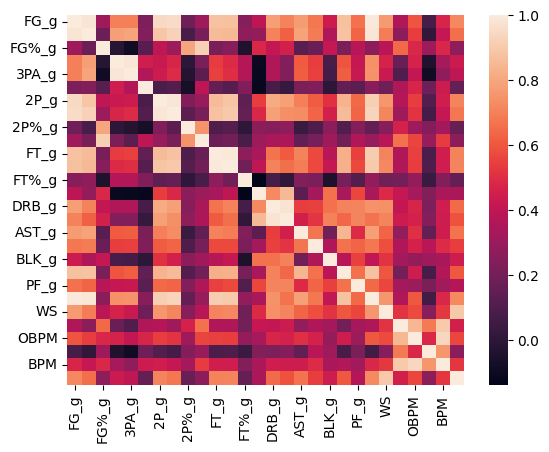

<Figure size 3000x3000 with 0 Axes>

In [10]:
sub_df = full_df[['FG_g', 'FGA_g', 'FG%_g', '3P_g', '3PA_g', '3P%_g', '2P_g', '2PA_g',
       '2P%_g', 'eFG%_g', 'FT_g', 'FTA_g', 'FT%_g', 'ORB_g', 'DRB_g', 'TRB_g',
       'AST_g', 'STL_g', 'BLK_g', 'TOV_g', 'PF_g', 'PTS_g', 
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']]

import seaborn as sn
sn.heatmap(sub_df.corr())
plt.figure(figsize=(30,30))

In [11]:
corr_matrix = full_df.corr()

# Unstack the correlation matrix to turn it into a Series
corr_series = corr_matrix.unstack()

# Remove self-correlations (i.e., 1.0 on the diagonal)
corr_series = corr_series[corr_series != 1]

# Sort correlations by absolute value in descending order
sorted_corr = corr_series.abs().sort_values(ascending=False).drop_duplicates()

# Display the top correlations
print(sorted_corr)

Fpoints_per36  Fpoints_avg_min    1.000000
TRB%           TRB_per            0.998998
STL_per        STL%               0.998764
ORB_per        ORB%               0.998554
DRB_per        DRB%               0.997101
                                    ...   
BPM            TOV_per            0.000931
FT_g           BLK_per            0.000715
BLK_g          3P%_per            0.000598
               3P%_g              0.000598
VORP           ORB%               0.000524
Length: 3554, dtype: float64


/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_46506/2160386175.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = full_df.corr()
